# Batch Processing of Plots using the Selection for Data

NUE SELECTION

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sys
import localSettings as ls
import math
print(ls.main_path)
import load_data_run123
import plotter_alex
import importlib
importlib.reload(plotter_alex)
import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb
import nue_booster 
importlib.reload(nue_booster)
import awkward

/home/alex/NuMI/PELEE/


In [2]:
import NuMIGeoWeights
import importlib
importlib.reload(NuMIGeoWeights)
numiBeamlineGeoWeights = NuMIGeoWeights.NuMIGeoWeights()

In [3]:
params = {
    'axes.labelsize': 'x-large',
    'axes.titlesize': 'x-large',
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large'
}
pylab.rcParams.update(params)

In [4]:
# Set False if doing Run 1, True if doing Run 3

isRun3 = True

ending = "Sept19_rebinned"

## NUE_NUE SAMPLE

In [5]:
# Name of the TTree in the PeLEE Ntuples
tree = "NeutrinoSelectionFilter"

#cut samples
#NUE  = '/pre_samp/prodgenie_numi_nue_overlay_mcc9_v08_00_00_48_CV_reco2_run1_reco2'+ls.APPEND #newTune
#full sample
if isRun3 == False:
    NUE  = '/neutrinoselection_filt_run1_overlay_intrinsic'+ls.APPEND #newTune
elif isRun3 == True:
    NUE  = '/neutrinoselection_filt_run3b_overlay_intrinsic'+ls.APPEND

#actually fetch datasets
nue_nue  = uproot.open(ls.ntuple_path+NUE+".root")[ls.fold][tree]

# Define a list that contains the data sets
uproot_v = [nue_nue]

nue_variables = ["run", "sub", "evt", 'swtrig_pre',            
             "trk_score_v", "topological_score", "shr_score",
            "reco_nu_vtx_sce_x", "reco_nu_vtx_sce_y", "reco_nu_vtx_sce_z", "shr_tkfit_npoints",
            "CosmicIPAll3D", "hits_ratio", "contained_fraction",
            "shrmoliereavg", "shr_tkfit_dedx_U","shr_tkfit_dedx_V","shr_tkfit_dedx_Y",
            "shr_energy", "category", "slnunhits", "slnhits", "flash_time", "nu_pdg", "ccnc",
             "selected", "nslice", "shr_distance", "shr_theta", "shr_phi", "npi0", "proton_e", "elec_e",
            "shr_tkfit_nhits_U", "shr_tkfit_nhits_V", "shr_tkfit_nhits_Y", "n_tracks_contained",
            "n_showers", "n_tracks", "shr_energy_cali", "n_showers_contained", "tksh_distance", "tksh_angle",
             "trkshrhitdist2", 'shrsubclusters0', 'shrsubclusters1', 'shrsubclusters2',
             "shr_energy_tot_cali", 'trk_energy_tot', 'nproton', 'npion', 'trk_energy', 'shr_px', 'shr_py', 'shr_pz']


# These are examples of variables present in MC samples only
nue_varMC = ["nu_e", "true_pt","true_pt_visible","true_p","true_p_visible","true_nu_vtx_t","true_nu_vtx_x","true_nu_vtx_y","true_nu_vtx_z","true_nu_vtx_sce_x","true_nu_vtx_sce_y","true_nu_vtx_sce_z\
","true_nu_px","true_nu_py","true_nu_pz", "mc_pdg", "mc_px", "mc_py", "mc_pz"]

#make the list unique (sometimes you repeat the variable name in the list, this takes care of that)
nue_variables = list(set(nue_variables))
print(nue_variables)



# These weights are needed to correctly calculate the CV for the MC    
WEIGHTS     = ["weightSpline","weightTune","weightSplineTimesTune","ppfx_cv"]
# These weights are needed to calculate the Flux, GENIE and Geant4 Systematics. 
# For NuMI weightsFlux should always be 1 (cause that's relevant for BNB).
SYSTEMATICS = ['weightsFlux','weightsGenie','weightsReint'] 
PPFX        = ['weightsPPFX'] 



WEIGHTSLEE = ["weightSpline","weightTune","weightSplineTimesTune", "leeweight"]#, "weightsGenie", "weightsFlux", "weightsReint"]
MCFVARS    = ["mcf_nu_e","mcf_lep_e","mcf_actvol","mcf_nmm","mcf_nmp","mcf_nem","mcf_nep","mcf_np0","mcf_npp",
              "mcf_npm","mcf_mcshr_elec_etot","mcf_pass_ccpi0","mcf_pass_ncpi0",
              "mcf_pass_ccnopi","mcf_pass_ncnopi","mcf_pass_cccpi","mcf_pass_nccpi"]

#nue_nue  = nue_nue.pandas.df(nue_variables + WEIGHTS + MCFVARS + SYSTEMATICS + PPFX + nue_varMC, flatten=False)
nue_nue  = nue_nue.pandas.df(nue_variables + WEIGHTS + SYSTEMATICS + PPFX + nue_varMC, flatten=False)

['shr_energy', 'run', 'n_tracks_contained', 'shr_px', 'shr_distance', 'n_showers_contained', 'proton_e', 'shr_energy_tot_cali', 'trkshrhitdist2', 'category', 'CosmicIPAll3D', 'shr_tkfit_dedx_U', 'hits_ratio', 'nproton', 'shr_py', 'nslice', 'n_showers', 'n_tracks', 'shr_tkfit_nhits_V', 'shr_energy_cali', 'reco_nu_vtx_sce_z', 'tksh_distance', 'ccnc', 'shr_tkfit_dedx_Y', 'shr_tkfit_npoints', 'trk_score_v', 'shr_score', 'shr_theta', 'elec_e', 'contained_fraction', 'shr_tkfit_nhits_Y', 'slnhits', 'trk_energy', 'shrsubclusters0', 'reco_nu_vtx_sce_y', 'flash_time', 'nu_pdg', 'shr_tkfit_nhits_U', 'shr_phi', 'sub', 'npi0', 'swtrig_pre', 'shrmoliereavg', 'shr_tkfit_dedx_V', 'shr_pz', 'trk_energy_tot', 'selected', 'tksh_angle', 'shrsubclusters1', 'npion', 'topological_score', 'slnunhits', 'reco_nu_vtx_sce_x', 'evt', 'shrsubclusters2']


In [6]:
# In the next cell, we are going to play with the value of the event weights. 
# Let's store the original ones in some "safe variable" in this cell first.
# So if we screw up, we don't have to re-load the humongous TTree: we'll have the original weights safely stored here
df_v = [nue_nue]

#removeGenieTune = False
for i,df in enumerate(df_v):
    df[ 'currentweightsafe' ] = df['weightSplineTimesTune']
    df[ 'currentweight' ] = df['weightSplineTimesTune']

In [7]:
constructNuMISys = True

# We need to do this only for the MC samples (all data events weight = 1)
df_v = [nue_nue]

for i,df in enumerate(df_v):
    # This portion cleans up the basic weights
    df.loc[ df['weightTune'] <= 0, 'weightTune' ] = 1.
    df.loc[ df['weightTune'] == np.inf, 'weightTune' ] = 1.
    df.loc[ df['weightTune'] > 100, 'weightTune' ] = 1.
    df.loc[ np.isnan(df['weightTune']) == True, 'weightTune' ] = 1.
    # This portion cleans up the weights after the GENIE tune is applied
    df.loc[ df['weightSplineTimesTune'] <= 0, 'weightSplineTimesTune' ] = 1.
    df.loc[ df['weightSplineTimesTune'] == np.inf, 'weightSplineTimesTune' ] = 1.
    df.loc[ df['weightSplineTimesTune'] > 100, 'weightSplineTimesTune' ] = 1. #originally 100
    df.loc[ np.isnan(df['weightSplineTimesTune']) == True, 'weightSplineTimesTune' ] = 1. 
    
    # weightSplineTimesTuneTimesPPFX is our final weight: this is NuMI, so the final weight of the MC events needs 
    # to take into account the NuMI Flux re-weight called ppfx_cv to simulate NuMI events properly. 
    df[ 'weightSplineTimesTuneTimesPPFX' ] = df[ 'weightSplineTimesTune' ]*df['ppfx_cv']
    
    
    # We also need to fix some cray cray weights in the GENIE systematics. 
    # This is a bit of a pain in the butt cause we have 600 universe (= 600 weights) for each event
    for ievt in range(df.shape[0]):
        reweightCondition = ((df['weightsGenie'].iloc[ievt] > 3000) | (df['weightsGenie'].iloc[ievt] < 0)  | 
                             (df['weightsGenie'].iloc[ievt] == np.inf))
        df['weightsGenie'].iloc[ievt][ reweightCondition ] = 1.
    

In [8]:
#nue_nue = pot_scale(nue_nue, 'intrinsic', ISRUN3)

if isRun3 == False:
    beamon_pot = 2.0E20 #v5
    nue_intrinsic_pot = 2.37838E22 #matches Alex
elif isRun3 == True:
    beamon_pot = 5.014E20 #v5
    nue_intrinsic_pot = 2.5345e+22

nue_nue['pot_scale'] = beamon_pot/nue_intrinsic_pot

In [9]:
nue_nue['totweight_data'] = nue_nue['pot_scale']*nue_nue['weightSplineTimesTuneTimesPPFX']

In [10]:
from scipy.spatial.transform import Rotation as R
from numpy import arccos, array
from numpy.linalg import norm

# Note: returns angle in radians
def theta(v, w): return arccos(v.dot(w)/(norm(v)*norm(w)))* 180 / 3.1415926

def GetNuMIAngle( px,  py,  pz):
    r = R.from_matrix([[0.92103853804025681562   , 0.022713504803924120662, 0.38880857519374290021  ],
                       [4.6254001262154668408e-05, 0.99829162468141474651 , -0.058427989452906302359],
                       [-0.38947144863934973769  , 0.053832413938664107345, 0.91946400794392302291  ]])  
    r = r.inv()
    beamCoords = r.apply([px,  py,  pz])
    beamDir    = [0,0,1]
    #print(theta(beamCoords,beamDir))
    return theta(beamCoords,beamDir)

def GetNuMIAnglePol( phiBNB,  thetaBNB):
    px = math.sin(thetaBNB)*math.cos(phiBNB)
    py = math.sin(thetaBNB)*math.sin(phiBNB)
    pz = math.cos(thetaBNB)
    return GetNuMIAngle( px,  py,  pz)

In [11]:
def vectorFromNuMITarget(vtxX,  vtxY, vtxZ):
    numiTarget      = np.array([-31387.58422, -3316.402543, -60100.2414])
    nuInteraction   = np.array([vtxX,  vtxY, vtxZ])
    directionVector = nuInteraction - numiTarget
    return directionVector

def angleFromNuMITarget(vtxX,  vtxY, vtxZ, thetaBNB, phiBNB):
    v1 = vectorFromNuMITarget(vtxX,  vtxY, vtxZ)  
    norm = np.linalg.norm(v1)
    v1 = v1/norm
    v2 = [np.cos(phiBNB)*np.sin(thetaBNB),np.sin(phiBNB)*np.sin(thetaBNB), np.cos(thetaBNB) ]
    dot_product = np.dot(v1, v2)
    angle = np.arccos(dot_product)
    return angle #dot_product # angle*180/3.14159265



angleFromNuMITarget(1,1,1,1.4,3.)

1.8690124908136228

In [12]:
#RECO VARIABLE
#This assumes the electron to be the leading shower
import time
s = time.time()

for i,df in enumerate(df_v):
    df['targetP_asmuon_reco']     = np.sqrt(df['shr_px']*df['shr_px'] + df['shr_py']*df['shr_py'] + df['shr_pz']*df['shr_pz'])
    #df['targetPt_asmuon_reco']    = np.sqrt(df['shr_px']*df['shr_px'] + df['shr_py']*df['shr_py'])
    #df['targetTheta_asmuon_reco'] = np.arccos(df['shr_pz']/df['targetP_asmuon_reco'] )
    #df['targetPhi_asmuon_reco']   = np.arctan2(df['shr_py'],df['shr_px'])
    df['nu_Angle_Numi_Elec_asmuon_reco'] = df.apply( lambda x: angleFromNuMITarget(x['reco_nu_vtx_sce_x'],x['reco_nu_vtx_sce_y'],x['reco_nu_vtx_sce_z'], x['shr_theta'],x['shr_phi']) , axis=1)
    df['cosNu_Angle_Numi_Elec_asmuon_reco'] = np.cos(df['nu_Angle_Numi_Elec_asmuon_reco'])
    
#just prints out the time this cell takes
s2 = time.time()
print ("time to run: ",s2-s)

time to run:  4.549960613250732


In [13]:
#TRUTH VARIABLE

import time
s = time.time()

for i,df in enumerate(df_v):
    df["elec_px_asmuon"] = np.nan
    df["elec_py_asmuon"] = np.nan
    df["elec_pz_asmuon"] = np.nan
    for j in range(len(df["mc_pdg"])):
        pdg_vector = df["mc_pdg"].iloc[j][0]
        px_vector = df["mc_px"].iloc[j]
        py_vector = df["mc_py"].iloc[j]
        pz_vector = df["mc_pz"].iloc[j]
        result = np.where(pdg_vector==11)[0]
        if np.size(result):
            df.loc[j, "elec_px_asmuon"] = px_vector[result][0]
            df.loc[j, "elec_py_asmuon"] = py_vector[result][0]
            df.loc[j, "elec_pz_asmuon"] = pz_vector[result][0]
            
    print(df["elec_px_asmuon"])
    
#just prints out the time this cell takes
s2 = time.time()
print ("time to run: ",s2-s)

entry
0         0.335876
1         1.175061
2              NaN
3        -0.178489
4         0.820571
            ...   
124391   -0.001820
124392         NaN
124393    0.602292
124394   -0.016303
124395   -0.219753
Name: elec_px_asmuon, Length: 124396, dtype: float64
time to run:  84.42848229408264


In [14]:
#TRUTH_VARIABLE

for i,df in enumerate(df_v):
    df['targetP_asmuon']     = np.sqrt(df['elec_px_asmuon']*df['elec_px_asmuon'] + df['elec_py_asmuon']*df['elec_py_asmuon'] + df['elec_pz_asmuon']*df['elec_pz_asmuon'])
    df['targetPt_asmuon']    = np.sqrt(df['elec_px_asmuon']*df['elec_px_asmuon'] + df['elec_py_asmuon']*df['elec_py_asmuon'])
    df['targetTheta_asmuon'] = np.arccos(df['elec_pz_asmuon']/df['targetP_asmuon'] )
    df['targetPhi_asmuon']   = np.arctan2(df['elec_py_asmuon'],df['elec_px_asmuon'])
    df['nu_Angle_Numi_Elec_asmuon'] = df.apply( lambda x: angleFromNuMITarget(x['true_nu_vtx_sce_x'],x['true_nu_vtx_sce_y'],x['true_nu_vtx_sce_z'], x['targetTheta_asmuon'],x['targetPhi_asmuon']) , axis=1)
    df['cosNu_Angle_Numi_Elec_asmuon'] = np.cos(df['nu_Angle_Numi_Elec_asmuon'])

In [15]:
#This cell is about creating some new variables from the ones we have

import time
s = time.time()

#use all samples
df_v = [nue_nue]


puppa1 = 'trk_score_v'


for i,df in enumerate(df_v):
    up = uproot_v[i]
    trk_theta_proton_v  = up.array('trk_theta_v')
    trk_phi_proton_v    = up.array('trk_phi_v')
    trk_score_v         = up.array('trk_score_v')    
    trk_llr_pid_v       = up.array('trk_llr_pid_score_v')
    trk_energy_proton_v = up.array('trk_energy_proton_v')
    trk_calo_energy_y_v = up.array('trk_calo_energy_y_v')
    trk_id              = up.array('trk_id')-1 # I think we need this -1 to get the right result
    c                   = up.array('n_tracks_contained')
    trk_theta_proton_v  = up.array('trk_theta_v')
    trk_phi_proton_v    = up.array('trk_phi_v')

    trk_theta_proton_sel  = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_theta_proton_v,trk_id)])
    trk_phi_proton_sel    = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_phi_proton_v,trk_id)])
    df['protontheta']  = trk_theta_proton_sel
    df['protonphi']    = trk_phi_proton_sel

    #print(trk_score_v.shape, len(trk_llr_pid_v))

    #dummy variables
    puppa_obj = []
    puppa_trk = []
    puppa_shw = []
    puppa_prt = [] 
    puppa_mu  = []
    
    for pidv, p in zip(trk_llr_pid_v,trk_score_v):
        N_obj         = 0
        N_recoTrks    = 0
        N_recoShowers = 0
        N_recoProtons = 0
        N_recoMuons   = 0
        if len(pidv) > 0:
            passPIDCut = (pidv <= 0)
            passTrkCut = (p    >= 0)
            protonCut  = (passPIDCut & passTrkCut) 
            muonCut    = (np.logical_not(passPIDCut) & passTrkCut) 
            N_obj         = len(passTrkCut)
            N_recoTrks    = np.count_nonzero(passTrkCut)
            N_recoShowers = np.count_nonzero(np.logical_not(passTrkCut))
            N_recoProtons = np.count_nonzero(protonCut)
            N_recoMuons   = np.count_nonzero(muonCut)
        puppa_obj.append(N_obj)
        puppa_trk.append(N_recoTrks)
        puppa_shw.append(N_recoShowers)    
        puppa_prt.append(N_recoProtons)
        puppa_mu .append(N_recoMuons)

    df['N_obj']           = puppa_obj
    df['N_recoTrks']      = puppa_trk
    df['N_recoShowers']   = puppa_shw
    df['N_recoProtons']   = puppa_prt
    df['N_recoMuons']     = puppa_mu
    
    trk_llr_pid_v_sel     = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_llr_pid_v,trk_id)])
    trk_energy_proton_sel = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_energy_proton_v,trk_id)])
    trk_calo_energy_y_sel = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_calo_energy_y_v,trk_id)])
    trk_theta_proton_sel  = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_theta_proton_v,trk_id)])
    trk_phi_proton_sel    = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_phi_proton_v,trk_id)])

    df['trkpid']          = trk_llr_pid_v_sel
    df['protonenergy']    = trk_energy_proton_sel
    df['trackcaloenergy'] = trk_calo_energy_y_sel
    df['subcluster']      = df['shrsubclusters0'] + df['shrsubclusters1'] + df['shrsubclusters2']

    df['protontheta']  = trk_theta_proton_sel
    df['protonphi']    = trk_phi_proton_sel

#calculate angles wrt NuMI reference frame
for i,df in enumerate(df_v):
    #df['shr_numi_Angle']    = df.apply( lambda x: GetNuMIAngle(x['shr_px'],x['shr_py'],x['shr_pz']) , axis=1)
    df['proton_numi_Angle'] = df.apply( lambda x: GetNuMIAnglePol(x['protonphi'],x['protontheta']) , axis=1)

    
#just prints out the time this cell takes
s2 = time.time()
print ("time to run: ",s2-s)

time to run:  18.199139833450317


In [36]:
for i,df in enumerate(df_v):
    df.loc[df['shrmoliereavg'].isna(),'secondshower_Y_dot'] = 9999.
    df.loc[df['secondshower_Y_dot'].isna(),'secondshower_Y_dot'] = 0.0 

KeyError: 'shrmoliereavg'

In [37]:
df_v = [nue_nue]
for i,df in enumerate(df_v):
    df.loc[:,'shr_tkfit_dedx_max'] = df['shr_tkfit_dedx_Y']
    df.loc[(df['shr_tkfit_nhits_U']>df['shr_tkfit_nhits_Y']),'shr_tkfit_dedx_max'] = df['shr_tkfit_dedx_U']
    df.loc[(df['shr_tkfit_nhits_V']>df['shr_tkfit_nhits_Y']) & (df['shr_tkfit_nhits_V']>df['shr_tkfit_nhits_U']),'shr_tkfit_dedx_max'] = df['shr_tkfit_dedx_V']
    

NameError: name 'nue_nue' is not defined

In [18]:
INTERCEPT = 0.0
SLOPE = 0.83

df_v = [nue_nue]
# define some energy-related variables
for i,df in enumerate(df_v):
    df["reco_e"] = (df["shr_energy_tot_cali"] + INTERCEPT) / SLOPE + df["trk_energy_tot"]
    df["true_e"] = df["elec_e"] + df["proton_e"]
    
# and a way to filter out data
for i,df in enumerate(df_v):
    df["bnbdata"] = np.zeros_like(df["shr_energy"])
    df["extdata"] = np.zeros_like(df["shr_energy"])


In [19]:
"""
for i,df in enumerate(df_v):

    df['is_signal'] = np.where((df.nu_e>0.04) & (df.nu_e <5) & (df.reco_e>0.04) & (df.reco_e <5) & (df.category==11)
                             & (df.nu_pdg==12) & (df.ccnc==0) & (df.nproton>0) & (df.npion==0)
                             & (-1.55 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 254.8)
                             & (-116.5 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 116.5)
                             & (0 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1036.8), True, False)
"""

"\nfor i,df in enumerate(df_v):\n\n    df['is_signal'] = np.where((df.nu_e>0.04) & (df.nu_e <5) & (df.reco_e>0.04) & (df.reco_e <5) & (df.category==11)\n                             & (df.nu_pdg==12) & (df.ccnc==0) & (df.nproton>0) & (df.npion==0)\n                             & (-1.55 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 254.8)\n                             & (-116.5 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 116.5)\n                             & (0 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1036.8), True, False)\n"

In [20]:
# add back the cosmic category, for background only
#df_v = [nue_nue]
#for i,df in enumerate(df_v):
#    df.loc[(df['category']!=1)&(df['category']!=10)&(df['category']!=11)&(df['category']!=111)&(df['slnunhits']/df['slnhits']<0.2), 'category'] = 4
    

In [19]:
#########################################################
######## RUN THIS CELL ONLY ONE TIME ONLY ###############
#########################################################
# The flash time for the NuMI data stream needs to be adjusted a little bit (there are hardware offsets in data). 
# That's the reason behind these hard coded shifts
df_v = [nue_nue]
for i,df in enumerate(df_v):
        df.loc[ :, 'flash_time' ] = df['flash_time' ] - 0.304

In [20]:
#Define signal catagories

#nue_nue["is_signal"] = nue_nue["category"] == 11

In [21]:
# Some quick clean up since some strange events get in there
nue_nue   = nue_nue.query('nu_e > 0.')

import NuMIGeoWeights
import importlib
importlib.reload(NuMIGeoWeights)
numiBeamlineGeoWeights = NuMIGeoWeights.NuMIGeoWeights()

# Calculate the true neutrino direction off of the NuMI beam, needed for plotting. Seem to be from MC
dfmc_v = [nue_nue]
for i,df in enumerate(dfmc_v):
    df['numi_nu_true_Angle'] = df.apply( lambda x: GetNuMIAngle(x['true_nu_px'],x['true_nu_py'],x['true_nu_pz']) , axis=1)
    df['weightsNuMIGeo']     = df.apply( lambda x: numiBeamlineGeoWeights.calculateGeoWeight(x['nu_pdg'],x['nu_e'],x['numi_nu_true_Angle']) , axis=1)
    

In [22]:
#df_v = [nue_nue]
#for i,df in enumerate(df_v):
#    df.loc[ (df['category']== 11) & (df['nu_pdg'] == -12), 'category' ] = 12
#    df.loc[ (df['category']== 10) & (df['nu_pdg'] == -12), 'category' ] = 1
#    df.loc[ (df['category']== 10) & (df['nu_pdg'] ==  12), 'category' ] = 1

Set up complete. Set up BDT for Selection.

In [23]:

reco_in_fv_query = "10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_nu_vtx_sce_z<=1026"


BDT_PRE_QUERY = 'swtrig_pre==1 and nslice==1'
BDT_PRE_QUERY += ' and ' + reco_in_fv_query
BDT_PRE_QUERY +=' and contained_fraction>0.9'
BDT_PRE_QUERY += ' and n_showers_contained==1'
BDT_PRE_QUERY += ' and n_tracks_contained>0'
BDT_PRE_QUERY += ' and trk_energy>0.04' 
    
BDT_LOOSE_CUTS = BDT_PRE_QUERY
BDT_LOOSE_CUTS +=' and shr_score<0.3'
BDT_LOOSE_CUTS += ' and shrmoliereavg<15'
BDT_LOOSE_CUTS += ' and shr_tkfit_dedx_Y<7'
BDT_LOOSE_CUTS += ' and trkpid<0.35'
BDT_LOOSE_CUTS += ' and tksh_distance<12'


In [24]:
# load bdt model 
bdt_model = xgb.Booster({'nthread': 4})
if isRun3==False:
    bdt_model.load_model('/home/alex/NuMI/bdt_FHC_may2022_subset.model')
elif isRun3==True:
    bdt_model.load_model('/home/alex/NuMI/bdt_RHC_may2022_subset.model')

In [25]:
# NOW, apply the model to real data for data/MC comparisons

varlist = [
    "shr_score", "shrmoliereavg", "trkpid",
    "n_showers_contained", "shr_tkfit_dedx_Y", "tksh_distance",
    "tksh_angle", "subcluster", "trkshrhitdist2"]
#The training variables?

datasetlist = [nue_nue]

for df in datasetlist:
    for column in varlist:
        df.loc[(df[column] < -1.0e37) | (df[column] > 1.0e37), column] = np.nan
        
    # create testing dmatrix 
    df_test = xgb.DMatrix(data=df[varlist])
    
    # apply the bdt selection
    preds = bdt_model.predict(df_test)
    
    # add columns for plotting 
    df['BDT_score'] = preds
    print(df.shape)

(124396, 120)


In [26]:
test = np.nansum(nue_nue.query(BDT_LOOSE_CUTS)["weightSplineTimesTuneTimesPPFX"])
print('total signal events = '+ str(test))

total signal events = 10960.34


In [27]:
datasets_bdt = nue_nue

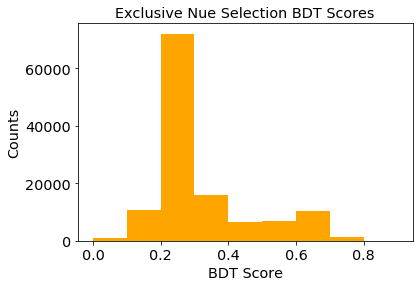

In [28]:
import matplotlib.pyplot as plt
import matplotlib

bins = np.arange(0, 1.0, 0.1)
gen = plt.hist(datasets_bdt['BDT_score'], bins, color='orange')
plt.xlabel("BDT Score")
plt.ylabel("Counts")
plt.title("Exclusive Nue Selection BDT Scores")
plt.show()

In [119]:
#Teleporttoherestart

ending = "Sept19_rebinned"

df_v = [nue_nue]
for i,df in enumerate(df_v):
    
    df['is_signal'] = np.where( (df.swtrig_pre==1) & (df.cosNu_Angle_Numi_Elec_asmuon>-1.0) & (df.cosNu_Angle_Numi_Elec_asmuon <1.0) & (df.cosNu_Angle_Numi_Elec_asmuon_reco>-1.0) & (df.cosNu_Angle_Numi_Elec_asmuon_reco <1.0)
                                 & (df.nu_pdg==12) & (df.ccnc==0) & (df.nproton>0) & (df.npion==0) & (df.npi0==0)
                                 & (10 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 246)
                                 & (-106 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 106)
                                 & (10 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1026), True, False)
    
    df.loc[ (df['is_signal']== True), 'category' ] = 1

#if energy add & (df.true_e>1.0) & (df.true_e <4.0) & (df.reco_e>1.0) & (df.reco_e <4.0)
#if angle add (df.cosNu_Angle_Numi_Elec_asmuon>-1.0) & (df.cosNu_Angle_Numi_Elec_asmuon <1.0) & (df.cosNu_Angle_Numi_Elec_asmuon_reco>-1.0) & (df.cosNu_Angle_Numi_Elec_asmuon_reco <1.0)
#if lepton mom (df.targetP_asmuon>0.04) & (df.targetP_asmuon <2.0) & (df.targetP_asmuon_reco>0.04) & (df.targetP_asmuon_reco<2.0)

##OLD
#if energy add & (df.true_e>0.04) & (df.true_e <5) & (df.reco_e>0.04) & (df.reco_e <5)
#if lepton mom (df.targetP_asmuon>0.04) & (df.targetP_asmuon <5) & (df.targetP_asmuon_reco>0.04) & (df.targetP_asmuon_reco<5)

NameError: name 'nue_nue' is not defined

In [30]:
NUE_SEL_QUERY = BDT_LOOSE_CUTS
#ENERGY
#NUE_SEL_QUERY += ' and reco_e > 1.0 and reco_e < 4.0'
#NUE_SEL_QUERY += ' and true_e > 1.0 and true_e < 4.0'
#ANGLE
#NUE_SEL_QUERY += ' and cosNu_Angle_Numi_Elec_asmuon_reco >-1.0 and cosNu_Angle_Numi_Elec_asmuon_reco <1.0'
#NUE_SEL_QUERY += ' and cosNu_Angle_Numi_Elec_asmuon >-1.0 and cosNu_Angle_Numi_Elec_asmuon <1.0'
#LEPTON MOM
NUE_SEL_QUERY += ' and targetP_asmuon_reco > 0.04 & targetP_asmuon_reco < 2.0'
NUE_SEL_QUERY += ' and targetP_asmuon > 0.04 & targetP_asmuon < 2.0'

if isRun3 == False:
    NUE_SEL_QUERY += ' and BDT_score > 0.55'
elif isRun3 == True:
    NUE_SEL_QUERY += ' and BDT_score > 0.575'

SIGNAL_NUE_SEL_QUERY = NUE_SEL_QUERY
SIGNAL_NUE_SEL_QUERY += 'and is_signal==True'

NOT_SIGNAL_NUE_SEL_QUERY = NUE_SEL_QUERY
NOT_SIGNAL_NUE_SEL_QUERY += 'and is_signal==False'

#ending = "Sept19"

#OLD
#ENERGY
#NUE_SEL_QUERY += ' and reco_e > 0.04 and reco_e < 5'
#NUE_SEL_QUERY += ' and true_e > 0.04 and true_e < 5'
#LEPTON MOM
#NUE_SEL_QUERY += ' and targetP_asmuon_reco > 0.04 & targetP_asmuon_reco < 5'
#NUE_SEL_QUERY += ' and targetP_asmuon > 0.04 & targetP_asmuon < 5'

In [31]:
#New categories

for i,df in enumerate(df_v):
            
    df["in_fv_query"] = np.where((10 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 246)
                                 & (-106 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 106)
                                 & (10 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1026), True, False)
    df["out_fv_query"] = np.where((df.swtrig_pre==1)& (df.in_fv_query==False), True, False)
    df.loc[ (df['out_fv_query']== True), 'category' ] = 2
    
    df["numu_CC_Npi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==0) & (df.npi0>=1), True, False)
    df.loc[ (df['numu_CC_Npi0']== True), 'category' ] = 3
    df["numu_CC_0pi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==0) & (df.npi0==0), True, False)
    df.loc[ (df['numu_CC_0pi0']== True), 'category' ] = 4
    
    df["numu_NC_Npi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==1) & (df.npi0>=1), True, False)
    df.loc[ (df['numu_NC_Npi0']== True), 'category' ] = 5
    df["numu_NC_0pi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==1) & (df.npi0==0), True, False)
    df.loc[ (df['numu_NC_Npi0']== True), 'category' ] = 6
    
    df["nuebar_1eNp"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (df.nu_pdg==-12) & (df.ccnc==0) & (df.nproton>0) & (df.npion==0) & (df.npi0==0), True, False)
    df.loc[ (df['nuebar_1eNp']== True), 'category' ] = 7
    df["nue_NC"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==12) & (df.ccnc==1), True, False)
    df.loc[ (df['nue_NC']== True), 'category' ] = 8
    df["nue_CCother"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==12) & (df.ccnc==0) & (df.is_signal==False) , True, False)
    df.loc[ (df['nue_CCother']== True), 'category' ] = 9
    
    # less specific categories 
    df["nue_other"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (df.is_signal==False)& (df.nuebar_1eNp==False) & (df.nue_NC==False) & (df.nue_CCother==False) , True, False)
    df.loc[ (df['nue_other']== True), 'category' ] = 10
    df["numu_Npi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) &  (abs(df.nu_pdg==14)) & (df.npi0>=1), True, False)
    df.loc[ (df['numu_Npi0']== True), 'category' ] = 11
    df["numu_0pi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg==14)) &  (df.npi0==0), True, False)
    df.loc[ (df['numu_0pi0']== True), 'category' ] = 12
    
    df["unknown"] = np.where((df.is_signal==False) & (df.out_fv_query==False) & (df.numu_CC_Npi0==False)
                             & (df.numu_CC_0pi0==False) & (df.numu_NC_Npi0==False) & (df.numu_NC_0pi0==False)
                             & (df.nuebar_1eNp==False) & (df.nue_NC==False) & (df.nue_CCother==False)
                             & (df.nue_other==False) & (df.numu_Npi0==False) & (df.numu_0pi0==False), True, False)
    df.loc[ (df['unknown']== True), 'category' ] = 0

In [32]:
test = np.nansum(datasets_bdt.query(NUE_SEL_QUERY)['totweight_data'])
print('total signal events = '+ str(test))

total signal events = 101.88753566910341


In [33]:
test = np.nansum(datasets_bdt.query(NUE_SEL_QUERY + 'and is_signal==True')['totweight_data'])
print('total signal events = '+ str(test))

total signal events = 93.63213152307961


In [34]:
test = np.nansum(datasets_bdt.query(SIGNAL_NUE_SEL_QUERY)['totweight_data'])
print('total signal events = '+ str(test))

total signal events = 93.63213152307961


In [35]:
#truthsel_nue  = "(nu_pdg == 12 and ccnc == 0 and true_nu_vtx_z < 1036.8 and true_nu_vtx_z > 0 and true_nu_vtx_y < 116.5 and true_nu_vtx_y > -116.5 and true_nu_vtx_x < \
# 254.8 and true_nu_vtx_x > -1.55 and nproton > 0 and npion == 0 and nu_e > 0.04 and nu_e < 5)"
#truthsel_nue  += " and category == 11"
#truthsel_nue += ' and reco_e > 0.04 and reco_e < 5'

Now apply the selection, looking at the plots produced with each stage.

This only has the BDT stage, so we can move on to looking at variables. 

n_events here =  124396
n_events/2 here =  24879.0

1.0
1
124396
{'nue_nue': 1}
swtrig_pre==1 and nslice==1 and 10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_nu_vtx_sce_z<=1026 and contained_fraction>0.9 and n_showers_contained==1 and n_tracks_contained>0 and trk_energy>0.04 and shr_score<0.3 and shrmoliereavg<15 and shr_tkfit_dedx_Y<7 and trkpid<0.35 and tksh_distance<12 and targetP_asmuon_reco > 0.04 & targetP_asmuon_reco < 2.0 and targetP_asmuon > 0.04 & targetP_asmuon < 2.0 and BDT_score > 0.575& targetP_asmuon_reco <= 2 & targetP_asmuon_reco >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False 
 nue_nue
--------------------------------------
current sample is:  nue_nue
[0.01751005 0.02223682 0.0205416  ... 0.01648811 0.02067718 0.01523   ]
current_total  101.8875356691034
101.887535669103399982304836157709360122680664062500000000000000000000000000000
-----------

/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3245: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


[]
Had to return early (colour sorting).


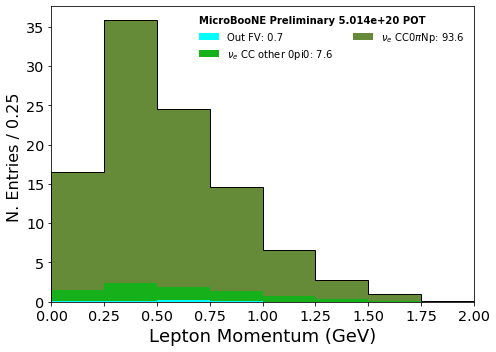

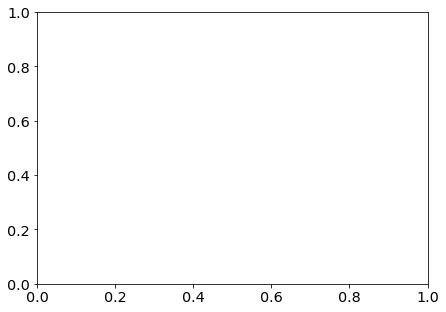

In [36]:
#WHAT WAS SELECTED

import batch_plotter_alex
import importlib
importlib.reload(batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = nue_nue.shape[0]
print("n_events here = ", n_events)
print("n_events/2 here = ", np.floor(n_events/5))
print("")
#batch_size = 40000
batch_size = n_events
#batch_size = int(np.floor(n_events/5))
#n_events = batch_size

varss = []
weightss = []
labss = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
#for i in range(1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = nue_nue.iloc[start:end]
    
    print(sample_set.shape[0])

    samples = {
        #"nue_nue": nue_nue
        "nue_nue": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 
        nueratio  = pot/2.37838e+22 
    elif isRun3 == True:
        pot =  5.014e20
        nueratio  = pot/2.5345e+22 

    # NUE
    weights = { #full sample mc = 0.38
                #"nue_nue"  : nueratio  * SPLIT * scaling
                "nue_nue"  : 1
                #"nue_nue"   :  nue_nue['totweight_data']
    }


    my_plotter = batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)


    #Now check on a variable
    #Remember to change the plotter keys between truth and mc
    
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Elec_asmuon_reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',8,(0.0, 2.0),"Lepton Momentum (GeV)"
    
    #OLD
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.05, 5.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',10,(0.0, 5.0),"Lepton Momentum (GeV)"

    var, weight, label = my_plotter.plot_variable(
        VARIABLE,
        query= NUE_SEL_QUERY,
        #query= BDT_LOOSE_CUTS,
        currentsample = "nue_nue",
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        #genieweight = "weightSplineTimesTuneTimesPPFX",
        genieweight = "totweight_data",
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:3]
    
    varss.append(var)
    weightss.append(weight)
    labss.append(label)

n_events here =  124396
n_events/2 here =  24879.0

1.0
1
124396
{'nue_nue': 0.01978299467350562}
swtrig_pre==1 and nslice==1 and 10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_nu_vtx_sce_z<=1026 and contained_fraction>0.9 and n_showers_contained==1 and n_tracks_contained>0 and trk_energy>0.04 and shr_score<0.3 and shrmoliereavg<15 and shr_tkfit_dedx_Y<7 and trkpid<0.35 and tksh_distance<12 and targetP_asmuon_reco > 0.04 & targetP_asmuon_reco < 2.0 and targetP_asmuon > 0.04 & targetP_asmuon < 2.0 and BDT_score > 0.575and is_signal==True& targetP_asmuon_reco <= 2 & targetP_asmuon_reco >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False 
 nue_nue
--------------------------------------
current sample is:  nue_nue
[0.88510627 1.1240371  1.0383462  ... 0.83344865 1.0451999  0.7698529 ]
current_total  93.63213152307961
93.632131523079607404724811203777790069580078125000000

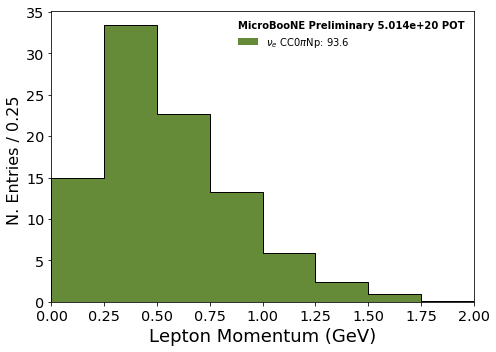

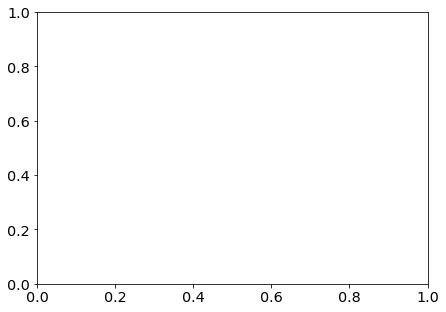

In [44]:
#THE TRUTH THAT WAS SELECTED

import batch_plotter_alex
import importlib
importlib.reload(batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = nue_nue.shape[0]
print("n_events here = ", n_events)
print("n_events/2 here = ", np.floor(n_events/5))
print("")
#batch_size = 40000
batch_size = n_events
#batch_size = int(np.floor(n_events/5))
#n_events = batch_size

varss = []
weightss = []
labss = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
#for i in range(1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = nue_nue.iloc[start:end]
    
    print(sample_set.shape[0])

    samples = {
        #"nue_nue": nue_nue
        "nue_nue": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 
        nueratio  = pot/2.37838e+22 
    elif isRun3 == True:
        pot =  5.014e20
        nueratio  = pot/2.5345e+22 

    # NUE
    weights = { #full sample mc = 0.38
                "nue_nue"  : nueratio  * SPLIT * scaling
                #"nue_nue"  : 1
                #"nue_nue"   :  nue_nue['totweight_data']
    }


    my_plotter = batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)


    #Now check on a variable
    #Remember to change the plotter keys between truth and mc
    
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Elec_asmuon_reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',8,(0.0, 2.0),"Lepton Momentum (GeV)"
    
    #OLD
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',10,(0.0, 5.0),"Lepton Momentum (GeV)"
    

    var, weight, label = my_plotter.plot_variable(
        VARIABLE,
        query= SIGNAL_NUE_SEL_QUERY,
        currentsample = "nue_nue",
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "weightSplineTimesTuneTimesPPFX",
        #genieweight = "totweight_data",
        #genieweight = "nslice",
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:3]
    
    varss.append(var)
    weightss.append(weight)
    labss.append(label)

No handles with labels found to put in legend.


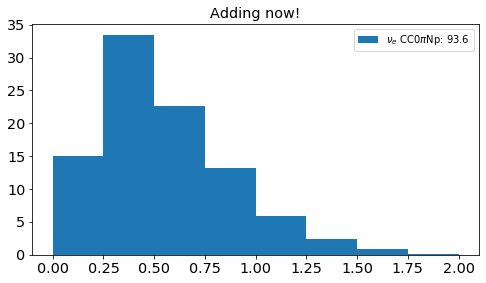

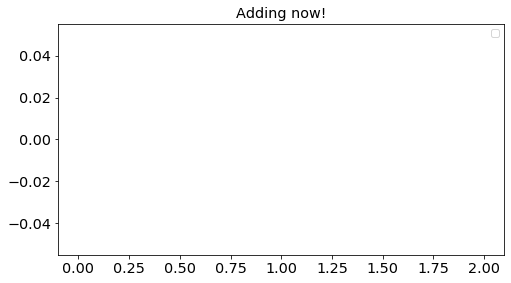

In [45]:
from matplotlib import gridspec

for i in range(int(n_events/batch_size)+1):
#for i in range(1):
    nue_fig = plt.figure(figsize=(8, 7))
    nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
    nue_ax1 = plt.subplot(nue_gs[0])
    #nue_ax1.set_xlim([0.04, 5.0])    #TrueE, lepton mom
    #nue_ax1.set_xlim([-1, 1])    #AngleDiff

    nue_stacked = nue_ax1.hist(
                varss[i].values(),
                weights=list(weightss[i].values()),
                stacked=True,
                label=labss[i],
                bins=BINS,
                range=RANGE)
    
    plt.title("Adding now!")
    plt.legend()

In [46]:
def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)

4223
4223


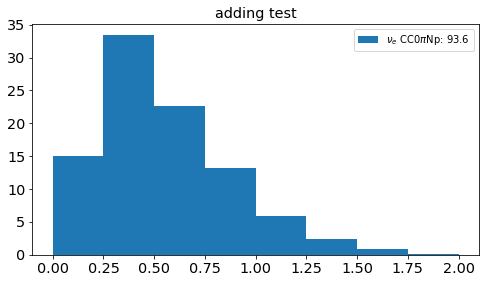

In [47]:
category_labels = {
    1 : r'$\nu_e$ CC0$\pi$Np', 
    2 : r'Out FV',
    3 : r'$\nu_\mu$ CC $\pi^{0}$',
    4 : r'$\nu_\mu$ CC',
    5 : r'$\nu_\mu$ NC $\pi^{0}$',
    6 : r'$\nu_\mu$ NC',
    7 : r'$\bar{\nu}_e$ CC0$\pi$Np',
    8: r'$\nu_e$ NC',
    9: r'$\nu_e$ CC other',
    10 : r'$\nu_e$ / $\overline{\nu_e}$  other', 
    11 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  $\pi^{0}$', 
    12 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other',
    0: r'Unknown'
}

labels = [
            "%s: %.1f" % (category_labels[c], sum(weightss_tot[0][c])) \
            if sum(weightss_tot[0][c]) else ""
            for c in varss[0].keys()
        ]


nue_fig = plt.figure(figsize=(8, 7))
nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1 = plt.subplot(nue_gs[0])

#TrueE, LeptonMom
#nue_ax1.set_xlim([0.0, 5.0])
#nue_ax1.set_ylim([0, 60])

#AngleDiff
#nue_ax1.set_xlim([-1, 1])
#nue_ax1.set_ylim([0, 35])

print(len(varss_tot[0][1]))
print(len(weightss_tot[0][1]))

nue_stacked = nue_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)

plt.title("adding test")
plt.legend()


#print('%.75f' % sum(nue_stacked[0]))
#print(nue_stacked[0])

In [48]:
import importlib
import Plotter_Functions_Alex
importlib.reload(Plotter_Functions_Alex)
from Plotter_Functions_Alex import getWantedLists
importlib.reload(getWantedLists)

#print(nue_stacked)

wanted_key = 0 #2

nue_wanted_list = nue_stacked[0]
#nue_wanted_list = Plotter_Functions_Alex.getWantedLists.getWantedLists(wanted_key, nue_stacked)

#2 for not signal, 0 for signal
print(nue_wanted_list[0])
print(sum(nue_wanted_list[0]))

#print('%.75f' % nue_wanted_list[9])

15.004180515472417


TypeError: 'numpy.float64' object is not iterable

In [49]:
print(len(vars_tot_df[1][0]))
print(len(weights_tot_df[1][0]))

4223
4223


In [50]:
ending

'Sept19_rebinning'

In [51]:
vars_tot_df = pd.DataFrame.from_dict(varss_tot)
weights_tot_df = pd.DataFrame.from_dict(weightss_tot)

is_selected = True
#ending = "Sept19_TrueAngleDiff"
#ending = "Sept19_TrueLeptonMom"


if isRun3 == False:
    if (is_selected == True):
        ######full trueE
        #vars_tot_df.to_csv('nue_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_'+ending+'.csv')
        #weights_tot_df.to_csv('nue_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_'+ending+'.csv')
        ########angleDiff
        #vars_tot_df.to_csv('nue_nue_varstot_full_catsel_nopions_angleDiff_usingSelection_selectedsig_'+ending+'.csv')
        #weights_tot_df.to_csv('nue_nue_weightstot_full_catsel_nopions_angleDiff_usingSelection_selectedsig_'+ending+'.csv')
        ########leptonMom
        vars_tot_df.to_csv('nue_nue_varstot_full_catsel_nopions_leptonMom_usingSelection_selectedsig_'+ending+'.csv')
        weights_tot_df.to_csv('nue_nue_weightstot_full_catsel_nopions_leptonMom_usingSelection_selectedsig_'+ending+'.csv')
    elif (is_selected == False):
        ######full trueE
        #vars_tot_df.to_csv('nue_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_'+ending+'.csv')
        #weights_tot_df.to_csv('nue_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_'+ending+'.csv')
        ########angleDiff
        #vars_tot_df.to_csv('nue_nue_varstot_full_catsel_nopions_angleDiff_usingSelection_allselected_'+ending+'.csv')
        #weights_tot_df.to_csv('nue_nue_weightstot_full_catsel_nopions_angleDiff_usingSelection_allselected_'+ending+'.csv')
        ########leptonMom
        vars_tot_df.to_csv('nue_nue_varstot_full_catsel_nopions_leptonMom_usingSelection_allselected_'+ending+'.csv')
        weights_tot_df.to_csv('nue_nue_weightstot_full_catsel_nopions_leptonMom_usingSelection_allselected_'+ending+'.csv')
if isRun3 == True:
    if (is_selected == True):
        ######full trueE
        #vars_tot_df.to_csv('nue_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_'+ending+'.csv')
        #weights_tot_df.to_csv('nue_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_'+ending+'.csv')
        ########angleDiff
        #vars_tot_df.to_csv('nue_nue_varstot_full_catsel_nopions_angleDiff_usingSelection_selectedsig_run3_'+ending+'.csv')
        #weights_tot_df.to_csv('nue_nue_weightstot_full_catsel_nopions_angleDiff_usingSelection_selectedsig_run3_'+ending+'.csv')
        ########leptonMom
        vars_tot_df.to_csv('nue_nue_varstot_full_catsel_nopions_leptonMom_usingSelection_selectedsig_run3_'+ending+'.csv')
        weights_tot_df.to_csv('nue_nue_weightstot_full_catsel_nopions_leptonMom_usingSelection_selectedsig_run3_'+ending+'.csv')
    elif (is_selected == False):
        ######full trueE
        #vars_tot_df.to_csv('nue_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_run3_'+ending+'.csv')
        #weights_tot_df.to_csv('nue_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_run3_'+ending+'.csv')
        ########angleDiff
        #vars_tot_df.to_csv('nue_nue_varstot_full_catsel_nopions_angleDiff_usingSelection_allselected_run3_'+ending+'.csv')
        #weights_tot_df.to_csv('nue_nue_weightstot_full_catsel_nopions_angleDiff_usingSelection_allselected_run3_'+ending+'.csv')
        ########leptonMom
        vars_tot_df.to_csv('nue_nue_varstot_full_catsel_nopions_leptonMom_usingSelection_allselected_run3_'+ending+'.csv')
        weights_tot_df.to_csv('nue_nue_weightstot_full_catsel_nopions_leptonMom_usingSelection_allselected_run3_'+ending+'.csv')

### Stat Errors

In [52]:
# sumw2 of the full event rate 
weight_stat_errs = []

#RECOE
#xvar = "reco_e"
#bins = np.arange(1.0, 4.5, 0.5)
#ANGLE
#xvar = "cosNu_Angle_Numi_Elec_asmuon_reco"
#bins = np.arange(-1.0, 1.2, 0.2)
#LEPTONMOM
xvar = "targetP_asmuon_reco"
bins = np.arange(0, 2.25, 0.25)

#OLD
#RECOE
#xvar = "reco_e"
#bins = np.arange(0, 5.5, 0.5)
#LEPTONMOM
#xvar = "targetP_asmuon_reco"
#bins = np.arange(0, 5.5, 0.5)

for i in range(len(bins)-1):

    if i==len(bins)-2: 
        bin_query = xvar+' >= '+str(bins[i])+' and '+xvar+' <= '+str(bins[i+1])
    else: 
        bin_query = xvar+' >= '+str(bins[i])+' and '+xvar+' < '+str(bins[i+1])

    #nuwro_full_sumw2.append(sum(datasets_bdt['infv'].query('is_signal==True and '+bin_query).totweight_data ** 2) ) #bug (fixed below)
    weight_stat_errs.append(sum(datasets_bdt.query(SIGNAL_NUE_SEL_QUERY+ " and " +bin_query).totweight_data ** 2))
    
    
# percent stat error - of the background subtracted event rate 
#print( [(np.sqrt(a)/b) for a,b in zip(nuwro_full_sumw2, nuwro_evt_rate)] )
print(weight_stat_errs)

[0.5271676387045184, 1.2103293063775924, 1.083021846317693, 0.7671401080352911, 0.1731516756490125, 0.0664956411329993, 0.03188117470360872, 0.001992249728818959]


In [53]:
if isRun3 == False:
    """
    np.savetxt("nue_nue_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    """
    """
    #########################
    #####angleDiff###########
    ##########################

    np.savetxt("nue_nue_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_selectedsig_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')
    
    """
    
    
    #########################
    #####leptonMom###########
    ##########################

    np.savetxt("nue_nue_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_selectedsig_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')
    
elif isRun3 == True:
    """
    np.savetxt("nue_nue_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')
    """
    
    """
    #########################
    #####angleDiff###########
    ##########################

    np.savetxt("nue_nue_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_selectedsig_run3_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')
    """
    
    
    #########################
    #####leptonMom###########
    ##########################

    np.savetxt("nue_nue_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_selectedsig_run3_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')
    

In [54]:
#This is the stat errors on the selected signal nue

import staterr_batch_plotter_alex
import importlib
importlib.reload(staterr_batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = nue_nue.shape[0]
print("n_events here = ", n_events)
print("n_events/2 here = ", np.floor(n_events/2))
print("")
batch_size = n_events
#batch_size = int(np.floor(n_events/5))
#n_events = batch_size

errs = []
detsyss = []
sels = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
#for i in range(1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = nue_nue.iloc[start:end]

    samples = {
        "nue_nue": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 
        nueratio  = pot/2.37838e+22 
    elif isRun3 == True:
        pot =  5.014e20
        nueratio  = pot/2.5345e+22

    
    weights = {
                "nue_nue"  : nueratio  * SPLIT * scaling
    }
    
    print(weights)


    my_plotter = staterr_batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)
    
    

    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Elec_asmuon_reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',8,(0.0, 2.0),"Lepton Momentum (GeV)"
    
    #OLD
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',10,(0.0, 5.0),"Lepton Momentum (GeV)"
    
    err, detsys, selected = my_plotter.plot_variable(
        VARIABLE,   
        query= SIGNAL_NUE_SEL_QUERY,
        #query= "",
        currentsample = "nue_nue",
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "weightSplineTimesTuneTimesPPFX",
        #genieweight = "ppfx_cv",
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:3]
    
    
    errs.append(err)
    detsyss.append(detsys)
    sels.append(selected)

n_events here =  124396
n_events/2 here =  62198.0

1.0
1
{'nue_nue': 0.01978299467350562}
{'nue_nue': 0.01978299467350562}
swtrig_pre==1 and nslice==1 and 10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_nu_vtx_sce_z<=1026 and contained_fraction>0.9 and n_showers_contained==1 and n_tracks_contained>0 and trk_energy>0.04 and shr_score<0.3 and shrmoliereavg<15 and shr_tkfit_dedx_Y<7 and trkpid<0.35 and tksh_distance<12 and targetP_asmuon_reco > 0.04 & targetP_asmuon_reco < 2.0 and targetP_asmuon > 0.04 & targetP_asmuon < 2.0 and BDT_score > 0.575and is_signal==True& targetP_asmuon_reco <= 2 & targetP_asmuon_reco >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False

current sample is:  nue_nue

current_uncertainties  [ 684 1533  984  564  286  121   45    6]
self.weights[nue_nue]  0.01978299467350562
LOOK HERE FOR DETSYS
None
err nue: 
[0.26769494 0.59996542 0.38510501 0.

In [55]:
#print(errs)
#print(sels)

#arrange the lists such that all the errors from bin 1 are in one list, bin 2 in another list, etc...
masterlist = []
templist = []
for i in range((len(errs[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(errs)):
        templist.append(errs[j][i])
masterlist.append(templist)
    
masterlist.pop(0)


#deal with adding the errors in each bin
total_errs = []
holdlist = []
for f in masterlist:
    total_errs.append(sum(holdlist))
    #print("------------------------------")
    holdlist = []
    for g in f:
        #just add them as they differnt parts of the same total number. This then matches previous when doing total
        holdlist.append(g)
total_errs.append(sum(holdlist))

total_errs.pop(0)
print("total errs = ", total_errs)
print("")

nue_nue_stat_errs = total_errs

#####################################################

#arrange the lists such that all the errors from bin 1 are in one list, bin 2 in another list, etc...
masterlistsels = []
templistsels = []
for i in range((len(sels[0]))):
    masterlistsels.append(templistsels)
    templistsels = []
    for j in range(len(sels)):
        templistsels.append(sels[j][i])
masterlistsels.append(templistsels)
    
masterlistsels.pop(0)


#deal with adding the errors in each bin
total_sels = []
holdlistsels = []
for f in masterlistsels:
    total_sels.append(sum(holdlistsels))
    #print("------------------------------")
    holdlistsels = []
    for g in f:
        #just add them as they differnt parts of the same total number. This then matches previous when doing total
        holdlistsels.append(g)
total_sels.append(sum(holdlistsels))

total_sels.pop(0)
print("total selected = ", total_sels)

nue_nue_stat_errs_selected = total_sels

total errs =  [0.267694944724335, 0.599965424360242, 0.38510500819992055, 0.2207309193341008, 0.1119309271800582, 0.04735539226848617, 0.01761150952133783, 0.0023482012695117105]

total selected =  [15.004179954528809, 33.411598205566406, 22.64051628112793, 13.229252815246582, 5.884181976318359, 2.402505874633789, 0.952397346496582, 0.10749266296625137]


In [56]:
if isRun3 == False:
    """
    np.savetxt("nue_nue_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_"+ending+".csv", 
               nue_nue_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_nue_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_"+ending+".csv", 
               nue_nue_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')

    """
    """
    #########################
    #####angleDiff###########
    ##########################

    np.savetxt("nue_nue_stat_errs_full_catsel_nopions_angleDiff_usingSelection_selectedsig_"+ending+".csv", 
               nue_nue_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_nue_stat_errs_selected_full_catsel_nopions_angleDiff_usingSelection_selectedsig_"+ending+".csv", 
               nue_nue_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')

    """
    
    #########################
    #####leptonMom###########
    ##########################

    np.savetxt("nue_nue_stat_errs_full_catsel_nopions_leptonMom_usingSelection_selectedsig_"+ending+".csv", 
               nue_nue_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_nue_stat_errs_selected_full_catsel_nopions_leptonMom_usingSelection_selectedsig_"+ending+".csv", 
               nue_nue_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')
    
if isRun3 == True:
    """
    np.savetxt("nue_nue_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_"+ending+".csv", 
               nue_nue_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_nue_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_"+ending+".csv", 
               nue_nue_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')
    """
    
    """
    #########################
    #####angleDiff###########
    ##########################

    np.savetxt("nue_nue_stat_errs_full_catsel_nopions_angleDiff_usingSelection_selectedsig_run3_"+ending+".csv", 
               nue_nue_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_nue_stat_errs_selected_full_catsel_nopions_angleDiff_usingSelection_selectedsig_run3_"+ending+".csv", 
               nue_nue_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')
    """
    
    
    #########################
    #####leptonMom###########
    ##########################

    np.savetxt("nue_nue_stat_errs_full_catsel_nopions_leptonMom_usingSelection_selectedsig_run3_"+ending+".csv", 
               nue_nue_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_nue_stat_errs_selected_full_catsel_nopions_leptonMom_usingSelection_selectedsig_run3_"+ending+".csv", 
               nue_nue_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')
    

In [57]:
# sumw2 of the full event rate 
weight_stat_errs = []

#RECOE
#xvar = "reco_e"
#bins = np.arange(1.0, 4.5, 0.5)
#ANGLE
#xvar = "cosNu_Angle_Numi_Elec_asmuon_reco"
#bins = np.arange(-1.0, 1.2, 0.2)
#LEPTONMOM
xvar = "targetP_asmuon_reco"
bins = np.arange(0, 2.25, 0.25)

#OLD
#RECOE
#xvar = "reco_e"
#bins = np.arange(0, 5.5, 0.5)
#LEPTONMOM
#xvar = "targetP_asmuon_reco"
#bins = np.arange(0, 5.5, 0.5)

for i in range(len(bins)-1):

    if i==len(bins)-2: 
        bin_query = xvar+' >= '+str(bins[i])+' and '+xvar+' <= '+str(bins[i+1])
    else: 
        bin_query = xvar+' >= '+str(bins[i])+' and '+xvar+' < '+str(bins[i+1])

    #nuwro_full_sumw2.append(sum(datasets_bdt['infv'].query('is_signal==True and '+bin_query).totweight_data ** 2) ) #bug (fixed below)
    weight_stat_errs.append(sum(datasets_bdt.query(NOT_SIGNAL_NUE_SEL_QUERY+ " and " +bin_query).totweight_data ** 2))
    
    
# percent stat error - of the background subtracted event rate 
#print( [(np.sqrt(a)/b) for a,b in zip(nuwro_full_sumw2, nuwro_evt_rate)] )
print(weight_stat_errs)

[0.029087370816793426, 0.04508818377378467, 0.04122323666854108, 0.02578488202859641, 0.013532373082812271, 0.006846446044973701, 0.0011779043088295967, 0.00042877016675889253]


In [58]:
if isRun3 == False:
    """
    np.savetxt("nue_nue_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')
    
    """
    """
    #########################
    #####angleDiff###########
    ##########################

    np.savetxt("nue_nue_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_notselectedsig_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')
    
    """
    
    #########################
    #####leptonMom###########
    ##########################

    np.savetxt("nue_nue_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_notselectedsig_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')
    

if isRun3 == True:
    """
    np.savetxt("nue_nue_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_run3_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')
    """
    """
    
    #########################
    #####angleDiff###########
    ##########################

    np.savetxt("nue_nue_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_notselectedsig_run3_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')
    
    """

    
    #########################
    #####leptonMom###########
    ##########################

    np.savetxt("nue_nue_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_notselectedsig_run3_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')
    

In [59]:
#This is the stat errors on the selected NOT signal nue

import staterr_batch_plotter_alex
import importlib
importlib.reload(staterr_batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = nue_nue.shape[0]
print("n_events here = ", n_events)
print("n_events/2 here = ", np.floor(n_events/2))
print("")
batch_size = n_events
#batch_size = int(np.floor(n_events/5))
#n_events = batch_size

errs = []
detsyss = []
sels = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
#for i in range(1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = nue_nue.iloc[start:end]

    samples = {
        "nue_nue": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 
        nueratio  = pot/2.37838e+22 
    elif isRun3 == True:
        pot =  5.014e20
        nueratio  = pot/2.5345e+22 

    
    weights = {
                "nue_nue"  : nueratio  * SPLIT * scaling
    }


    my_plotter = staterr_batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)
    
    

    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Elec_asmuon_reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',8,(0.0, 2.0),"Lepton Momentum (GeV)"
    
    #OLD
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',10,(0.0, 5.0),"Lepton Momentum (GeV)"

    err, detsys, selected = my_plotter.plot_variable(
        VARIABLE,   
        query= NOT_SIGNAL_NUE_SEL_QUERY,
        #query= "",
        currentsample = "nue_nue",
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "weightSplineTimesTuneTimesPPFX",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:3]
    
    
    errs.append(err)
    detsyss.append(detsys)
    sels.append(selected)

n_events here =  124396
n_events/2 here =  62198.0

1.0
1
{'nue_nue': 0.01978299467350562}
swtrig_pre==1 and nslice==1 and 10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_nu_vtx_sce_z<=1026 and contained_fraction>0.9 and n_showers_contained==1 and n_tracks_contained>0 and trk_energy>0.04 and shr_score<0.3 and shrmoliereavg<15 and shr_tkfit_dedx_Y<7 and trkpid<0.35 and tksh_distance<12 and targetP_asmuon_reco > 0.04 & targetP_asmuon_reco < 2.0 and targetP_asmuon > 0.04 & targetP_asmuon < 2.0 and BDT_score > 0.575and is_signal==False& targetP_asmuon_reco <= 2 & targetP_asmuon_reco >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False

current sample is:  nue_nue

current_uncertainties  [ 82 134 101  74  39  19   4   1]
self.weights[nue_nue]  0.01978299467350562
LOOK HERE FOR DETSYS
None
err nue: 
[0.03209208 0.05244316 0.03952805 0.02896115 0.01526331 0.00743597
 0.001565

In [60]:
#print(errs)
#print(sels)

#arrange the lists such that all the errors from bin 1 are in one list, bin 2 in another list, etc...
masterlist = []
templist = []
for i in range((len(errs[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(errs)):
        templist.append(errs[j][i])
masterlist.append(templist)
    
masterlist.pop(0)


#deal with adding the errors in each bin
total_errs = []
holdlist = []
for f in masterlist:
    total_errs.append(sum(holdlist))
    #print("------------------------------")
    holdlist = []
    for g in f:
        #just add them as they differnt parts of the same total number. This then matches previous when doing total
        holdlist.append(g)
total_errs.append(sum(holdlist))

total_errs.pop(0)
print("total errs = ", total_errs)
print("")

nue_nue_stat_errs = total_errs

#####################################################

#arrange the lists such that all the errors from bin 1 are in one list, bin 2 in another list, etc...
masterlistsels = []
templistsels = []
for i in range((len(sels[0]))):
    masterlistsels.append(templistsels)
    templistsels = []
    for j in range(len(sels)):
        templistsels.append(sels[j][i])
masterlistsels.append(templistsels)
    
masterlistsels.pop(0)


#deal with adding the errors in each bin
total_sels = []
holdlistsels = []
for f in masterlistsels:
    total_sels.append(sum(holdlistsels))
    #print("------------------------------")
    holdlistsels = []
    for g in f:
        #just add them as they differnt parts of the same total number. This then matches previous when doing total
        holdlistsels.append(g)
total_sels.append(sum(holdlistsels))

total_sels.pop(0)
print("total selected = ", total_sels)

nue_nue_stat_errs_selected = total_sels

total errs =  [0.03209208401666005, 0.05244316168576153, 0.039528054703447134, 0.02896114899064443, 0.015263308251826119, 0.007435970686787084, 0.001565467513007807, 0.0003913668782519518]

total selected =  [1.4902945756912231, 2.3756446838378906, 1.9191347360610962, 1.333699107170105, 0.6998320817947388, 0.34860190749168396, 0.0674898698925972, 0.020706765353679657]


In [61]:
if isRun3 == False:
    """
    np.savetxt("nue_nue_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_"+ending+".csv", 
               nue_nue_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_nue_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_"+ending+".csv", 
               nue_nue_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')
    """
    
    """
    #########################
    #####angleDiff###########
    ##########################

    np.savetxt("nue_nue_stat_errs_full_catsel_nopions_angleDiff_usingSelection_notselectedsig_"+ending+".csv", 
               nue_nue_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_nue_stat_errs_selected_full_catsel_nopions_angleDiff_usingSelection_notselectedsig_"+ending+".csv", 
               nue_nue_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')

    """
    
    #########################
    #####leptonMom###########
    ##########################

    np.savetxt("nue_nue_stat_errs_full_catsel_nopions_leptonMom_usingSelection_notselectedsig_"+ending+".csv", 
               nue_nue_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_nue_stat_errs_selected_full_catsel_nopions_leptonMom_usingSelection_notselectedsig_"+ending+".csv", 
               nue_nue_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')
    
if isRun3 == True:
    """
    np.savetxt("nue_nue_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_run3_"+ending+".csv", 
               nue_nue_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_nue_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_run3_"+ending+".csv", 
               nue_nue_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')
    """
    
    """
    #########################
    #####angleDiff###########
    ##########################

    np.savetxt("nue_nue_stat_errs_full_catsel_nopions_angleDiff_usingSelection_notselectedsig_run3_"+ending+".csv", 
               nue_nue_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_nue_stat_errs_selected_full_catsel_nopions_angleDiff_usingSelection_notselectedsig_run3_"+ending+".csv", 
               nue_nue_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')
    """
    
    #########################
    #####leptonMom###########
    ##########################

    np.savetxt("nue_nue_stat_errs_full_catsel_nopions_leptonMom_usingSelection_notselectedsig_run3_"+ending+".csv", 
               nue_nue_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_nue_stat_errs_selected_full_catsel_nopions_leptonMom_usingSelection_notselectedsig_run3_"+ending+".csv", 
               nue_nue_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')
    

### Sys Errors

In [62]:
#############################
##### weightsPPFX ###########
#############################

import syserr_batch_plotter_alex
import importlib
importlib.reload(syserr_batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = nue_nue.shape[0]
print("n_events here = ", n_events)
print("n_events/2 here = ", np.floor(n_events/2))
print("")
batch_size = n_events
#batch_size = int(np.floor(n_events/5))
#n_events = batch_size

n_cv_tots = []
n_tots = []
dfs_ppfx = []
df_ppfx_vars = []
df_ppfx_splines = []
detvar_dicts = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
#for i in range(1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = nue_nue.iloc[start:end]

    samples = {
        "nue_nue": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 
        nueratio  = pot/2.37838e+22 
    elif isRun3 == True:
        pot =  5.014e20
        nueratio  = pot/2.5345e+22

    
    weights = {
                #"nue_nue"  : nueratio  * SPLIT * scaling
                "nue_nue"  : 1
    }


    my_plotter = syserr_batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)
    
    
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Elec_asmuon_reco',10,(-1.0, 1.0),"cos(Angle)"
    VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',8,(0.0, 2.0),"Lepton Momentum (GeV)"
    
    #OLD
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',10,(0.0, 5.0),"Lepton Momentum (GeV)"
    
    n_cv_tot, n_tot, df_ppfx, df_ppfx_var, df_ppfx_spline, detvar_dict = my_plotter.plot_variable(
        VARIABLE,   
        query= NUE_SEL_QUERY,
        #query= "",
        currentsample = "nue_nue",
        typeerr = "standard",
        weight = "weightsPPFX",
        category_query = " ",
        Nuniverse=500,
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        #genieweight = "weightSplineTimesTuneTimesPPFX", 
        genieweight = "totweight_data", 
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:6]
    
    
    n_cv_tots.append(n_cv_tot)
    n_tots.append(n_tot)
    dfs_ppfx.append(df_ppfx)
    df_ppfx_vars.append(df_ppfx_var)
    df_ppfx_splines.append(df_ppfx_spline)
    detvar_dicts.append(detvar_dict)

n_events here =  124396
n_events/2 here =  62198.0

1.0
1
{'nue_nue': 1}
swtrig_pre==1 and nslice==1 and 10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_nu_vtx_sce_z<=1026 and contained_fraction>0.9 and n_showers_contained==1 and n_tracks_contained>0 and trk_energy>0.04 and shr_score<0.3 and shrmoliereavg<15 and shr_tkfit_dedx_Y<7 and trkpid<0.35 and tksh_distance<12 and targetP_asmuon_reco > 0.04 & targetP_asmuon_reco < 2.0 and targetP_asmuon > 0.04 & targetP_asmuon < 2.0 and BDT_score > 0.575& targetP_asmuon_reco <= 2 & targetP_asmuon_reco >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False

standard sys err
Universes 500
       0     1     2     3     4     5     6     7     8     9    ...   590  \
0     1291   408   220   316   614  1208   713   788   682   385  ...  1035   
1     1228   256   748   403   693  1026  1895   837   626   513  ...   884   
2     1016 

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[16.49447516 35.78724593 24.5596527  14.56295279  6.58401449  2.75110789
  1.01988727  0.12819943]


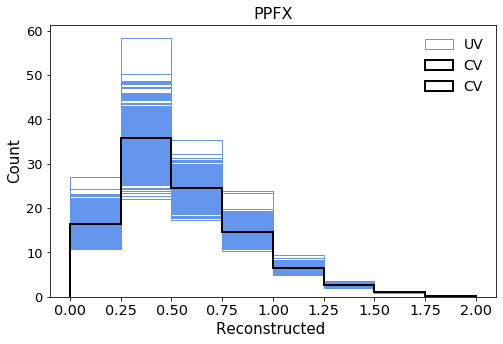

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0. 0. 0. 0. 0. 0. 0. 0.]


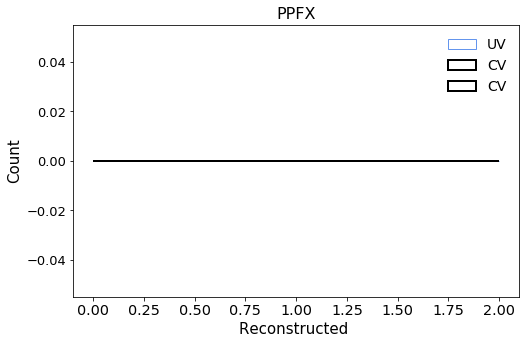

In [63]:
import matplotlib.pyplot as plt
import matplotlib


for j in range(len(detvar_dicts)):

    n=0
    #bin_centers = np.arange(1.25, 4.25, 0.5) #energy
    #bins = np.arange(1.0, 4.5, 0.5)
    #bin_centers = np.arange(-0.9, 1.1, 0.2) #Angle
    #bins = np.arange(-1, 1.2, 0.2)
    bin_centers = np.arange(0.125, 2.125, 0.25) #lepton
    bins = np.arange(0, 2.25, 0.25)
    print(bin_centers)
    print(bins)
    
    #OLD
    #bin_centers = np.arange(0.25, 5.25, 0.5)
    #bins = np.arange(0, 5.5, 0.5)

    fig = plt.figure(figsize=(8, 5)) 


    for variation in detvar_dicts[j].keys(): 

        if n==0: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation], 
                 linewidth=1, color='cornflowerblue', label='UV')

        else: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation],
                 linewidth=1, color='cornflowerblue')

        n+=1   


    plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)

    current = (plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)[0])

    print(current)

    plt.title('PPFX', fontsize=16)

    plt.ylabel('Count' , fontsize=15) # 2.68294E22
    plt.xlabel("Reconstructed ", fontsize=15)

    #plt.xticks(x_ticks, fontsize=13)
    plt.yticks(fontsize=13)

    plt.legend(frameon=False, fontsize=14)

    #plt.xlim(xlow, xhigh)


    plt.show()

In [64]:
#will need to edit this if batching

nue_nue_ppfx_detvar_dict = pd.DataFrame(detvar_dicts[0])
#print(nue_nue_ppfx_detvar_dict)
if isRun3 == False:
    #nue_nue_ppfx_detvar_dict.to_csv('nue_nue_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    #nue_nue_ppfx_detvar_dict.to_csv('nue_nue_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_'+ending+'.csv')
    nue_nue_ppfx_detvar_dict.to_csv('nue_nue_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_'+ending+'.csv')
elif isRun3 == True:
    #nue_nue_ppfx_detvar_dict.to_csv('nue_nue_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    #nue_nue_ppfx_detvar_dict.to_csv('nue_nue_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_'+ending+'.csv')
    nue_nue_ppfx_detvar_dict.to_csv('nue_nue_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_'+ending+'.csv')

In [65]:
masterlist = []
templist = []
for i in range((len(n_tots[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(n_tots)):
        templist.append(n_tots[j][i])
masterlist.append(templist)

#need to sum each part of the masterlist into one pair of arrays now
masterlist.pop(0)
final_ns_nue_nue_ppfx = []

for a in range(len(masterlist)):
    #print(sum(masterlist[a]))
    final_ns_nue_nue_ppfx.append(sum(masterlist[a]))

final_ncvs_nue_nue_ppfx = sum(n_cv_tots)


##################################################################

frames = []
for a in range(len(dfs_ppfx)):
    frames.append(dfs_ppfx[a][0])
    
    
total_ppfx_df = pd.concat(frames, ignore_index=True)
#print(total_ppfx_df)

#-----------------
frames2 = []
for b in range(len(df_ppfx_vars)):
    frames2.append(df_ppfx_vars[b][0])
    
    
total_ppfx_df_vars = pd.concat(frames2, ignore_index=False)
#print(total_ppfx_df_vars)

#-----------------
frames3 = []
for c in range(len(df_ppfx_splines)):
    frames3.append(df_ppfx_splines[c][0])
    
    
total_ppfx_df_splines = pd.concat(frames3, ignore_index=False)
print(total_ppfx_df_splines)

entry
12        0.017510
23        0.022237
66        0.020542
76        0.016724
244       0.021286
            ...   
124207    0.021502
124224    0.016703
124226    0.016488
124233    0.020677
124247    0.015230
Name: totweight_data, Length: 4677, dtype: float64


In [66]:
if isRun3 == False: 
    """
    np.savetxt("nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ns_nue_nue_ppfx[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ncvs_nue_nue_ppfx,
               delimiter =", ", 
               fmt ='% s')

    total_ppfx_df.to_csv('nue_nue_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_ppfx_df_vars.to_csv('nue_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_ppfx_df_splines.to_csv('nue_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    """
    """
    #################################
    #####angleDiff##################
    ############################

    np.savetxt("nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ns_nue_nue_ppfx[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ncvs_nue_nue_ppfx,
               delimiter =", ", 
               fmt ='% s')
    ###########################################

    total_ppfx_df.to_csv('nue_nue_syserss_df_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_ppfx_df_vars.to_csv('nue_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_ppfx_df_splines.to_csv('nue_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    """
    
    #################################
    #####leptonMom##################
    ############################

    np.savetxt("nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ns_nue_nue_ppfx[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ncvs_nue_nue_ppfx,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_ppfx_df.to_csv('nue_nue_syserss_df_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_ppfx_df_vars.to_csv('nue_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_ppfx_df_splines.to_csv('nue_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    
elif isRun3 == True:
    """
    np.savetxt("nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ns_nue_nue_ppfx[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ncvs_nue_nue_ppfx,
               delimiter =", ", 
               fmt ='% s')

    total_ppfx_df.to_csv('nue_nue_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_ppfx_df_vars.to_csv('nue_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_ppfx_df_splines.to_csv('nue_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    """
    """
    #################################
    #####angleDiff##################
    ############################

    np.savetxt("nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ns_nue_nue_ppfx[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ncvs_nue_nue_ppfx,
               delimiter =", ", 
               fmt ='% s')
    ###########################################

    total_ppfx_df.to_csv('nue_nue_syserss_df_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_ppfx_df_vars.to_csv('nue_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_ppfx_df_splines.to_csv('nue_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    """
    
    #################################
    #####leptonMom##################
    ############################

    np.savetxt("nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ns_nue_nue_ppfx[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ncvs_nue_nue_ppfx,
               delimiter =", ", 
               fmt ='% s')


    ###########################################

    total_ppfx_df.to_csv('nue_nue_syserss_df_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_ppfx_df_vars.to_csv('nue_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_ppfx_df_splines.to_csv('nue_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    

In [67]:
#############################
##### weightsGenie ###########
#############################

import syserr_batch_plotter_alex
import importlib
importlib.reload(syserr_batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = nue_nue.shape[0]
print("n_events here = ", n_events)
print("n_events/2 here = ", np.floor(n_events/2))
print("")
batch_size = n_events
#batch_size = int(np.floor(n_events/5))
#n_events = batch_size

n_cv_tots = []
n_tots = []
dfs_genie = []
df_genie_vars = []
df_genie_splines = []
detvar_dicts = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
#for i in range(1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = nue_nue.iloc[start:end]

    samples = {
        "nue_nue": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 
        nueratio  = pot/2.37838e+22 
    elif isRun3 == True:
        pot =  5.014e20
        nueratio  = pot/2.5345e+22 

    
    weights = {
                "nue_nue"  : nueratio  * SPLIT * scaling
    }


    my_plotter = syserr_batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)
    
    

    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Elec_asmuon_reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',8,(0.0, 2.0),"Lepton Momentum (GeV)"
    
    #OLD
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',10,(0.0, 5.0),"Lepton Momentum (GeV)"
    
    
    n_cv_tot, n_tot, df_genie, df_genie_var, df_genie_spline, detvar_dict  = my_plotter.plot_variable(
        VARIABLE,   
        query= NUE_SEL_QUERY,
        #query= "",
        currentsample = "nue_nue",
        typeerr = "standard",
        weight = "weightsGenie",
        category_query = " ",
        Nuniverse=500,
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "weightSplineTimesTuneTimesPPFX",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:6]
    
    
    n_cv_tots.append(n_cv_tot)
    n_tots.append(n_tot)
    dfs_genie.append(df_genie)
    df_genie_vars.append(df_genie_var)
    df_genie_splines.append(df_genie_spline)
    detvar_dicts.append(detvar_dict)

n_events here =  124396
n_events/2 here =  62198.0

1.0
1
{'nue_nue': 0.01978299467350562}
swtrig_pre==1 and nslice==1 and 10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_nu_vtx_sce_z<=1026 and contained_fraction>0.9 and n_showers_contained==1 and n_tracks_contained>0 and trk_energy>0.04 and shr_score<0.3 and shrmoliereavg<15 and shr_tkfit_dedx_Y<7 and trkpid<0.35 and tksh_distance<12 and targetP_asmuon_reco > 0.04 & targetP_asmuon_reco < 2.0 and targetP_asmuon > 0.04 & targetP_asmuon < 2.0 and BDT_score > 0.575& targetP_asmuon_reco <= 2 & targetP_asmuon_reco >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False

standard sys err
Universes 500
       0     1    2     3     4     5     6     7     8     9    ...   590  \
0     1431  1044  819  1334  1086  1501  1160  1198  1365  1369  ...  1447   
1     1393  1073  871  1317  1108  1452  1171  1208  1343  1342  ...  1407

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[16.49447441 35.78723907 24.55965424 14.56295013  6.58401489  2.75110626
  1.01988983  0.12819672]


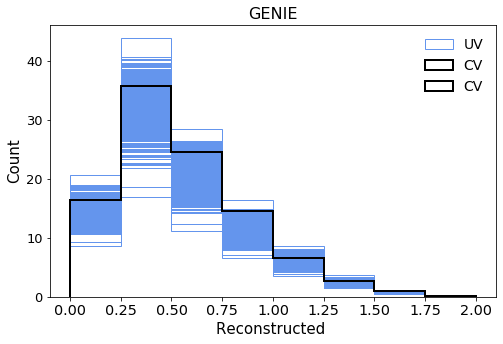

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0. 0. 0. 0. 0. 0. 0. 0.]


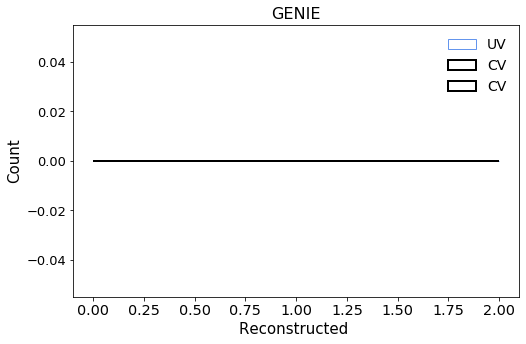

In [68]:
import matplotlib.pyplot as plt
import matplotlib


for j in range(len(detvar_dicts)):

    n=0
    #bin_centers = np.arange(1.25, 4.25, 0.5)
    #bins = np.arange(1.0, 4.5, 0.5)
    #bin_centers = np.arange(-0.9, 1.1, 0.2) #Angle
    #bins = np.arange(-1, 1.2, 0.2)
    bin_centers = np.arange(0.125, 2.125, 0.25) #lepton
    bins = np.arange(0, 2.25, 0.25)
    print(bin_centers)
    print(bins)
    
    #OLD
    #bin_centers = np.arange(0.25, 5.25, 0.5)
    #bins = np.arange(0, 5.5, 0.5)

    fig = plt.figure(figsize=(8, 5)) 


    for variation in detvar_dicts[j].keys(): 

        if n==0: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation], 
                 linewidth=1, color='cornflowerblue', label='UV')

        else: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation],
                 linewidth=1, color='cornflowerblue')

        n+=1   


    plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)

    current = (plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)[0])

    print(current)

    plt.title('GENIE', fontsize=16)

    plt.ylabel('Count' , fontsize=15) # 2.68294E22
    plt.xlabel("Reconstructed ", fontsize=15)

    #plt.xticks(x_ticks, fontsize=13)
    plt.yticks(fontsize=13)

    plt.legend(frameon=False, fontsize=14)

    #plt.xlim(xlow, xhigh)

    plt.show()

In [69]:
#will need to edit this if batching

nue_nue_genie_detvar_dict = pd.DataFrame(detvar_dicts[0])
#print(nue_nue_ppfx_detvar_dict)

if isRun3 == False:
    #nue_nue_genie_detvar_dict.to_csv('nue_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    #nue_nue_genie_detvar_dict.to_csv('nue_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_'+ending+'.csv')
    nue_nue_genie_detvar_dict.to_csv('nue_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_'+ending+'.csv')
elif isRun3 == True:
    #nue_nue_genie_detvar_dict.to_csv('nue_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')  
    #nue_nue_genie_detvar_dict.to_csv('nue_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_'+ending+'.csv') 
    nue_nue_genie_detvar_dict.to_csv('nue_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_'+ending+'.csv') 

In [70]:
masterlist = []
templist = []
for i in range((len(n_tots[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(n_tots)):
        templist.append(n_tots[j][i])
masterlist.append(templist)

#need to sum each part of the masterlist into one pair of arrays now
masterlist.pop(0)
final_ns_nue_nue_genie = []

for a in range(len(masterlist)):
    #print(sum(masterlist[a]))
    final_ns_nue_nue_genie.append(sum(masterlist[a]))

final_ncvs_nue_nue_genie = sum(n_cv_tots)

#####################################################
frames = []
for a in range(len(dfs_genie)):
    frames.append(dfs_genie[a][0])
    
    
total_genie_df = pd.concat(frames, ignore_index=True)
#print(total_genie_df)

#-----------------
frames2 = []
for b in range(len(df_genie_vars)):
    frames2.append(df_genie_vars[b][0])
    
    
total_genie_df_vars = pd.concat(frames2, ignore_index=False)
#print(total_genie_df_vars)

#-----------------
frames3 = []
for c in range(len(df_genie_splines)):
    frames3.append(df_genie_splines[c][0])
    
    
total_genie_df_splines = pd.concat(frames3, ignore_index=False)
#print(total_genie_df_splines)


In [71]:
if isRun3 == False:
    """
    np.savetxt("nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ns_nue_nue_genie[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ncvs_nue_nue_genie,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_genie_df.to_csv('nue_nue_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_genie_df_vars.to_csv('nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_genie_df_splines.to_csv('nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    """
    """
    
    #####################
    ###AngleDiff###
    ######################
    np.savetxt("nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ns_nue_nue_genie[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ncvs_nue_nue_genie,
               delimiter =", ", 
               fmt ='% s')

    ###########################################
    #typo missing _
    total_genie_df.to_csv('nue_nue_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_genie_df_vars.to_csv('nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_genie_df_splines.to_csv('nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    """
    
    #####################
    ###leptonMom###
    ######################
    np.savetxt("nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ns_nue_nue_genie[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ncvs_nue_nue_genie,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_genie_df.to_csv('nue_nue_syserss_df_genie_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_genie_df_vars.to_csv('nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_genie_df_splines.to_csv('nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    
elif isRun3 == True:
    """
    np.savetxt("nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ns_nue_nue_genie[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ncvs_nue_nue_genie,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_genie_df.to_csv('nue_nue_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_genie_df_vars.to_csv('nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_genie_df_splines.to_csv('nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    """
    
    """
    #####################
    ###AngleDiff###
    ######################
    np.savetxt("nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ns_nue_nue_genie[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ncvs_nue_nue_genie,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_genie_df.to_csv('nue_nue_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_genie_df_vars.to_csv('nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_genie_df_splines.to_csv('nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    """
    
    #####################
    ###leptonMom###
    ######################
    np.savetxt("nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ns_nue_nue_genie[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ncvs_nue_nue_genie,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_genie_df.to_csv('nue_nue_syserss_df_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_genie_df_vars.to_csv('nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_genie_df_splines.to_csv('nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    

In [72]:
#############################
##### weightsReint ###########
#############################

import syserr_batch_plotter_alex
import importlib
importlib.reload(syserr_batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = nue_nue.shape[0]
print("n_events here = ", n_events)
print("n_events/2 here = ", np.floor(n_events/2))
print("weightsReint")
#this time = nevents
batch_size = n_events
#batch_size = int(np.floor(n_events/5))
#n_events = batch_size

n_cv_tots = []
n_tots = []
dfs_reint = []
df_reint_vars = []
df_reint_splines = []
detvar_dicts = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
#for i in range(1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = nue_nue.iloc[start:end]

    samples = {
        "nue_nue": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 
        nueratio  = pot/2.37838e+22 
    elif isRun3 == True:
        pot =  5.014e20
        nueratio  = pot/2.5345e+22

    
    weights = {
                "nue_nue"  : nueratio  * SPLIT * scaling
    }


    my_plotter = syserr_batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)
    
    
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Elec_asmuon_reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',8,(0.0, 2.0),"Lepton Momentum (GeV)"

    #OLD
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',10,(0.0, 5.0),"Lepton Momentum (GeV)"
    
    
    n_cv_tot, n_tot, df_reint, df_reint_var, df_reint_spline, detvar_dict = my_plotter.plot_variable(
        VARIABLE,   
        query= NUE_SEL_QUERY,
        #query= "",
        currentsample = "nue_nue",
        typeerr = "standard",
        weight = "weightsReint",
        category_query = " ",
        Nuniverse=500,
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "weightSplineTimesTuneTimesPPFX",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:6]
    
    
    n_cv_tots.append(n_cv_tot)
    n_tots.append(n_tot)
    dfs_reint.append(df_reint)
    df_reint_vars.append(df_reint_var)
    df_reint_splines.append(df_reint_spline)
    detvar_dicts.append(detvar_dict)

n_events here =  124396
n_events/2 here =  62198.0
weightsReint
1.0
1
{'nue_nue': 0.01978299467350562}
swtrig_pre==1 and nslice==1 and 10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_nu_vtx_sce_z<=1026 and contained_fraction>0.9 and n_showers_contained==1 and n_tracks_contained>0 and trk_energy>0.04 and shr_score<0.3 and shrmoliereavg<15 and shr_tkfit_dedx_Y<7 and trkpid<0.35 and tksh_distance<12 and targetP_asmuon_reco > 0.04 & targetP_asmuon_reco < 2.0 and targetP_asmuon > 0.04 & targetP_asmuon < 2.0 and BDT_score > 0.575& targetP_asmuon_reco <= 2 & targetP_asmuon_reco >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False

standard sys err
Universes 500
       0     1     2     3     4     5     6     7     8     9    ...   990  \
0     1006   980  1085   992  1041   981   896   992   970  1029  ...   926   
1      936   826  1092  1010   895   970   974   955  1089  

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[16.49447441 35.78723907 24.55965424 14.56295013  6.58401489  2.75110626
  1.01988983  0.12819672]


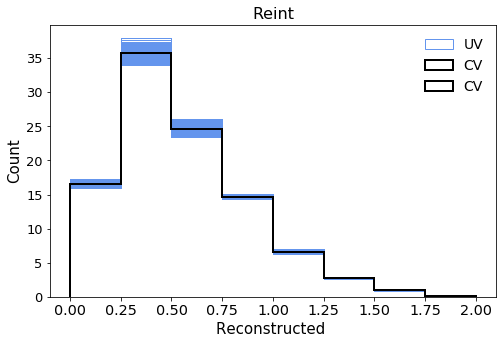

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0. 0. 0. 0. 0. 0. 0. 0.]


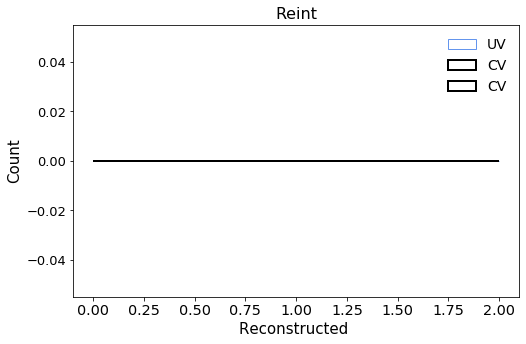

In [73]:
import matplotlib.pyplot as plt
import matplotlib


for j in range(len(detvar_dicts)):

    n=0
    #bin_centers = np.arange(1.25, 4.25, 0.5)
    #bins = np.arange(1.0, 4.5, 0.5)
    #bin_centers = np.arange(-0.9, 1.1, 0.2) #Angle
    #bins = np.arange(-1, 1.2, 0.2)
    bin_centers = np.arange(0.125, 2.125, 0.25)
    bins = np.arange(0, 2.25, 0.25)
    print(bin_centers)
    print(bins)
    
    #OLD
    #bin_centers = np.arange(0.25, 5.25, 0.5)
    #bins = np.arange(0, 5.5, 0.5)

    fig = plt.figure(figsize=(8, 5)) 


    for variation in detvar_dicts[j].keys(): 

        if n==0: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation], 
                 linewidth=1, color='cornflowerblue', label='UV')

        else: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation],
                 linewidth=1, color='cornflowerblue')

        n+=1   


    plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)

    current = (plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)[0])

    print(current)

    plt.title('Reint', fontsize=16)

    plt.ylabel('Count' , fontsize=15) # 2.68294E22
    plt.xlabel("Reconstructed ", fontsize=15)

    #plt.xticks(x_ticks, fontsize=13)
    plt.yticks(fontsize=13)

    plt.legend(frameon=False, fontsize=14)

    #plt.xlim(xlow, xhigh)


    plt.show()

In [74]:
#will need to edit this if batching

nue_nue_reint_detvar_dict = pd.DataFrame(detvar_dicts[0])
#print(nue_nue_ppfx_detvar_dict)

if isRun3 == False:
    #nue_nue_reint_detvar_dict.to_csv('nue_nue_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    #nue_nue_reint_detvar_dict.to_csv('nue_nue_syserss_df_reint_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_'+ending+'.csv')
    nue_nue_reint_detvar_dict.to_csv('nue_nue_syserss_df_reint_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_'+ending+'.csv')
elif isRun3 == True:
    #nue_nue_reint_detvar_dict.to_csv('nue_nue_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv') 
    #nue_nue_reint_detvar_dict.to_csv('nue_nue_syserss_df_reint_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_'+ending+'.csv') 
    nue_nue_reint_detvar_dict.to_csv('nue_nue_syserss_df_reint_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_'+ending+'.csv')

In [75]:
masterlist = []
templist = []
for i in range((len(n_tots[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(n_tots)):
        templist.append(n_tots[j][i])
masterlist.append(templist)

#need to sum each part of the masterlist into one pair of arrays now
masterlist.pop(0)
final_ns_nue_nue_reint = []

for a in range(len(masterlist)):
    #print(sum(masterlist[a]))
    final_ns_nue_nue_reint.append(sum(masterlist[a]))

final_ncvs_nue_nue_reint = sum(n_cv_tots)
print(final_ncvs_nue_nue_reint)

#######################################

frames = []
for a in range(len(dfs_reint)):
    frames.append(dfs_reint[a][0])
     
total_reint_df = pd.concat(frames, ignore_index=True)
print(total_reint_df)

#-----------------
frames2 = []
for b in range(len(df_reint_vars)):
    frames2.append(df_reint_vars[b][0])
    
    
total_reint_df_vars = pd.concat(frames2, ignore_index=False)
print(total_reint_df_vars)

#-----------------
frames3 = []
for c in range(len(df_reint_splines)):
    frames3.append(df_reint_splines[c][0])
    
    
total_reint_df_splines = pd.concat(frames3, ignore_index=False)
print(total_reint_df_splines)

[16.49447441 35.78724289 24.55965233 14.56295204  6.58401442  2.75110769
  1.01988721  0.12819943]
       0     1     2     3     4     5     6     7     8     9    ...   990  \
0     1006   980  1085   992  1041   981   896   992   970  1029  ...   926   
1      936   826  1092  1010   895   970   974   955  1089   952  ...   924   
2      864   618  1415  1012   822   902   789   885  1179   933  ...   731   
3      948   852  1097  1007   921   971   955   961  1069   966  ...   920   
4      980   940  1037  1002   970   988   981   984  1025   987  ...   967   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
4672   975   927  1041  1003   960   987   982   981  1032   983  ...   964   
4673  1132  1405   704   984  1186  1083  1142  1105   832  1073  ...  1233   
4674  1007  1035   757  1009   945  1048  1212  1031   991   962  ...  1160   
4675   968   908  1050  1004   947   984   982   977  1043   977  ...   957   
4676  1071  1234   707   998  10

In [76]:
if isRun3 == False:
    """
    np.savetxt("nue_nue_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ns_nue_nue_reint[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ncvs_nue_nue_reint,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_reint_df.to_csv('nue_nue_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_reint_df_vars.to_csv('nue_nue_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_reint_df_splines.to_csv('nue_nue_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    """
    """
    #################
    ###angleDiff#####
    #################

    np.savetxt("nue_nue_syserss_final_ns_reint_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ns_nue_nue_reint[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ncvs_nue_nue_reint,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_reint_df.to_csv('nue_nue_syserss_df_reint_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_reint_df_vars.to_csv('nue_nue_syserss_df_reint_vars_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_reint_df_splines.to_csv('nue_nue_syserss_df_reint_splines_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    """

    
    #################
    ###leptonMom#####
    #################

    np.savetxt("nue_nue_syserss_final_ns_reint_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ns_nue_nue_reint[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ncvs_nue_nue_reint,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_reint_df.to_csv('nue_nue_syserss_df_reint_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_reint_df_vars.to_csv('nue_nue_syserss_df_reint_vars_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_reint_df_splines.to_csv('nue_nue_syserss_df_reint_splines_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    
elif isRun3 == True:
    """
    np.savetxt("nue_nue_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ns_nue_nue_reint[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ncvs_nue_nue_reint,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_reint_df.to_csv('nue_nue_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_reint_df_vars.to_csv('nue_nue_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_reint_df_splines.to_csv('nue_nue_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    """
    """
    #################
    ###angleDiff#####
    #################

    np.savetxt("nue_nue_syserss_final_ns_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ns_nue_nue_reint[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ncvs_nue_nue_reint,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_reint_df.to_csv('nue_nue_syserss_df_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_reint_df_vars.to_csv('nue_nue_syserss_df_reint_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_reint_df_splines.to_csv('nue_nue_syserss_df_reint_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    """

    
    #################
    ###leptonMom#####
    #################

    np.savetxt("nue_nue_syserss_final_ns_reint_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ns_nue_nue_reint[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ncvs_nue_nue_reint,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_reint_df.to_csv('nue_nue_syserss_df_reint_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_reint_df_vars.to_csv('nue_nue_syserss_df_reint_vars_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_reint_df_splines.to_csv('nue_nue_syserss_df_reint_splines_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    

In [77]:
#############################
##### weightsNuMIGeo ###########
#############################

import syserr_batch_plotter_alex
import importlib
importlib.reload(syserr_batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = nue_nue.shape[0]
print("n_events here = ", n_events)
print("n_events/2 here = ", np.floor(n_events/2))
#was I out of it choosing batch sizes?!
batch_size = n_events
#batch_size = int(np.floor(n_events/5))
#n_events = batch_size

n_cv_tots = []
n_tots = []
dfs_geo = []
df_geo_vars = []
df_geo_splines = []
detvar_dicts = []

print(n_events/batch_size)
print(int(n_events/batch_size)+1)

for i in range(int(n_events/batch_size)+1):
#for i in range(1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = nue_nue.iloc[start:end]

    samples = {
        "nue_nue": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 
        nueratio  = pot/2.37838e+22 
    elif isRun3 == True:
        pot =  5.014e20
        nueratio  = pot/2.5345e+22

    
    weights = {
                "nue_nue"  : nueratio  * SPLIT * scaling
    }


    my_plotter = syserr_batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)
    
    

    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Elec_asmuon_reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',8,(0.0, 2.0),"Lepton Momentum (GeV)"

    
    #OLD
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',10,(0.0, 5.0),"Lepton Momentum (GeV)" 
    
    n_cv_tot, n_tot, df_geo, df_geo_var, df_geo_spline, detvar_dict = my_plotter.plot_variable(
        VARIABLE,   
        query= NUE_SEL_QUERY,
        #query= "",
        currentsample = "nue_nue",
        typeerr = "NuMIGeo",
        weight = "weightsGenie",
        category_query = " ",
        Nuniverse=10,
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "weightSplineTimesTuneTimesPPFX",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:6]
    
    
    n_cv_tots.append(n_cv_tot)
    n_tots.append(n_tot)
    dfs_geo.append(df_geo)
    df_geo_vars.append(df_geo_var)
    df_geo_splines.append(df_geo_spline)
    detvar_dicts.append(detvar_dict)

n_events here =  124396
n_events/2 here =  62198.0
1.0
2
{'nue_nue': 0.01978299467350562}
swtrig_pre==1 and nslice==1 and 10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_nu_vtx_sce_z<=1026 and contained_fraction>0.9 and n_showers_contained==1 and n_tracks_contained>0 and trk_energy>0.04 and shr_score<0.3 and shrmoliereavg<15 and shr_tkfit_dedx_Y<7 and trkpid<0.35 and tksh_distance<12 and targetP_asmuon_reco > 0.04 & targetP_asmuon_reco < 2.0 and targetP_asmuon > 0.04 & targetP_asmuon < 2.0 and BDT_score > 0.575& targetP_asmuon_reco <= 2 & targetP_asmuon_reco >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False

NuMI Geo sys err
Number of variations Universes 10
Returning
--------------------------

{'nue_nue': 0.01978299467350562}
swtrig_pre==1 and nslice==1 and 10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_nu_vtx_sce_z<=1026 and contained_fr

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]


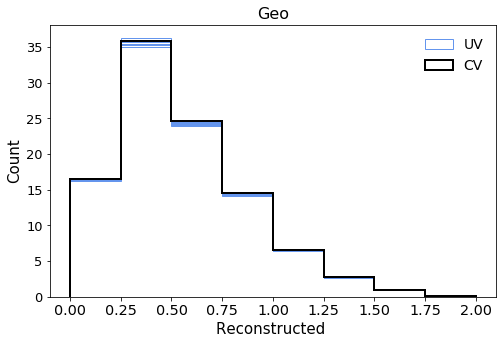

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]


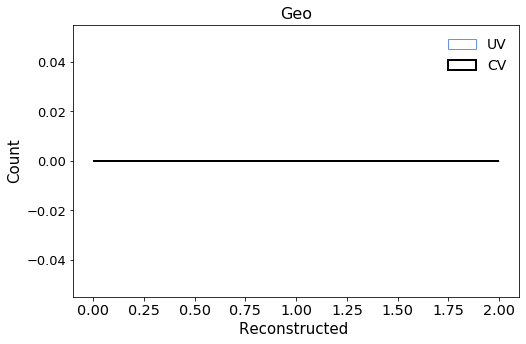

In [78]:
import matplotlib.pyplot as plt
import matplotlib


for j in range(len(detvar_dicts)):

    n=0
    #bin_centers = np.arange(1.25, 4.25, 0.5)
    #bins = np.arange(1.0, 4.5, 0.5)
    #bin_centers = np.arange(-0.9, 1.1, 0.2) #Angle
    #bins = np.arange(-1, 1.2, 0.2)
    bin_centers = np.arange(0.125, 2.125, 0.25) #lepton
    bins = np.arange(0, 2.25, 0.25)
    print(bin_centers)
    print(bins)
    
    #OLD
    #bin_centers = np.arange(0.25, 5.25, 0.5)
    #bins = np.arange(0, 5.5, 0.5)

    fig = plt.figure(figsize=(8, 5)) 


    for variation in detvar_dicts[j].keys(): 

        if n==0: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation], 
                 linewidth=1, color='cornflowerblue', label='UV')

        else: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation],
                 linewidth=1, color='cornflowerblue')

        n+=1   


    plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)

    #current = (plt.hist(bin_centers, bins, histtype='step', 
    #                 weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)[0])

    #print(current)

    plt.title('Geo', fontsize=16)

    plt.ylabel('Count' , fontsize=15) # 2.68294E22
    plt.xlabel("Reconstructed ", fontsize=15)

    #plt.xticks(x_ticks, fontsize=13)
    plt.yticks(fontsize=13)

    plt.legend(frameon=False, fontsize=14)

    #plt.xlim(xlow, xhigh)


    plt.show()

In [79]:
#will need to edit this if batching

nue_nue_geo_detvar_dict = pd.DataFrame(detvar_dicts[0])
#print(nue_nue_ppfx_detvar_dict)

if isRun3 == False:
    #nue_nue_geo_detvar_dict.to_csv('nue_nue_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    #nue_nue_geo_detvar_dict.to_csv('nue_nue_syserss_df_geo_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_'+ending+'.csv')
    nue_nue_geo_detvar_dict.to_csv('nue_nue_syserss_df_geo_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_'+ending+'.csv')
elif isRun3 == True:
    #nue_nue_geo_detvar_dict.to_csv('nue_nue_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv') 
    #nue_nue_geo_detvar_dict.to_csv('nue_nue_syserss_df_geo_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_'+ending+'.csv')
    nue_nue_geo_detvar_dict.to_csv('nue_nue_syserss_df_geo_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_'+ending+'.csv')

In [80]:

masterlist = []
templist = []
for i in range((len(n_tots[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(n_tots)):
        templist.append(n_tots[j][i])
masterlist.append(templist)

#need to sum each part of the masterlist into one pair of arrays now
masterlist.pop(0)
final_ns_nue_nue_geo = []

for a in range(len(masterlist)):
    #print(sum(masterlist[a]))
    final_ns_nue_nue_geo.append(sum(masterlist[a]))

final_ncvs_nue_nue_geo = sum(n_cv_tots)
#print(final_ns_nue_nue_geo[0])

for x in range(len(final_ns_nue_nue_geo)):
    final_ns_nue_nue_geo[x] = np.concatenate((final_ns_nue_nue_geo[x][0], final_ns_nue_nue_geo[x][1]))
    
    
#print(final_ns_nue_nue_geo[0])  

####################################################

frames = []
for a in range(len(dfs_geo)):
    frames.append(dfs_geo[a][0])
    
    
total_geo_df = pd.concat(frames, ignore_index=True)
#print(total_geo_df)

#-----------------
frames2 = []
for b in range(len(df_geo_vars)):
    frames2.append(df_geo_vars[b][0])
    
    
total_geo_df_vars = pd.concat(frames2, ignore_index=False)
#print(total_geo_df_vars)

#-----------------
frames3 = []
for c in range(len(df_geo_splines)):
    frames3.append(df_geo_splines[c][0])
    
    
total_geo_df_splines = pd.concat(frames3, ignore_index=False)
#print(total_geo_df_splines)

In [81]:
if isRun3 == False:
    """
    np.savetxt("nue_nue_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ns_nue_nue_geo,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_nue_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ncvs_nue_nue_geo,
               delimiter =", ", 
               fmt ='% s')

    #######################################################

    total_geo_df.to_csv('nue_nue_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_geo_df_vars.to_csv('nue_nue_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_geo_df_splines.to_csv('nue_nue_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    """
    """
    #####################
    ###angleDiff########
    ####################

    np.savetxt("nue_nue_syserss_final_ns_geo_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ns_nue_nue_geo,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_nue_syserss_final_ncvs_geo_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ncvs_nue_nue_geo,
               delimiter =", ", 
               fmt ='% s')

    #######################################################

    total_geo_df.to_csv('nue_nue_syserss_df_geo_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_geo_df_vars.to_csv('nue_nue_syserss_df_geo_vars_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_geo_df_splines.to_csv('nue_nue_syserss_df_geo_splines_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    """
    
    #####################
    ###leptonMom########
    ####################

    np.savetxt("nue_nue_syserss_final_ns_geo_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ns_nue_nue_geo,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_nue_syserss_final_ncvs_geo_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ncvs_nue_nue_geo,
               delimiter =", ", 
               fmt ='% s')

    #######################################################

    total_geo_df.to_csv('nue_nue_syserss_df_geo_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_geo_df_vars.to_csv('nue_nue_syserss_df_geo_vars_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_geo_df_splines.to_csv('nue_nue_syserss_df_geo_splines_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    
elif isRun3 == True:
    """
    np.savetxt("nue_nue_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ns_nue_nue_geo,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_nue_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ncvs_nue_nue_geo,
               delimiter =", ", 
               fmt ='% s')

    #######################################################

    total_geo_df.to_csv('nue_nue_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_geo_df_vars.to_csv('nue_nue_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_geo_df_splines.to_csv('nue_nue_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    """
    """
    #####################
    ###angleDiff########
    ####################

    np.savetxt("nue_nue_syserss_final_ns_geo_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ns_nue_nue_geo,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_nue_syserss_final_ncvs_geo_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ncvs_nue_nue_geo,
               delimiter =", ", 
               fmt ='% s')

    #######################################################

    total_geo_df.to_csv('nue_nue_syserss_df_geo_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_geo_df_vars.to_csv('nue_nue_syserss_df_geo_vars_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_geo_df_splines.to_csv('nue_nue_syserss_df_geo_splines_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    """
    
    #####################
    ###leptonMom########
    ####################

    np.savetxt("nue_nue_syserss_final_ns_geo_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ns_nue_nue_geo,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_nue_syserss_final_ncvs_geo_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ncvs_nue_nue_geo,
               delimiter =", ", 
               fmt ='% s')

    #######################################################

    total_geo_df.to_csv('nue_nue_syserss_df_geo_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_geo_df_vars.to_csv('nue_nue_syserss_df_geo_vars_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_geo_df_splines.to_csv('nue_nue_syserss_df_geo_splines_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    
    


## NUE_MC SAMPLE

In [5]:
isRun3

True

In [6]:
import time
s = time.time()

# Name of the TTree in the PeLEE Ntuples
tree = "NeutrinoSelectionFilter"

#cut samples
#NU   = '/pre_samp/prodgenie_numi_uboone_overlay_fhc_mcc9_run1_v28_all_snapshot'    +ls.APPEND #newTune
#full sample
if isRun3 == False:
    NU   = '/neutrinoselection_filt_run1_overlay'    +ls.APPEND #newTun
elif isRun3 == True:
    NU   = '/neutrinoselection_filt_run3b_overlay'    +ls.APPEND #newTun
        

#actually fetch datasets
nue_mc  = uproot.open(ls.ntuple_path+NU+".root")[ls.fold][tree]

# Define a list that contains the data sets
uproot_v = [nue_mc]

nue_variables = ["run", "sub", "evt", "swtrig_pre",            
             "trk_score_v", "topological_score", "shr_score",
            "reco_nu_vtx_sce_x", "reco_nu_vtx_sce_y", "reco_nu_vtx_sce_z", "shr_tkfit_npoints",
            "CosmicIPAll3D", "hits_ratio", "contained_fraction",
            "shrmoliereavg", "shr_tkfit_dedx_U","shr_tkfit_dedx_V","shr_tkfit_dedx_Y",
            "shr_energy", "category", "slnunhits", "slnhits", "flash_time", "nu_pdg", "ccnc",
             "selected", "nslice", "shr_distance", "shr_theta", "shr_phi", "npi0", "proton_e", "elec_e",
            "shr_tkfit_nhits_U", "shr_tkfit_nhits_V", "shr_tkfit_nhits_Y", "n_tracks_contained",
            "n_showers", "n_tracks", "shr_energy_cali", "n_showers_contained", "tksh_distance", "tksh_angle",
             "trkshrhitdist2", 'shrsubclusters0', 'shrsubclusters1', 'shrsubclusters2',
             "shr_energy_tot_cali", 'trk_energy_tot', 'nproton', 'npion', 'trk_energy', 'shr_px', 'shr_py', 'shr_pz']


# These are examples of variables present in MC samples only
nue_varMC = ["nu_e", "true_pt","true_pt_visible","true_p","true_p_visible","true_nu_vtx_t","true_nu_vtx_x","true_nu_vtx_y","true_nu_vtx_z","true_nu_vtx_sce_x","true_nu_vtx_sce_y","true_nu_vtx_sce_z\
","true_nu_px","true_nu_py","true_nu_pz", "mc_pdg", "mc_px", "mc_py", "mc_pz"]

#make the list unique (sometimes you repeat the variable name in the list, this takes care of that)
nue_variables = list(set(nue_variables))
print(nue_variables)



# These weights are needed to correctly calculate the CV for the MC    
WEIGHTS     = ["weightSpline","weightTune","weightSplineTimesTune","ppfx_cv"]
# These weights are needed to calculate the Flux, GENIE and Geant4 Systematics. 
# For NuMI weightsFlux should always be 1 (cause that's relevant for BNB).
SYSTEMATICS = ['weightsFlux','weightsGenie','weightsReint'] 
PPFX        = ['weightsPPFX'] 



WEIGHTSLEE = ["weightSpline","weightTune","weightSplineTimesTune", "leeweight"]#, "weightsGenie", "weightsFlux", "weightsReint"]
MCFVARS    = ["mcf_nu_e","mcf_lep_e","mcf_actvol","mcf_nmm","mcf_nmp","mcf_nem","mcf_nep","mcf_np0","mcf_npp",
              "mcf_npm","mcf_mcshr_elec_etot","mcf_pass_ccpi0","mcf_pass_ncpi0",
              "mcf_pass_ccnopi","mcf_pass_ncnopi","mcf_pass_cccpi","mcf_pass_nccpi"]

nue_mc  = nue_mc.pandas.df(nue_variables + WEIGHTS + MCFVARS + SYSTEMATICS + PPFX + nue_varMC, flatten=False)

#just prints out the time this cell takes
print("==============================")
s2 = time.time()
print ("time to run: ",s2-s)

['elec_e', 'shr_py', 'shr_tkfit_dedx_U', 'shr_phi', 'shrmoliereavg', 'trk_score_v', 'shr_tkfit_nhits_Y', 'topological_score', 'evt', 'ccnc', 'trk_energy', 'shr_energy_cali', 'reco_nu_vtx_sce_z', 'n_tracks_contained', 'n_showers_contained', 'contained_fraction', 'shr_pz', 'slnunhits', 'shr_tkfit_dedx_V', 'nslice', 'reco_nu_vtx_sce_x', 'nproton', 'category', 'shrsubclusters0', 'slnhits', 'nu_pdg', 'trkshrhitdist2', 'shrsubclusters2', 'shr_tkfit_nhits_U', 'shr_energy_tot_cali', 'sub', 'shr_px', 'trk_energy_tot', 'shr_energy', 'proton_e', 'shr_theta', 'shr_tkfit_nhits_V', 'shrsubclusters1', 'n_tracks', 'shr_tkfit_dedx_Y', 'npion', 'tksh_distance', 'run', 'tksh_angle', 'n_showers', 'npi0', 'shr_score', 'shr_tkfit_npoints', 'CosmicIPAll3D', 'hits_ratio', 'selected', 'swtrig_pre', 'reco_nu_vtx_sce_y', 'shr_distance', 'flash_time']
time to run:  1084.680773973465


In [7]:
# In the next cell, we are going to play with the value of the event weights. 
# Let's store the original ones in some "safe variable" in this cell first.
# So if we screw up, we don't have to re-load the humongous TTree: we'll have the original weights safely stored here
df_v = [nue_mc]

#removeGenieTune = False
for i,df in enumerate(df_v):
    df[ 'currentweightsafe' ] = df['weightSplineTimesTune']
    df[ 'currentweight' ] = df['weightSplineTimesTune']

In [8]:
constructNuMISys = True

# We need to do this only for the MC samples (all data events weight = 1)
df_v = [nue_mc]

for i,df in enumerate(df_v):
    # This portion cleans up the basic weights
    df.loc[ df['weightTune'] <= 0, 'weightTune' ] = 1.
    df.loc[ df['weightTune'] == np.inf, 'weightTune' ] = 1.
    df.loc[ df['weightTune'] > 100, 'weightTune' ] = 1.
    df.loc[ np.isnan(df['weightTune']) == True, 'weightTune' ] = 1.
    # This portion cleans up the weights after the GENIE tune is applied
    df.loc[ df['weightSplineTimesTune'] <= 0, 'weightSplineTimesTune' ] = 1.
    df.loc[ df['weightSplineTimesTune'] == np.inf, 'weightSplineTimesTune' ] = 1.
    df.loc[ df['weightSplineTimesTune'] > 100, 'weightSplineTimesTune' ] = 1. #originally 100
    df.loc[ np.isnan(df['weightSplineTimesTune']) == True, 'weightSplineTimesTune' ] = 1. 
    
    # weightSplineTimesTuneTimesPPFX is our final weight: this is NuMI, so the final weight of the MC events needs 
    # to take into account the NuMI Flux re-weight called ppfx_cv to simulate NuMI events properly. 
    df[ 'weightSplineTimesTuneTimesPPFX' ] = df[ 'weightSplineTimesTune' ]*df['ppfx_cv']
    
    
    # We also need to fix some cray cray weights in the GENIE systematics. 
    # This is a bit of a pain in the butt cause we have 600 universe (= 600 weights) for each event
    for ievt in range(df.shape[0]):
        reweightCondition = ((df['weightsGenie'].iloc[ievt] > 3000) | (df['weightsGenie'].iloc[ievt] < 0)  | 
                             (df['weightsGenie'].iloc[ievt] == np.inf))
        df['weightsGenie'].iloc[ievt][ reweightCondition ] = 1.
    

In [9]:
#nue_nue = pot_scale(nue_nue, 'intrinsic', ISRUN3)
if isRun3 == False:
    beamon_pot = 2.0E20 #v5
    overlay_pot =  2.33652E21
elif isRun3 == True:
    beamon_pot = 5.014E20 #v5
    overlay_pot =  1.98937e+21    

nue_mc['pot_scale'] = beamon_pot/overlay_pot

In [10]:
nue_mc['totweight_data'] = nue_mc['pot_scale']*nue_mc['weightSplineTimesTuneTimesPPFX']

In [11]:
from scipy.spatial.transform import Rotation as R
from numpy import arccos, array
from numpy.linalg import norm

# Note: returns angle in radians
def theta(v, w): return arccos(v.dot(w)/(norm(v)*norm(w)))* 180 / 3.1415926

def GetNuMIAngle( px,  py,  pz):
    r = R.from_matrix([[0.92103853804025681562   , 0.022713504803924120662, 0.38880857519374290021  ],
                       [4.6254001262154668408e-05, 0.99829162468141474651 , -0.058427989452906302359],
                       [-0.38947144863934973769  , 0.053832413938664107345, 0.91946400794392302291  ]])  
    r = r.inv()
    beamCoords = r.apply([px,  py,  pz])
    beamDir    = [0,0,1]
    #print(theta(beamCoords,beamDir))
    return theta(beamCoords,beamDir)

def GetNuMIAnglePol( phiBNB,  thetaBNB):
    px = math.sin(thetaBNB)*math.cos(phiBNB)
    py = math.sin(thetaBNB)*math.sin(phiBNB)
    pz = math.cos(thetaBNB)
    return GetNuMIAngle( px,  py,  pz)

In [12]:
def vectorFromNuMITarget(vtxX,  vtxY, vtxZ):
    numiTarget      = np.array([-31387.58422, -3316.402543, -60100.2414])
    nuInteraction   = np.array([vtxX,  vtxY, vtxZ])
    directionVector = nuInteraction - numiTarget
    return directionVector

def angleFromNuMITarget(vtxX,  vtxY, vtxZ, thetaBNB, phiBNB):
    v1 = vectorFromNuMITarget(vtxX,  vtxY, vtxZ)  
    norm = np.linalg.norm(v1)
    v1 = v1/norm
    v2 = [np.cos(phiBNB)*np.sin(thetaBNB),np.sin(phiBNB)*np.sin(thetaBNB), np.cos(thetaBNB) ]
    dot_product = np.dot(v1, v2)
    angle = np.arccos(dot_product)
    return angle #dot_product # angle*180/3.14159265



angleFromNuMITarget(1,1,1,1.4,3.)

1.8690124908136228

In [13]:
#RECO VARIABLE

#This assumes the electron to be the leading shower

for i,df in enumerate(df_v):
    df['targetP_asmuon_reco']     = np.sqrt(df['shr_px']*df['shr_px'] + df['shr_py']*df['shr_py'] + df['shr_pz']*df['shr_pz'])
    #df['targetPt_asmuon']    = np.sqrt(df['shr_px']*df['shr_px'] + df['shr_py']*df['shr_py'])
    #df['targetTheta_asmuon'] = np.arccos(df['shr_pz']/df['targetP_asmuon'] )
    #df['targetPhi_asmuon']   = np.arctan2(df['shr_py'],df['shr_px'])
    df['nu_Angle_Numi_Elec_asmuon_reco'] = df.apply( lambda x: angleFromNuMITarget(x['reco_nu_vtx_sce_x'],x['reco_nu_vtx_sce_y'],x['reco_nu_vtx_sce_z'], x['shr_theta'],x['shr_phi']) , axis=1)
    df['cosNu_Angle_Numi_Elec_asmuon_reco'] = np.cos(df['nu_Angle_Numi_Elec_asmuon_reco'])

In [14]:
#TRUTH VARIABLE

import time
s = time.time()

for i,df in enumerate(df_v):
    df["elec_px_asmuon"] = np.nan
    df["elec_py_asmuon"] = np.nan
    df["elec_pz_asmuon"] = np.nan
    for j in range(len(df["mc_pdg"])):
        pdg_vector = df["mc_pdg"].iloc[j][0]
        px_vector = df["mc_px"].iloc[j]
        py_vector = df["mc_py"].iloc[j]
        pz_vector = df["mc_pz"].iloc[j]
        result = np.where(pdg_vector==11)[0]
        if np.size(result):
            df.loc[j, "elec_px_asmuon"] = px_vector[result][0]
            df.loc[j, "elec_py_asmuon"] = py_vector[result][0]
            df.loc[j, "elec_pz_asmuon"] = pz_vector[result][0]
            
    print(df["elec_px_asmuon"])
    
#just prints out the time this cell takes
s2 = time.time()
print ("time to run: ",s2-s)

entry
0              NaN
1              NaN
2              NaN
3              NaN
4        -0.105375
            ...   
748697         NaN
748698         NaN
748699    0.113860
748700         NaN
748701         NaN
Name: elec_px_asmuon, Length: 748702, dtype: float64
time to run:  78.4231698513031


In [15]:
#TRUTH_VARIABLE

for i,df in enumerate(df_v):
    df['targetP_asmuon']     = np.sqrt(df['elec_px_asmuon']*df['elec_px_asmuon'] + df['elec_py_asmuon']*df['elec_py_asmuon'] + df['elec_pz_asmuon']*df['elec_pz_asmuon'])
    df['targetPt_asmuon']    = np.sqrt(df['elec_px_asmuon']*df['elec_px_asmuon'] + df['elec_py_asmuon']*df['elec_py_asmuon'])
    df['targetTheta_asmuon'] = np.arccos(df['elec_pz_asmuon']/df['targetP_asmuon'] )
    df['targetPhi_asmuon']   = np.arctan2(df['elec_py_asmuon'],df['elec_px_asmuon'])
    df['nu_Angle_Numi_Elec_asmuon'] = df.apply( lambda x: angleFromNuMITarget(x['true_nu_vtx_sce_x'],x['true_nu_vtx_sce_y'],x['true_nu_vtx_sce_z'], x['targetTheta_asmuon'],x['targetPhi_asmuon']) , axis=1)
    df['cosNu_Angle_Numi_Elec_asmuon'] = np.cos(df['nu_Angle_Numi_Elec_asmuon'])

In [16]:
#This cell is about creating some new variables from the ones we have

import time
s = time.time()

#use all samples
df_v = [nue_mc]


puppa1 = 'trk_score_v'


for i,df in enumerate(df_v):
    up = uproot_v[i]
    trk_theta_proton_v  = up.array('trk_theta_v')
    trk_phi_proton_v    = up.array('trk_phi_v')
    trk_score_v         = up.array('trk_score_v')    
    trk_llr_pid_v       = up.array('trk_llr_pid_score_v')
    trk_energy_proton_v = up.array('trk_energy_proton_v')
    trk_calo_energy_y_v = up.array('trk_calo_energy_y_v')
    trk_id              = up.array('trk_id')-1 # I think we need this -1 to get the right result
    c                   = up.array('n_tracks_contained')
    trk_theta_proton_v  = up.array('trk_theta_v')
    trk_phi_proton_v    = up.array('trk_phi_v')

    trk_theta_proton_sel  = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_theta_proton_v,trk_id)])
    trk_phi_proton_sel    = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_phi_proton_v,trk_id)])
    df['protontheta']  = trk_theta_proton_sel
    df['protonphi']    = trk_phi_proton_sel

    #print(trk_score_v.shape, len(trk_llr_pid_v))

    #dummy variables
    puppa_obj = []
    puppa_trk = []
    puppa_shw = []
    puppa_prt = [] 
    puppa_mu  = []
    
    for pidv, p in zip(trk_llr_pid_v,trk_score_v):
        N_obj         = 0
        N_recoTrks    = 0
        N_recoShowers = 0
        N_recoProtons = 0
        N_recoMuons   = 0
        if len(pidv) > 0:
            passPIDCut = (pidv <= 0)
            passTrkCut = (p    >= 0)
            protonCut  = (passPIDCut & passTrkCut) 
            muonCut    = (np.logical_not(passPIDCut) & passTrkCut) 
            N_obj         = len(passTrkCut)
            N_recoTrks    = np.count_nonzero(passTrkCut)
            N_recoShowers = np.count_nonzero(np.logical_not(passTrkCut))
            N_recoProtons = np.count_nonzero(protonCut)
            N_recoMuons   = np.count_nonzero(muonCut)
        puppa_obj.append(N_obj)
        puppa_trk.append(N_recoTrks)
        puppa_shw.append(N_recoShowers)    
        puppa_prt.append(N_recoProtons)
        puppa_mu .append(N_recoMuons)

    df['N_obj']           = puppa_obj
    df['N_recoTrks']      = puppa_trk
    df['N_recoShowers']   = puppa_shw
    df['N_recoProtons']   = puppa_prt
    df['N_recoMuons']     = puppa_mu
    
    trk_llr_pid_v_sel     = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_llr_pid_v,trk_id)])
    trk_energy_proton_sel = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_energy_proton_v,trk_id)])
    trk_calo_energy_y_sel = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_calo_energy_y_v,trk_id)])
    trk_theta_proton_sel  = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_theta_proton_v,trk_id)])
    trk_phi_proton_sel    = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_phi_proton_v,trk_id)])

    df['trkpid']          = trk_llr_pid_v_sel
    df['protonenergy']    = trk_energy_proton_sel
    df['trackcaloenergy'] = trk_calo_energy_y_sel
    df['subcluster']      = df['shrsubclusters0'] + df['shrsubclusters1'] + df['shrsubclusters2']

    df['protontheta']  = trk_theta_proton_sel
    df['protonphi']    = trk_phi_proton_sel

#calculate angles wrt NuMI reference frame
for i,df in enumerate(df_v):
    #df['shr_numi_Angle']    = df.apply( lambda x: GetNuMIAngle(x['shr_px'],x['shr_py'],x['shr_pz']) , axis=1)
    df['proton_numi_Angle'] = df.apply( lambda x: GetNuMIAnglePol(x['protonphi'],x['protontheta']) , axis=1)

    
#just prints out the time this cell takes
s2 = time.time()
print ("time to run: ",s2-s)

time to run:  225.70750951766968


In [17]:
for i,df in enumerate(df_v):
    df.loc[df['shrmoliereavg'].isna(),'secondshower_Y_dot'] = 9999.
    df.loc[df['secondshower_Y_dot'].isna(),'secondshower_Y_dot'] = 0.0 

In [18]:
df_v = [nue_mc]
for i,df in enumerate(df_v):
    df.loc[:,'shr_tkfit_dedx_max'] = df['shr_tkfit_dedx_Y']
    df.loc[(df['shr_tkfit_nhits_U']>df['shr_tkfit_nhits_Y']),'shr_tkfit_dedx_max'] = df['shr_tkfit_dedx_U']
    df.loc[(df['shr_tkfit_nhits_V']>df['shr_tkfit_nhits_Y']) & (df['shr_tkfit_nhits_V']>df['shr_tkfit_nhits_U']),'shr_tkfit_dedx_max'] = df['shr_tkfit_dedx_V']  

In [19]:
INTERCEPT = 0.0
SLOPE = 0.83

df_v = [nue_mc]
# define some energy-related variables
for i,df in enumerate(df_v):
    df["reco_e"] = (df["shr_energy_tot_cali"] + INTERCEPT) / SLOPE + df["trk_energy_tot"]
    df["true_e"] = df["elec_e"] + df["proton_e"]
    
# and a way to filter out data
for i,df in enumerate(df_v):
    df["bnbdata"] = np.zeros_like(df["shr_energy"])
    df["extdata"] = np.zeros_like(df["shr_energy"])

In [20]:
#for i,df in enumerate(df_v):
#
#    df['is_signal'] = np.where( (df.swtrig_pre==1) & (df.true_e>0.04) & (df.true_e <5) & (df.reco_e>0.04) & (df.reco_e <5) & (df.category==11)
#                                 & (df.nu_pdg==12) & (df.ccnc==0) & (df.nproton>0) & (df.npion==0) & (df.npi0==0)
#                                 & (-1.55 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 254.8)
#                                 & (-116.5 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 116.5)
#                                 & (0 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1036.8), True, False)
         

In [21]:
# add back the cosmic category, for background only
#df_v = [nue_mc]
#for i,df in enumerate(df_v):
#    df.loc[(df['category']!=1)&(df['category']!=10)&(df['category']!=11)&(df['category']!=111)&(df['slnunhits']/df['slnhits']<0.2), 'category'] = 4

In [22]:
#########################################################
######## RUN THIS CELL ONLY ONE TIME ONLY ###############
#########################################################
# The flash time for the NuMI data stream needs to be adjusted a little bit (there are hardware offsets in data). 
# That's the reason behind these hard coded shifts
df_v = [nue_mc]
for i,df in enumerate(df_v):
        df.loc[ :, 'flash_time' ] = df['flash_time' ] - 0.304

In [23]:
#Define signal catagories

#nue_mc["is_signal"] = nue_mc["category"] == 11

In [24]:
# Some quick clean up since some strange events get in there
nue_mc   = nue_mc.query('nu_e > 0.')

import NuMIGeoWeights
import importlib
importlib.reload(NuMIGeoWeights)
numiBeamlineGeoWeights = NuMIGeoWeights.NuMIGeoWeights()

# Calculate the true neutrino direction off of the NuMI beam, needed for plotting. Seem to be from MC
dfmc_v = [nue_mc]
for i,df in enumerate(dfmc_v):
    df['numi_nu_true_Angle'] = df.apply( lambda x: GetNuMIAngle(x['true_nu_px'],x['true_nu_py'],x['true_nu_pz']) , axis=1)
    df['weightsNuMIGeo']     = df.apply( lambda x: numiBeamlineGeoWeights.calculateGeoWeight(x['nu_pdg'],x['nu_e'],x['numi_nu_true_Angle']) , axis=1)
   

In [25]:
#df_v = [nue_mc]
#for i,df in enumerate(df_v):
#    df.loc[ (df['category']== 11) & (df['nu_pdg'] == -12), 'category' ] = 12
#    df.loc[ (df['category']== 10) & (df['nu_pdg'] == -12), 'category' ] = 1
#    df.loc[ (df['category']== 10) & (df['nu_pdg'] ==  12), 'category' ] = 1

Set up complete. Set up BDT for selection.

In [26]:
reco_in_fv_query = "10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_nu_vtx_sce_z<=1026"


BDT_PRE_QUERY = 'swtrig_pre==1 and nslice==1'
BDT_PRE_QUERY += ' and ' + reco_in_fv_query
BDT_PRE_QUERY +=' and contained_fraction>0.9'
BDT_PRE_QUERY += ' and n_showers_contained==1'
BDT_PRE_QUERY += ' and n_tracks_contained>0'
BDT_PRE_QUERY += ' and trk_energy>0.04' 
    
BDT_LOOSE_CUTS = BDT_PRE_QUERY
BDT_LOOSE_CUTS +=' and shr_score<0.3'
BDT_LOOSE_CUTS += ' and shrmoliereavg<15'
BDT_LOOSE_CUTS += ' and shr_tkfit_dedx_Y<7'
BDT_LOOSE_CUTS += ' and trkpid<0.35'
BDT_LOOSE_CUTS += ' and tksh_distance<12'

In [27]:
# load bdt model 
bdt_model = xgb.Booster({'nthread': 4})
if isRun3 == False:
    bdt_model.load_model('/home/alex/NuMI/bdt_FHC_may2022_subset.model')
elif isRun3 == True:
    bdt_model.load_model('/home/alex/NuMI/bdt_RHC_may2022_subset.model')

In [28]:
# NOW, apply the model to real data for data/MC comparisons

varlist = [
    "shr_score", "shrmoliereavg", "trkpid",
    "n_showers_contained", "shr_tkfit_dedx_Y", "tksh_distance",
    "tksh_angle", "subcluster", "trkshrhitdist2"]
#The training variables?

datasetlist = [nue_mc]

for df in datasetlist:
    for column in varlist:
        df.loc[(df[column] < -1.0e37) | (df[column] > 1.0e37), column] = np.nan
        
    # create testing dmatrix 
    df_test = xgb.DMatrix(data=df[varlist])
    
    # apply the bdt selection
    preds = bdt_model.predict(df_test)
    
    # add columns for plotting 
    df['BDT_score'] = preds
    print(df.shape)

(748702, 137)


In [29]:
datasets_bdt = nue_mc

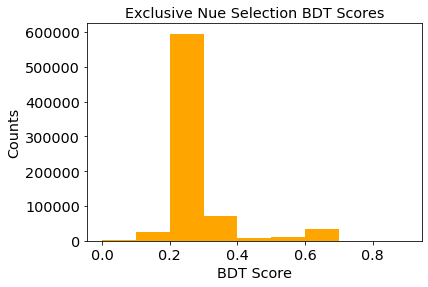

In [30]:
import matplotlib.pyplot as plt
import matplotlib

bins = np.arange(0, 1.0, 0.1)
gen = plt.hist(datasets_bdt['BDT_score'], bins, color='orange')
plt.xlabel("BDT Score")
plt.ylabel("Counts")
plt.title("Exclusive Nue Selection BDT Scores")
plt.show()

In [54]:


ending = "Sept19"

df_v = [nue_mc]
for i,df in enumerate(df_v):
    
    df['is_signal'] = np.where( (df.swtrig_pre==1) & (df.cosNu_Angle_Numi_Elec_asmuon>-1.0) & (df.cosNu_Angle_Numi_Elec_asmuon <1.0) & (df.cosNu_Angle_Numi_Elec_asmuon_reco>-1.0) & (df.cosNu_Angle_Numi_Elec_asmuon_reco <1.0)
                                 & (df.nu_pdg==12) & (df.ccnc==0) & (df.nproton>0) & (df.npion==0) & (df.npi0==0)
                                 & (10 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 246)
                                 & (-106 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 106)
                                 & (10 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1026), True, False)
    
    df.loc[ (df['is_signal']== True), 'category' ] = 1

#if energy add & (df.true_e>1.0) & (df.true_e <4.0) & (df.reco_e>1.0) & (df.reco_e <4.0)
#if angle add (df.cosNu_Angle_Numi_Elec_asmuon>-1.0) & (df.cosNu_Angle_Numi_Elec_asmuon <1.0) & (df.cosNu_Angle_Numi_Elec_asmuon_reco>-1.0) & (df.cosNu_Angle_Numi_Elec_asmuon_reco <1.0)
#if lepton mom (df.targetP_asmuon>0.04) & (df.targetP_asmuon <2.0) & (df.targetP_asmuon_reco>0.04) & (df.targetP_asmuon_reco<2.0)

##OLD
#if energy add & (df.true_e>0.04) & (df.true_e <5) & (df.reco_e>0.04) & (df.reco_e <5)
#if lepton mom (df.targetP_asmuon>0.04) & (df.targetP_asmuon <5) & (df.targetP_asmuon_reco>0.04) & (df.targetP_asmuon_reco<5)

In [55]:
NUE_SEL_QUERY = BDT_LOOSE_CUTS
#ENERGY
#NUE_SEL_QUERY += ' and reco_e > 1.0 and reco_e < 4.0'
#NUE_SEL_QUERY += ' and true_e > 1.0 and true_e < 4.0'
#ANGLE
NUE_SEL_QUERY += ' and cosNu_Angle_Numi_Elec_asmuon_reco >-1.0 and cosNu_Angle_Numi_Elec_asmuon_reco <1.0'
NUE_SEL_QUERY += ' and cosNu_Angle_Numi_Elec_asmuon >-1.0 and cosNu_Angle_Numi_Elec_asmuon <1.0'
#LEPTON MOM
#NUE_SEL_QUERY += ' and targetP_asmuon_reco > 0.04 & targetP_asmuon_reco < 2.0'
#NUE_SEL_QUERY += ' and targetP_asmuon > 0.04 & targetP_asmuon < 2.0'

if isRun3 == False:
    NUE_SEL_QUERY += ' and BDT_score > 0.55'
elif isRun3 == True:
    NUE_SEL_QUERY += ' and BDT_score > 0.575'

SIGNAL_NUE_SEL_QUERY = NUE_SEL_QUERY
SIGNAL_NUE_SEL_QUERY += 'and is_signal==True'

NOT_SIGNAL_NUE_SEL_QUERY = NUE_SEL_QUERY
NOT_SIGNAL_NUE_SEL_QUERY += 'and is_signal==False'

#ending = "Sept19"

#OLD
#ENERGY
#NUE_SEL_QUERY += ' and reco_e > 0.04 and reco_e < 5'
#NUE_SEL_QUERY += ' and true_e > 0.04 and true_e < 5'
#LEPTON MOM
#NUE_SEL_QUERY += ' and targetP_asmuon_reco > 0.04 & targetP_asmuon_reco < 5'
#NUE_SEL_QUERY += ' and targetP_asmuon > 0.04 & targetP_asmuon < 5'

In [56]:
#New categories

for i,df in enumerate(df_v):
            
    #df.loc[ (df['is_signal']== True), 'category' ] = 1
    #df["in_fv_query"] = np.where((10 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 246)
    #                             & (-106 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 106)
    #                             & (10 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1026), True, False)
    df["in_fv_query"] = np.where((10 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 246)
                                 & (-106 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 106)
                                 & (10 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1026), True, False)
    df["out_fv_query"] = np.where((df.swtrig_pre==1) & (df.in_fv_query==False), True, False)
    df.loc[ (df['out_fv_query']== True), 'category' ] = 2
    
    df["numu_CC_Npi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==0) & (df.npi0>=1), True, False)
    df.loc[ (df['numu_CC_Npi0']== True), 'category' ] = 3
    df["numu_CC_0pi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==0) & (df.npi0==0), True, False)
    df.loc[ (df['numu_CC_0pi0']== True), 'category' ] = 4
    
    df["numu_NC_Npi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==1) & (df.npi0>=1), True, False)
    df.loc[ (df['numu_NC_Npi0']== True), 'category' ] = 5
    df["numu_NC_0pi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==1) & (df.npi0==0), True, False)
    df.loc[ (df['numu_NC_Npi0']== True), 'category' ] = 6
    
    df["nuebar_1eNp"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (df.nu_pdg==-12) & (df.ccnc==0) & (df.nproton>0) & (df.npion==0) & (df.npi0==0), True, False)
    df.loc[ (df['nuebar_1eNp']== True), 'category' ] = 7
    df["nue_NC"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==12) & (df.ccnc==1), True, False)
    df.loc[ (df['nue_NC']== True), 'category' ] = 8
    df["nue_CCother"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==12) & (df.ccnc==0) & (df.is_signal==False) , True, False)
    df.loc[ (df['nue_CCother']== True), 'category' ] = 9
    
    # less specific categories 
    df["nue_other"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (df.is_signal==False)& (df.nuebar_1eNp==False) & (df.nue_NC==False) & (df.nue_CCother==False) , True, False)
    df.loc[ (df['nue_other']== True), 'category' ] = 10
    df["numu_Npi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) &  (abs(df.nu_pdg==14)) & (df.npi0>=1), True, False)
    df.loc[ (df['numu_Npi0']== True), 'category' ] = 11
    df["numu_0pi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg==14)) &  (df.npi0==0), True, False)
    df.loc[ (df['numu_0pi0']== True), 'category' ] = 12
    
    df["unknown"] = np.where((df.is_signal==False) & (df.out_fv_query==False) & (df.numu_CC_Npi0==False)
                             & (df.numu_CC_0pi0==False) & (df.numu_NC_Npi0==False) & (df.numu_NC_0pi0==False)
                             & (df.nuebar_1eNp==False) & (df.nue_NC==False) & (df.nue_CCother==False)
                             & (df.nue_other==False) & (df.numu_Npi0==False) & (df.numu_0pi0==False), True, False)
    df.loc[ (df['unknown']== True), 'category' ] = 0

In [34]:
# for replacing nue CC 
in_AV_query = "-1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8"
nueCC_query = 'abs(nu_pdg)==12 and ccnc==0 and '+in_AV_query

print("# of nueCC in AV in overlay sample = "+str(len(nue_mc.query(nueCC_query))))
len1 = len(nue_mc)

idx = nue_mc.query(nueCC_query).index
nue_mc.drop(idx, inplace=True)
len2 = len(nue_mc) 
print("# of nueCC in AV dropped in overlay = "+str(len1-len2))


# of nueCC in AV in overlay sample = 9915
# of nueCC in AV dropped in overlay = 9915


In [57]:
test = np.nansum(nue_mc.query(SIGNAL_NUE_SEL_QUERY + " and ~(abs(nu_pdg) == 12 & ccnc == 0)")['totweight_data'])
print('total signal events = '+ str(test))
test = np.nansum(nue_mc.query(NUE_SEL_QUERY + "and ~(abs(nu_pdg) == 12 & ccnc == 0)")['totweight_data'])
print('total signal events = '+ str(test))
test = np.nansum(nue_mc.query(NUE_SEL_QUERY)['totweight_data'])
print('total signal events = '+ str(test))
test = np.nansum(nue_mc.query(SIGNAL_NUE_SEL_QUERY)['totweight_data'])
print('total signal events = '+ str(test))

test = np.nansum(nue_mc.query(BDT_LOOSE_CUTS)['totweight_data'])
print('total signal events = '+ str(test))

test = np.nansum(nue_mc.query("cosNu_Angle_Numi_Elec_asmuon_reco >-1.0 and cosNu_Angle_Numi_Elec_asmuon_reco <1.0")['totweight_data'])
print('total signal events = '+ str(test))
test = np.nansum(nue_mc.query("cosNu_Angle_Numi_Elec_asmuon >-1.0 and cosNu_Angle_Numi_Elec_asmuon <1.0")['totweight_data'])
print('total signal events = '+ str(test))
test = np.nansum(nue_mc.query("cosNu_Angle_Numi_Elec_asmuon >-1.0 and cosNu_Angle_Numi_Elec_asmuon <1.0 and cosNu_Angle_Numi_Elec_asmuon_reco >-1.0 and cosNu_Angle_Numi_Elec_asmuon_reco <1.0")['totweight_data'])
print('total signal events = '+ str(test))

#more mc events

total signal events = 0.0
total signal events = 0.0
total signal events = 0.0
total signal events = 0.0
total signal events = 231.76574425859386
total signal events = 183037.45981972094
total signal events = 2479.6151076363794
total signal events = 2479.6151076363794


Now apply the selection, looking at the plots produced with each stage.

This only has the BDT stage, so we can move on to looking at variables. 

n_events here =  738787

1.0
1
0
738787
{'nue_mc': 0.25203959042309876}
swtrig_pre==1 and nslice==1 and 10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_nu_vtx_sce_z<=1026 and contained_fraction>0.9 and n_showers_contained==1 and n_tracks_contained>0 and trk_energy>0.04 and shr_score<0.3 and shrmoliereavg<15 and shr_tkfit_dedx_Y<7 and trkpid<0.35 and tksh_distance<12 and targetP_asmuon_reco > 0.04 & targetP_asmuon_reco < 2.0 and targetP_asmuon > 0.04 & targetP_asmuon < 2.0 and BDT_score > 0.575& targetP_asmuon_reco <= 2 & targetP_asmuon_reco >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False 
 nue_mc
--------------------------------------
current sample is:  nue_mc
Had to return early (colour sorting).
738787
0
{'nue_mc': 0.25203959042309876}
swtrig_pre==1 and nslice==1 and 10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_nu_vtx_sce_z<=1026 and

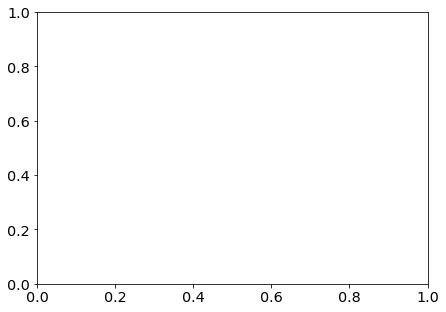

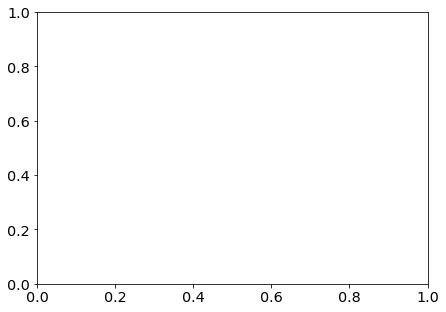

In [68]:
import batch_plotter_alex
import importlib
importlib.reload(batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = nue_mc.shape[0]
print("n_events here = ", n_events)
print("")
#batch_size = 40000
batch_size = n_events
#batch_size = int(np.floor(n_events/3.3))
#n_events = batch_size

varss = []
weightss = []
labss = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
#for i in range(1):
    start = i*batch_size
    print(start)
    #print(end)
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = nue_mc.iloc[start:end]
    
    print(sample_set.shape[0])

    samples = {
        "nue_mc": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 
        mcratio   = pot/2.33652e+21
    elif isRun3 == True:
        pot =  5.014e20
        mcratio  = pot/1.98937e+21

    # NU
    weights = { #full sample mc = 0.38
                "nue_mc"  : mcratio  * SPLIT * scaling
    }


    my_plotter = batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)


    #Now check on a variable
    #Remember to change the plotter keys between truth and mc
    
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Elec_asmuon',10,(-1.0, 1.0),"cos(Angle Diff)"
    VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',8,(0.0, 2.0),"Lepton Momentum (GeV)"
    
    #OLD
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',10,(0.0, 5.0),"Lepton Momentum (GeV)"
    

    var, weight, label = my_plotter.plot_variable(
        VARIABLE,
        query= NUE_SEL_QUERY,
        #query= "nslice==1",
        currentsample = "nue_mc",
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "weightSplineTimesTuneTimesPPFX",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:3]
    
    varss.append(var)
    weightss.append(weight)
    labss.append(label)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


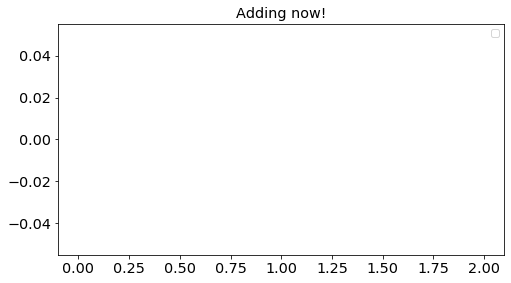

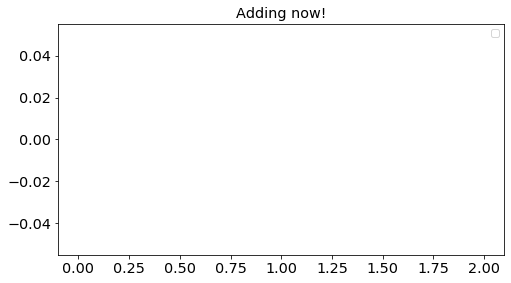

In [69]:
from matplotlib import gridspec

for i in range(int(n_events/batch_size)+1):
#for i in range(1):
    nue_fig = plt.figure(figsize=(8, 7))
    nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
    nue_ax1 = plt.subplot(nue_gs[0])
    #nue_ax1.set_xlim([0, 5])    #TrueE, lepton mom
    #nue_ax1.set_xlim([-1, 1])    #AngleDiff

    nue_stacked = nue_ax1.hist(
                varss[i].values(),
                weights=list(weightss[i].values()),
                stacked=True,
                label=labss[i],
                bins=BINS,
                range=RANGE)
    
    plt.title("Adding now!")
    plt.legend()

In [70]:
def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)

No handles with labels found to put in legend.


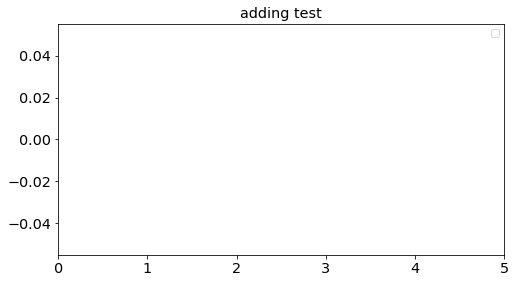

In [71]:
category_labels = {
    1 : r'$\nu_e$ CC0$\pi$Np', 
    2 : r'Out FV',
    3 : r'$\nu_\mu$ CC $\pi^{0}$',
    4 : r'$\nu_\mu$ CC',
    5 : r'$\nu_\mu$ NC $\pi^{0}$',
    6 : r'$\nu_\mu$ NC',
    7 : r'$\bar{\nu}_e$ CC0$\pi$Np',
    8: r'$\nu_e$ NC',
    9: r'$\nu_e$ CC other',
    10 : r'$\nu_e$ / $\overline{\nu_e}$  other', 
    11 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  $\pi^{0}$', 
    12 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other',
    0: r'Unknown'
}


labels = [
            "%s: %.1f" % (category_labels[c], sum(weightss_tot[0][c])) \
            if sum(weightss_tot[0][c]) else ""
            for c in varss[0].keys()
        ]


nue_fig = plt.figure(figsize=(8, 7))
nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1 = plt.subplot(nue_gs[0])

#TrueE, LeptonMom
nue_ax1.set_xlim([0, 5])
#nue_ax1.set_ylim([0, 15])

#AngleDiff
#nue_ax1.set_xlim([-1, 1])
#nue_ax1.set_ylim([0, 2])

nue_stacked = nue_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)

plt.title("adding test")
plt.legend()

In [72]:
import importlib
import Plotter_Functions_Alex
importlib.reload(Plotter_Functions_Alex)
from Plotter_Functions_Alex import getWantedLists
importlib.reload(getWantedLists)

#print(nue_stacked)

wanted_key = 0

nue_wanted_list = Plotter_Functions_Alex.getWantedLists.getWantedLists(wanted_key, nue_stacked)

print(nue_wanted_list)

[]

SUMS
[]
[]

Wanted List:
[]

[]


In [73]:
vars_tot_df = pd.DataFrame.from_dict(varss_tot)
weights_tot_df = pd.DataFrame.from_dict(weightss_tot)

#ending = "Sept19_TrueAngleDiff"
#ending = "Sept19_TrueLeptonMom"


if isRun3 == False:
    ######full trueE
    #vars_tot_df.to_csv('nue_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    #weights_tot_df.to_csv('nue_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    ########angleDiff
    #vars_tot_df.to_csv('nue_mc_varstot_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    #weights_tot_df.to_csv('nue_mc_weightstot_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    ########leptonMom
    vars_tot_df.to_csv('nue_mc_varstot_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    weights_tot_df.to_csv('nue_mc_weightstot_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
elif isRun3 ==True:
    ######full trueE
    #vars_tot_df.to_csv('nue_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    #weights_tot_df.to_csv('nue_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    ########angleDiff
    #vars_tot_df.to_csv('nue_mc_varstot_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    #weights_tot_df.to_csv('nue_mc_weightstot_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    ########leptonMom
    vars_tot_df.to_csv('nue_mc_varstot_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    weights_tot_df.to_csv('nue_mc_weightstot_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')    

### Stat Errors

In [51]:
#nuemcstat

# sumw2 of the full event rate 
weight_stat_errs = []

#RECOE
#xvar = "reco_e"
#bins = np.arange(1.0, 4.5, 0.5)
#ANGLE
#xvar = "cosNu_Angle_Numi_Elec_asmuon_reco"
#bins = np.arange(-1.0, 1.2, 0.2)
#LEPTONMOM
#xvar = "targetP_asmuon_reco"
#bins = np.arange(0, 2.25, 0.25)

#OLD
#RECOE
xvar = "reco_e"
bins = np.arange(0, 5.5, 0.5)
#LEPTONMOM
#xvar = "targetP_asmuon_reco"
#bins = np.arange(0, 5.5, 0.5)

for i in range(len(bins)-1):

    if i==len(bins)-2: 
        bin_query = xvar+' >= '+str(bins[i])+' and '+xvar+' <= '+str(bins[i+1])
    else: 
        bin_query = xvar+' >= '+str(bins[i])+' and '+xvar+' < '+str(bins[i+1])

    #nuwro_full_sumw2.append(sum(datasets_bdt['infv'].query('is_signal==True and '+bin_query).totweight_data ** 2) ) #bug (fixed below)
    weight_stat_errs.append(sum(datasets_bdt.query(NUE_SEL_QUERY+ " and " +bin_query).totweight_data ** 2))
    
    
# percent stat error - of the background subtracted event rate 
#print( [(np.sqrt(a)/b) for a,b in zip(nuwro_full_sumw2, nuwro_evt_rate)] )
print(weight_stat_errs)

[2.2507598517467646, 3.1216935615361066, 0.6964828593715985, 0.7001765198225728, 0.12759029993978827, 0.17742663929193347, 0.13663674054242236, 0, 0, 0]


In [52]:
ending

'Sept19'

In [53]:
if isRun3 == False:
    
    np.savetxt("nue_mc_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')
    
    
    """
    #########################
    #####angleDiff###########
    ##########################

    np.savetxt("nue_mc_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    """
    
    """
    #########################
    #####leptonMom###########
    ##########################
    
    np.savetxt("nue_mc_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')
    """
    
elif isRun3 == True:
    
    np.savetxt("nue_mc_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    
    """
    #########################
    #####angleDiff###########
    ##########################

    np.savetxt("nue_mc_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')
    
    """
    
    """
    #########################
    #####leptonMom###########
    ##########################
    
    np.savetxt("nue_mc_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    """

In [76]:
import staterr_batch_plotter_alex
import importlib
importlib.reload(staterr_batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = nue_mc.shape[0]
print("n_events here = ", n_events)
print("n_events/2 here = ", np.floor(n_events/2))
print("")
#batch_size = 40000
batch_size = n_events
n_events = batch_size

errs = []
detsyss = []
sels = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
#for i in range(1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = nue_mc.iloc[start:end]

    samples = {
        "nue_mc": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 
        mcratio   = pot/2.33652e+21
    elif isRun3 == True:
        pot =  5.014e20
        mcratio  = pot/1.98937e+21
        
    weights = { #full sample mc = 0.38
                "nue_mc"  : mcratio  * SPLIT * scaling
    }


    my_plotter = staterr_batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)
    
    
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Elec_asmuon_reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',8,(0.0, 2.0),"Lepton Momentum (GeV)"

    #OLD
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',10,(0.0, 5.0),"Lepton Momentum (GeV)"

    err, detsys, selected = my_plotter.plot_variable(
        VARIABLE,   
        query= NUE_SEL_QUERY,
        #query= "",
        currentsample = "nue_mc",
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "weightSplineTimesTuneTimesPPFX",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:3]
    
    
    errs.append(err)
    detsyss.append(detsys)
    sels.append(selected)

n_events here =  738787
n_events/2 here =  369393.0

1.0
1
{'nue_mc': 0.25203959042309876}
swtrig_pre==1 and nslice==1 and 10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_nu_vtx_sce_z<=1026 and contained_fraction>0.9 and n_showers_contained==1 and n_tracks_contained>0 and trk_energy>0.04 and shr_score<0.3 and shrmoliereavg<15 and shr_tkfit_dedx_Y<7 and trkpid<0.35 and tksh_distance<12 and targetP_asmuon_reco > 0.04 & targetP_asmuon_reco < 2.0 and targetP_asmuon > 0.04 & targetP_asmuon < 2.0 and BDT_score > 0.575& targetP_asmuon_reco <= 2 & targetP_asmuon_reco >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False

current sample is:  nue_mc

LOOK HERE FOR DETSYS
None
err nue mc: 
[0. 0. 0. 0. 0. 0. 0. 0.]
detsys nue mc: 
[0. 0. 0. 0. 0. 0. 0. 0.]

selected  [0. 0. 0. 0. 0. 0. 0. 0.]
Returning
{'nue_mc': 0.25203959042309876}
swtrig_pre==1 and nslice==1 and 10<=reco_nu_vtx

In [77]:
#print(errs)
#print(sels)

#arrange the lists such that all the errors from bin 1 are in one list, bin 2 in another list, etc...
masterlist = []
templist = []
for i in range((len(errs[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(errs)):
        templist.append(errs[j][i])
masterlist.append(templist)
    
masterlist.pop(0)


#deal with adding the errors in each bin
total_errs = []
holdlist = []
for f in masterlist:
    total_errs.append(sum(holdlist))
    #print("------------------------------")
    holdlist = []
    for g in f:
        #just add them as they differnt parts of the same total number. This then matches previous when doing total
        holdlist.append(g)
total_errs.append(sum(holdlist))

total_errs.pop(0)
print("total errs = ", total_errs)
print("")

nue_mc_stat_errs = total_errs

#####################################################

#arrange the lists such that all the errors from bin 1 are in one list, bin 2 in another list, etc...
masterlistsels = []
templistsels = []
for i in range((len(sels[0]))):
    masterlistsels.append(templistsels)
    templistsels = []
    for j in range(len(sels)):
        templistsels.append(sels[j][i])
masterlistsels.append(templistsels)
    
masterlistsels.pop(0)


#deal with adding the errors in each bin
total_sels = []
holdlistsels = []
for f in masterlistsels:
    total_sels.append(sum(holdlistsels))
    #print("------------------------------")
    holdlistsels = []
    for g in f:
        #just add them as they differnt parts of the same total number. This then matches previous when doing total
        holdlistsels.append(g)
total_sels.append(sum(holdlistsels))

total_sels.pop(0)
print("total selected = ", total_sels)

nue_mc_stat_errs_selected = total_sels

total errs =  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

total selected =  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [78]:
if isRun3 == False:
    
    np.savetxt("nue_mc_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               nue_mc_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_mc_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               nue_mc_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')
    
    """
    #########################
    #####angleDiff###########
    ##########################

    np.savetxt("nue_mc_stat_errs_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               nue_mc_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_mc_stat_errs_selected_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               nue_mc_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')
    """
    
    """
    #########################
    #####leptonMom###########
    ##########################
    
    np.savetxt("nue_mc_stat_errs_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               nue_mc_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_mc_stat_errs_selected_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               nue_mc_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')
    """
elif isRun3 == True:
    """
    np.savetxt("nue_mc_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               nue_mc_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_mc_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               nue_mc_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')
    """
    """
    #########################
    #####angleDiff###########
    ##########################

    np.savetxt("nue_mc_stat_errs_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               nue_mc_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_mc_stat_errs_selected_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               nue_mc_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')
    """
    
    
    #########################
    #####leptonMom###########
    ##########################
    
    np.savetxt("nue_mc_stat_errs_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               nue_mc_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_mc_stat_errs_selected_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               nue_mc_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')
    

### Sys Errors

In [79]:
#############################
##### weightsPPFX ###########
#############################

import syserr_batch_plotter_alex
import importlib
importlib.reload(syserr_batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = nue_mc.shape[0]
print("n_events here = ", n_events)
print("n_events/2 here = ", np.floor(n_events/2))
print("")
#batch_size = 40000
batch_size = n_events
#n_events = batch_size

n_cv_tots = []
n_tots = []
dfs_ppfx = []
df_ppfx_vars = []
df_ppfx_splines = []
detvar_dicts = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
#for i in range(1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = nue_mc.iloc[start:end]

    samples = {
        "nue_mc": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 
        mcratio   = pot/2.33652e+21
    elif isRun3 == True:
        pot =  5.014e20
        mcratio  = pot/1.98937e+21
    
    weights = { #full sample mc = 0.38
                "nue_mc"  : mcratio  * SPLIT * scaling
    }


    my_plotter = syserr_batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)
    
    

    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Elec_asmuon_reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',8,(1.0, 4.0),"Lepton Momentum (GeV)"
    
    #OLD
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',10,(0.0, 5.0),"Lepton Momentum (GeV)"
    
    n_cv_tot, n_tot, df_ppfx, df_ppfx_var, df_ppfx_spline, detvar_dict = my_plotter.plot_variable(
        VARIABLE,   
        query= NUE_SEL_QUERY,
        #query= "",
        currentsample = "nue_mc",
        typeerr = "standard",
        weight = "weightsPPFX",
        category_query = " ",
        Nuniverse=500,
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "weightSplineTimesTuneTimesPPFX",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:6]
    
    
    n_cv_tots.append(n_cv_tot)
    n_tots.append(n_tot)
    dfs_ppfx.append(df_ppfx)
    df_ppfx_vars.append(df_ppfx_var)
    df_ppfx_splines.append(df_ppfx_spline)
    detvar_dicts.append(detvar_dict)

n_events here =  738787
n_events/2 here =  369393.0

1.0
1
{'nue_mc': 0.25203959042309876}
swtrig_pre==1 and nslice==1 and 10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_nu_vtx_sce_z<=1026 and contained_fraction>0.9 and n_showers_contained==1 and n_tracks_contained>0 and trk_energy>0.04 and shr_score<0.3 and shrmoliereavg<15 and shr_tkfit_dedx_Y<7 and trkpid<0.35 and tksh_distance<12 and targetP_asmuon_reco > 0.04 & targetP_asmuon_reco < 2.0 and targetP_asmuon > 0.04 & targetP_asmuon < 2.0 and BDT_score > 0.575& targetP_asmuon_reco <= 4 & targetP_asmuon_reco >= 1 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False

standard sys err
Universes 500
extra query added.
Empty DataFrame
Columns: []
Index: []
Returning
--------------------------

{'nue_mc': 0.25203959042309876}
swtrig_pre==1 and nslice==1 and 10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=rec

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0. 0. 0. 0. 0. 0. 0. 0.]


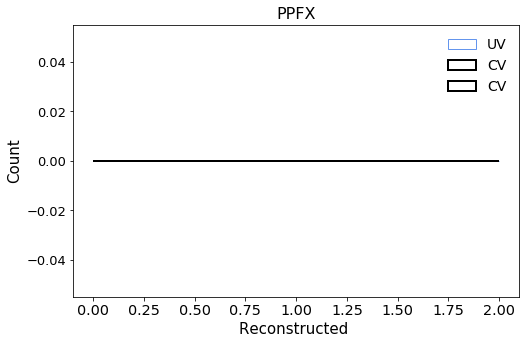

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0. 0. 0. 0. 0. 0. 0. 0.]


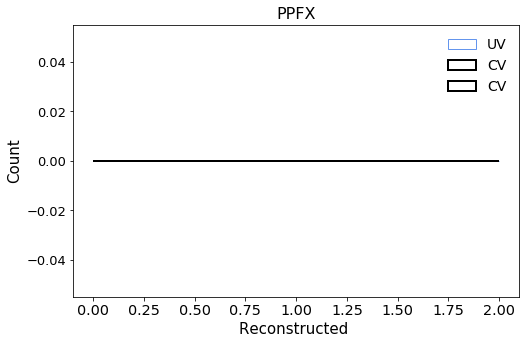

In [80]:
import matplotlib.pyplot as plt
import matplotlib


for j in range(len(detvar_dicts)):

    n=0
    #bin_centers = np.arange(1.25, 4.25, 0.5) #energy
    #bins = np.arange(1.0, 4.5, 0.5)
    #bin_centers = np.arange(-0.9, 1.1, 0.2) #Angle
    #bins = np.arange(-1, 1.2, 0.2)
    bin_centers = np.arange(0.125, 2.125, 0.25) #lepton
    bins = np.arange(0, 2.25, 0.25)
    print(bin_centers)
    print(bins)
    
    #OLD
    #bin_centers = np.arange(0.25, 5.25, 0.5)
    #bins = np.arange(0, 5.5, 0.5)

    fig = plt.figure(figsize=(8, 5)) 


    for variation in detvar_dicts[j].keys(): 

        if n==0: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation], 
                 linewidth=1, color='cornflowerblue', label='UV')

        else: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation],
                 linewidth=1, color='cornflowerblue')

        n+=1   


    plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)

    current = (plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)[0])

    print(current)

    plt.title('PPFX', fontsize=16)

    plt.ylabel('Count' , fontsize=15) # 2.68294E22
    plt.xlabel("Reconstructed ", fontsize=15)

    #plt.xticks(x_ticks, fontsize=13)
    plt.yticks(fontsize=13)

    plt.legend(frameon=False, fontsize=14)

    #plt.xlim(xlow, xhigh)

    #plt.savefig("/uboone/data/users/kmiller/uBNuMI_CCNp/plots/combined/detsys_shr_energy_cali_fhc_intrinsic.pdf", 
    #            transparent=True, bbox_inches='tight')

    plt.show()

In [81]:
#will need to edit this if batching

nue_mc_ppfx_detvar_dict = pd.DataFrame(detvar_dicts[0])
#print(nue_nue_ppfx_detvar_dict)

if isRun3 == False:
    #nue_mc_ppfx_detvar_dict.to_csv('nue_mc_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    #nue_mc_ppfx_detvar_dict.to_csv('nue_mc_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_'+ending+'.csv')
    nue_mc_ppfx_detvar_dict.to_csv('nue_mc_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_'+ending+'.csv')
elif isRun3 == True:
    #nue_mc_ppfx_detvar_dict.to_csv('nue_mc_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    #nue_mc_ppfx_detvar_dict.to_csv('nue_mc_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_'+ending+'.csv')
    nue_mc_ppfx_detvar_dict.to_csv('nue_mc_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_'+ending+'.csv')

In [82]:
masterlist = []
templist = []
for i in range((len(n_tots[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(n_tots)):
        templist.append(n_tots[j][i])
masterlist.append(templist)

#need to sum each part of the masterlist into one pair of arrays now
masterlist.pop(0)
final_ns_nue_mc_ppfx = []

for a in range(len(masterlist)):
    #print(sum(masterlist[a]))
    final_ns_nue_mc_ppfx.append(sum(masterlist[a]))

final_ncvs_nue_mc_ppfx = sum(n_cv_tots)


##################################################################

frames = []
for a in range(len(dfs_ppfx)):
    frames.append(dfs_ppfx[a][0])
    
    
total_ppfx_df = pd.concat(frames, ignore_index=True)
#print(total_ppfx_df)

#-----------------
frames2 = []
for b in range(len(df_ppfx_vars)):
    frames2.append(df_ppfx_vars[b][0])
    
    
total_ppfx_df_vars = pd.concat(frames2, ignore_index=False)
#print(total_ppfx_df_vars)

#-----------------
frames3 = []
for c in range(len(df_ppfx_splines)):
    frames3.append(df_ppfx_splines[c][0])
    
    
total_ppfx_df_splines = pd.concat(frames3, ignore_index=False)
#print(total_ppfx_df_splines)

In [83]:
if isRun3 == False:
    
    np.savetxt("nue_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ns_nue_mc_ppfx[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ncvs_nue_mc_ppfx,
               delimiter =", ", 
               fmt ='% s')


    total_ppfx_df.to_csv('nue_mc_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_ppfx_df_vars.to_csv('nue_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_ppfx_df_splines.to_csv('nue_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    
    """
    #################################
    #####angleDiff##################
    ############################

    np.savetxt("nue_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ns_nue_mc_ppfx[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ncvs_nue_mc_ppfx,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_ppfx_df.to_csv('nue_mc_syserss_df_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_ppfx_df_vars.to_csv('nue_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_ppfx_df_splines.to_csv('nue_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    """
    """
    #################################
    #####leptonMom##################
    ############################

    np.savetxt("nue_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ns_nue_mc_ppfx[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ncvs_nue_mc_ppfx,
               delimiter =", ", 
               fmt ='% s')


    ###########################################

    total_ppfx_df.to_csv('nue_mc_syserss_df_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_ppfx_df_vars.to_csv('nue_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_ppfx_df_splines.to_csv('nue_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    """
elif isRun3 == True:
    """
    np.savetxt("nue_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ns_nue_mc_ppfx[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ncvs_nue_mc_ppfx,
               delimiter =", ", 
               fmt ='% s')


    total_ppfx_df.to_csv('nue_mc_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_ppfx_df_vars.to_csv('nue_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_ppfx_df_splines.to_csv('nue_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    """
    """
    #################################
    #####angleDiff##################
    ############################

    np.savetxt("nue_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ns_nue_mc_ppfx[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ncvs_nue_mc_ppfx,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_ppfx_df.to_csv('nue_mc_syserss_df_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_ppfx_df_vars.to_csv('nue_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_ppfx_df_splines.to_csv('nue_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    """
    
    #################################
    #####leptonMom##################
    ############################

    np.savetxt("nue_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ns_nue_mc_ppfx[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ncvs_nue_mc_ppfx,
               delimiter =", ", 
               fmt ='% s')


    ###########################################

    total_ppfx_df.to_csv('nue_mc_syserss_df_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_ppfx_df_vars.to_csv('nue_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_ppfx_df_splines.to_csv('nue_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    

In [84]:
#############################
##### weightsGenie ###########
#############################

import syserr_batch_plotter_alex
import importlib
importlib.reload(syserr_batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = nue_mc.shape[0]
print("n_events here = ", n_events)
print("n_events/2 here = ", np.floor(n_events/2))
print("")
#batch_size = 40000
batch_size = n_events
#n_events = batch_size

n_cv_tots = []
n_tots = []
dfs_genie = []
df_genie_vars = []
df_genie_splines = []
detvar_dicts = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
#for i in range(1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = nue_mc.iloc[start:end]

    samples = {
        "nue_mc": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 
        mcratio   = pot/2.33652e+21
    elif isRun3 == True:
        pot =  5.014e20
        mcratio  = pot/1.98937e+21
    
    weights = { #full sample mc = 0.38
                "nue_mc"  : mcratio  * SPLIT * scaling
    }  


    my_plotter = syserr_batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)
    
    

    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Elec_asmuon_reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',8,(0.0, 2.0),"Lepton Momentum (GeV)"

    #OLD
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',10,(0.0, 5.0),"Lepton Momentum (GeV)"

    n_cv_tot, n_tot, df_genie, df_genie_var, df_genie_spline, detvar_dict  = my_plotter.plot_variable(
        VARIABLE,   
        query= NUE_SEL_QUERY,
        currentsample = "nue_mc",
        typeerr = "standard",
        weight = "weightsGenie",
        category_query = " ",
        Nuniverse=500,
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "weightSplineTimesTuneTimesPPFX",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:6]
    
    
    n_cv_tots.append(n_cv_tot)
    n_tots.append(n_tot)
    dfs_genie.append(df_genie)
    df_genie_vars.append(df_genie_var)
    df_genie_splines.append(df_genie_spline)
    detvar_dicts.append(detvar_dict)

n_events here =  738787
n_events/2 here =  369393.0

1.0
1
{'nue_mc': 0.25203959042309876}
swtrig_pre==1 and nslice==1 and 10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_nu_vtx_sce_z<=1026 and contained_fraction>0.9 and n_showers_contained==1 and n_tracks_contained>0 and trk_energy>0.04 and shr_score<0.3 and shrmoliereavg<15 and shr_tkfit_dedx_Y<7 and trkpid<0.35 and tksh_distance<12 and targetP_asmuon_reco > 0.04 & targetP_asmuon_reco < 2.0 and targetP_asmuon > 0.04 & targetP_asmuon < 2.0 and BDT_score > 0.575& targetP_asmuon_reco <= 2 & targetP_asmuon_reco >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False

standard sys err
Universes 500
extra query added.
Empty DataFrame
Columns: []
Index: []
Returning
--------------------------

{'nue_mc': 0.25203959042309876}
swtrig_pre==1 and nslice==1 and 10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=rec

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0. 0. 0. 0. 0. 0. 0. 0.]


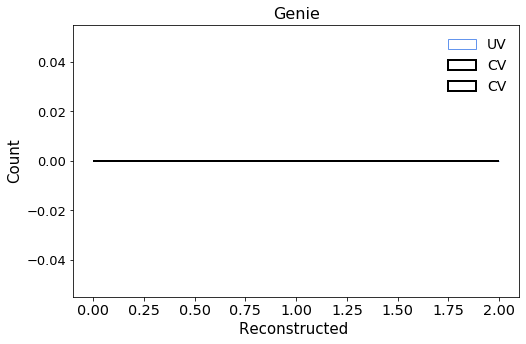

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0. 0. 0. 0. 0. 0. 0. 0.]


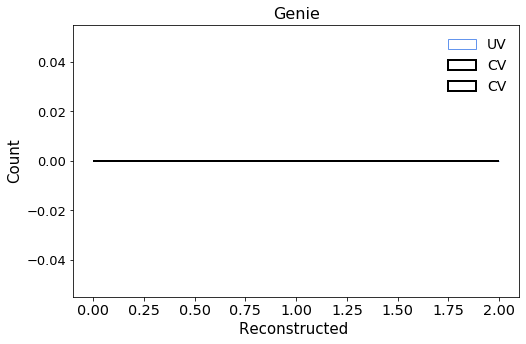

In [85]:
import matplotlib.pyplot as plt
import matplotlib


for j in range(len(detvar_dicts)):

    n=0
    #bin_centers = np.arange(1.25, 4.25, 0.5) #energy
    #bins = np.arange(1.0, 4.5, 0.5)
    #bin_centers = np.arange(-0.9, 1.1, 0.2) #Angle
    #bins = np.arange(-1, 1.2, 0.2)
    bin_centers = np.arange(0.125, 2.125, 0.25) #lepton
    bins = np.arange(0, 2.25, 0.25)
    print(bin_centers)
    print(bins)

    fig = plt.figure(figsize=(8, 5)) 


    for variation in detvar_dicts[j].keys(): 

        if n==0: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation], 
                 linewidth=1, color='cornflowerblue', label='UV')

        else: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation],
                 linewidth=1, color='cornflowerblue')

        n+=1   


    plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)

    current = (plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)[0])

    print(current)

    plt.title('Genie', fontsize=16)

    plt.ylabel('Count' , fontsize=15) # 2.68294E22
    plt.xlabel("Reconstructed ", fontsize=15)

    #plt.xticks(x_ticks, fontsize=13)
    plt.yticks(fontsize=13)

    plt.legend(frameon=False, fontsize=14)

    #plt.xlim(xlow, xhigh)


    plt.show()

In [86]:
#will need to edit this if batching

nue_mc_genie_detvar_dict = pd.DataFrame(detvar_dicts[0])
#print(nue_nue_ppfx_detvar_dict)

if isRun3 == False:
    #nue_mc_genie_detvar_dict.to_csv('nue_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    #nue_mc_genie_detvar_dict.to_csv('nue_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_'+ending+'.csv')
    nue_mc_genie_detvar_dict.to_csv('nue_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_'+ending+'.csv')
elif isRun3 == True:
    #nue_mc_genie_detvar_dict.to_csv('nue_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv') 
    #nue_mc_genie_detvar_dict.to_csv('nue_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_'+ending+'.csv')
    nue_mc_genie_detvar_dict.to_csv('nue_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_'+ending+'.csv')

In [87]:
masterlist = []
templist = []
for i in range((len(n_tots[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(n_tots)):
        templist.append(n_tots[j][i])
masterlist.append(templist)

#need to sum each part of the masterlist into one pair of arrays now
masterlist.pop(0)
final_ns_nue_mc_genie = []

for a in range(len(masterlist)):
    #print(sum(masterlist[a]))
    final_ns_nue_mc_genie.append(sum(masterlist[a]))

final_ncvs_nue_mc_genie = sum(n_cv_tots)

#####################################################
frames = []
for a in range(len(dfs_genie)):
    frames.append(dfs_genie[a][0])
    
    
total_genie_df = pd.concat(frames, ignore_index=True)
#print(total_genie_df)

#-----------------
frames2 = []
for b in range(len(df_genie_vars)):
    frames2.append(df_genie_vars[b][0])
    
    
total_genie_df_vars = pd.concat(frames2, ignore_index=False)
#print(total_genie_df_vars)

#-----------------
frames3 = []
for c in range(len(df_genie_splines)):
    frames3.append(df_genie_splines[c][0])
    
    
total_genie_df_splines = pd.concat(frames3, ignore_index=False)
#print(total_genie_df_splines)

In [88]:
if isRun3 == False:
    
    np.savetxt("nue_mc_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ns_nue_mc_genie[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ncvs_nue_mc_genie,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_genie_df.to_csv('nue_mc_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_genie_df_vars.to_csv('nue_mc_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_genie_df_splines.to_csv('nue_mc_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    
    """
    #####################
    ###AngleDiff###
    ######################
    np.savetxt("nue_mc_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ns_nue_mc_genie[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ncvs_nue_mc_genie,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_genie_df.to_csv('nue_mc_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_genie_df_vars.to_csv('nue_mc_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_genie_df_splines.to_csv('nue_mc_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    """
    """
    #####################
    ###leptonMom###
    ######################
    np.savetxt("nue_mc_syserss_final_ns_genie_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ns_nue_mc_genie[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ncvs_nue_mc_genie,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_genie_df.to_csv('nue_mc_syserss_df_genie_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_genie_df_vars.to_csv('nue_mc_syserss_df_genie_vars_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_genie_df_splines.to_csv('nue_mc_syserss_df_genie_splines_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    """
elif isRun3 == True:
    """
    np.savetxt("nue_mc_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ns_nue_mc_genie[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ncvs_nue_mc_genie,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_genie_df.to_csv('nue_mc_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_genie_df_vars.to_csv('nue_mc_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_genie_df_splines.to_csv('nue_mc_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    """
    """
    #####################
    ###AngleDiff###
    ######################
    np.savetxt("nue_mc_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ns_nue_mc_genie[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ncvs_nue_mc_genie,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_genie_df.to_csv('nue_mc_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_genie_df_vars.to_csv('nue_mc_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_genie_df_splines.to_csv('nue_mc_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    """
    
    #####################
    ###leptonMom###
    ######################
    np.savetxt("nue_mc_syserss_final_ns_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ns_nue_mc_genie[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ncvs_nue_mc_genie,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_genie_df.to_csv('nue_mc_syserss_df_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_genie_df_vars.to_csv('nue_mc_syserss_df_genie_vars_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_genie_df_splines.to_csv('nue_mc_syserss_df_genie_splines_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    

In [89]:
#############################
##### weightsReint ###########
#############################

import syserr_batch_plotter_alex
import importlib
importlib.reload(syserr_batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = nue_mc.shape[0]
print("n_events here = ", n_events)
print("n_events/2 here = ", np.floor(n_events/2))
print("weightsReint")
#batch_size = 40000
batch_size = n_events
#n_events = batch_size

n_cv_tots = []
n_tots = []
dfs_reint = []
df_reint_vars = []
df_reint_splines = []
detvar_dicts = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
#for i in range(1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = nue_mc.iloc[start:end]

    samples = {
        "nue_mc": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 
        mcratio   = pot/2.33652e+21
    elif isRun3 == True:
        pot =  5.014e20
        mcratio  = pot/1.98937e+21
        
    weights = { #full sample mc = 0.38
                "nue_mc"  : mcratio  * SPLIT * scaling
    }


    my_plotter = syserr_batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)
    
    

    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Elec_asmuon_reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',8,(0.0, 2.0),"Lepton Momentum (GeV)"

    #OLD
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',10,(0.0, 5.0),"Lepton Momentum (GeV)"

    n_cv_tot, n_tot, df_reint, df_reint_var, df_reint_spline, detvar_dict = my_plotter.plot_variable(
        VARIABLE,   
        query= NUE_SEL_QUERY,
        currentsample = "nue_mc",
        typeerr = "standard",
        weight = "weightsReint",
        category_query = " ",
        Nuniverse=500,
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "weightSplineTimesTuneTimesPPFX",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:6]
    
    
    n_cv_tots.append(n_cv_tot)
    n_tots.append(n_tot)
    dfs_reint.append(df_reint)
    df_reint_vars.append(df_reint_var)
    df_reint_splines.append(df_reint_spline)
    detvar_dicts.append(detvar_dict)

n_events here =  738787
n_events/2 here =  369393.0
weightsReint
1.0
1
{'nue_mc': 0.25203959042309876}
swtrig_pre==1 and nslice==1 and 10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_nu_vtx_sce_z<=1026 and contained_fraction>0.9 and n_showers_contained==1 and n_tracks_contained>0 and trk_energy>0.04 and shr_score<0.3 and shrmoliereavg<15 and shr_tkfit_dedx_Y<7 and trkpid<0.35 and tksh_distance<12 and targetP_asmuon_reco > 0.04 & targetP_asmuon_reco < 2.0 and targetP_asmuon > 0.04 & targetP_asmuon < 2.0 and BDT_score > 0.575& targetP_asmuon_reco <= 2 & targetP_asmuon_reco >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False

standard sys err
Universes 500
extra query added.
Empty DataFrame
Columns: []
Index: []
Returning
--------------------------

{'nue_mc': 0.25203959042309876}
swtrig_pre==1 and nslice==1 and 10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0. 0. 0. 0. 0. 0. 0. 0.]


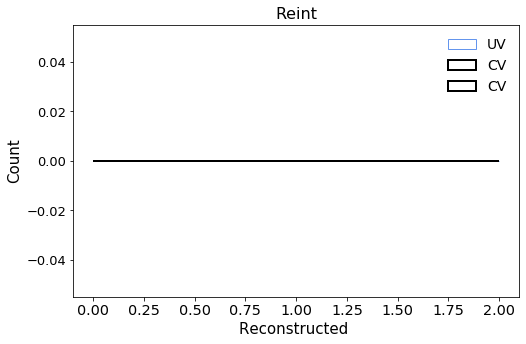

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0. 0. 0. 0. 0. 0. 0. 0.]


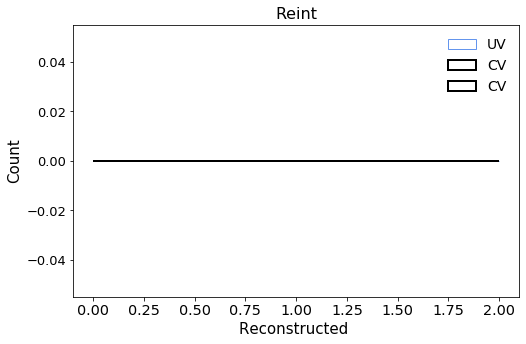

In [90]:
import matplotlib.pyplot as plt
import matplotlib


for j in range(len(detvar_dicts)):

    n=0
    #bin_centers = np.arange(1.25, 4.25, 0.5) #energy
    #bins = np.arange(1.0, 4.5, 0.5)
    #bin_centers = np.arange(-0.9, 1.1, 0.2) #Angle
    #bins = np.arange(-1, 1.2, 0.2)
    bin_centers = np.arange(0.125, 2.125, 0.25) #lepton
    bins = np.arange(0, 2.25, 0.25)
    print(bin_centers)
    print(bins)

    fig = plt.figure(figsize=(8, 5)) 


    for variation in detvar_dicts[j].keys(): 

        if n==0: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation], 
                 linewidth=1, color='cornflowerblue', label='UV')

        else: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation],
                 linewidth=1, color='cornflowerblue')

        n+=1   


    plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)

    current = (plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)[0])

    print(current)

    plt.title('Reint', fontsize=16)

    plt.ylabel('Count' , fontsize=15) # 2.68294E22
    plt.xlabel("Reconstructed ", fontsize=15)

    #plt.xticks(x_ticks, fontsize=13)
    plt.yticks(fontsize=13)

    plt.legend(frameon=False, fontsize=14)

    #plt.xlim(xlow, xhigh)


    plt.show()

In [91]:
#will need to edit this if batching

nue_mc_reint_detvar_dict = pd.DataFrame(detvar_dicts[0])
#print(nue_nue_ppfx_detvar_dict)

if isRun3 == False:
    #nue_mc_reint_detvar_dict.to_csv('nue_mc_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    #nue_mc_reint_detvar_dict.to_csv('nue_mc_syserss_df_reint_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_'+ending+'.csv')
    nue_mc_reint_detvar_dict.to_csv('nue_mc_syserss_df_reint_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_'+ending+'.csv')
elif isRun3 == True:
    #nue_mc_reint_detvar_dict.to_csv('nue_mc_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    #nue_mc_reint_detvar_dict.to_csv('nue_mc_syserss_df_reint_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_'+ending+'.csv')
    nue_mc_reint_detvar_dict.to_csv('nue_mc_syserss_df_reint_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_'+ending+'.csv')

In [92]:
masterlist = []
templist = []
for i in range((len(n_tots[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(n_tots)):
        templist.append(n_tots[j][i])
masterlist.append(templist)

#need to sum each part of the masterlist into one pair of arrays now
masterlist.pop(0)
final_ns_nue_mc_reint = []

for a in range(len(masterlist)):
    #print(sum(masterlist[a]))
    final_ns_nue_mc_reint.append(sum(masterlist[a]))

final_ncvs_nue_mc_reint = sum(n_cv_tots)

#######################################

frames = []
for a in range(len(dfs_reint)):
    frames.append(dfs_reint[a][0])
     
total_reint_df = pd.concat(frames, ignore_index=True)
#print(total_reint_df)

#-----------------
frames2 = []
for b in range(len(df_reint_vars)):
    frames2.append(df_reint_vars[b][0])
    
    
total_reint_df_vars = pd.concat(frames2, ignore_index=False)
#print(total_reint_df_vars)

#-----------------
frames3 = []
for c in range(len(df_reint_splines)):
    frames3.append(df_reint_splines[c][0])
    
    
total_reint_df_splines = pd.concat(frames3, ignore_index=False)
#print(total_reint_df_splines)


In [93]:
if isRun3 == False:
    
    np.savetxt("nue_mc_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ns_nue_mc_reint[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ncvs_nue_mc_reint,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_reint_df.to_csv('nue_mc_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_reint_df_vars.to_csv('nue_mc_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_reint_df_splines.to_csv('nue_mc_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    
    
    """
    #################
    ###angleDiff#####
    #################

    np.savetxt("nue_mc_syserss_final_ns_reint_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ns_nue_mc_reint[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ncvs_nue_mc_reint,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_reint_df.to_csv('nue_mc_syserss_df_reint_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_reint_df_vars.to_csv('nue_mc_syserss_df_reint_vars_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_reint_df_splines.to_csv('nue_mc_syserss_df_reint_splines_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    """

    """
    #################
    ###leptonMom#####
    #################

    np.savetxt("nue_mc_syserss_final_ns_reint_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ns_nue_mc_reint[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ncvs_nue_mc_reint,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_reint_df.to_csv('nue_mc_syserss_df_reint_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_reint_df_vars.to_csv('nue_mc_syserss_df_reint_vars_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_reint_df_splines.to_csv('nue_mc_syserss_df_reint_splines_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    """
elif isRun3 == True:
    """
    np.savetxt("nue_mc_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ns_nue_mc_reint[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ncvs_nue_mc_reint,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_reint_df.to_csv('nue_mc_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_reint_df_vars.to_csv('nue_mc_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_reint_df_splines.to_csv('nue_mc_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    """
    
    """
    #################
    ###angleDiff#####
    #################

    np.savetxt("nue_mc_syserss_final_ns_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ns_nue_mc_reint[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ncvs_nue_mc_reint,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_reint_df.to_csv('nue_mc_syserss_df_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_reint_df_vars.to_csv('nue_mc_syserss_df_reint_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_reint_df_splines.to_csv('nue_mc_syserss_df_reint_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    """
    
    
    #################
    ###leptonMom#####
    #################

    np.savetxt("nue_mc_syserss_final_ns_reint_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ns_nue_mc_reint[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ncvs_nue_mc_reint,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_reint_df.to_csv('nue_mc_syserss_df_reint_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_reint_df_vars.to_csv('nue_mc_syserss_df_reint_vars_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_reint_df_splines.to_csv('nue_mc_syserss_df_reint_splines_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    
        

In [94]:
#############################
##### weightsNuMIGeo ###########
#############################

import syserr_batch_plotter_alex
import importlib
importlib.reload(syserr_batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = nue_mc.shape[0]
print("n_events here = ", n_events)
print("n_events/2 here = ", np.floor(n_events/2))
#batch_size = 20000
batch_size = n_events
#n_events = batch_size

n_cv_tots = []
n_tots = []
dfs_geo = []
df_geo_vars = []
df_geo_splines = []
detvar_dicts = []

print(n_events/batch_size)
print(int(n_events/batch_size)+1)

for i in range(int(n_events/batch_size)+1):
#for i in range(1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = nue_mc.iloc[start:end]

    samples = {
        "nue_mc": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 
        mcratio   = pot/2.33652e+21
    elif isRun3 == True:
        pot =  5.014e20
        mcratio  = pot/1.98937e+21
        
    weights = { #full sample mc = 0.38
                "nue_mc"  : mcratio  * SPLIT * scaling
    }


    my_plotter = syserr_batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)
    
    

    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Elec_asmuon_reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',8,(0.0, 2.0),"Lepton Momentum (GeV)"

    #OLD
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',10,(0.0, 5.0),"Lepton Momentum (GeV)"
 
    n_cv_tot, n_tot, df_geo, df_geo_var, df_geo_spline, detvar_dict = my_plotter.plot_variable(
        VARIABLE,   
        query= NUE_SEL_QUERY,
        currentsample = "nue_mc",
        typeerr = "NuMIGeo",
        weight = "weightsGenie",
        category_query = " ",
        Nuniverse=10,
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "weightSplineTimesTuneTimesPPFX",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:6]
    
    
    n_cv_tots.append(n_cv_tot)
    n_tots.append(n_tot)
    dfs_geo.append(df_geo)
    df_geo_vars.append(df_geo_var)
    df_geo_splines.append(df_geo_spline)
    detvar_dicts.append(detvar_dict)

n_events here =  738787
n_events/2 here =  369393.0
1.0
2
{'nue_mc': 0.25203959042309876}
swtrig_pre==1 and nslice==1 and 10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_nu_vtx_sce_z<=1026 and contained_fraction>0.9 and n_showers_contained==1 and n_tracks_contained>0 and trk_energy>0.04 and shr_score<0.3 and shrmoliereavg<15 and shr_tkfit_dedx_Y<7 and trkpid<0.35 and tksh_distance<12 and targetP_asmuon_reco > 0.04 & targetP_asmuon_reco < 2.0 and targetP_asmuon > 0.04 & targetP_asmuon < 2.0 and BDT_score > 0.575& targetP_asmuon_reco <= 2 & targetP_asmuon_reco >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False

NuMI Geo sys err
Number of variations Universes 10
Returning
--------------------------

{'nue_mc': 0.25203959042309876}
swtrig_pre==1 and nslice==1 and 10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_nu_vtx_sce_z<=1026 and contained_fra

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
dict_keys(['CV'])
[0. 0. 0. 0. 0. 0. 0. 0.]


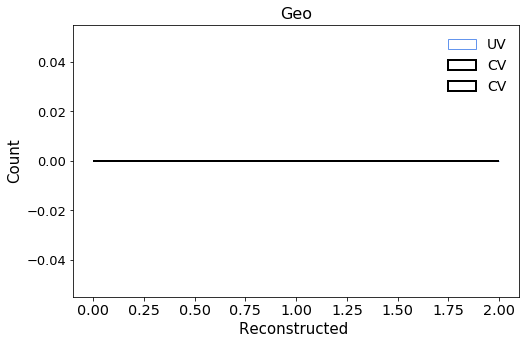

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
dict_keys(['CV'])
[0. 0. 0. 0. 0. 0. 0. 0.]


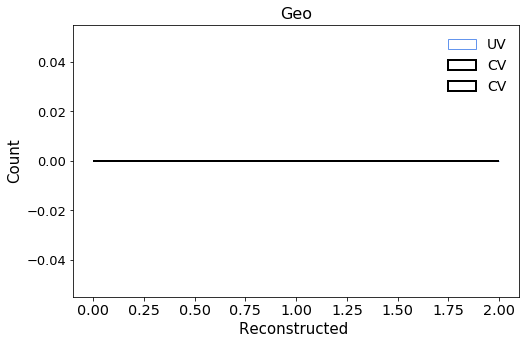

In [95]:
import matplotlib.pyplot as plt
import matplotlib


for j in range(len(detvar_dicts)):

    n=0
    #bin_centers = np.arange(1.25, 4.25, 0.5) #energy
    #bins = np.arange(1.0, 4.5, 0.5)
    #bin_centers = np.arange(-0.9, 1.1, 0.2) #Angle
    #bins = np.arange(-1, 1.2, 0.2)
    bin_centers = np.arange(0.125, 2.125, 0.25) #lepton
    bins = np.arange(0, 2.25, 0.25)
    print(bin_centers)
    print(bins)

    fig = plt.figure(figsize=(8, 5)) 
    print(detvar_dicts[j].keys())


    for variation in detvar_dicts[j].keys(): 

        if n==0: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation], 
                 linewidth=1, color='cornflowerblue', label='UV')

        else: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation],
                 linewidth=1, color='cornflowerblue')

        n+=1   


    plt.hist(bin_centers, bins, histtype='step', 
                    weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)

    current = (plt.hist(bin_centers, bins, histtype='step', 
                    weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)[0])

    print(current)

    plt.title('Geo', fontsize=16)

    plt.ylabel('Count' , fontsize=15) # 2.68294E22
    plt.xlabel("Reconstructed ", fontsize=15)

    #plt.xticks(x_ticks, fontsize=13)
    plt.yticks(fontsize=13)

    plt.legend(frameon=False, fontsize=14)

    #plt.xlim(xlow, xhigh)



    plt.show()

In [96]:
#will need to edit this if batching

nue_mc_geo_detvar_dict = pd.DataFrame(detvar_dicts[0])
#print(nue_nue_ppfx_detvar_dict)
if isRun3 == False:
    #nue_mc_geo_detvar_dict.to_csv('nue_mc_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    #nue_mc_geo_detvar_dict.to_csv('nue_mc_syserss_df_geo_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_'+ending+'.csv')
    nue_mc_geo_detvar_dict.to_csv('nue_mc_syserss_df_geo_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_'+ending+'.csv')
elif isRun3 == True:
    #nue_mc_geo_detvar_dict.to_csv('nue_mc_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')   
    #nue_mc_geo_detvar_dict.to_csv('nue_mc_syserss_df_geo_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_'+ending+'.csv')
    nue_mc_geo_detvar_dict.to_csv('nue_mc_syserss_df_geo_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_'+ending+'.csv')

In [97]:

masterlist = []
templist = []
for i in range((len(n_tots[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(n_tots)):
        templist.append(n_tots[j][i])
masterlist.append(templist)

#need to sum each part of the masterlist into one pair of arrays now
masterlist.pop(0)
final_ns_nue_mc_geo = []

for a in range(len(masterlist)):
    #print(sum(masterlist[a]))
    final_ns_nue_mc_geo.append(sum(masterlist[a]))

final_ncvs_nue_mc_geo = sum(n_cv_tots)
#print(final_ns_nue_nue_geo[0])

for x in range(len(final_ns_nue_mc_geo)):
    final_ns_nue_mc_geo[x] = np.concatenate((final_ns_nue_mc_geo[x][0], final_ns_nue_mc_geo[x][1]))
    
    
#print(final_ns_nue_nue_geo[0])  

####################################################

frames = []
for a in range(len(dfs_geo)):
    frames.append(dfs_geo[a][0])
    
    
total_geo_df = pd.concat(frames, ignore_index=True)
#print(total_geo_df)

#-----------------
frames2 = []
for b in range(len(df_geo_vars)):
    frames2.append(df_geo_vars[b][0])
    
    
total_geo_df_vars = pd.concat(frames2, ignore_index=False)
#print(total_geo_df_vars)

#-----------------
frames3 = []
for c in range(len(df_geo_splines)):
    frames3.append(df_geo_splines[c][0])
    
    
total_geo_df_splines = pd.concat(frames3, ignore_index=False)
#print(total_geo_df_splines)

In [98]:
if isRun3 == False:
    
    np.savetxt("nue_mc_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ns_nue_mc_geo,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_mc_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ncvs_nue_mc_geo,
               delimiter =", ", 
               fmt ='% s')

    #######################################################

    total_geo_df.to_csv('nue_mc_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_geo_df_vars.to_csv('nue_mc_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_geo_df_splines.to_csv('nue_mc_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    
    """
    #####################
    ###angleDiff########
    ####################

    np.savetxt("nue_mc_syserss_final_ns_geo_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ns_nue_mc_geo,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_mc_syserss_final_ncvs_geo_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ncvs_nue_mc_geo,
               delimiter =", ", 
               fmt ='% s')

    #######################################################

    total_geo_df.to_csv('nue_mc_syserss_df_geo_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_geo_df_vars.to_csv('nue_mc_syserss_df_geo_vars_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_geo_df_splines.to_csv('nue_mc_syserss_df_geo_splines_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    """
    """
    #####################
    ###leptonMom########
    ####################

    np.savetxt("nue_mc_syserss_final_ns_geo_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ns_nue_mc_geo,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_mc_syserss_final_ncvs_geo_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ncvs_nue_mc_geo,
               delimiter =", ", 
               fmt ='% s')

    #######################################################

    total_geo_df.to_csv('nue_mc_syserss_df_geo_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_geo_df_vars.to_csv('nue_mc_syserss_df_geo_vars_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_geo_df_splines.to_csv('nue_mc_syserss_df_geo_splines_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    """
elif isRun3 == True:
    """
    np.savetxt("nue_mc_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ns_nue_mc_geo,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_mc_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ncvs_nue_mc_geo,
               delimiter =", ", 
               fmt ='% s')

    #######################################################

    total_geo_df.to_csv('nue_mc_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_geo_df_vars.to_csv('nue_mc_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_geo_df_splines.to_csv('nue_mc_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    """
    """
    #####################
    ###angleDiff########
    ####################

    np.savetxt("nue_mc_syserss_final_ns_geo_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ns_nue_mc_geo,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_mc_syserss_final_ncvs_geo_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ncvs_nue_mc_geo,
               delimiter =", ", 
               fmt ='% s')

    #######################################################

    total_geo_df.to_csv('nue_mc_syserss_df_geo_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_geo_df_vars.to_csv('nue_mc_syserss_df_geo_vars_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_geo_df_splines.to_csv('nue_mc_syserss_df_geo_splines_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    """
    
    #####################
    ###leptonMom########
    ####################

    np.savetxt("nue_mc_syserss_final_ns_geo_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ns_nue_mc_geo,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_mc_syserss_final_ncvs_geo_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ncvs_nue_mc_geo,
               delimiter =", ", 
               fmt ='% s')

    #######################################################

    total_geo_df.to_csv('nue_mc_syserss_df_geo_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_geo_df_vars.to_csv('nue_mc_syserss_df_geo_vars_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_geo_df_splines.to_csv('nue_mc_syserss_df_geo_splines_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    
        

## NUE_DIRT SAMPLE

In [5]:
# Name of the TTree in the PeLEE Ntuples
tree = "NeutrinoSelectionFilter"

#cut samples
#DRT  = '/pre_samp/neutrinoselection_filt_run1_dirt_overlay'        +ls.APPEND
#full sample
#DRT  = 'neutrinoselection_filt_run1_dirt_overlay'        +ls.APPEND
if isRun3 == False:
    DRT  = 'prodgenie_numi_uboone_overlay_dirt_fhc_mcc9_run1_v28_all_snapshot'        +ls.APPEND
elif isRun3 == True:
    DRT  = 'neutrinoselection_filt_run3b_dirt_overlay'        +ls.APPEND

#actually fetch datasets
nue_dirt = uproot.open(ls.ntuple_path+DRT+".root")[ls.fold][tree]

# Define a list that contains the data sets
uproot_v = [nue_dirt]

nue_variables = ["run", "sub", "evt", "swtrig_pre",             
             "trk_score_v", "topological_score", "shr_score",
            "reco_nu_vtx_sce_x", "reco_nu_vtx_sce_y", "reco_nu_vtx_sce_z", "shr_tkfit_npoints",
            "CosmicIPAll3D", "hits_ratio", "contained_fraction",
            "shrmoliereavg", "shr_tkfit_dedx_U","shr_tkfit_dedx_V","shr_tkfit_dedx_Y",
            "shr_energy", "category", "slnunhits", "slnhits", "flash_time", "nu_pdg", "ccnc",
             "selected", "nslice", "shr_distance", "shr_theta", "shr_phi", "npi0", "proton_e", "elec_e",
            "shr_tkfit_nhits_U", "shr_tkfit_nhits_V", "shr_tkfit_nhits_Y", "n_tracks_contained",
            "n_showers", "n_tracks", "shr_energy_cali", "n_showers_contained", "tksh_distance", "tksh_angle",
             "trkshrhitdist2", 'shrsubclusters0', 'shrsubclusters1', 'shrsubclusters2',
             "shr_energy_tot_cali", 'trk_energy_tot', 'nproton', 'npion', 'trk_energy', 'shr_px', 'shr_py', 'shr_pz']


# These are examples of variables present in MC samples only
nue_varMC = ["nu_e", "true_pt","true_pt_visible","true_p","true_p_visible","true_nu_vtx_t","true_nu_vtx_x","true_nu_vtx_y","true_nu_vtx_z","true_nu_vtx_sce_x","true_nu_vtx_sce_y","true_nu_vtx_sce_z\
","true_nu_px","true_nu_py","true_nu_pz", "mc_pdg", "mc_px", "mc_py", "mc_pz"]

#make the list unique (sometimes you repeat the variable name in the list, this takes care of that)
nue_variables = list(set(nue_variables))
print(nue_variables)



# These weights are needed to correctly calculate the CV for the MC    
WEIGHTS     = ["weightSpline","weightTune","weightSplineTimesTune","ppfx_cv"]
# These weights are needed to calculate the Flux, GENIE and Geant4 Systematics. 
# For NuMI weightsFlux should always be 1 (cause that's relevant for BNB).
SYSTEMATICS = ['weightsFlux','weightsGenie','weightsReint'] 
PPFX        = ['weightsPPFX'] 



WEIGHTSLEE = ["weightSpline","weightTune","weightSplineTimesTune", "leeweight"]#, "weightsGenie", "weightsFlux", "weightsReint"]
MCFVARS    = ["mcf_nu_e","mcf_lep_e","mcf_actvol","mcf_nmm","mcf_nmp","mcf_nem","mcf_nep","mcf_np0","mcf_npp",
              "mcf_npm","mcf_mcshr_elec_etot","mcf_pass_ccpi0","mcf_pass_ncpi0",
              "mcf_pass_ccnopi","mcf_pass_ncnopi","mcf_pass_cccpi","mcf_pass_nccpi"]

nue_dirt = nue_dirt.pandas.df(nue_variables+nue_varMC + WEIGHTS + SYSTEMATICS + PPFX, flatten=False)

['n_tracks_contained', 'swtrig_pre', 'shr_score', 'proton_e', 'shrmoliereavg', 'shr_py', 'category', 'flash_time', 'shr_energy_tot_cali', 'shr_energy_cali', 'run', 'slnunhits', 'sub', 'CosmicIPAll3D', 'ccnc', 'shrsubclusters0', 'tksh_distance', 'shr_tkfit_dedx_U', 'shr_distance', 'tksh_angle', 'elec_e', 'shr_tkfit_dedx_Y', 'reco_nu_vtx_sce_x', 'n_tracks', 'hits_ratio', 'n_showers_contained', 'trk_score_v', 'evt', 'selected', 'shr_tkfit_nhits_V', 'shr_tkfit_npoints', 'shr_phi', 'npion', 'trkshrhitdist2', 'trk_energy', 'shr_px', 'slnhits', 'shr_theta', 'contained_fraction', 'shrsubclusters2', 'npi0', 'nu_pdg', 'shr_energy', 'shrsubclusters1', 'nslice', 'shr_tkfit_dedx_V', 'shr_pz', 'shr_tkfit_nhits_Y', 'reco_nu_vtx_sce_z', 'trk_energy_tot', 'nproton', 'reco_nu_vtx_sce_y', 'n_showers', 'topological_score', 'shr_tkfit_nhits_U']


In [6]:
# In the next cell, we are going to play with the value of the event weights. 
# Let's store the original ones in some "safe variable" in this cell first.
# So if we screw up, we don't have to re-load the humongous TTree: we'll have the original weights safely stored here
df_v = [nue_dirt]

#removeGenieTune = False
for i,df in enumerate(df_v):
    df[ 'currentweightsafe' ] = df['weightSplineTimesTune']
    df[ 'currentweight' ] = df['weightSplineTimesTune']

In [7]:
constructNuMISys = True

# We need to do this only for the MC samples (all data events weight = 1)
df_v = [nue_dirt]

for i,df in enumerate(df_v):
    # This portion cleans up the basic weights
    df.loc[ df['weightTune'] <= 0, 'weightTune' ] = 1.
    df.loc[ df['weightTune'] == np.inf, 'weightTune' ] = 1.
    df.loc[ df['weightTune'] > 100, 'weightTune' ] = 1.
    df.loc[ np.isnan(df['weightTune']) == True, 'weightTune' ] = 1.
    # This portion cleans up the weights after the GENIE tune is applied
    df.loc[ df['weightSplineTimesTune'] <= 0, 'weightSplineTimesTune' ] = 1.
    df.loc[ df['weightSplineTimesTune'] == np.inf, 'weightSplineTimesTune' ] = 1.
    df.loc[ df['weightSplineTimesTune'] > 100, 'weightSplineTimesTune' ] = 1. #originally 100
    df.loc[ np.isnan(df['weightSplineTimesTune']) == True, 'weightSplineTimesTune' ] = 1. 
    
    # weightSplineTimesTuneTimesPPFX is our final weight: this is NuMI, so the final weight of the MC events needs 
    # to take into account the NuMI Flux re-weight called ppfx_cv to simulate NuMI events properly. 
    df[ 'weightSplineTimesTuneTimesPPFX' ] = df[ 'weightSplineTimesTune' ]*df['ppfx_cv']
    
    
    # We also need to fix some cray cray weights in the GENIE systematics. 
    # This is a bit of a pain in the butt cause we have 600 universe (= 600 weights) for each event
    for ievt in range(df.shape[0]):
        reweightCondition = ((df['weightsGenie'].iloc[ievt] > 3000) | (df['weightsGenie'].iloc[ievt] < 0)  | 
                             (df['weightsGenie'].iloc[ievt] == np.inf))
        df['weightsGenie'].iloc[ievt][ reweightCondition ] = 1.
    

In [8]:
#nue_nue = pot_scale(nue_nue, 'intrinsic', ISRUN3)

if isRun3 == False:
    beamon_pot = 2.0E20 #v5
    dirt_pot =  1.42143e+21
    scalingDRT = 0.65 #0.35
elif isRun3 == True:
    beamon_pot = 5.014E20
    dirt_pot =  1.03226e+21
    scalingDRT = 0.45 

nue_dirt['pot_scale'] = (beamon_pot/dirt_pot)*scalingDRT

In [9]:
nue_dirt['totweight_data'] = nue_dirt['pot_scale']*nue_dirt['weightSplineTimesTuneTimesPPFX']

In [10]:
from scipy.spatial.transform import Rotation as R
from numpy import arccos, array
from numpy.linalg import norm

# Note: returns angle in radians
def theta(v, w): return arccos(v.dot(w)/(norm(v)*norm(w)))* 180 / 3.1415926

def GetNuMIAngle( px,  py,  pz):
    r = R.from_matrix([[0.92103853804025681562   , 0.022713504803924120662, 0.38880857519374290021  ],
                       [4.6254001262154668408e-05, 0.99829162468141474651 , -0.058427989452906302359],
                       [-0.38947144863934973769  , 0.053832413938664107345, 0.91946400794392302291  ]])  
    r = r.inv()
    beamCoords = r.apply([px,  py,  pz])
    beamDir    = [0,0,1]
    #print(theta(beamCoords,beamDir))
    return theta(beamCoords,beamDir)

def GetNuMIAnglePol( phiBNB,  thetaBNB):
    px = math.sin(thetaBNB)*math.cos(phiBNB)
    py = math.sin(thetaBNB)*math.sin(phiBNB)
    pz = math.cos(thetaBNB)
    return GetNuMIAngle( px,  py,  pz)

In [11]:
def vectorFromNuMITarget(vtxX,  vtxY, vtxZ):
    numiTarget      = np.array([-31387.58422, -3316.402543, -60100.2414])
    nuInteraction   = np.array([vtxX,  vtxY, vtxZ])
    directionVector = nuInteraction - numiTarget
    return directionVector

def angleFromNuMITarget(vtxX,  vtxY, vtxZ, thetaBNB, phiBNB):
    v1 = vectorFromNuMITarget(vtxX,  vtxY, vtxZ)  
    norm = np.linalg.norm(v1)
    v1 = v1/norm
    v2 = [np.cos(phiBNB)*np.sin(thetaBNB),np.sin(phiBNB)*np.sin(thetaBNB), np.cos(thetaBNB) ]
    dot_product = np.dot(v1, v2)
    angle = np.arccos(dot_product)
    return angle #dot_product # angle*180/3.14159265



angleFromNuMITarget(1,1,1,1.4,3.)

1.8690124908136228

In [12]:
#RECO VARIABLE
#This assumes the electron to be the leading shower
import time
s = time.time()

for i,df in enumerate(df_v):
    df['targetP_asmuon_reco']     = np.sqrt(df['shr_px']*df['shr_px'] + df['shr_py']*df['shr_py'] + df['shr_pz']*df['shr_pz'])
    #df['targetPt_asmuon_reco']    = np.sqrt(df['shr_px']*df['shr_px'] + df['shr_py']*df['shr_py'])
    #df['targetTheta_asmuon_reco'] = np.arccos(df['shr_pz']/df['targetP_asmuon_reco'] )
    #df['targetPhi_asmuon_reco']   = np.arctan2(df['shr_py'],df['shr_px'])
    df['nu_Angle_Numi_Elec_asmuon_reco'] = df.apply( lambda x: angleFromNuMITarget(x['reco_nu_vtx_sce_x'],x['reco_nu_vtx_sce_y'],x['reco_nu_vtx_sce_z'], x['shr_theta'],x['shr_phi']) , axis=1)
    df['cosNu_Angle_Numi_Elec_asmuon_reco'] = np.cos(df['nu_Angle_Numi_Elec_asmuon_reco'])
    
#just prints out the time this cell takes
s2 = time.time()
print ("time to run: ",s2-s)

time to run:  14.199787139892578


In [13]:
#TRUTH VARIABLE

import time
s = time.time()

print(df["mc_pdg"])

for i,df in enumerate(df_v):
    df["elec_px_asmuon"] = np.nan
    df["elec_py_asmuon"] = np.nan
    df["elec_pz_asmuon"] = np.nan
    for j in range(len(df["mc_pdg"])):
        if (len(df["mc_pdg"].iloc[j]) !=0):
            pdg_vector = df["mc_pdg"].iloc[j][0]
            px_vector = df["mc_px"].iloc[j]
            py_vector = df["mc_py"].iloc[j]
            pz_vector = df["mc_pz"].iloc[j]
            result = np.where(pdg_vector==11)[0]
            if np.size(result):
                df.loc[j, "elec_px_asmuon"] = px_vector[result][0]
                df.loc[j, "elec_py_asmuon"] = py_vector[result][0]
                df.loc[j, "elec_pz_asmuon"] = pz_vector[result][0]
            
    print(df["elec_px_asmuon"])
    
#just prints out the time this cell takes
s2 = time.time()
print ("time to run: ",s2-s)

entry
0              [13]
1         [14, -13]
2             [-13]
3              [13]
4              [13]
            ...    
389259       [2212]
389260           []
389261           []
389262           []
389263       [2212]
Name: mc_pdg, Length: 389264, dtype: object
entry
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
389259   NaN
389260   NaN
389261   NaN
389262   NaN
389263   NaN
Name: elec_px_asmuon, Length: 389264, dtype: float64
time to run:  7.991847276687622


In [14]:
#TRUTH_VARIABLE

for i,df in enumerate(df_v):
    df['targetP_asmuon']     = np.sqrt(df['elec_px_asmuon']*df['elec_px_asmuon'] + df['elec_py_asmuon']*df['elec_py_asmuon'] + df['elec_pz_asmuon']*df['elec_pz_asmuon'])
    df['targetPt_asmuon']    = np.sqrt(df['elec_px_asmuon']*df['elec_px_asmuon'] + df['elec_py_asmuon']*df['elec_py_asmuon'])
    df['targetTheta_asmuon'] = np.arccos(df['elec_pz_asmuon']/df['targetP_asmuon'] )
    df['targetPhi_asmuon']   = np.arctan2(df['elec_py_asmuon'],df['elec_px_asmuon'])
    df['nu_Angle_Numi_Elec_asmuon'] = df.apply( lambda x: angleFromNuMITarget(x['true_nu_vtx_sce_x'],x['true_nu_vtx_sce_y'],x['true_nu_vtx_sce_z'], x['targetTheta_asmuon'],x['targetPhi_asmuon']) , axis=1)
    df['cosNu_Angle_Numi_Elec_asmuon'] = np.cos(df['nu_Angle_Numi_Elec_asmuon'])

In [15]:
#This cell is about creating some new variables from the ones we have

import time
s = time.time()

#use all samples
df_v = [nue_dirt]


puppa1 = 'trk_score_v'


for i,df in enumerate(df_v):
    up = uproot_v[i]
    trk_theta_proton_v  = up.array('trk_theta_v')
    trk_phi_proton_v    = up.array('trk_phi_v')
    trk_score_v         = up.array('trk_score_v')    
    trk_llr_pid_v       = up.array('trk_llr_pid_score_v')
    trk_energy_proton_v = up.array('trk_energy_proton_v')
    trk_calo_energy_y_v = up.array('trk_calo_energy_y_v')
    trk_id              = up.array('trk_id')-1 # I think we need this -1 to get the right result
    c                   = up.array('n_tracks_contained')
    trk_theta_proton_v  = up.array('trk_theta_v')
    trk_phi_proton_v    = up.array('trk_phi_v')

    trk_theta_proton_sel  = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_theta_proton_v,trk_id)])
    trk_phi_proton_sel    = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_phi_proton_v,trk_id)])
    df['protontheta']  = trk_theta_proton_sel
    df['protonphi']    = trk_phi_proton_sel

    #print(trk_score_v.shape, len(trk_llr_pid_v))

    #dummy variables
    puppa_obj = []
    puppa_trk = []
    puppa_shw = []
    puppa_prt = [] 
    puppa_mu  = []
    
    for pidv, p in zip(trk_llr_pid_v,trk_score_v):
        N_obj         = 0
        N_recoTrks    = 0
        N_recoShowers = 0
        N_recoProtons = 0
        N_recoMuons   = 0
        if len(pidv) > 0:
            passPIDCut = (pidv <= 0)
            passTrkCut = (p    >= 0)
            protonCut  = (passPIDCut & passTrkCut) 
            muonCut    = (np.logical_not(passPIDCut) & passTrkCut) 
            N_obj         = len(passTrkCut)
            N_recoTrks    = np.count_nonzero(passTrkCut)
            N_recoShowers = np.count_nonzero(np.logical_not(passTrkCut))
            N_recoProtons = np.count_nonzero(protonCut)
            N_recoMuons   = np.count_nonzero(muonCut)
        puppa_obj.append(N_obj)
        puppa_trk.append(N_recoTrks)
        puppa_shw.append(N_recoShowers)    
        puppa_prt.append(N_recoProtons)
        puppa_mu .append(N_recoMuons)

    df['N_obj']           = puppa_obj
    df['N_recoTrks']      = puppa_trk
    df['N_recoShowers']   = puppa_shw
    df['N_recoProtons']   = puppa_prt
    df['N_recoMuons']     = puppa_mu
    
    trk_llr_pid_v_sel     = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_llr_pid_v,trk_id)])
    trk_energy_proton_sel = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_energy_proton_v,trk_id)])
    trk_calo_energy_y_sel = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_calo_energy_y_v,trk_id)])
    trk_theta_proton_sel  = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_theta_proton_v,trk_id)])
    trk_phi_proton_sel    = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_phi_proton_v,trk_id)])

    df['trkpid']          = trk_llr_pid_v_sel
    df['protonenergy']    = trk_energy_proton_sel
    df['trackcaloenergy'] = trk_calo_energy_y_sel
    df['subcluster']      = df['shrsubclusters0'] + df['shrsubclusters1'] + df['shrsubclusters2']

    df['protontheta']  = trk_theta_proton_sel
    df['protonphi']    = trk_phi_proton_sel

#calculate angles wrt NuMI reference frame
for i,df in enumerate(df_v):
    #df['shr_numi_Angle']    = df.apply( lambda x: GetNuMIAngle(x['shr_px'],x['shr_py'],x['shr_pz']) , axis=1)
    df['proton_numi_Angle'] = df.apply( lambda x: GetNuMIAnglePol(x['protonphi'],x['protontheta']) , axis=1)

    
#just prints out the time this cell takes
s2 = time.time()
print ("time to run: ",s2-s)

time to run:  32.54303050041199


In [16]:
for i,df in enumerate(df_v):
    df.loc[df['shrmoliereavg'].isna(),'secondshower_Y_dot'] = 9999.
    df.loc[df['secondshower_Y_dot'].isna(),'secondshower_Y_dot'] = 0.0 

In [17]:
df_v = [nue_dirt]
for i,df in enumerate(df_v):
    df.loc[:,'shr_tkfit_dedx_max'] = df['shr_tkfit_dedx_Y']
    df.loc[(df['shr_tkfit_nhits_U']>df['shr_tkfit_nhits_Y']),'shr_tkfit_dedx_max'] = df['shr_tkfit_dedx_U']
    df.loc[(df['shr_tkfit_nhits_V']>df['shr_tkfit_nhits_Y']) & (df['shr_tkfit_nhits_V']>df['shr_tkfit_nhits_U']),'shr_tkfit_dedx_max'] = df['shr_tkfit_dedx_V']  

In [18]:
INTERCEPT = 0.0
SLOPE = 0.83

df_v = [nue_dirt]
# define some energy-related variables
for i,df in enumerate(df_v):
    df["reco_e"] = (df["shr_energy_tot_cali"] + INTERCEPT) / SLOPE + df["trk_energy_tot"]
    df["true_e"] = df["elec_e"] + df["proton_e"]
    
# and a way to filter out data
for i,df in enumerate(df_v):
    df["bnbdata"] = np.zeros_like(df["shr_energy"])
    df["extdata"] = np.zeros_like(df["shr_energy"])

In [19]:
#for i,df in enumerate(df_v):#

#    df['is_signal'] = np.where( (df.swtrig_pre==1) & (df.true_e>0.04) & (df.true_e <5) & (df.reco_e>0.04) & (df.reco_e <5) & (df.category==11)
#                                 & (df.nu_pdg==12) & (df.ccnc==0) & (df.nproton>0) & (df.npion==0) & (df.npi0==0)
#                                 & (-1.55 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 254.8)
#                                 & (-116.5 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 116.5)
#                                 & (0 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1036.8), True, False)
         

In [20]:
# add back the cosmic category, for background only
#df_v = [nue_dirt]
#for i,df in enumerate(df_v):
#    df.loc[(df['category']!=1)&(df['category']!=10)&(df['category']!=11)&(df['category']!=111)&(df['slnunhits']/df['slnhits']<0.2), 'category'] = 4

In [21]:
#########################################################
######## RUN THIS CELL ONLY ONE TIME ONLY ###############
#########################################################
# The flash time for the NuMI data stream needs to be adjusted a little bit (there are hardware offsets in data). 
# That's the reason behind these hard coded shifts
df_v = [nue_dirt]
for i,df in enumerate(df_v):
        df.loc[ :, 'flash_time' ] = df['flash_time' ] - 0.304

In [22]:
#Define signal catagories

#nue_dirt["is_signal"] = nue_dirt["category"] == 11

In [23]:
# Some quick clean up since some strange events get in there
nue_dirt   = nue_dirt.query('nu_e > 0.')

import NuMIGeoWeights
import importlib
importlib.reload(NuMIGeoWeights)
numiBeamlineGeoWeights = NuMIGeoWeights.NuMIGeoWeights()

# Calculate the true neutrino direction off of the NuMI beam, needed for plotting. Seem to be from MC
dfmc_v = [nue_dirt]
for i,df in enumerate(dfmc_v):
    df['numi_nu_true_Angle'] = df.apply( lambda x: GetNuMIAngle(x['true_nu_px'],x['true_nu_py'],x['true_nu_pz']) , axis=1)
    df['weightsNuMIGeo']     = df.apply( lambda x: numiBeamlineGeoWeights.calculateGeoWeight(x['nu_pdg'],x['nu_e'],x['numi_nu_true_Angle']) , axis=1)
   

Set up complete. Set up BDT for selection.

In [24]:
reco_in_fv_query = "10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_nu_vtx_sce_z<=1026"


BDT_PRE_QUERY = 'swtrig_pre==1 and nslice==1'
BDT_PRE_QUERY += ' and ' + reco_in_fv_query
BDT_PRE_QUERY +=' and contained_fraction>0.9'
BDT_PRE_QUERY += ' and n_showers_contained==1'
BDT_PRE_QUERY += ' and n_tracks_contained>0'
BDT_PRE_QUERY += ' and trk_energy>0.04' 
    
BDT_LOOSE_CUTS = BDT_PRE_QUERY
BDT_LOOSE_CUTS +=' and shr_score<0.3'
BDT_LOOSE_CUTS += ' and shrmoliereavg<15'
BDT_LOOSE_CUTS += ' and shr_tkfit_dedx_Y<7'
BDT_LOOSE_CUTS += ' and trkpid<0.35'
BDT_LOOSE_CUTS += ' and tksh_distance<12'

In [25]:
# load bdt model 
bdt_model = xgb.Booster({'nthread': 4})
if isRun3 == False:
    bdt_model.load_model('/home/alex/NuMI/bdt_FHC_may2022_subset.model')
elif isRun3 == True:
    bdt_model.load_model('/home/alex/NuMI/bdt_RHC_may2022_subset.model')    

In [26]:
# NOW, apply the model to real data for data/MC comparisons

varlist = [
    "shr_score", "shrmoliereavg", "trkpid",
    "n_showers_contained", "shr_tkfit_dedx_Y", "tksh_distance",
    "tksh_angle", "subcluster", "trkshrhitdist2"]
#The training variables?

datasetlist = [nue_dirt]

for df in datasetlist:
    for column in varlist:
        df.loc[(df[column] < -1.0e37) | (df[column] > 1.0e37), column] = np.nan
        
    # create testing dmatrix 
    df_test = xgb.DMatrix(data=df[varlist])
    
    # apply the bdt selection
    preds = bdt_model.predict(df_test)
    
    # add columns for plotting 
    df['BDT_score'] = preds
    print(df.shape)

(389264, 120)


In [27]:
datasets_bdt = nue_dirt

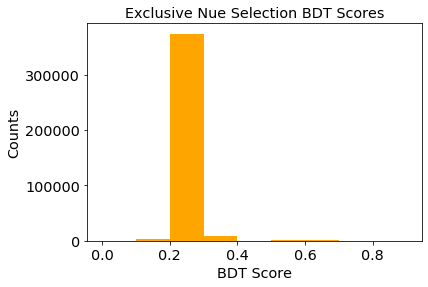

In [28]:
import matplotlib.pyplot as plt
import matplotlib

bins = np.arange(0, 1.0, 0.1)
gen = plt.hist(datasets_bdt['BDT_score'], bins, color='orange')
plt.xlabel("BDT Score")
plt.ylabel("Counts")
plt.title("Exclusive Nue Selection BDT Scores")
plt.show()

In [52]:


ending = "Sept19_rebinning"
#ending = "Sept19"

df_v = [nue_dirt]
for i,df in enumerate(df_v):
    
    df['is_signal'] = np.where( (df.swtrig_pre==1) & (df.true_e>1.0) & (df.true_e <4.0) & (df.reco_e>1.0) & (df.reco_e <4.0)
                                 & (10 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 246)
                                 & (-106 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 106)
                                 & (10 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1026), True, False)
    
    df.loc[ (df['is_signal']== True), 'category' ] = 1

#if energy add & (df.true_e>1.0) & (df.true_e <4.0) & (df.reco_e>1.0) & (df.reco_e <4.0)
#if angle add (df.cosNu_Angle_Numi_Elec_asmuon>-1.0) & (df.cosNu_Angle_Numi_Elec_asmuon <1.0) & (df.cosNu_Angle_Numi_Elec_asmuon_reco>-1.0) & (df.cosNu_Angle_Numi_Elec_asmuon_reco <1.0)
#if lepton mom (df.targetP_asmuon>0.04) & (df.targetP_asmuon <2.0) & (df.targetP_asmuon_reco>0.04) & (df.targetP_asmuon_reco<2.0)

##OLD
#if energy add & (df.true_e>0.04) & (df.true_e <5) & (df.reco_e>0.04) & (df.reco_e <5)
#if lepton mom (df.targetP_asmuon>0.04) & (df.targetP_asmuon <5) & (df.targetP_asmuon_reco>0.04) & (df.targetP_asmuon_reco<5)

In [53]:
NUE_SEL_QUERY = BDT_LOOSE_CUTS
#ENERGY
NUE_SEL_QUERY += ' and reco_e > 1.0 and reco_e < 4.0'
NUE_SEL_QUERY += ' and true_e > 1.0 and true_e < 4.0'
#ANGLE
#NUE_SEL_QUERY += ' and cosNu_Angle_Numi_Elec_asmuon_reco >-1.0 and cosNu_Angle_Numi_Elec_asmuon_reco <1.0'
#NUE_SEL_QUERY += ' and cosNu_Angle_Numi_Elec_asmuon >-1.0 and cosNu_Angle_Numi_Elec_asmuon <1.0'
#LEPTON MOM
#NUE_SEL_QUERY += ' and targetP_asmuon_reco > 0.04 & targetP_asmuon_reco < 2.0'
#NUE_SEL_QUERY += ' and targetP_asmuon > 0.04 & targetP_asmuon < 2.0'

if isRun3 == False:
    NUE_SEL_QUERY += ' and BDT_score > 0.55'
elif isRun3 == True:
    NUE_SEL_QUERY += ' and BDT_score > 0.575'

SIGNAL_NUE_SEL_QUERY = NUE_SEL_QUERY
SIGNAL_NUE_SEL_QUERY += 'and is_signal==True'

NOT_SIGNAL_NUE_SEL_QUERY = NUE_SEL_QUERY
NOT_SIGNAL_NUE_SEL_QUERY += 'and is_signal==False'

#ending = "Sept19"

#OLD
#ENERGY
#NUE_SEL_QUERY += ' and reco_e > 0.04 and reco_e < 5'
#NUE_SEL_QUERY += ' and true_e > 0.04 and true_e < 5'
#LEPTON MOM
#NUE_SEL_QUERY += ' and targetP_asmuon_reco > 0.04 & targetP_asmuon_reco < 5'
#NUE_SEL_QUERY += ' and targetP_asmuon > 0.04 & targetP_asmuon < 5'

In [54]:
#New categories

for i,df in enumerate(df_v):
            
    #df.loc[ (df['is_signal']== True), 'category' ] = 1
    #df["in_fv_query"] = np.where((10 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 246)
    #                             & (-106 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 106)
    #                             & (10 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1026), True, False)
    df["in_fv_query"] = np.where((10 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 246)
                                 & (-106 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 106)
                                 & (10 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1026), True, False)
    df["out_fv_query"] = np.where((df.swtrig_pre==1)& (df.in_fv_query==False), True, False)
    df.loc[ (df['out_fv_query']== True), 'category' ] = 2
    
    df["numu_CC_Npi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==0) & (df.npi0>=1), True, False)
    df.loc[ (df['numu_CC_Npi0']== True), 'category' ] = 3
    df["numu_CC_0pi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==0) & (df.npi0==0), True, False)
    df.loc[ (df['numu_CC_0pi0']== True), 'category' ] = 4
    
    df["numu_NC_Npi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==1) & (df.npi0>=1), True, False)
    df.loc[ (df['numu_NC_Npi0']== True), 'category' ] = 5
    df["numu_NC_0pi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==1) & (df.npi0==0), True, False)
    df.loc[ (df['numu_NC_Npi0']== True), 'category' ] = 6
    
    df["nuebar_1eNp"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (df.nu_pdg==-12) & (df.ccnc==0) & (df.nproton>0) & (df.npion==0) & (df.npi0==0), True, False)
    df.loc[ (df['nuebar_1eNp']== True), 'category' ] = 7
    df["nue_NC"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==12) & (df.ccnc==1), True, False)
    df.loc[ (df['nue_NC']== True), 'category' ] = 8
    df["nue_CCother"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==12) & (df.ccnc==0) & (df.is_signal==False) , True, False)
    df.loc[ (df['nue_CCother']== True), 'category' ] = 9
    
    # less specific categories 
    df["nue_other"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (df.is_signal==False)& (df.nuebar_1eNp==False) & (df.nue_NC==False) & (df.nue_CCother==False) , True, False)
    df.loc[ (df['nue_other']== True), 'category' ] = 10
    df["numu_Npi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) &  (abs(df.nu_pdg==14)) & (df.npi0>=1), True, False)
    df.loc[ (df['numu_Npi0']== True), 'category' ] = 11
    df["numu_0pi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg==14)) &  (df.npi0==0), True, False)
    df.loc[ (df['numu_0pi0']== True), 'category' ] = 12
    
    df["unknown"] = np.where((df.is_signal==False) & (df.out_fv_query==False) & (df.numu_CC_Npi0==False)
                             & (df.numu_CC_0pi0==False) & (df.numu_NC_Npi0==False) & (df.numu_NC_0pi0==False)
                             & (df.nuebar_1eNp==False) & (df.nue_NC==False) & (df.nue_CCother==False)
                             & (df.nue_other==False) & (df.numu_Npi0==False) & (df.numu_0pi0==False), True, False)
    df.loc[ (df['unknown']== True), 'category' ] = 0

In [55]:
test = np.nansum(nue_dirt.query(SIGNAL_NUE_SEL_QUERY )['totweight_data'])
print('total signal events = '+ str(test))
test = np.nansum(nue_dirt.query(NUE_SEL_QUERY)['totweight_data'])
print('total signal events = '+ str(test))


total signal events = 0.0
total signal events = 0.0


Now apply the selection, looking at the plots produced with each stage.

This only has the BDT stage, so we can move on to looking at variables. 

n_events here =  389264
n_events/2 here =  194632.0

1.0
1
{'nue_dirt': 0.21857865266502624}
swtrig_pre==1 and nslice==1 and 10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_nu_vtx_sce_z<=1026 and contained_fraction>0.9 and n_showers_contained==1 and n_tracks_contained>0 and trk_energy>0.04 and shr_score<0.3 and shrmoliereavg<15 and shr_tkfit_dedx_Y<7 and trkpid<0.35 and tksh_distance<12 and targetP_asmuon_reco > 0.04 & targetP_asmuon_reco < 2.0 and targetP_asmuon > 0.04 & targetP_asmuon < 2.0 and BDT_score > 0.575& targetP_asmuon_reco <= 2 & targetP_asmuon_reco >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False 
 nue_dirt
--------------------------------------
current sample is:  nue_dirt
Had to return early (colour sorting).
{'nue_dirt': 0.21857865266502624}
swtrig_pre==1 and nslice==1 and 10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_nu_v

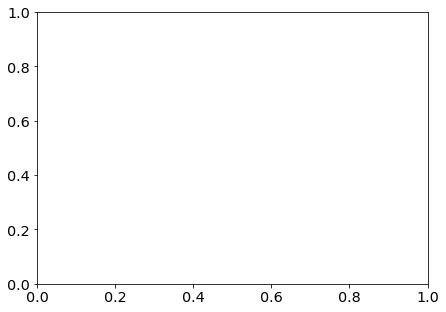

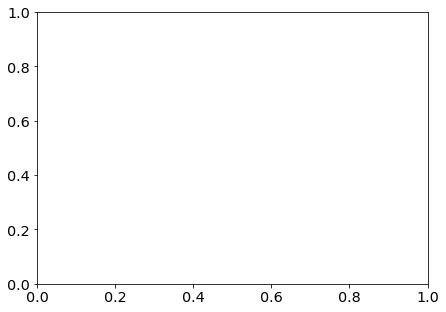

In [87]:
import batch_plotter_alex
import importlib
importlib.reload(batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = nue_dirt.shape[0]
print("n_events here = ", n_events)
print("n_events/2 here = ", np.floor(n_events/2))
print("")
#batch_size = 40000
batch_size = n_events
#batch_size = int(np.floor(n_events/5))
#n_events = batch_size

varss = []
weightss = []
labss = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
#for i in range(1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = nue_dirt.iloc[start:end]

    samples = {
        "nue_dirt": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        # This is the data POT we normalize to (comes from the data Ntuples)
        pot =  2e+20 #partial file: 8.885e+19
        # This is the POT scaling factor for dirt sample
        dirtratio = pot/1.42143e+21
        # We scale down the dirt (big uncertainties on this, there's a better data-MC agreement like this)
        scalingDRT = 0.65
    elif isRun3 == True:
        pot =  5.014e+20
        dirtratio = pot/1.03226e+21
        scalingDRT = 0.45

    # NU
    weights = { #full sample mc = 0.38
                "nue_dirt": dirtratio* SPLIT * scalingDRT, #set0  
    }


    my_plotter = batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)


    #Now check on a variable
    #Remember to change the plotter keys between truth and mc

    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Elec_asmuon',10,(-1.0, 1.0),"cos(Angle Diff)"
    VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',8,(0.0, 2.0),"Lepton Momentum (GeV)"
    
    #OLD
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon',10,(0.0, 5.0),"Lepton Momentum (GeV)"
    

    var, weight, label = my_plotter.plot_variable(
        VARIABLE,
        query= NUE_SEL_QUERY,
        #query= BDT_LOOSE_CUTS,
        currentsample = "nue_dirt",
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "weightSplineTimesTuneTimesPPFX",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:3]
    
    varss.append(var)
    weightss.append(weight)
    labss.append(label)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


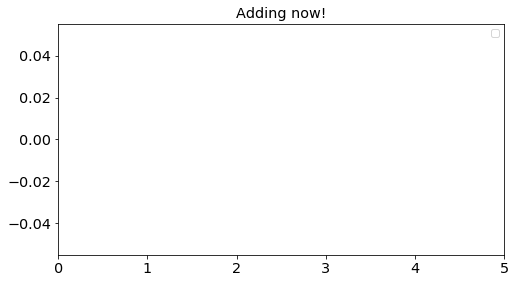

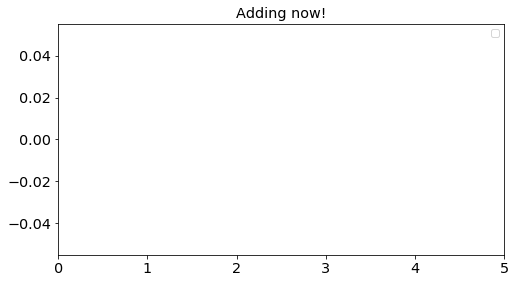

In [88]:
from matplotlib import gridspec

for i in range(int(n_events/batch_size)+1):
#for i in range(1):
    nue_fig = plt.figure(figsize=(8, 7))
    nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
    nue_ax1 = plt.subplot(nue_gs[0])
    nue_ax1.set_xlim([0, 5])    #TrueE, lepton mom
    #nue_ax1.set_xlim([-1, 1])    #AngleDiff

    nue_stacked = nue_ax1.hist(
                varss[i].values(),
                weights=list(weightss[i].values()),
                stacked=True,
                label=labss[i],
                bins=BINS,
                range=RANGE)
    
    plt.title("Adding now!")
    plt.legend()

In [89]:
def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)

No handles with labels found to put in legend.


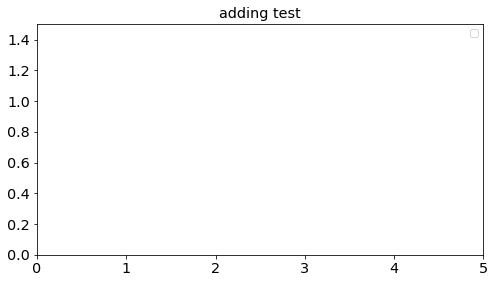

In [90]:
category_labels = {
    1 : r'$\nu_e$ CC0$\pi$Np', 
    2 : r'Out FV',
    3 : r'$\nu_\mu$ CC $\pi^{0}$',
    4 : r'$\nu_\mu$ CC',
    5 : r'$\nu_\mu$ NC $\pi^{0}$',
    6 : r'$\nu_\mu$ NC',
    7 : r'$\bar{\nu}_e$ CC0$\pi$Np',
    8: r'$\nu_e$ NC',
    9: r'$\nu_e$ CC other',
    10 : r'$\nu_e$ / $\overline{\nu_e}$  other', 
    11 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  $\pi^{0}$', 
    12 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other',
    0: r'Unknown'
}


labels = [
            "%s: %.1f" % (category_labels[c], sum(weightss_tot[0][c])) \
            if sum(weightss_tot[0][c]) else ""
            for c in varss[0].keys()
        ]


nue_fig = plt.figure(figsize=(8, 7))
nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1 = plt.subplot(nue_gs[0])

#TrueE, LeptonMom
nue_ax1.set_xlim([0, 5])
nue_ax1.set_ylim([0, 1.5])

#AngleDiff
#nue_ax1.set_xlim([-1, 1])
#nue_ax1.set_ylim([0, 0.05])

nue_stacked = nue_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)

plt.title("adding test")
plt.legend()

In [91]:
import importlib
import Plotter_Functions_Alex
importlib.reload(Plotter_Functions_Alex)
from Plotter_Functions_Alex import getWantedLists
importlib.reload(getWantedLists)

#print(nue_stacked)

wanted_key = 2

nue_wanted_list = Plotter_Functions_Alex.getWantedLists.getWantedLists(wanted_key, nue_stacked)

print(nue_wanted_list)

[]

SUMS
[]
[]

Wanted List:
[]

[]


In [92]:
vars_tot_df = pd.DataFrame.from_dict(varss_tot)
weights_tot_df = pd.DataFrame.from_dict(weightss_tot)

#ending = "Sept19_TrueAngleDiff"
#ending = "Sept19_TrueLeptonMom"

if isRun3 == False:
    ######full trueE
    vars_tot_df.to_csv('nue_dirt_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    weights_tot_df.to_csv('nue_dirt_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    ########angleDiff
    #vars_tot_df.to_csv('nue_dirt_varstot_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    #weights_tot_df.to_csv('nue_dirt_weightstot_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    ########leptonMom
    #vars_tot_df.to_csv('nue_dirt_varstot_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    #weights_tot_df.to_csv('nue_dirt_weightstot_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
elif isRun3 == True:
    ######full trueE
    #vars_tot_df.to_csv('nue_dirt_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    #weights_tot_df.to_csv('nue_dirt_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    ########angleDiff
    #vars_tot_df.to_csv('nue_dirt_varstot_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    #weights_tot_df.to_csv('nue_dirt_weightstot_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    ########leptonMom
    vars_tot_df.to_csv('nue_dirt_varstot_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    weights_tot_df.to_csv('nue_dirt_weightstot_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')


### Stat Err

In [49]:
# sumw2 of the full event rate 
weight_stat_errs = []

#RECOE
#xvar = "reco_e"
#bins = np.arange(1.0, 4.5, 0.5)
#ANGLE
#xvar = "cosNu_Angle_Numi_Elec_asmuon_reco"
#bins = np.arange(-1.0, 1.2, 0.2)
#LEPTONMOM
#xvar = "targetP_asmuon_reco"
#bins = np.arange(0, 2.25, 0.25)

#OLD
#RECOE
xvar = "reco_e"
bins = np.arange(0, 5.5, 0.5)
#LEPTONMOM
#xvar = "targetP_asmuon_reco"
#bins = np.arange(0, 5.5, 0.5)

for i in range(len(bins)-1):

    if i==len(bins)-2: 
        bin_query = xvar+' >= '+str(bins[i])+' and '+xvar+' <= '+str(bins[i+1])
    else: 
        bin_query = xvar+' >= '+str(bins[i])+' and '+xvar+' < '+str(bins[i+1])

    #nuwro_full_sumw2.append(sum(datasets_bdt['infv'].query('is_signal==True and '+bin_query).totweight_data ** 2) ) #bug (fixed below)
    weight_stat_errs.append(sum(datasets_bdt.query(NUE_SEL_QUERY+ " and " +bin_query).totweight_data ** 2))
    
    
# percent stat error - of the background subtracted event rate 
#print( [(np.sqrt(a)/b) for a,b in zip(nuwro_full_sumw2, nuwro_evt_rate)] )
print(weight_stat_errs)

[0.07697028119792981, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [50]:
isRun3

True

In [51]:
if isRun3 == False:
    
    np.savetxt("nue_dirt_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    


    """
    #########################
    #####angleDiff###########
    ##########################
    
    np.savetxt("nue_dirt_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    """
    
    """
    #########################
    #####leptonMom###########
    ##########################
    
    np.savetxt("nue_dirt_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')
    """
    
elif isRun3 == True:
    
    np.savetxt("nue_dirt_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    

    """
    #########################
    #####angleDiff###########
    ##########################
    
    np.savetxt("nue_dirt_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')
    
    """
    
    """
    #########################
    #####leptonMom###########
    ##########################
    
    np.savetxt("nue_dirt_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    """

In [95]:
import staterr_batch_plotter_alex
import importlib
importlib.reload(staterr_batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = nue_dirt.shape[0]
print("n_events here = ", n_events)
print("n_events/2 here = ", np.floor(n_events/2))
print("")
batch_size = n_events
#batch_size = int(np.floor(n_events/5))
#n_events = batch_size

errs = []
detsyss = []
sels = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
#for i in range(1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = nue_dirt.iloc[start:end]

    samples = {
        "nue_dirt": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        # This is the data POT we normalize to (comes from the data Ntuples)
        pot =  2e+20 #partial file: 8.885e+19
        # This is the POT scaling factor for dirt sample
        dirtratio = pot/1.42143e+21
        # We scale down the dirt (big uncertainties on this, there's a better data-MC agreement like this)
        scalingDRT = 0.65
    elif isRun3 == True:
        pot =  5.014e+20
        dirtratio = pot/1.03226e+21
        scalingDRT = 0.45
        
    weights = { #full sample mc = 0.38
                "nue_dirt": dirtratio* SPLIT * scalingDRT, #set0  
    }


    my_plotter = staterr_batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)
    
    
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Elec_asmuon_reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',8,(1.0, 4.0),"Lepton Momentum (GeV)"
    
    #OLD
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',10,(0.0, 5.0),"Lepton Momentum (GeV)"

    err, detsys, selected = my_plotter.plot_variable(
        VARIABLE,   
        query= NUE_SEL_QUERY,
        currentsample = "nue_dirt",
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "weightSplineTimesTuneTimesPPFX",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:3]
    
    
    errs.append(err)
    detsyss.append(detsys)
    sels.append(selected)

n_events here =  389264
n_events/2 here =  194632.0

1.0
1
{'nue_dirt': 0.21857865266502624}
swtrig_pre==1 and nslice==1 and 10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_nu_vtx_sce_z<=1026 and contained_fraction>0.9 and n_showers_contained==1 and n_tracks_contained>0 and trk_energy>0.04 and shr_score<0.3 and shrmoliereavg<15 and shr_tkfit_dedx_Y<7 and trkpid<0.35 and tksh_distance<12 and targetP_asmuon_reco > 0.04 & targetP_asmuon_reco < 2.0 and targetP_asmuon > 0.04 & targetP_asmuon < 2.0 and BDT_score > 0.575& targetP_asmuon_reco <= 4 & targetP_asmuon_reco >= 1 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False

current sample is:  nue_dirt

LOOK HERE FOR DETSYS
None
err nue dirt: 
[0. 0. 0. 0. 0. 0. 0. 0.]
detsys nue dirt: 
[0. 0. 0. 0. 0. 0. 0. 0.]

selected  [0. 0. 0. 0. 0. 0. 0. 0.]
Returning
{'nue_dirt': 0.21857865266502624}
swtrig_pre==1 and nslice==1 and 10<=r

In [96]:
#print(errs)
#print(sels)

#arrange the lists such that all the errors from bin 1 are in one list, bin 2 in another list, etc...
masterlist = []
templist = []
for i in range((len(errs[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(errs)):
        templist.append(errs[j][i])
masterlist.append(templist)
    
masterlist.pop(0)


#deal with adding the errors in each bin
total_errs = []
holdlist = []
for f in masterlist:
    total_errs.append(sum(holdlist))
    #print("------------------------------")
    holdlist = []
    for g in f:
        #just add them as they differnt parts of the same total number. This then matches previous when doing total
        holdlist.append(g)
total_errs.append(sum(holdlist))

total_errs.pop(0)
print("total errs = ", total_errs)
print("")

nue_dirt_stat_errs = total_errs

#####################################################

#arrange the lists such that all the errors from bin 1 are in one list, bin 2 in another list, etc...
masterlistsels = []
templistsels = []
for i in range((len(sels[0]))):
    masterlistsels.append(templistsels)
    templistsels = []
    for j in range(len(sels)):
        templistsels.append(sels[j][i])
masterlistsels.append(templistsels)
    
masterlistsels.pop(0)


#deal with adding the errors in each bin
total_sels = []
holdlistsels = []
for f in masterlistsels:
    total_sels.append(sum(holdlistsels))
    #print("------------------------------")
    holdlistsels = []
    for g in f:
        #just add them as they differnt parts of the same total number. This then matches previous when doing total
        holdlistsels.append(g)
total_sels.append(sum(holdlistsels))

total_sels.pop(0)
print("total selected = ", total_sels)

nue_dirt_stat_errs_selected = total_sels

total errs =  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

total selected =  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [97]:
if isRun3 == False:
    
    np.savetxt("nue_dirt_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               nue_dirt_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_dirt_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               nue_dirt_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')
    


    """
    #########################
    #####angleDiff###########
    ##########################
    
    np.savetxt("nue_dirt_stat_errs_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               nue_dirt_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_dirt_stat_errs_selected_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               nue_dirt_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')
    """
    
    """
    #########################
    #####leptonMom###########
    ##########################
    
    np.savetxt("nue_dirt_stat_errs_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               nue_dirt_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_dirt_stat_errs_selected_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               nue_dirt_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')
    """
elif isRun3 == True:
    """
    np.savetxt("nue_dirt_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               nue_dirt_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_dirt_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               nue_dirt_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')

    """

    """
    #########################
    #####angleDiff###########
    ##########################
    
    np.savetxt("nue_dirt_stat_errs_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               nue_dirt_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_dirt_stat_errs_selected_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               nue_dirt_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')
    """
    
    
    #########################
    #####leptonMom###########
    ##########################
    
    np.savetxt("nue_dirt_stat_errs_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               nue_dirt_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_dirt_stat_errs_selected_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               nue_dirt_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')
    

### Sys Errs

In [98]:
#############################
##### weightsPPFX ###########
#############################

import syserr_batch_plotter_alex
import importlib
importlib.reload(syserr_batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = nue_dirt.shape[0]
print("n_events here = ", n_events)
print("n_events/2 here = ", np.floor(n_events/2))
print("")
batch_size = n_events
#batch_size = int(np.floor(n_events/5))
#n_events = batch_size

n_cv_tots = []
n_tots = []
dfs_ppfx = []
df_ppfx_vars = []
df_ppfx_splines = []
detvar_dicts = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
#for i in range(1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = nue_dirt.iloc[start:end]

    samples = {
        "nue_dirt": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 #partial file: 8.885e+19
        dirtratio = pot/1.42143e+21
        scalingDRT = 0.65
    elif isRun3 == True:
        pot =  5.014e+20
        dirtratio = pot/1.03226e+21
        scalingDRT = 0.45
        
    weights = { #full sample mc = 0.38
                "nue_dirt": dirtratio* SPLIT * scalingDRT, #set0  
    }



    my_plotter = syserr_batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)
    
    
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Elec_asmuon_reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',8,(0.0, 2.0),"Lepton Momentum (GeV)"
    
    #OLD
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',10,(0.0, 5.0),"Lepton Momentum (GeV)"
    
    
    n_cv_tot, n_tot, df_ppfx, df_ppfx_var, df_ppfx_spline, detvar_dict = my_plotter.plot_variable(
        VARIABLE,   
        query= NUE_SEL_QUERY,
        currentsample = "nue_dirt",
        typeerr = "standard",
        weight = "weightsPPFX",
        category_query = " ",
        Nuniverse=500,
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "weightSplineTimesTuneTimesPPFX",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:6]
    
    
    n_cv_tots.append(n_cv_tot)
    n_tots.append(n_tot)
    dfs_ppfx.append(df_ppfx)
    df_ppfx_vars.append(df_ppfx_var)
    df_ppfx_splines.append(df_ppfx_spline)
    detvar_dicts.append(detvar_dict)

n_events here =  389264
n_events/2 here =  194632.0

1.0
1
{'nue_dirt': 0.21857865266502624}
swtrig_pre==1 and nslice==1 and 10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_nu_vtx_sce_z<=1026 and contained_fraction>0.9 and n_showers_contained==1 and n_tracks_contained>0 and trk_energy>0.04 and shr_score<0.3 and shrmoliereavg<15 and shr_tkfit_dedx_Y<7 and trkpid<0.35 and tksh_distance<12 and targetP_asmuon_reco > 0.04 & targetP_asmuon_reco < 2.0 and targetP_asmuon > 0.04 & targetP_asmuon < 2.0 and BDT_score > 0.575& targetP_asmuon_reco <= 2 & targetP_asmuon_reco >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False

standard sys err
Universes 500
Empty DataFrame
Columns: []
Index: []
Returning
--------------------------

{'nue_dirt': 0.21857865266502624}
swtrig_pre==1 and nslice==1 and 10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_nu_vtx_sce_z<

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0. 0. 0. 0. 0. 0. 0. 0.]


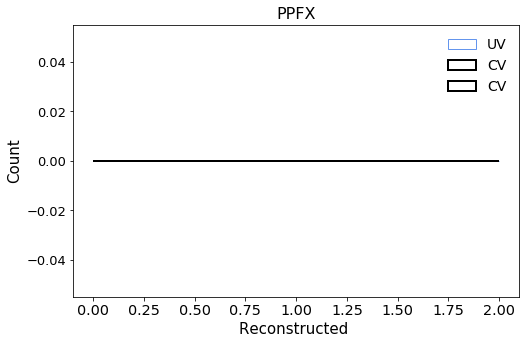

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0. 0. 0. 0. 0. 0. 0. 0.]


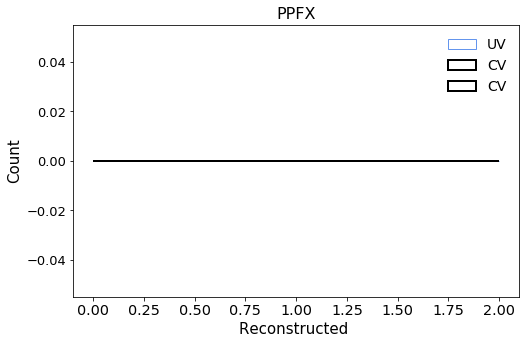

In [99]:
import matplotlib.pyplot as plt
import matplotlib


for j in range(len(detvar_dicts)):

    n=0
    #bin_centers = np.arange(1.25, 4.25, 0.5) #energy
    #bins = np.arange(1.0, 4.5, 0.5)
    #bin_centers = np.arange(-0.9, 1.1, 0.2) #Angle
    #bins = np.arange(-1, 1.2, 0.2)
    bin_centers = np.arange(0.125, 2.125, 0.25) #lepton
    bins = np.arange(0, 2.25, 0.25)
    print(bin_centers)
    print(bins)

    fig = plt.figure(figsize=(8, 5)) 


    for variation in detvar_dicts[j].keys(): 

        if n==0: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation], 
                 linewidth=1, color='cornflowerblue', label='UV')

        else: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation],
                 linewidth=1, color='cornflowerblue')

        n+=1   


    plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)

    current = (plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)[0])

    print(current)

    plt.title('PPFX', fontsize=16)

    plt.ylabel('Count' , fontsize=15) # 2.68294E22
    plt.xlabel("Reconstructed ", fontsize=15)

    #plt.xticks(x_ticks, fontsize=13)
    plt.yticks(fontsize=13)

    plt.legend(frameon=False, fontsize=14)

    #plt.xlim(xlow, xhigh)


    plt.show()

In [100]:
#will need to edit this if batching

nue_dirt_ppfx_detvar_dict = pd.DataFrame(detvar_dicts[0])
#print(nue_nue_ppfx_detvar_dict)

if isRun3 == False:
    #nue_dirt_ppfx_detvar_dict.to_csv('nue_dirt_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    #nue_dirt_ppfx_detvar_dict.to_csv('nue_dirt_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_'+ending+'.csv')
    nue_dirt_ppfx_detvar_dict.to_csv('nue_dirt_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_'+ending+'.csv')
elif isRun3 == True:
    #nue_dirt_ppfx_detvar_dict.to_csv('nue_dirt_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    #nue_dirt_ppfx_detvar_dict.to_csv('nue_dirt_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_'+ending+'.csv')
    nue_dirt_ppfx_detvar_dict.to_csv('nue_dirt_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_'+ending+'.csv')

In [101]:
masterlist = []
templist = []
for i in range((len(n_tots[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(n_tots)):
        templist.append(n_tots[j][i])
masterlist.append(templist)

#need to sum each part of the masterlist into one pair of arrays now
masterlist.pop(0)
final_ns_nue_dirt_ppfx = []

for a in range(len(masterlist)):
    #print(sum(masterlist[a]))
    final_ns_nue_dirt_ppfx.append(sum(masterlist[a]))

final_ncvs_nue_dirt_ppfx = sum(n_cv_tots)


##################################################################

frames = []
for a in range(len(dfs_ppfx)):
    frames.append(dfs_ppfx[a][0])
    
    
total_ppfx_df = pd.concat(frames, ignore_index=True)
#print(total_ppfx_df)

#-----------------
frames2 = []
for b in range(len(df_ppfx_vars)):
    frames2.append(df_ppfx_vars[b][0])
    
    
total_ppfx_df_vars = pd.concat(frames2, ignore_index=False)
#print(total_ppfx_df_vars)

#-----------------
frames3 = []
for c in range(len(df_ppfx_splines)):
    frames3.append(df_ppfx_splines[c][0])
    
    
total_ppfx_df_splines = pd.concat(frames3, ignore_index=False)
#print(total_ppfx_df_splines)

In [102]:
if isRun3 == False:
    
    np.savetxt("nue_dirt_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ns_nue_dirt_ppfx[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_dirt_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ncvs_nue_dirt_ppfx,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_ppfx_df.to_csv('nue_dirt_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_ppfx_df_vars.to_csv('nue_dirt_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_ppfx_df_splines.to_csv('nue_dirt_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    

    """
    #################################
    #####angleDiff##################
    ############################

    np.savetxt("nue_dirt_syserss_final_ns_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ns_nue_dirt_ppfx[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_dirt_syserss_final_ncvs_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ncvs_nue_dirt_ppfx,
               delimiter =", ", 
               fmt ='% s')
    ###########################################

    total_ppfx_df.to_csv('nue_dirt_syserss_df_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_ppfx_df_vars.to_csv('nue_dirt_syserss_df_ppfx_vars_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_ppfx_df_splines.to_csv('nue_dirt_syserss_df_ppfx_splines_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    """
    """
    #################################
    #####leptonMom##################
    ############################

    np.savetxt("nue_dirt_syserss_final_ns_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ns_nue_dirt_ppfx[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_dirt_syserss_final_ncvs_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ncvs_nue_dirt_ppfx,
               delimiter =", ", 
               fmt ='% s')
    
    ###########################################

    total_ppfx_df.to_csv('nue_dirt_syserss_df_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_ppfx_df_vars.to_csv('nue_dirt_syserss_df_ppfx_vars_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_ppfx_df_splines.to_csv('nue_dirt_syserss_df_ppfx_splines_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    """
elif isRun3 == True:
    """
    np.savetxt("nue_dirt_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ns_nue_dirt_ppfx[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_dirt_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ncvs_nue_dirt_ppfx,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_ppfx_df.to_csv('nue_dirt_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_ppfx_df_vars.to_csv('nue_dirt_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_ppfx_df_splines.to_csv('nue_dirt_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    """

    """
    #################################
    #####angleDiff##################
    ############################

    np.savetxt("nue_dirt_syserss_final_ns_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ns_nue_dirt_ppfx[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_dirt_syserss_final_ncvs_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ncvs_nue_dirt_ppfx,
               delimiter =", ", 
               fmt ='% s')


    ###########################################

    total_ppfx_df.to_csv('nue_dirt_syserss_df_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_ppfx_df_vars.to_csv('nue_dirt_syserss_df_ppfx_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_ppfx_df_splines.to_csv('nue_dirt_syserss_df_ppfx_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    """
    
    #################################
    #####leptonMom##################
    ############################

    np.savetxt("nue_dirt_syserss_final_ns_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ns_nue_dirt_ppfx[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_dirt_syserss_final_ncvs_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ncvs_nue_dirt_ppfx,
               delimiter =", ", 
               fmt ='% s')


    ###########################################

    total_ppfx_df.to_csv('nue_dirt_syserss_df_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_ppfx_df_vars.to_csv('nue_dirt_syserss_df_ppfx_vars_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_ppfx_df_splines.to_csv('nue_dirt_syserss_df_ppfx_splines_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    


In [103]:
#############################
##### weightsGenie ###########
#############################

import syserr_batch_plotter_alex
import importlib
importlib.reload(syserr_batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = nue_dirt.shape[0]
print("n_events here = ", n_events)
print("n_events/2 here = ", np.floor(n_events/2))
print("")
batch_size = n_events
#batch_size = int(np.floor(n_events/5))
#n_events = batch_size

n_cv_tots = []
n_tots = []
dfs_genie = []
df_genie_vars = []
df_genie_splines = []
detvar_dicts = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
#for i in range(1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = nue_dirt.iloc[start:end]

    samples = {
        "nue_dirt": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20
        dirtratio = pot/1.42143e+21
        scalingDRT = 0.65
    elif isRun3 == True:
        pot =  5.014e+20
        dirtratio = pot/1.03226e+21
        scalingDRT = 0.45
        
    weights = { #full sample mc = 0.38
                "nue_dirt": dirtratio* SPLIT * scalingDRT, #set0  
    }



    my_plotter = syserr_batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)
    
    

    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"Reco Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Elec_asmuon_reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',8,(0.0, 2.0),"Lepton Momentum (GeV)"
    
    #OLD
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reco Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',10,(0.0, 5.0),"Lepton Momentum (GeV)"

    n_cv_tot, n_tot, df_genie, df_genie_var, df_genie_spline, detvar_dict  = my_plotter.plot_variable(
        VARIABLE,   
        query= NUE_SEL_QUERY,
        currentsample = "nue_dirt",
        typeerr = "standard",
        weight = "weightsGenie",
        category_query = " ",
        Nuniverse = 500,
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "weightSplineTimesTuneTimesPPFX",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:6]
    
    
    n_cv_tots.append(n_cv_tot)
    n_tots.append(n_tot)
    dfs_genie.append(df_genie)
    df_genie_vars.append(df_genie_var)
    df_genie_splines.append(df_genie_spline)
    detvar_dicts.append(detvar_dict)

n_events here =  389264
n_events/2 here =  194632.0

1.0
1
{'nue_dirt': 0.21857865266502624}
swtrig_pre==1 and nslice==1 and 10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_nu_vtx_sce_z<=1026 and contained_fraction>0.9 and n_showers_contained==1 and n_tracks_contained>0 and trk_energy>0.04 and shr_score<0.3 and shrmoliereavg<15 and shr_tkfit_dedx_Y<7 and trkpid<0.35 and tksh_distance<12 and targetP_asmuon_reco > 0.04 & targetP_asmuon_reco < 2.0 and targetP_asmuon > 0.04 & targetP_asmuon < 2.0 and BDT_score > 0.575& targetP_asmuon_reco <= 2 & targetP_asmuon_reco >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False

standard sys err
Universes 500
Empty DataFrame
Columns: []
Index: []
Returning
--------------------------

{'nue_dirt': 0.21857865266502624}
swtrig_pre==1 and nslice==1 and 10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_nu_vtx_sce_z<

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0. 0. 0. 0. 0. 0. 0. 0.]


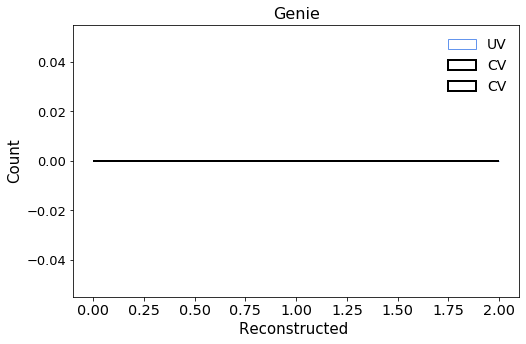

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0. 0. 0. 0. 0. 0. 0. 0.]


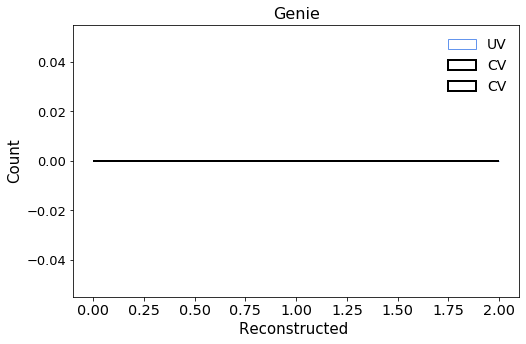

In [104]:
import matplotlib.pyplot as plt
import matplotlib


for j in range(len(detvar_dicts)):

    n=0
    #bin_centers = np.arange(1.25, 4.25, 0.5) #energy
    #bins = np.arange(1.0, 4.5, 0.5)
    #bin_centers = np.arange(-0.9, 1.1, 0.2) #Angle
    #bins = np.arange(-1, 1.2, 0.2)
    bin_centers = np.arange(0.125, 2.125, 0.25) #lepton
    bins = np.arange(0, 2.25, 0.25)
    print(bin_centers)
    print(bins)

    fig = plt.figure(figsize=(8, 5)) 


    for variation in detvar_dicts[j].keys(): 

        if n==0: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation], 
                 linewidth=1, color='cornflowerblue', label='UV')

        else: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation],
                 linewidth=1, color='cornflowerblue')

        n+=1   


    plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)

    current = (plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)[0])

    print(current)

    plt.title('Genie', fontsize=16)

    plt.ylabel('Count' , fontsize=15) # 2.68294E22
    plt.xlabel("Reconstructed ", fontsize=15)

    #plt.xticks(x_ticks, fontsize=13)
    plt.yticks(fontsize=13)

    plt.legend(frameon=False, fontsize=14)

    #plt.xlim(xlow, xhigh)


    plt.show()

In [105]:
#will need to edit this if batching

nue_dirt_genie_detvar_dict = pd.DataFrame(detvar_dicts[0])
#print(nue_nue_ppfx_detvar_dict)

if isRun3 == False:
    #nue_dirt_genie_detvar_dict.to_csv('nue_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    #nue_dirt_genie_detvar_dict.to_csv('nue_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_'+ending+'.csv')
    nue_dirt_genie_detvar_dict.to_csv('nue_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_'+ending+'.csv')
elif isRun3 == True:
    #nue_dirt_genie_detvar_dict.to_csv('nue_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    #nue_dirt_genie_detvar_dict.to_csv('nue_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_'+ending+'.csv')
    nue_dirt_genie_detvar_dict.to_csv('nue_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_'+ending+'.csv')

In [106]:
masterlist = []
templist = []
for i in range((len(n_tots[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(n_tots)):
        templist.append(n_tots[j][i])
masterlist.append(templist)

#need to sum each part of the masterlist into one pair of arrays now
masterlist.pop(0)
final_ns_nue_dirt_genie = []

for a in range(len(masterlist)):
    #print(sum(masterlist[a]))
    final_ns_nue_dirt_genie.append(sum(masterlist[a]))

final_ncvs_nue_dirt_genie = sum(n_cv_tots)

#####################################################
frames = []
for a in range(len(dfs_genie)):
    frames.append(dfs_genie[a][0])
    
    
total_genie_df = pd.concat(frames, ignore_index=True)
print(total_genie_df)

#-----------------
frames2 = []
for b in range(len(df_genie_vars)):
    frames2.append(df_genie_vars[b][0])
    
    
total_genie_df_vars = pd.concat(frames2, ignore_index=False)
print(total_genie_df_vars)

#-----------------
frames3 = []
for c in range(len(df_genie_splines)):
    frames3.append(df_genie_splines[c][0])
    
    
total_genie_df_splines = pd.concat(frames3, ignore_index=False)
print(total_genie_df_splines)


Empty DataFrame
Columns: []
Index: []
Series([], Name: targetP_asmuon_reco, dtype: float32)
Series([], Name: weightSpline, dtype: float32)


In [107]:
if isRun3 == False:
    
    np.savetxt("nue_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ns_nue_dirt_genie[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ncvs_nue_dirt_genie,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_genie_df.to_csv('nue_dirt_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_genie_df_vars.to_csv('nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_genie_df_splines.to_csv('nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    
    """
    #####################
    ###AngleDiff###
    ######################
    np.savetxt("nue_dirt_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ns_nue_dirt_genie[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ncvs_nue_dirt_genie,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_genie_df.to_csv('nue_dirt_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_genie_df_vars.to_csv('nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_genie_df_splines.to_csv('nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    """
    """
    #####################
    ###leptonMom###
    ######################
    np.savetxt("nue_dirt_syserss_final_ns_genie_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ns_nue_dirt_genie[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ncvs_nue_dirt_genie,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_genie_df.to_csv('nue_dirt_syserss_df_genie_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_genie_df_vars.to_csv('nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_genie_df_splines.to_csv('nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    """
elif isRun3 == True:
    """
    np.savetxt("nue_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ns_nue_dirt_genie[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ncvs_nue_dirt_genie,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_genie_df.to_csv('nue_dirt_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_genie_df_vars.to_csv('nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_genie_df_splines.to_csv('nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    """
    """
    #####################
    ###AngleDiff###
    ######################
    np.savetxt("nue_dirt_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ns_nue_dirt_genie[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ncvs_nue_dirt_genie,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_genie_df.to_csv('nue_dirt_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_genie_df_vars.to_csv('nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_genie_df_splines.to_csv('nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    """
    
    #####################
    ###leptonMom###
    ######################
    np.savetxt("nue_dirt_syserss_final_ns_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ns_nue_dirt_genie[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ncvs_nue_dirt_genie,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_genie_df.to_csv('nue_dirt_syserss_df_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_genie_df_vars.to_csv('nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_genie_df_splines.to_csv('nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    


In [108]:
########### weightsReint ###########
#############################

import syserr_batch_plotter_alex
import importlib
importlib.reload(syserr_batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = nue_dirt.shape[0]
print("n_events here = ", n_events)
print("n_events/2 here = ", np.floor(n_events/2))
print("weightsReint")
batch_size = n_events
#batch_size = int(np.floor(n_events/5))
#n_events = batch_size

n_cv_tots = []
n_tots = []
dfs_reint = []
df_reint_vars = []
df_reint_splines = []
detvar_dicts = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
#for i in range(1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = nue_dirt.iloc[start:end]

    samples = {
        "nue_dirt": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 #partial file: 8.885e+19
        dirtratio = pot/1.42143e+21
        scalingDRT = 0.65
    elif isRun3 == True:
        pot =  5.014e+20
        dirtratio = pot/1.03226e+21
        scalingDRT = 0.45
        
    weights = { #full sample mc = 0.38
                "nue_dirt": dirtratio* SPLIT * scalingDRT, #set0  
    }



    my_plotter = syserr_batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)
    
    
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Elec_asmuon_reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',8,(0.0, 2.0),"Lepton Momentum (GeV)"
    
    #OLD
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',10,(0.0, 5.0),"Lepton Momentum (GeV)"

    n_cv_tot, n_tot, df_reint, df_reint_var, df_reint_spline, detvar_dict = my_plotter.plot_variable(
        VARIABLE,   
        query= NUE_SEL_QUERY,
        currentsample = "nue_dirt",
        typeerr = "standard",
        weight = "weightsReint",
        category_query = " ",
        Nuniverse=500,
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "weightSplineTimesTuneTimesPPFX",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:6]
    
    
    n_cv_tots.append(n_cv_tot)
    n_tots.append(n_tot)
    dfs_reint.append(df_reint)
    df_reint_vars.append(df_reint_var)
    df_reint_splines.append(df_reint_spline)
    detvar_dicts.append(detvar_dict)

n_events here =  389264
n_events/2 here =  194632.0
weightsReint
1.0
1
{'nue_dirt': 0.21857865266502624}
swtrig_pre==1 and nslice==1 and 10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_nu_vtx_sce_z<=1026 and contained_fraction>0.9 and n_showers_contained==1 and n_tracks_contained>0 and trk_energy>0.04 and shr_score<0.3 and shrmoliereavg<15 and shr_tkfit_dedx_Y<7 and trkpid<0.35 and tksh_distance<12 and targetP_asmuon_reco > 0.04 & targetP_asmuon_reco < 2.0 and targetP_asmuon > 0.04 & targetP_asmuon < 2.0 and BDT_score > 0.575& targetP_asmuon_reco <= 2 & targetP_asmuon_reco >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False

standard sys err
Universes 500
Empty DataFrame
Columns: []
Index: []
Returning
--------------------------

{'nue_dirt': 0.21857865266502624}
swtrig_pre==1 and nslice==1 and 10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_n

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0. 0. 0. 0. 0. 0. 0. 0.]


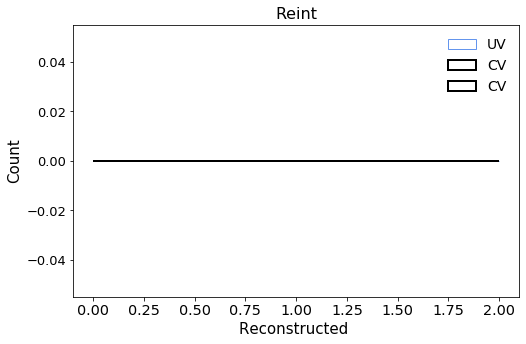

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0. 0. 0. 0. 0. 0. 0. 0.]


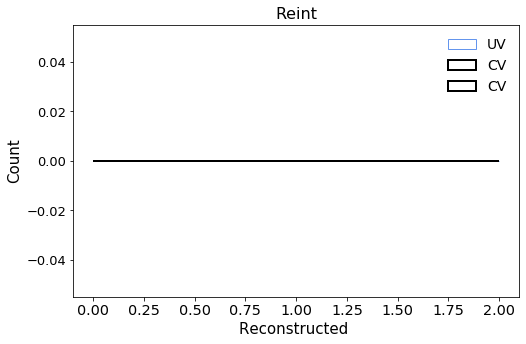

In [109]:
import matplotlib.pyplot as plt
import matplotlib


for j in range(len(detvar_dicts)):

    n=0
    #bin_centers = np.arange(1.25, 4.25, 0.5) #energy
    #bins = np.arange(1.0, 4.5, 0.5)
    #bin_centers = np.arange(-0.9, 1.1, 0.2) #Angle
    #bins = np.arange(-1, 1.2, 0.2)
    bin_centers = np.arange(0.125, 2.125, 0.25) #lepton
    bins = np.arange(0, 2.25, 0.25)
    print(bin_centers)
    print(bins)

    fig = plt.figure(figsize=(8, 5)) 


    for variation in detvar_dicts[j].keys(): 

        if n==0: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation], 
                 linewidth=1, color='cornflowerblue', label='UV')

        else: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation],
                 linewidth=1, color='cornflowerblue')

        n+=1   


    plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)

    current = (plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)[0])

    print(current)

    plt.title('Reint', fontsize=16)

    plt.ylabel('Count' , fontsize=15) # 2.68294E22
    plt.xlabel("Reconstructed ", fontsize=15)

    #plt.xticks(x_ticks, fontsize=13)
    plt.yticks(fontsize=13)

    plt.legend(frameon=False, fontsize=14)

    #plt.xlim(xlow, xhigh)



    plt.show()

In [110]:
#will need to edit this if batching

nue_dirt_reint_detvar_dict = pd.DataFrame(detvar_dicts[0])
#print(nue_nue_ppfx_detvar_dict)

if isRun3 == False:
    #nue_dirt_reint_detvar_dict.to_csv('nue_dirt_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    #nue_dirt_reint_detvar_dict.to_csv('nue_dirt_syserss_df_reint_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_'+ending+'.csv')
    nue_dirt_reint_detvar_dict.to_csv('nue_dirt_syserss_df_reint_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_'+ending+'.csv')
elif isRun3 == True:
    #nue_dirt_reint_detvar_dict.to_csv('nue_dirt_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    #nue_dirt_reint_detvar_dict.to_csv('nue_dirt_syserss_df_reint_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_'+ending+'.csv')
    nue_dirt_reint_detvar_dict.to_csv('nue_dirt_syserss_df_reint_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_'+ending+'.csv')

In [111]:
masterlist = []
templist = []
for i in range((len(n_tots[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(n_tots)):
        templist.append(n_tots[j][i])
masterlist.append(templist)

#need to sum each part of the masterlist into one pair of arrays now
masterlist.pop(0)
final_ns_nue_dirt_reint = []

for a in range(len(masterlist)):
    #print(sum(masterlist[a]))
    final_ns_nue_dirt_reint.append(sum(masterlist[a]))

final_ncvs_nue_dirt_reint = sum(n_cv_tots)
print(final_ncvs_nue_dirt_reint)

#######################################

frames = []
for a in range(len(dfs_reint)):
    frames.append(dfs_reint[a][0])
     
total_reint_df = pd.concat(frames, ignore_index=True)
print(total_reint_df)

#-----------------
frames2 = []
for b in range(len(df_reint_vars)):
    frames2.append(df_reint_vars[b][0])
    
    
total_reint_df_vars = pd.concat(frames2, ignore_index=False)
print(total_reint_df_vars)

#-----------------
frames3 = []
for c in range(len(df_reint_splines)):
    frames3.append(df_reint_splines[c][0])
    
    
total_reint_df_splines = pd.concat(frames3, ignore_index=False)
print(total_reint_df_splines)


[0. 0. 0. 0. 0. 0. 0. 0.]
Empty DataFrame
Columns: []
Index: []
Series([], Name: targetP_asmuon_reco, dtype: float32)
Series([], Name: weightSplineTimesTuneTimesPPFX, dtype: float32)


In [112]:
if isRun3 == False:
    
    np.savetxt("nue_dirt_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ns_nue_dirt_reint[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_dirt_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ncvs_nue_dirt_reint,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_reint_df.to_csv('nue_dirt_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_reint_df_vars.to_csv('nue_dirt_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_reint_df_splines.to_csv('nue_dirt_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')

    
    """
    #################
    ###angleDiff#####
    #################

    np.savetxt("nue_dirt_syserss_final_ns_reint_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ns_nue_dirt_reint[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_dirt_syserss_final_ncvs_reint_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ncvs_nue_dirt_reint,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_reint_df.to_csv('nue_dirt_syserss_df_reint_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_reint_df_vars.to_csv('nue_dirt_syserss_df_reint_vars_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_reint_df_splines.to_csv('nue_dirt_syserss_df_reint_splines_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    """
    """
    #################
    ###leptonMom#####
    #################

    np.savetxt("nue_dirt_syserss_final_ns_reint_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ns_nue_dirt_reint[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_dirt_syserss_final_ncvs_reint_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ncvs_nue_dirt_reint,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_reint_df.to_csv('nue_dirt_syserss_df_reint_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_reint_df_vars.to_csv('nue_dirt_syserss_df_reint_vars_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_reint_df_splines.to_csv('nue_dirt_syserss_df_reint_splines_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    """
elif isRun3 == True:
    """
    np.savetxt("nue_dirt_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ns_nue_dirt_reint[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_dirt_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ncvs_nue_dirt_reint,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_reint_df.to_csv('nue_dirt_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_reint_df_vars.to_csv('nue_dirt_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_reint_df_splines.to_csv('nue_dirt_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    """

    """
    #################
    ###angleDiff#####
    #################

    np.savetxt("nue_dirt_syserss_final_ns_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ns_nue_dirt_reint[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_dirt_syserss_final_ncvs_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ncvs_nue_dirt_reint,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_reint_df.to_csv('nue_dirt_syserss_df_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_reint_df_vars.to_csv('nue_dirt_syserss_df_reint_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_reint_df_splines.to_csv('nue_dirt_syserss_df_reint_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    """
    
    #################
    ###leptonMom#####
    #################

    np.savetxt("nue_dirt_syserss_final_ns_reint_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ns_nue_dirt_reint[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_dirt_syserss_final_ncvs_reint_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ncvs_nue_dirt_reint,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_reint_df.to_csv('nue_dirt_syserss_df_reint_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_reint_df_vars.to_csv('nue_dirt_syserss_df_reint_vars_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_reint_df_splines.to_csv('nue_dirt_syserss_df_reint_splines_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    

In [113]:
#############################
##### weightsNuMIGeo ###########
#############################

import syserr_batch_plotter_alex
import importlib
importlib.reload(syserr_batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = nue_dirt.shape[0]
print("n_events here = ", n_events)
print("n_events/2 here = ", np.floor(n_events/2))
batch_size = n_events
#batch_size = int(np.floor(n_events/5))
#n_events = batch_size

n_cv_tots = []
n_tots = []
dfs_geo = []
df_geo_vars = []
df_geo_splines = []
detvar_dicts = []

print(n_events/batch_size)
print(int(n_events/batch_size)+1)

for i in range(int(n_events/batch_size)+1):
#for i in range(1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = nue_dirt.iloc[start:end]

    samples = {
        "nue_dirt": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 #partial file: 8.885e+19
        dirtratio = pot/1.42143e+21
        scalingDRT = 0.65
    elif isRun3 == True:
        pot =  5.014e+20
        dirtratio = pot/1.03226e+21
        scalingDRT = 0.45
        
    weights = { #full sample mc = 0.38
                "nue_dirt": dirtratio* SPLIT * scalingDRT, #set0  
    }



    my_plotter = syserr_batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)
    
    

    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Elec_asmuon_reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',8,(0.0, 2.0),"Lepton Momentum (GeV)"
    
    #OLD
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',10,(0.0, 5.0),"Lepton Momentum (GeV)"

    n_cv_tot, n_tot, df_geo, df_geo_var, df_geo_spline, detvar_dict = my_plotter.plot_variable(
        VARIABLE,   
        query= NUE_SEL_QUERY,
        currentsample = "nue_dirt",
        typeerr = "NuMIGeo",
        weight = "weightsGenie",  #meaningless here
        category_query = " ",
        Nuniverse=10,
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "weightSplineTimesTuneTimesPPFX",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:6]
    
    
    n_cv_tots.append(n_cv_tot)
    n_tots.append(n_tot)
    dfs_geo.append(df_geo)
    df_geo_vars.append(df_geo_var)
    df_geo_splines.append(df_geo_spline)
    detvar_dicts.append(detvar_dict)

n_events here =  389264
n_events/2 here =  194632.0
1.0
2
{'nue_dirt': 0.21857865266502624}
swtrig_pre==1 and nslice==1 and 10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_nu_vtx_sce_z<=1026 and contained_fraction>0.9 and n_showers_contained==1 and n_tracks_contained>0 and trk_energy>0.04 and shr_score<0.3 and shrmoliereavg<15 and shr_tkfit_dedx_Y<7 and trkpid<0.35 and tksh_distance<12 and targetP_asmuon_reco > 0.04 & targetP_asmuon_reco < 2.0 and targetP_asmuon > 0.04 & targetP_asmuon < 2.0 and BDT_score > 0.575& targetP_asmuon_reco <= 2 & targetP_asmuon_reco >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False

NuMI Geo sys err
Number of variations Universes 10
Returning
--------------------------

{'nue_dirt': 0.21857865266502624}
swtrig_pre==1 and nslice==1 and 10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_nu_vtx_sce_z<=1026 and contained

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0. 0. 0. 0. 0. 0. 0. 0.]


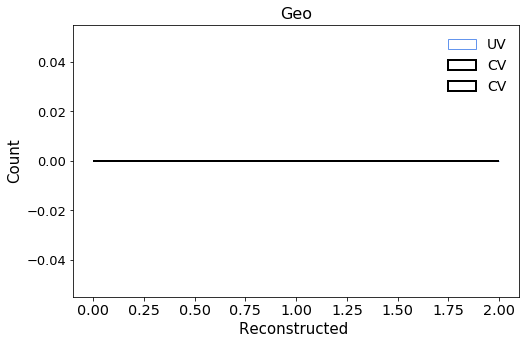

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0. 0. 0. 0. 0. 0. 0. 0.]


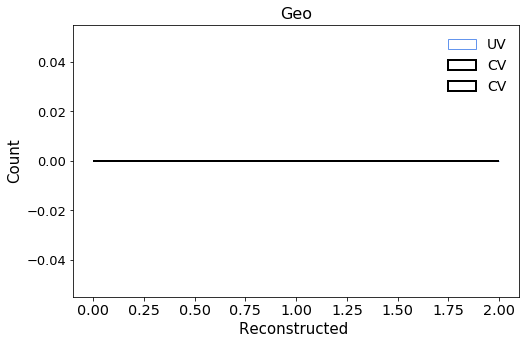

In [114]:
import matplotlib.pyplot as plt
import matplotlib


for j in range(len(detvar_dicts)):

    n=0
    #bin_centers = np.arange(1.25, 4.25, 0.5) #energy
    #bins = np.arange(1.0, 4.5, 0.5)
    #bin_centers = np.arange(-0.9, 1.1, 0.2) #Angle
    #bins = np.arange(-1, 1.2, 0.2)
    bin_centers = np.arange(0.125, 2.125, 0.25) #lepton
    bins = np.arange(0, 2.25, 0.25)
    print(bin_centers)
    print(bins)

    fig = plt.figure(figsize=(8, 5)) 


    for variation in detvar_dicts[j].keys(): 

        if n==0: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation], 
                 linewidth=1, color='cornflowerblue', label='UV')

        else: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation],
                 linewidth=1, color='cornflowerblue')

        n+=1   


    plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)

    current = (plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)[0])

    print(current)

    plt.title('Geo', fontsize=16)

    plt.ylabel('Count' , fontsize=15) # 2.68294E22
    plt.xlabel("Reconstructed ", fontsize=15)

    #plt.xticks(x_ticks, fontsize=13)
    plt.yticks(fontsize=13)

    plt.legend(frameon=False, fontsize=14)

    #plt.xlim(xlow, xhigh)


    plt.show()

In [115]:
#will need to edit this if batching

nue_dirt_geo_detvar_dict = pd.DataFrame(detvar_dicts[0])
#print(nue_nue_ppfx_detvar_dict)

if isRun3 == False:
    #nue_dirt_geo_detvar_dict.to_csv('nue_dirt_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    #nue_dirt_geo_detvar_dict.to_csv('nue_dirt_syserss_df_geo_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_'+ending+'.csv')
    nue_dirt_geo_detvar_dict.to_csv('nue_dirt_syserss_df_geo_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_'+ending+'.csv')
elif isRun3 == True:
    #nue_dirt_geo_detvar_dict.to_csv('nue_dirt_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    #nue_dirt_geo_detvar_dict.to_csv('nue_dirt_syserss_df_geo_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_'+ending+'.csv')
    nue_dirt_geo_detvar_dict.to_csv('nue_dirt_syserss_df_geo_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_'+ending+'.csv')
    

In [116]:

masterlist = []
templist = []
for i in range((len(n_tots[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(n_tots)):
        templist.append(n_tots[j][i])
masterlist.append(templist)

#need to sum each part of the masterlist into one pair of arrays now
masterlist.pop(0)
final_ns_nue_dirt_geo = []

for a in range(len(masterlist)):
    #print(sum(masterlist[a]))
    final_ns_nue_dirt_geo.append(sum(masterlist[a]))

final_ncvs_nue_dirt_geo = sum(n_cv_tots)
#print(final_ns_nue_nue_geo[0])

for x in range(len(final_ns_nue_dirt_geo)):
    final_ns_nue_dirt_geo[x] = np.concatenate((final_ns_nue_dirt_geo[x][0], final_ns_nue_dirt_geo[x][1]))
    
    
print(final_ns_nue_dirt_geo[0])  

####################################################

frames = []
for a in range(len(dfs_geo)):
    frames.append(dfs_geo[a][0])
    
    
total_geo_df = pd.concat(frames, ignore_index=True)
#print(total_geo_df)

#-----------------
frames2 = []
for b in range(len(df_geo_vars)):
    frames2.append(df_geo_vars[b][0])
    
    
total_geo_df_vars = pd.concat(frames2, ignore_index=False)
#print(total_geo_df_vars)

#-----------------
frames3 = []
for c in range(len(df_geo_splines)):
    frames3.append(df_geo_splines[c][0])
    
    
total_geo_df_splines = pd.concat(frames3, ignore_index=False)
print(total_geo_df_splines)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Series([], Name: weightSplineTimesTuneTimesPPFX, dtype: float32)


In [117]:
if isRun3 == False:
    
    np.savetxt("nue_dirt_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ns_nue_dirt_geo,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_dirt_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ncvs_nue_dirt_geo,
               delimiter =", ", 
               fmt ='% s')

    #######################################################

    total_geo_df.to_csv('nue_dirt_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_geo_df_vars.to_csv('nue_dirt_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_geo_df_splines.to_csv('nue_dirt_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    
    """
    #####################
    ###angleDiff########
    ####################

    np.savetxt("nue_dirt_syserss_final_ns_geo_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ns_nue_dirt_geo,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_dirt_syserss_final_ncvs_geo_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ncvs_nue_dirt_geo,
               delimiter =", ", 
               fmt ='% s')

    #######################################################

    total_geo_df.to_csv('nue_dirt_syserss_df_geo_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_geo_df_vars.to_csv('nue_dirt_syserss_df_geo_vars_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_geo_df_splines.to_csv('nue_dirt_syserss_df_geo_splines_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    """
    """
    #####################
    ###leptonMom########
    ####################

    np.savetxt("nue_dirt_syserss_final_ns_geo_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ns_nue_dirt_geo,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_dirt_syserss_final_ncvs_geo_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ncvs_nue_dirt_geo,
               delimiter =", ", 
               fmt ='% s')

    #######################################################

    total_geo_df.to_csv('nue_dirt_syserss_df_geo_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_geo_df_vars.to_csv('nue_dirt_syserss_df_geo_vars_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_geo_df_splines.to_csv('nue_dirt_syserss_df_geo_splines_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    """
elif isRun3 == True:
    """
    np.savetxt("nue_dirt_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ns_nue_dirt_geo,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_dirt_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ncvs_nue_dirt_geo,
               delimiter =", ", 
               fmt ='% s')

    #######################################################

    total_geo_df.to_csv('nue_dirt_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_geo_df_vars.to_csv('nue_dirt_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_geo_df_splines.to_csv('nue_dirt_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    """
    """
    #####################
    ###angleDiff########
    ####################

    np.savetxt("nue_dirt_syserss_final_ns_geo_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ns_nue_dirt_geo,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_dirt_syserss_final_ncvs_geo_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ncvs_nue_dirt_geo,
               delimiter =", ", 
               fmt ='% s')

    #######################################################

    total_geo_df.to_csv('nue_dirt_syserss_df_geo_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_geo_df_vars.to_csv('nue_dirt_syserss_df_geo_vars_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_geo_df_splines.to_csv('nue_dirt_syserss_df_geo_splines_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    """
    
    #####################
    ###leptonMom########
    ####################

    np.savetxt("nue_dirt_syserss_final_ns_geo_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ns_nue_dirt_geo,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("nue_dirt_syserss_final_ncvs_geo_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ncvs_nue_dirt_geo,
               delimiter =", ", 
               fmt ='% s')

    #######################################################

    total_geo_df.to_csv('nue_dirt_syserss_df_geo_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_geo_df_vars.to_csv('nue_dirt_syserss_df_geo_vars_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_geo_df_splines.to_csv('nue_dirt_syserss_df_geo_splines_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    


## NUE_EXT SAMPLE

In [5]:
# Name of the TTree in the PeLEE Ntuples
tree = "NeutrinoSelectionFilter"

#cut samples
#EXT  = '/pre_samp/neutrinoselection_filt_run1_beamoff'         +ls.APPEND
#full sample
if isRun3 == False:
    EXT  = '/neutrinoselection_filt_run1_beamoff'         +ls.APPEND
elif isRun3 == True:
    EXT  = '/neutrinoselection_filt_run3b_beamoff'         +ls.APPEND    

#actually fetch datasets
nue_ext  = uproot.open(ls.ntuple_path+EXT+".root")[ls.fold][tree]

# Define a list that contains the data sets
uproot_v = [nue_ext]

nue_variables = ["run", "sub", "evt", "swtrig_pre",              
             "trk_score_v", "topological_score", "shr_score",
            "reco_nu_vtx_sce_x", "reco_nu_vtx_sce_y", "reco_nu_vtx_sce_z", "shr_tkfit_npoints",
            "CosmicIPAll3D", "hits_ratio", "contained_fraction",
            "shrmoliereavg", "shr_tkfit_dedx_U","shr_tkfit_dedx_V","shr_tkfit_dedx_Y",
            "shr_energy", "category", "slnunhits", "slnhits", "flash_time", "nu_pdg", "ccnc",
             "selected", "nslice", "shr_distance", "shr_theta", "shr_phi", "npi0", "proton_e", "elec_e",
            "shr_tkfit_nhits_U", "shr_tkfit_nhits_V", "shr_tkfit_nhits_Y", "n_tracks_contained",
            "n_showers", "n_tracks", "shr_energy_cali", "n_showers_contained", "tksh_distance", "tksh_angle",
             "trkshrhitdist2", 'shrsubclusters0', 'shrsubclusters1', 'shrsubclusters2',
             "shr_energy_tot_cali", 'trk_energy_tot', 'nproton', 'npion', 'trk_energy', 'shr_px', 'shr_py', 'shr_pz']


# These are examples of variables present in MC samples only
nue_varMC = ["nu_e", "true_pt","true_pt_visible","true_p","true_p_visible","true_nu_vtx_t","true_nu_vtx_x","true_nu_vtx_y","true_nu_vtx_z","true_nu_vtx_sce_x","true_nu_vtx_sce_y","true_nu_vtx_sce_z\
","true_nu_px","true_nu_py","true_nu_pz", "mc_pdg", "mc_px", "mc_py", "mc_pz"]

#make the list unique (sometimes you repeat the variable name in the list, this takes care of that)
nue_variables = list(set(nue_variables))
print(nue_variables)



# These weights are needed to correctly calculate the CV for the MC    
WEIGHTS     = ["weightSpline","weightTune","weightSplineTimesTune","ppfx_cv"]
# These weights are needed to calculate the Flux, GENIE and Geant4 Systematics. 
# For NuMI weightsFlux should always be 1 (cause that's relevant for BNB).
SYSTEMATICS = ['weightsFlux','weightsGenie','weightsReint'] 
PPFX        = ['weightsPPFX'] 



WEIGHTSLEE = ["weightSpline","weightTune","weightSplineTimesTune", "leeweight"]#, "weightsGenie", "weightsFlux", "weightsReint"]
MCFVARS    = ["mcf_nu_e","mcf_lep_e","mcf_actvol","mcf_nmm","mcf_nmp","mcf_nem","mcf_nep","mcf_np0","mcf_npp",
              "mcf_npm","mcf_mcshr_elec_etot","mcf_pass_ccpi0","mcf_pass_ncpi0",
              "mcf_pass_ccnopi","mcf_pass_ncnopi","mcf_pass_cccpi","mcf_pass_nccpi"]

nue_ext  = nue_ext.pandas.df(nue_variables + nue_varMC, flatten=False)

['shr_phi', 'shr_tkfit_nhits_Y', 'shrsubclusters1', 'trk_energy_tot', 'nu_pdg', 'CosmicIPAll3D', 'hits_ratio', 'shr_tkfit_nhits_V', 'tksh_angle', 'shrsubclusters0', 'ccnc', 'trkshrhitdist2', 'tksh_distance', 'shr_tkfit_npoints', 'topological_score', 'shr_pz', 'shrsubclusters2', 'reco_nu_vtx_sce_y', 'n_showers_contained', 'reco_nu_vtx_sce_x', 'shr_energy', 'n_tracks', 'reco_nu_vtx_sce_z', 'shr_distance', 'contained_fraction', 'evt', 'slnunhits', 'npion', 'shrmoliereavg', 'trk_score_v', 'shr_tkfit_dedx_V', 'elec_e', 'sub', 'shr_tkfit_dedx_Y', 'shr_score', 'shr_energy_tot_cali', 'category', 'n_tracks_contained', 'flash_time', 'npi0', 'nproton', 'shr_px', 'shr_py', 'shr_theta', 'n_showers', 'nslice', 'shr_energy_cali', 'run', 'proton_e', 'selected', 'shr_tkfit_dedx_U', 'trk_energy', 'shr_tkfit_nhits_U', 'slnhits', 'swtrig_pre']


In [6]:
#nue_nue = pot_scale(nue_nue, 'intrinsic', ISRUN3)
df_v = [nue_ext]


if isRun3 == False:
    # The EXT sample (off beam) is scaled using the triggers (there's no POT in the external sample!)
    extratio  = 5268051/9199232.74
    # We scale down the EXT to account for neutrino occupancy
    scalingEXT = 0.98
elif isRun3 == True:
    extratio  = 10363728.0/32878305.25
    scalingEXT = 0.98


nue_ext['pot_scale'] = extratio * scalingEXT

In [7]:
nue_ext['totweight_data'] = nue_ext['pot_scale']

In [8]:
from scipy.spatial.transform import Rotation as R
from numpy import arccos, array
from numpy.linalg import norm

# Note: returns angle in radians
def theta(v, w): return arccos(v.dot(w)/(norm(v)*norm(w)))* 180 / 3.1415926

def GetNuMIAngle( px,  py,  pz):
    r = R.from_matrix([[0.92103853804025681562   , 0.022713504803924120662, 0.38880857519374290021  ],
                       [4.6254001262154668408e-05, 0.99829162468141474651 , -0.058427989452906302359],
                       [-0.38947144863934973769  , 0.053832413938664107345, 0.91946400794392302291  ]])  
    r = r.inv()
    beamCoords = r.apply([px,  py,  pz])
    beamDir    = [0,0,1]
    #print(theta(beamCoords,beamDir))
    return theta(beamCoords,beamDir)

def GetNuMIAnglePol( phiBNB,  thetaBNB):
    px = math.sin(thetaBNB)*math.cos(phiBNB)
    py = math.sin(thetaBNB)*math.sin(phiBNB)
    pz = math.cos(thetaBNB)
    return GetNuMIAngle( px,  py,  pz)

In [9]:
def vectorFromNuMITarget(vtxX,  vtxY, vtxZ):
    numiTarget      = np.array([-31387.58422, -3316.402543, -60100.2414])
    nuInteraction   = np.array([vtxX,  vtxY, vtxZ])
    directionVector = nuInteraction - numiTarget
    return directionVector

def angleFromNuMITarget(vtxX,  vtxY, vtxZ, thetaBNB, phiBNB):
    v1 = vectorFromNuMITarget(vtxX,  vtxY, vtxZ)  
    norm = np.linalg.norm(v1)
    v1 = v1/norm
    v2 = [np.cos(phiBNB)*np.sin(thetaBNB),np.sin(phiBNB)*np.sin(thetaBNB), np.cos(thetaBNB) ]
    dot_product = np.dot(v1, v2)
    angle = np.arccos(dot_product)
    return angle #dot_product # angle*180/3.14159265



angleFromNuMITarget(1,1,1,1.4,3.)

1.8690124908136228

In [10]:
#This cell is about creating some new variables from the ones we have

import time
s = time.time()

#use all samples
df_v = [nue_ext]


puppa1 = 'trk_score_v'


for i,df in enumerate(df_v):
    up = uproot_v[i]
    trk_theta_proton_v  = up.array('trk_theta_v')
    trk_phi_proton_v    = up.array('trk_phi_v')
    trk_score_v         = up.array('trk_score_v')    
    trk_llr_pid_v       = up.array('trk_llr_pid_score_v')
    trk_energy_proton_v = up.array('trk_energy_proton_v')
    trk_calo_energy_y_v = up.array('trk_calo_energy_y_v')
    trk_id              = up.array('trk_id')-1 # I think we need this -1 to get the right result
    c                   = up.array('n_tracks_contained')
    trk_theta_proton_v  = up.array('trk_theta_v')
    trk_phi_proton_v    = up.array('trk_phi_v')

    trk_theta_proton_sel  = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_theta_proton_v,trk_id)])
    trk_phi_proton_sel    = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_phi_proton_v,trk_id)])
    df['protontheta']  = trk_theta_proton_sel
    df['protonphi']    = trk_phi_proton_sel

    #print(trk_score_v.shape, len(trk_llr_pid_v))

    #dummy variables
    puppa_obj = []
    puppa_trk = []
    #puppa_shw = []
    #puppa_prt = [] 
    #puppa_mu  = []
    
    for pidv, p in zip(trk_llr_pid_v,trk_score_v):
        N_obj         = 0
        N_recoTrks    = 0
        #N_recoShowers = 0
        #N_recoProtons = 0
        #N_recoMuons   = 0
        if len(pidv) > 0:
            passPIDCut = (pidv <= 0)
            passTrkCut = (p    >= 0)
            #protonCut  = (passPIDCut & passTrkCut) 
            #muonCut    = (np.logical_not(passPIDCut) & passTrkCut) 
            #N_obj         = len(passTrkCut)
            #N_recoTrks    = np.count_nonzero(passTrkCut)
            #N_recoShowers = np.count_nonzero(np.logical_not(passTrkCut))
            #N_recoProtons = np.count_nonzero(protonCut)
            #N_recoMuons   = np.count_nonzero(muonCut)
        puppa_obj.append(N_obj)
        puppa_trk.append(N_recoTrks)
        #puppa_shw.append(N_recoShowers)    
        #puppa_prt.append(N_recoProtons)
        #puppa_mu .append(N_recoMuons)

    df['N_obj']           = puppa_obj
    df['N_recoTrks']      = puppa_trk
    #df['N_recoShowers']   = puppa_shw
    #df['N_recoProtons']   = puppa_prt
    #df['N_recoMuons']     = puppa_mu
    
    trk_llr_pid_v_sel     = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_llr_pid_v,trk_id)])
    trk_energy_proton_sel = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_energy_proton_v,trk_id)])
    trk_calo_energy_y_sel = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_calo_energy_y_v,trk_id)])
    trk_theta_proton_sel  = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_theta_proton_v,trk_id)])
    trk_phi_proton_sel    = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_phi_proton_v,trk_id)])

    df['trkpid']          = trk_llr_pid_v_sel
    #df['protonenergy']    = trk_energy_proton_sel
    #df['trackcaloenergy'] = trk_calo_energy_y_sel
    df['subcluster']      = df['shrsubclusters0'] + df['shrsubclusters1'] + df['shrsubclusters2']

    #df['protontheta']  = trk_theta_proton_sel
    #df['protonphi']    = trk_phi_proton_sel

#calculate angles wrt NuMI reference frame
#for i,df in enumerate(df_v):
    #df['shr_numi_Angle']    = df.apply( lambda x: GetNuMIAngle(x['shr_px'],x['shr_py'],x['shr_pz']) , axis=1)
#    df['proton_numi_Angle'] = df.apply( lambda x: GetNuMIAnglePol(x['protonphi'],x['protontheta']) , axis=1)

    
#just prints out the time this cell takes
s2 = time.time()
print ("time to run: ",s2-s)

time to run:  85.43118500709534


In [11]:
nue_ext.query("swtrig_pre==1 and nslice==1 and contained_fraction>0.9 \
and n_showers_contained==1 and n_tracks_contained>0 and trk_energy>0.04", inplace=True)

In [12]:
#RECO VARIABLE
#This assumes the electron to be the leading shower
df_v = [nue_ext]
import time
s = time.time()

for i,df in enumerate(df_v):
    df['targetP_asmuon_reco']     = np.sqrt(df['shr_px']*df['shr_px'] + df['shr_py']*df['shr_py'] + df['shr_pz']*df['shr_pz'])
    #df['targetPt_asmuon_reco']    = np.sqrt(df['shr_px']*df['shr_px'] + df['shr_py']*df['shr_py'])
    #df['targetTheta_asmuon_reco'] = np.arccos(df['shr_pz']/df['targetP_asmuon_reco'] )
    #df['targetPhi_asmuon_reco']   = np.arctan2(df['shr_py'],df['shr_px'])
    df['nu_Angle_Numi_Elec_asmuon_reco'] = df.apply( lambda x: angleFromNuMITarget(x['reco_nu_vtx_sce_x'],x['reco_nu_vtx_sce_y'],x['reco_nu_vtx_sce_z'], x['shr_theta'],x['shr_phi']) , axis=1)
    df['cosNu_Angle_Numi_Elec_asmuon_reco'] = np.cos(df['nu_Angle_Numi_Elec_asmuon_reco'])
    
#just prints out the time this cell takes
s2 = time.time()
print ("time to run: ",s2-s)

time to run:  0.438190221786499


In [13]:
#TRUTH VARIABLE

import time
s = time.time()

for i,df in enumerate(df_v):
    df["elec_px_asmuon"] = np.nan
    df["elec_py_asmuon"] = np.nan
    df["elec_pz_asmuon"] = np.nan
    for j in range(len(df["mc_pdg"])):
        if (len(df["mc_pdg"].iloc[j]) !=0):
            pdg_vector = df["mc_pdg"].iloc[j][0]
            px_vector = df["mc_px"].iloc[j]
            py_vector = df["mc_py"].iloc[j]
            pz_vector = df["mc_pz"].iloc[j]
            result = np.where(pdg_vector==11)[0]
            if np.size(result):
                df.loc[j, "elec_px_asmuon"] = px_vector[result][0]
                df.loc[j, "elec_py_asmuon"] = py_vector[result][0]
                df.loc[j, "elec_pz_asmuon"] = pz_vector[result][0]

    print(df["elec_px_asmuon"])
    
#just prints out the time this cell takes
s2 = time.time()
print ("time to run: ",s2-s)

entry
233       NaN
392       NaN
438       NaN
602       NaN
1004      NaN
           ..
3209925   NaN
3210004   NaN
3210354   NaN
3210856   NaN
3210936   NaN
Name: elec_px_asmuon, Length: 11839, dtype: float64
time to run:  0.05539584159851074


In [14]:
#TRUTH_VARIABLE

for i,df in enumerate(df_v):
    df['targetP_asmuon']     = np.sqrt(df['elec_px_asmuon']*df['elec_px_asmuon'] + df['elec_py_asmuon']*df['elec_py_asmuon'] + df['elec_pz_asmuon']*df['elec_pz_asmuon'])
    df['targetPt_asmuon']    = np.sqrt(df['elec_px_asmuon']*df['elec_px_asmuon'] + df['elec_py_asmuon']*df['elec_py_asmuon'])
    df['targetTheta_asmuon'] = np.arccos(df['elec_pz_asmuon']/df['targetP_asmuon'] )
    df['targetPhi_asmuon']   = np.arctan2(df['elec_py_asmuon'],df['elec_px_asmuon'])
    df['nu_Angle_Numi_Elec_asmuon'] = df.apply( lambda x: angleFromNuMITarget(x['true_nu_vtx_sce_x'],x['true_nu_vtx_sce_y'],x['true_nu_vtx_sce_z'], x['targetTheta_asmuon'],x['targetPhi_asmuon']) , axis=1)
    df['cosNu_Angle_Numi_Elec_asmuon'] = np.cos(df['nu_Angle_Numi_Elec_asmuon'])

In [15]:
for i,df in enumerate(df_v):
    df.loc[df['shrmoliereavg'].isna(),'secondshower_Y_dot'] = 9999.
    df.loc[df['secondshower_Y_dot'].isna(),'secondshower_Y_dot'] = 0.0 

In [16]:
df_v = [nue_ext]
for i,df in enumerate(df_v):
    df.loc[:,'shr_tkfit_dedx_max'] = df['shr_tkfit_dedx_Y']
    df.loc[(df['shr_tkfit_nhits_U']>df['shr_tkfit_nhits_Y']),'shr_tkfit_dedx_max'] = df['shr_tkfit_dedx_U']
    df.loc[(df['shr_tkfit_nhits_V']>df['shr_tkfit_nhits_Y']) & (df['shr_tkfit_nhits_V']>df['shr_tkfit_nhits_U']),'shr_tkfit_dedx_max'] = df['shr_tkfit_dedx_V']

In [17]:
INTERCEPT = 0.0
SLOPE = 0.83

df_v = [nue_ext]
# define some energy-related variables
for i,df in enumerate(df_v):
    df["reco_e"] = (df["shr_energy_tot_cali"] + INTERCEPT) / SLOPE + df["trk_energy_tot"]
    df["true_e"] = df["elec_e"] + df["proton_e"]
    
# and a way to filter out data
for i,df in enumerate(df_v):
    df["bnbdata"] = np.zeros_like(df["shr_energy"])
    #df["extdata"] = np.zeros_like(df["shr_energy"])
nue_ext["extdata"] = np.ones_like(nue_ext["shr_energy"])

In [18]:
#for i,df in enumerate(df_v):

#    df['is_signal'] = np.where( (df.swtrig_pre==1) & (df.true_e>0.04) & (df.true_e <5) & (df.reco_e>0.04) & (df.reco_e <5) & (df.category==11)
#                                 & (df.nu_pdg==12) & (df.ccnc==0) & (df.nproton>0) & (df.npion==0) & (df.npi0==0)
#                                 & (-1.55 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 254.8)
#                                 & (-116.5 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 116.5)
#                                 & (0 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1036.8), True, False)
         

In [19]:
# add back the cosmic category, for background only
#df_v = [nue_ext]
#for i,df in enumerate(df_v):
#    df.loc[(df['category']!=1)&(df['category']!=10)&(df['category']!=11)&(df['category']!=111)&(df['slnunhits']/df['slnhits']<0.2), 'category'] = 4

In [20]:
#########################################################
######## RUN THIS CELL ONLY ONE TIME ONLY ###############
#########################################################
# The flash time for the NuMI data stream needs to be adjusted a little bit (there are hardware offsets in data). 
# That's the reason behind these hard coded shifts

df_v = [nue_ext]
for i,df in enumerate(df_v):
        df.loc[ :, 'flash_time' ] = df['flash_time' ] - 0.359
        
#BDT 

In [21]:
#Define signal catagories

#nue_ext["is_signal"] = nue_ext["category"] == 11

Set up complete. Set up BDT for selection.

In [22]:
reco_in_fv_query = "10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_nu_vtx_sce_z<=1026"


BDT_PRE_QUERY = 'swtrig_pre==1 and nslice==1'
BDT_PRE_QUERY += ' and ' + reco_in_fv_query
BDT_PRE_QUERY +=' and contained_fraction>0.9'
BDT_PRE_QUERY += ' and n_showers_contained==1'
BDT_PRE_QUERY += ' and n_tracks_contained>0'
BDT_PRE_QUERY += ' and trk_energy>0.04' 
    
BDT_LOOSE_CUTS = BDT_PRE_QUERY
BDT_LOOSE_CUTS +=' and shr_score<0.3'
BDT_LOOSE_CUTS += ' and shrmoliereavg<15'
BDT_LOOSE_CUTS += ' and shr_tkfit_dedx_Y<7'
BDT_LOOSE_CUTS += ' and trkpid<0.35'
BDT_LOOSE_CUTS += ' and tksh_distance<12'

In [23]:
# load bdt model 
bdt_model = xgb.Booster({'nthread': 4})

if isRun3 == False:
    bdt_model.load_model('/home/alex/NuMI/bdt_FHC_may2022_subset.model')
elif isRun3 == True:
    bdt_model.load_model('/home/alex/NuMI/bdt_RHC_may2022_subset.model')    

In [24]:
# NOW, apply the model to real data for data/MC comparisons

varlist = [
    "shr_score", "shrmoliereavg", "trkpid",
    "n_showers_contained", "shr_tkfit_dedx_Y", "tksh_distance",
    "tksh_angle", "subcluster", "trkshrhitdist2"]
#The training variables?

datasetlist = [nue_ext]

for df in datasetlist:
    for column in varlist:
        df.loc[(df[column] < -1.0e37) | (df[column] > 1.0e37), column] = np.nan
        
    # create testing dmatrix 
    df_test = xgb.DMatrix(data=df[varlist])
    
    # apply the bdt selection
    preds = bdt_model.predict(df_test)
    
    # add columns for plotting 
    df['BDT_score'] = preds
    print(df.shape)

(11839, 101)


In [25]:
datasets_bdt = nue_ext

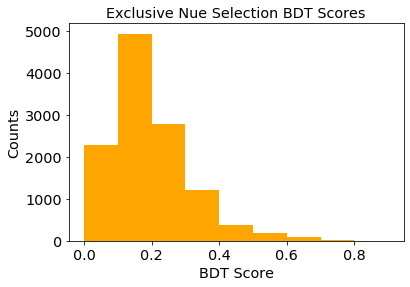

In [26]:
import matplotlib.pyplot as plt
import matplotlib

bins = np.arange(0, 1.0, 0.1)
gen = plt.hist(datasets_bdt['BDT_score'], bins, color='orange')
plt.xlabel("BDT Score")
plt.ylabel("Counts")
plt.title("Exclusive Nue Selection BDT Scores")
plt.show()

In [39]:
df_v = [nue_ext]
for i,df in enumerate(df_v):
    
    df['is_signal'] = np.where( (df.swtrig_pre==1) & (df.true_e>1.0) & (df.true_e <4.0) & (df.reco_e>1.0) & (df.reco_e <4.0)
                                 & (df.nu_pdg==12) & (df.ccnc==0) & (df.nproton>0) & (df.npion==0) & (df.npi0==0)
                                 & (10 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 246)
                                 & (-106 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 106)
                                 & (10 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1026), True, False)
    
    df.loc[ (df['is_signal']== True), 'category' ] = 1

#if energy add & (df.true_e>1.0) & (df.true_e <4.0) & (df.reco_e>1.0) & (df.reco_e <4.0)
#if angle add (df.cosNu_Angle_Numi_Elec_asmuon>-1.0) & (df.cosNu_Angle_Numi_Elec_asmuon <1.0) & (df.cosNu_Angle_Numi_Elec_asmuon_reco>-1.0) & (df.cosNu_Angle_Numi_Elec_asmuon_reco <1.0)
#if lepton mom (df.targetP_asmuon>0.04) & (df.targetP_asmuon <2.0) & (df.targetP_asmuon_reco>0.04) & (df.targetP_asmuon_reco<2.0)

#OLD
#if energy add & (df.true_e>0.04) & (df.true_e <5) & (df.reco_e>0.04) & (df.reco_e <5)
#if lepton mom (df.targetP_asmuon>0.04) & (df.targetP_asmuon <5) & (df.targetP_asmuon_reco>0.04) & (df.targetP_asmuon_reco<5)

In [40]:
NUE_SEL_QUERY = BDT_LOOSE_CUTS
#ENERGY
NUE_SEL_QUERY += ' and reco_e > 1.0 and reco_e < 4.0'
#ANGLE
#NUE_SEL_QUERY += ' and cosNu_Angle_Numi_Elec_asmuon_reco >-1.0 and cosNu_Angle_Numi_Elec_asmuon_reco <1.0'
#LEPTON MOM
#NUE_SEL_QUERY += ' and targetP_asmuon_reco > 0.04 & targetP_asmuon_reco < 2.0'

#OLD
#ENERGY
#NUE_SEL_QUERY += ' and reco_e > 0.04 and reco_e < 5'
#LEPTON MOM
#NUE_SEL_QUERY += ' and targetP_asmuon_reco > 0.04 & targetP_asmuon_reco < 5'

#No true selection here as this is data

if isRun3 == False:
    NUE_SEL_QUERY += ' and BDT_score > 0.55'
elif isRun3 == True:
    NUE_SEL_QUERY += ' and BDT_score > 0.575'    

SIGNAL_NUE_SEL_QUERY = NUE_SEL_QUERY
SIGNAL_NUE_SEL_QUERY += 'and is_signal==True'

In [41]:
#New categories

for i,df in enumerate(df_v):
            
    #df.loc[ (df['is_signal']== True), 'category' ] = 1
    #df["in_fv_query"] = np.where((10 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 246)
    #                             & (-106 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 106)
    #                             & (10 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1026), True, False)
    df["in_fv_query"] = np.where((10 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 246)
                                 & (-106 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 106)
                                 & (10 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1026), True, False)
    df["out_fv_query"] = np.where( (df.swtrig_pre==1)&(df.in_fv_query==False), True, False)
    df.loc[ (df['out_fv_query']== True), 'category' ] = 2
    
    df["numu_CC_Npi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==0) & (df.npi0>=1), True, False)
    df.loc[ (df['numu_CC_Npi0']== True), 'category' ] = 3
    df["numu_CC_0pi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==0) & (df.npi0==0), True, False)
    df.loc[ (df['numu_CC_0pi0']== True), 'category' ] = 4
    
    df["numu_NC_Npi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==1) & (df.npi0>=1), True, False)
    df.loc[ (df['numu_NC_Npi0']== True), 'category' ] = 5
    df["numu_NC_0pi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==1) & (df.npi0==0), True, False)
    df.loc[ (df['numu_NC_Npi0']== True), 'category' ] = 6
    
    df["nuebar_1eNp"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (df.nu_pdg==-12) & (df.ccnc==0) & (df.nproton>0) & (df.npion==0) & (df.npi0==0), True, False)
    df.loc[ (df['nuebar_1eNp']== True), 'category' ] = 7
    df["nue_NC"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==12) & (df.ccnc==1), True, False)
    df.loc[ (df['nue_NC']== True), 'category' ] = 8
    df["nue_CCother"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==12) & (df.ccnc==0) & (df.is_signal==False) , True, False)
    df.loc[ (df['nue_CCother']== True), 'category' ] = 9
    
    # less specific categories 
    df["nue_other"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (df.is_signal==False)& (df.nuebar_1eNp==False) & (df.nue_NC==False) & (df.nue_CCother==False) , True, False)
    df.loc[ (df['nue_other']== True), 'category' ] = 10
    df["numu_Npi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) &  (abs(df.nu_pdg==14)) & (df.npi0>=1), True, False)
    df.loc[ (df['numu_Npi0']== True), 'category' ] = 11
    df["numu_0pi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg==14)) &  (df.npi0==0), True, False)
    df.loc[ (df['numu_0pi0']== True), 'category' ] = 12
    
    df["unknown"] = np.where((df.is_signal==False) & (df.out_fv_query==False) & (df.numu_CC_Npi0==False)
                             & (df.numu_CC_0pi0==False) & (df.numu_NC_Npi0==False) & (df.numu_NC_0pi0==False)
                             & (df.nuebar_1eNp==False) & (df.nue_NC==False) & (df.nue_CCother==False)
                             & (df.nue_other==False) & (df.numu_Npi0==False) & (df.numu_0pi0==False), True, False)
    df.loc[ (df['unknown']== True), 'category' ] = 0

In [42]:
test = np.nansum(nue_ext.query(SIGNAL_NUE_SEL_QUERY)['totweight_data'])
print('total signal events = '+ str(test))
test = np.nansum(nue_ext.query(NUE_SEL_QUERY)['totweight_data'])
print('total signal events = '+ str(test))


total signal events = 0.0
total signal events = 0.0


Now apply the selection, looking at the plots produced with each stage.

This only has the BDT stage, so we can move on to looking at variables. 

No handles with labels found to put in legend.
No handles with labels found to put in legend.


n_events here =  11839
n_events/2 here =  5919.0

1.0
1
{'ext': 0.3089104916683624}
swtrig_pre==1 and nslice==1 and 10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_nu_vtx_sce_z<=1026 and contained_fraction>0.9 and n_showers_contained==1 and n_tracks_contained>0 and trk_energy>0.04 and shr_score<0.3 and shrmoliereavg<15 and shr_tkfit_dedx_Y<7 and trkpid<0.35 and tksh_distance<12 and reco_e > 1.0 and reco_e < 4.0 and BDT_score > 0.575& reco_e <= 4 & reco_e >= 1 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False 
 nue_ext
--------------------------------------
Should not be here...
current_total  0.0
0.000000000000000000000000000000000000000000000000000000000000000000000000000
---------------------------STILL TOGETHER HERE--------------------------------
total after ext 0.0
current_total  0.0
0.000000000000000000000000000000000000000000000000000000000000000000000000000
-----

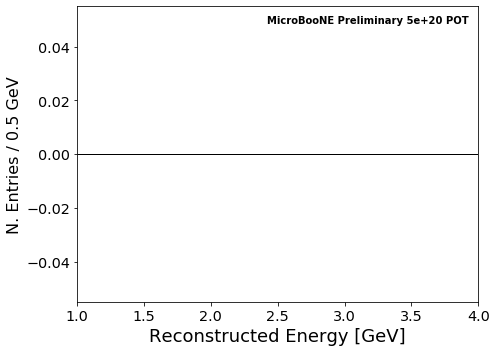

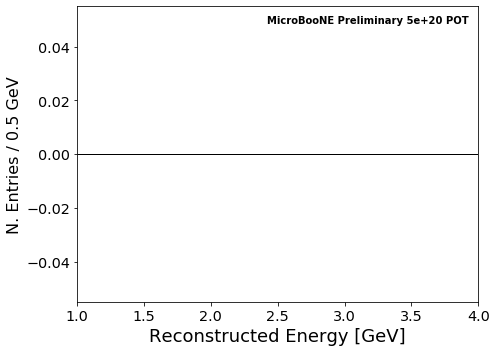

In [43]:
import batch_plotter_alex
import importlib
importlib.reload(batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = nue_ext.shape[0]
print("n_events here = ", n_events)
print("n_events/2 here = ", np.floor(n_events/2))
print("")
#batch_size = 40000
#batch_size = n_events
batch_size = n_events
#n_events = batch_size

varss = []
weightss = []
labss = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
#for i in range(1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = nue_ext.iloc[start:end]

    samples = {
        "nue_ext": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        # This is the data POT we normalize to (comes from the data Ntuples)
        pot =  2e+20 #partial file: 8.885e+19
        # The EXT sample (off beam) is scaled using the triggers (there's no POT in the external sample!)
        extratio  = 5268051/9199232.74 #partial file: 2347745.0/4015961.99
        # We scale down the EXT to account for neutrino occupancy
        scalingEXT = 0.98
    elif isRun3 == True:
        pot =  5e+20
        extratio  = 10363728.0/32878305.25
        scalingEXT = 0.98
    

    # NU
    weights = { #full sample mc = 0.38  
                "ext" : extratio * SPLIT * scalingEXT, #set0 
    }


    my_plotter = batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)


    #Now check on a variable
    #Remember to change the plotter keys between truth and mc
    
    VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Elec_asmuon_reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    #VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',8,(0.0, 2.0),"Lepton Momentum (GeV)"
    
    #OLD
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',10,(0.0, 5.0),"Lepton Momentum (GeV)"
    

    var, weight, label = my_plotter.plot_variable(
        VARIABLE,
        query= NUE_SEL_QUERY,
        #query= "",
        currentsample = "nue_ext",
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "weightSplineTimesTuneTimesPPFX",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:3]
    
    varss.append(var)
    weightss.append(weight)
    labss.append(label)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


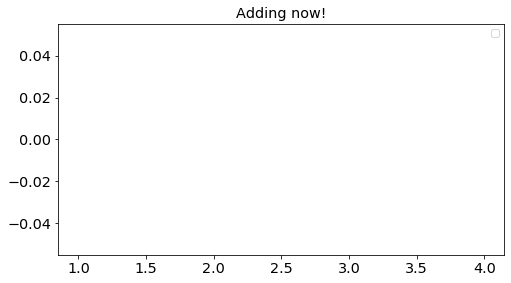

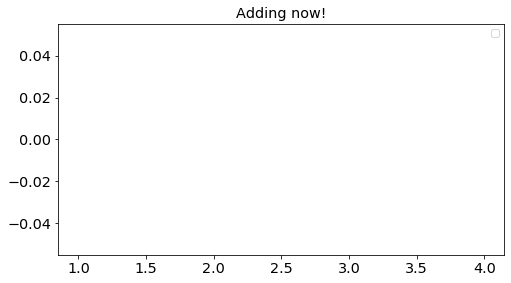

In [44]:
from matplotlib import gridspec

for i in range(int(n_events/batch_size)+1):
#for i in range(1):
    nue_fig = plt.figure(figsize=(8, 7))
    nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
    nue_ax1 = plt.subplot(nue_gs[0])
    #nue_ax1.set_xlim([0, 5])    #TrueE, lepton mom
    #nue_ax1.set_xlim([-1, 1])    #AngleDiff

    nue_stacked = nue_ax1.hist(
                varss[i],
                weights=list(weightss[i]),
                stacked=True,
                label=labss[i],
                bins=BINS,
                range=RANGE)
    
    plt.title("Adding now!")
    plt.legend()


In [45]:
def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    
varss_tot = np.concatenate(varss)
weightss_tot = np.concatenate(weightss)

No handles with labels found to put in legend.


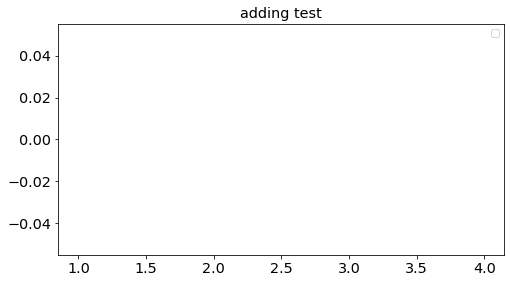

In [46]:
category_labels = {
    1 : r'$\nu_e$ CC0$\pi$Np', 
    2 : r'Out FV',
    3 : r'$\nu_\mu$ CC $\pi^{0}$',
    4 : r'$\nu_\mu$ CC',
    5 : r'$\nu_\mu$ NC $\pi^{0}$',
    6 : r'$\nu_\mu$ NC',
    7 : r'$\bar{\nu}_e$ CC0$\pi$Np',
    8: r'$\nu_e$ NC',
    9: r'$\nu_e$ CC other',
    10 : r'$\nu_e$ / $\overline{\nu_e}$  other', 
    11 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  $\pi^{0}$', 
    12 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other',
    0: r'Unknown'
}


labels = labss


nue_fig = plt.figure(figsize=(8, 7))
nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1 = plt.subplot(nue_gs[0])

#TrueE, LeptonMom
#nue_ax1.set_xlim([0, 5])
#nue_ax1.set_ylim([0, 4])

#AngleDiff
#nue_ax1.set_xlim([-1, 1])
#nue_ax1.set_ylim([0, 0.8])

nue_stacked = nue_ax1.hist(
            varss_tot,
            weights=list(weightss_tot),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)

plt.title("adding test")
plt.legend()

In [47]:
import importlib
import Plotter_Functions_Alex
importlib.reload(Plotter_Functions_Alex)
from Plotter_Functions_Alex import getWantedLists
importlib.reload(getWantedLists)

#print(nue_stacked)

wanted_key = 2

nue_wanted_list = Plotter_Functions_Alex.getWantedLists.getWantedLists(wanted_key, nue_stacked)

print(nue_wanted_list)

[]

SUMS
[]
[]

Wanted List:
[]

[]


In [48]:
vars_tot_df = pd.DataFrame.from_dict(varss_tot)
weights_tot_df = pd.DataFrame.from_dict(weightss_tot)

#ending = "Sept19_TrueAngleDiff"
#ending = "Sept19_TrueLeptonMom"

if isRun3 == False:
    ######full trueE
    #vars_tot_df.to_csv('nue_ext_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    #weights_tot_df.to_csv('nue_ext_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    ########angleDiff
    #vars_tot_df.to_csv('nue_ext_varstot_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    #weights_tot_df.to_csv('nue_ext_weightstot_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    ########leptonMom
    vars_tot_df.to_csv('nue_ext_varstot_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    weights_tot_df.to_csv('nue_ext_weightstot_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
elif isRun3 == True:
    ######full trueE
    vars_tot_df.to_csv('nue_ext_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    weights_tot_df.to_csv('nue_ext_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    ########angleDiff
    #vars_tot_df.to_csv('nue_ext_varstot_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    #weights_tot_df.to_csv('nue_ext_weightstot_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    ########leptonMom
    #vars_tot_df.to_csv('nue_ext_varstot_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    #weights_tot_df.to_csv('nue_ext_weightstot_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')


### Stat Errs

[0. 0. 0. 0. 0. 0.]


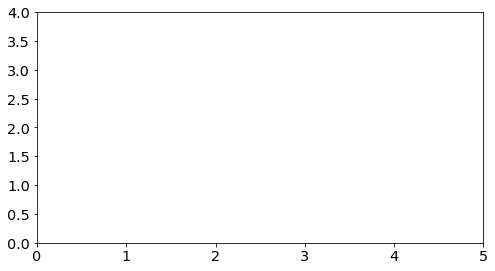

In [49]:
#A poisson uncertainty is assumed for beam off (see krishan's thesis p.182)

nue_fig = plt.figure(figsize=(8, 7))
nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1 = plt.subplot(nue_gs[0])

#TrueE, LeptonMom
nue_ax1.set_xlim([0, 5])
nue_ax1.set_ylim([0, 4])


nue_stacked = nue_ax1.hist(
            varss_tot,
            weights=list(weightss_tot),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)


nue_ext_stat_errs = np.sqrt(nue_stacked[0])

print(nue_ext_stat_errs)

In [50]:
if isRun3 == False:
    """
    np.savetxt("nue_ext_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               nue_ext_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    #np.savetxt("nue_ext_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_07Jul.csv", 
    #           nue_ext_stat_errs_selected,
    #           delimiter =", ", 
    #           fmt ='% s')
    """
    
    """
    #########################
    #####angleDiff###########
    ##########################

    np.savetxt("nue_ext_stat_errs_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               nue_ext_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    #np.savetxt("nue_nue_stat_errs_selected_full_catsel_nopions_angleDiff_usingSelection.csv", 
    #           nue_nue_stat_errs_selected,
    #           delimiter =", ", 
    #           fmt ='% s')
    """
    
    
    #########################
    #####leptonMom###########
    ##########################

    np.savetxt("nue_ext_stat_errs_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               nue_ext_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    #np.savetxt("nue_nue_stat_errs_selected_full_catsel_nopions_leptonMom_usingSelection.csv", 
    #           nue_nue_stat_errs_selected,
    #           delimiter =", ", 
    #           fmt ='% s')
    
elif isRun3 == True:
    
    np.savetxt("nue_ext_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               nue_ext_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    #np.savetxt("nue_ext_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_07Jul.csv", 
    #           nue_ext_stat_errs_selected,
    #           delimiter =", ", 
    #           fmt ='% s')
    

    """
    #########################
    #####angleDiff###########
    ##########################

    np.savetxt("nue_ext_stat_errs_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               nue_ext_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    #np.savetxt("nue_nue_stat_errs_selected_full_catsel_nopions_angleDiff_usingSelection_run3.csv", 
    #           nue_nue_stat_errs_selected,
    #           delimiter =", ", 
    #           fmt ='% s')
    
    """
    """
    #########################
    #####leptonMom###########
    ##########################

    np.savetxt("nue_ext_stat_errs_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               nue_ext_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    #np.savetxt("nue_nue_stat_errs_selected_full_catsel_nopions_leptonMom_usingSelection_run3.csv", 
    #           nue_nue_stat_errs_selected,
    #           delimiter =", ", 
    #           fmt ='% s')
    """
        

## NUE_DATA SAMPLE

In [5]:
# Name of the TTree in the PeLEE Ntuples
tree = "NeutrinoSelectionFilter"

#cut samples
#BNB  = '/pre_samp/neutrinoselection_filt_run1_beamon_beamgood' +ls.APPEND
#full sample
if isRun3 == False:
    BNB  = '/neutrinoselection_filt_run1_beamon_beamgood' +ls.APPEND
elif isRun3 == True:
    BNB  = '/neutrinoselection_filt_run3b_beamon_beamgood' +ls.APPEND    

#actually fetch datasets
nue_data = uproot.open(ls.ntuple_path+BNB+".root")[ls.fold][tree]

# Define a list that contains the data sets
uproot_v = [nue_data]

nue_variables = ["run", "sub", "evt", "swtrig_pre",              
             "trk_score_v", "topological_score", "shr_score",
            "reco_nu_vtx_sce_x", "reco_nu_vtx_sce_y", "reco_nu_vtx_sce_z", "shr_tkfit_npoints",
            "CosmicIPAll3D", "hits_ratio", "contained_fraction",
            "shrmoliereavg", "shr_tkfit_dedx_U","shr_tkfit_dedx_V","shr_tkfit_dedx_Y",
            "shr_energy", "category", "slnunhits", "slnhits", "flash_time", "nu_pdg", "ccnc",
             "selected", "nslice", "shr_distance", "shr_theta", "shr_phi", "npi0", "proton_e", "elec_e",
            "shr_tkfit_nhits_U", "shr_tkfit_nhits_V", "shr_tkfit_nhits_Y", "n_tracks_contained",
            "n_showers", "n_tracks", "shr_energy_cali", "n_showers_contained", "tksh_distance", "tksh_angle",
             "trkshrhitdist2", 'shrsubclusters0', 'shrsubclusters1', 'shrsubclusters2',
             "shr_energy_tot_cali", 'trk_energy_tot', 'nproton', 'npion', 'trk_energy', 'shr_px', 'shr_py', 'shr_pz']


# These are examples of variables present in MC samples only
nue_varMC = ["nu_e", "true_pt","true_pt_visible","true_p","true_p_visible","true_nu_vtx_t","true_nu_vtx_x","true_nu_vtx_y","true_nu_vtx_z","true_nu_vtx_sce_x","true_nu_vtx_sce_y","true_nu_vtx_sce_z\
","true_nu_px","true_nu_py","true_nu_pz", "mc_pdg", "mc_px", "mc_py", "mc_pz"]

#make the list unique (sometimes you repeat the variable name in the list, this takes care of that)
nue_variables = list(set(nue_variables))
print(nue_variables)



# These weights are needed to correctly calculate the CV for the MC    
WEIGHTS     = ["weightSpline","weightTune","weightSplineTimesTune","ppfx_cv"]
# These weights are needed to calculate the Flux, GENIE and Geant4 Systematics. 
# For NuMI weightsFlux should always be 1 (cause that's relevant for BNB).
SYSTEMATICS = ['weightsFlux','weightsGenie','weightsReint'] 
PPFX        = ['weightsPPFX'] 



WEIGHTSLEE = ["weightSpline","weightTune","weightSplineTimesTune", "leeweight"]#, "weightsGenie", "weightsFlux", "weightsReint"]
MCFVARS    = ["mcf_nu_e","mcf_lep_e","mcf_actvol","mcf_nmm","mcf_nmp","mcf_nem","mcf_nep","mcf_np0","mcf_npp",
              "mcf_npm","mcf_mcshr_elec_etot","mcf_pass_ccpi0","mcf_pass_ncpi0",
              "mcf_pass_ccnopi","mcf_pass_ncnopi","mcf_pass_cccpi","mcf_pass_nccpi"]

nue_data = nue_data.pandas.df(nue_variables + nue_varMC , flatten=False)

['n_showers_contained', 'shrsubclusters1', 'contained_fraction', 'reco_nu_vtx_sce_x', 'reco_nu_vtx_sce_y', 'shr_tkfit_dedx_V', 'trk_energy', 'shr_px', 'swtrig_pre', 'nproton', 'selected', 'hits_ratio', 'elec_e', 'npion', 'reco_nu_vtx_sce_z', 'npi0', 'shr_theta', 'trkshrhitdist2', 'shr_energy_tot_cali', 'shr_score', 'trk_energy_tot', 'shr_py', 'topological_score', 'slnunhits', 'slnhits', 'nslice', 'nu_pdg', 'shr_energy', 'shrmoliereavg', 'sub', 'shrsubclusters0', 'CosmicIPAll3D', 'shrsubclusters2', 'shr_phi', 'shr_distance', 'run', 'n_tracks_contained', 'shr_tkfit_nhits_V', 'n_showers', 'shr_tkfit_nhits_Y', 'trk_score_v', 'shr_tkfit_nhits_U', 'shr_pz', 'shr_energy_cali', 'tksh_distance', 'ccnc', 'evt', 'proton_e', 'shr_tkfit_npoints', 'tksh_angle', 'flash_time', 'category', 'shr_tkfit_dedx_U', 'shr_tkfit_dedx_Y', 'n_tracks']


In [6]:
nue_data['pot_scale'] = [1 for x in range(len(nue_data))]

In [7]:
nue_data['totweight_data'] = nue_data['pot_scale']

In [8]:
from scipy.spatial.transform import Rotation as R
from numpy import arccos, array
from numpy.linalg import norm

# Note: returns angle in radians
def theta(v, w): return arccos(v.dot(w)/(norm(v)*norm(w)))* 180 / 3.1415926

def GetNuMIAngle( px,  py,  pz):
    r = R.from_matrix([[0.92103853804025681562   , 0.022713504803924120662, 0.38880857519374290021  ],
                       [4.6254001262154668408e-05, 0.99829162468141474651 , -0.058427989452906302359],
                       [-0.38947144863934973769  , 0.053832413938664107345, 0.91946400794392302291  ]])  
    r = r.inv()
    beamCoords = r.apply([px,  py,  pz])
    beamDir    = [0,0,1]
    #print(theta(beamCoords,beamDir))
    return theta(beamCoords,beamDir)

def GetNuMIAnglePol( phiBNB,  thetaBNB):
    px = math.sin(thetaBNB)*math.cos(phiBNB)
    py = math.sin(thetaBNB)*math.sin(phiBNB)
    pz = math.cos(thetaBNB)
    return GetNuMIAngle( px,  py,  pz)

In [9]:
def vectorFromNuMITarget(vtxX,  vtxY, vtxZ):
    numiTarget      = np.array([-31387.58422, -3316.402543, -60100.2414])
    nuInteraction   = np.array([vtxX,  vtxY, vtxZ])
    directionVector = nuInteraction - numiTarget
    return directionVector

def angleFromNuMITarget(vtxX,  vtxY, vtxZ, thetaBNB, phiBNB):
    v1 = vectorFromNuMITarget(vtxX,  vtxY, vtxZ)  
    norm = np.linalg.norm(v1)
    v1 = v1/norm
    v2 = [np.cos(phiBNB)*np.sin(thetaBNB),np.sin(phiBNB)*np.sin(thetaBNB), np.cos(thetaBNB) ]
    dot_product = np.dot(v1, v2)
    angle = np.arccos(dot_product)
    return angle #dot_product # angle*180/3.14159265



angleFromNuMITarget(1,1,1,1.4,3.)

1.8690124908136228

In [10]:
#RECO VARIABLE
#This assumes the electron to be the leading shower
df_v = [nue_data]

import time
s = time.time()

for i,df in enumerate(df_v):
    df['targetP_asmuon_reco']     = np.sqrt(df['shr_px']*df['shr_px'] + df['shr_py']*df['shr_py'] + df['shr_pz']*df['shr_pz'])
    #df['targetPt_asmuon_reco']    = np.sqrt(df['shr_px']*df['shr_px'] + df['shr_py']*df['shr_py'])
    #df['targetTheta_asmuon_reco'] = np.arccos(df['shr_pz']/df['targetP_asmuon_reco'] )
    #df['targetPhi_asmuon_reco']   = np.arctan2(df['shr_py'],df['shr_px'])
    df['nu_Angle_Numi_Elec_asmuon_reco'] = df.apply( lambda x: angleFromNuMITarget(x['reco_nu_vtx_sce_x'],x['reco_nu_vtx_sce_y'],x['reco_nu_vtx_sce_z'], x['shr_theta'],x['shr_phi']) , axis=1)
    df['cosNu_Angle_Numi_Elec_asmuon_reco'] = np.cos(df['nu_Angle_Numi_Elec_asmuon_reco'])
    
#just prints out the time this cell takes
s2 = time.time()
print ("time to run: ",s2-s)

time to run:  40.28246283531189


In [11]:
#TRUTH VARIABLE

import time
s = time.time()

for i,df in enumerate(df_v):
    df["elec_px_asmuon"] = np.nan
    df["elec_py_asmuon"] = np.nan
    df["elec_pz_asmuon"] = np.nan
    for j in range(len(df["mc_pdg"])):
        if (len(df["mc_pdg"].iloc[j]) !=0):
            pdg_vector = df["mc_pdg"].iloc[j][0]
            px_vector = df["mc_px"].iloc[j]
            py_vector = df["mc_py"].iloc[j]
            pz_vector = df["mc_pz"].iloc[j]
            result = np.where(pdg_vector==11)[0]
            if np.size(result):
                df.loc[j, "elec_px_asmuon"] = px_vector[result][0]
                df.loc[j, "elec_py_asmuon"] = py_vector[result][0]
                df.loc[j, "elec_pz_asmuon"] = pz_vector[result][0]

    print(df["elec_px_asmuon"])
    
#just prints out the time this cell takes
s2 = time.time()
print ("time to run: ",s2-s)

entry
0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
1104344   NaN
1104345   NaN
1104346   NaN
1104347   NaN
1104348   NaN
Name: elec_px_asmuon, Length: 1104349, dtype: float64
time to run:  4.390550851821899


In [12]:
#TRUTH_VARIABLE

for i,df in enumerate(df_v):
    df['targetP_asmuon']     = np.sqrt(df['elec_px_asmuon']*df['elec_px_asmuon'] + df['elec_py_asmuon']*df['elec_py_asmuon'] + df['elec_pz_asmuon']*df['elec_pz_asmuon'])
    df['targetPt_asmuon']    = np.sqrt(df['elec_px_asmuon']*df['elec_px_asmuon'] + df['elec_py_asmuon']*df['elec_py_asmuon'])
    df['targetTheta_asmuon'] = np.arccos(df['elec_pz_asmuon']/df['targetP_asmuon'] )
    df['targetPhi_asmuon']   = np.arctan2(df['elec_py_asmuon'],df['elec_px_asmuon'])
    df['nu_Angle_Numi_Elec_asmuon'] = df.apply( lambda x: angleFromNuMITarget(x['true_nu_vtx_sce_x'],x['true_nu_vtx_sce_y'],x['true_nu_vtx_sce_z'], x['targetTheta_asmuon'],x['targetPhi_asmuon']) , axis=1)
    df['cosNu_Angle_Numi_Elec_asmuon'] = np.cos(df['nu_Angle_Numi_Elec_asmuon'])

In [13]:
#This cell is about creating some new variables from the ones we have

import time
s = time.time()

#use all samples
df_v = [nue_data]


puppa1 = 'trk_score_v'


for i,df in enumerate(df_v):
    up = uproot_v[i]
    trk_theta_proton_v  = up.array('trk_theta_v')
    trk_phi_proton_v    = up.array('trk_phi_v')
    trk_score_v         = up.array('trk_score_v')    
    trk_llr_pid_v       = up.array('trk_llr_pid_score_v')
    trk_energy_proton_v = up.array('trk_energy_proton_v')
    trk_calo_energy_y_v = up.array('trk_calo_energy_y_v')
    trk_id              = up.array('trk_id')-1 # I think we need this -1 to get the right result
    c                   = up.array('n_tracks_contained')
    trk_theta_proton_v  = up.array('trk_theta_v')
    trk_phi_proton_v    = up.array('trk_phi_v')

    trk_theta_proton_sel  = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_theta_proton_v,trk_id)])
    trk_phi_proton_sel    = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_phi_proton_v,trk_id)])
    df['protontheta']  = trk_theta_proton_sel
    df['protonphi']    = trk_phi_proton_sel

    #print(trk_score_v.shape, len(trk_llr_pid_v))

    #dummy variables
    puppa_obj = []
    puppa_trk = []
    puppa_shw = []
    puppa_prt = [] 
    puppa_mu  = []
    
    for pidv, p in zip(trk_llr_pid_v,trk_score_v):
        N_obj         = 0
        N_recoTrks    = 0
        N_recoShowers = 0
        N_recoProtons = 0
        N_recoMuons   = 0
        if len(pidv) > 0:
            passPIDCut = (pidv <= 0)
            passTrkCut = (p    >= 0)
            protonCut  = (passPIDCut & passTrkCut) 
            muonCut    = (np.logical_not(passPIDCut) & passTrkCut) 
            N_obj         = len(passTrkCut)
            N_recoTrks    = np.count_nonzero(passTrkCut)
            N_recoShowers = np.count_nonzero(np.logical_not(passTrkCut))
            N_recoProtons = np.count_nonzero(protonCut)
            N_recoMuons   = np.count_nonzero(muonCut)
        puppa_obj.append(N_obj)
        puppa_trk.append(N_recoTrks)
        puppa_shw.append(N_recoShowers)    
        puppa_prt.append(N_recoProtons)
        puppa_mu .append(N_recoMuons)

    df['N_obj']           = puppa_obj
    df['N_recoTrks']      = puppa_trk
    df['N_recoShowers']   = puppa_shw
    df['N_recoProtons']   = puppa_prt
    df['N_recoMuons']     = puppa_mu
    
    trk_llr_pid_v_sel     = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_llr_pid_v,trk_id)])
    trk_energy_proton_sel = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_energy_proton_v,trk_id)])
    trk_calo_energy_y_sel = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_calo_energy_y_v,trk_id)])
    trk_theta_proton_sel  = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_theta_proton_v,trk_id)])
    trk_phi_proton_sel    = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_phi_proton_v,trk_id)])

    df['trkpid']          = trk_llr_pid_v_sel
    df['protonenergy']    = trk_energy_proton_sel
    df['trackcaloenergy'] = trk_calo_energy_y_sel
    df['subcluster']      = df['shrsubclusters0'] + df['shrsubclusters1'] + df['shrsubclusters2']

    df['protontheta']  = trk_theta_proton_sel
    df['protonphi']    = trk_phi_proton_sel

#calculate angles wrt NuMI reference frame
for i,df in enumerate(df_v):
    #df['shr_numi_Angle']    = df.apply( lambda x: GetNuMIAngle(x['shr_px'],x['shr_py'],x['shr_pz']) , axis=1)
    df['proton_numi_Angle'] = df.apply( lambda x: GetNuMIAnglePol(x['protonphi'],x['protontheta']) , axis=1)

    
#just prints out the time this cell takes
s2 = time.time()
print ("time to run: ",s2-s)

time to run:  97.95412564277649


In [14]:
for i,df in enumerate(df_v):
    df.loc[df['shrmoliereavg'].isna(),'secondshower_Y_dot'] = 9999.
    df.loc[df['secondshower_Y_dot'].isna(),'secondshower_Y_dot'] = 0.0 

In [15]:
df_v = [nue_data]
for i,df in enumerate(df_v):
    df.loc[:,'shr_tkfit_dedx_max'] = df['shr_tkfit_dedx_Y']
    df.loc[(df['shr_tkfit_nhits_U']>df['shr_tkfit_nhits_Y']),'shr_tkfit_dedx_max'] = df['shr_tkfit_dedx_U']
    df.loc[(df['shr_tkfit_nhits_V']>df['shr_tkfit_nhits_Y']) & (df['shr_tkfit_nhits_V']>df['shr_tkfit_nhits_U']),'shr_tkfit_dedx_max'] = df['shr_tkfit_dedx_V']

In [16]:
INTERCEPT = 0.0
SLOPE = 0.83

df_v = [nue_data]
# define some energy-related variables
for i,df in enumerate(df_v):
    df["reco_e"] = (df["shr_energy_tot_cali"] + INTERCEPT) / SLOPE + df["trk_energy_tot"]
    df["true_e"] = df["elec_e"]+ df["proton_e"]

# and a way to filter out data
for i,df in enumerate(df_v):
    #df["bnbdata"] = np.zeros_like(df["shr_energy"])
    df["extdata"] = np.zeros_like(df["shr_energy"])
nue_data["bnbdata"] = np.ones_like(nue_data["shr_energy"])


In [17]:
#for i,df in enumerate(df_v):

#    df['is_signal'] = np.where( (df.swtrig_pre==1) & (df.true_e>0.04) & (df.true_e <5) & (df.reco_e>0.04) & (df.reco_e <5) & (df.category==11)
#                                 & (df.nu_pdg==12) & (df.ccnc==0) & (df.nproton>0) & (df.npion==0) & (df.npi0==0)
#                                 & (-1.55 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 254.8)
#                                 & (-116.5 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 116.5)
#                                 & (0 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1036.8), True, False)
         

In [18]:
# add back the cosmic category, for background only
#df_v = [nue_data]
#for i,df in enumerate(df_v):
#    df.loc[(df['category']!=1)&(df['category']!=10)&(df['category']!=11)&(df['category']!=111)&(df['slnunhits']/df['slnhits']<0.2), 'category'] = 4

In [19]:
#Define signal catagories

#nue_data["is_signal"] = nue_data["category"] == 11

Set up complete. Now on to BDT.

In [20]:
reco_in_fv_query = "10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_nu_vtx_sce_z<=1026"


BDT_PRE_QUERY = 'swtrig_pre==1 and nslice==1'
BDT_PRE_QUERY += ' and ' + reco_in_fv_query
BDT_PRE_QUERY +=' and contained_fraction>0.9'
BDT_PRE_QUERY += ' and n_showers_contained==1'
BDT_PRE_QUERY += ' and n_tracks_contained>0'
BDT_PRE_QUERY += ' and trk_energy>0.04' 
    
BDT_LOOSE_CUTS = BDT_PRE_QUERY
BDT_LOOSE_CUTS +=' and shr_score<0.3'
BDT_LOOSE_CUTS += ' and shrmoliereavg<15'
BDT_LOOSE_CUTS += ' and shr_tkfit_dedx_Y<7'
BDT_LOOSE_CUTS += ' and trkpid<0.35'
BDT_LOOSE_CUTS += ' and tksh_distance<12'

In [21]:
# load bdt model 
bdt_model = xgb.Booster({'nthread': 4})

if isRun3 == False:
    bdt_model.load_model('/home/alex/NuMI/bdt_FHC_may2022_subset.model')
elif isRun3 == True:
    bdt_model.load_model('/home/alex/NuMI/bdt_RHC_may2022_subset.model')
    

In [22]:
# NOW, apply the model to real data for data/MC comparisons

varlist = [
    "shr_score", "shrmoliereavg", "trkpid",
    "n_showers_contained", "shr_tkfit_dedx_Y", "tksh_distance",
    "tksh_angle", "subcluster", "trkshrhitdist2"]
#The training variables?

datasetlist = [nue_data]

for df in datasetlist:
    for column in varlist:
        df.loc[(df[column] < -1.0e37) | (df[column] > 1.0e37), column] = np.nan
        
    # create testing dmatrix 
    df_test = xgb.DMatrix(data=df[varlist])
    
    # apply the bdt selection
    preds = bdt_model.predict(df_test)
    
    # add columns for plotting 
    df['BDT_score'] = preds
    print(df.shape)

(1104349, 107)


In [23]:
datasets_bdt = nue_data

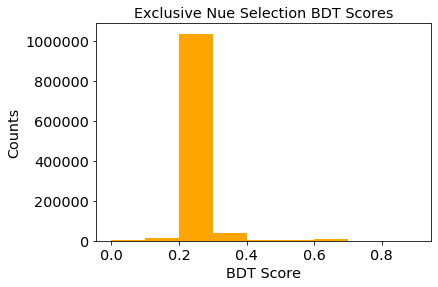

In [24]:
import matplotlib.pyplot as plt
import matplotlib

bins = np.arange(0, 1.0, 0.1)
gen = plt.hist(datasets_bdt['BDT_score'], bins, color='orange')
plt.xlabel("BDT Score")
plt.ylabel("Counts")
plt.title("Exclusive Nue Selection BDT Scores")
plt.show()

In [34]:
df_v = [nue_data]
for i,df in enumerate(df_v):
    
    df['is_signal'] = np.where( (df.swtrig_pre==1) &  (df.targetP_asmuon>0.04) & (df.targetP_asmuon <2.0) & (df.targetP_asmuon_reco>0.04) & (df.targetP_asmuon_reco<2.0)
                                 & (df.nu_pdg==12) & (df.ccnc==0) & (df.nproton>0) & (df.npion==0) & (df.npi0==0)
                                 & (10 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 246)
                                 & (-106 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 106)
                                 & (10 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1026), True, False)
    
    df.loc[ (df['is_signal']== True), 'category' ] = 1

#if energy add & (df.true_e>1.0) & (df.true_e <4.0) & (df.reco_e>1.0) & (df.reco_e <4.0)
#if angle add (df.cosNu_Angle_Numi_Elec_asmuon>-1.0) & (df.cosNu_Angle_Numi_Elec_asmuon <1.0) & (df.cosNu_Angle_Numi_Elec_asmuon_reco>-1.0) & (df.cosNu_Angle_Numi_Elec_asmuon_reco <1.0)
#if lepton mom (df.targetP_asmuon>0.04) & (df.targetP_asmuon <2.0) & (df.targetP_asmuon_reco>0.04) & (df.targetP_asmuon_reco<2.0)

#OLD
#if energy add & (df.true_e>0.04) & (df.true_e <5) & (df.reco_e>0.04) & (df.reco_e <5)
#if lepton mom (df.targetP_asmuon>0.04) & (df.targetP_asmuon <5) & (df.targetP_asmuon_reco>0.04) & (df.targetP_asmuon_reco<5)

In [35]:
NUE_SEL_QUERY = BDT_LOOSE_CUTS
#ENERGY
#NUE_SEL_QUERY += ' and reco_e > 1.0 and reco_e < 4.0'
#ANGLE
#NUE_SEL_QUERY += ' and cosNu_Angle_Numi_Elec_asmuon_reco >-1.0 and cosNu_Angle_Numi_Elec_asmuon_reco <1.0'
#LEPTON MOM
NUE_SEL_QUERY += ' and targetP_asmuon_reco > 0.04 & targetP_asmuon_reco < 2.0'

#OLD
#ENERGY
#NUE_SEL_QUERY += ' and reco_e > 0.04 and reco_e < 5'
#LEPTON MOM
#NUE_SEL_QUERY += ' and targetP_asmuon_reco > 0.04 & targetP_asmuon_reco < 5'

#No truth selection as this data

if isRun3 == False:
    NUE_SEL_QUERY += ' and BDT_score > 0.55'
elif isRun3 == True:
    NUE_SEL_QUERY += ' and BDT_score > 0.575'    

SIGNAL_NUE_SEL_QUERY = NUE_SEL_QUERY
SIGNAL_NUE_SEL_QUERY += 'and is_signal==True'

In [36]:
#New categories

for i,df in enumerate(df_v):
            
    #df.loc[ (df['is_signal']== True), 'category' ] = 1
    #df["in_fv_query"] = np.where((10 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 246)
    #                             & (-106 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 106)
    #                             & (10 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1026), True, False)
    df["in_fv_query"] = np.where((10 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 246)
                                 & (-106 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 106)
                                 & (10 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1026), True, False)
    df["out_fv_query"] = np.where((df.swtrig_pre==1)& (df.in_fv_query==False), True, False)
    df.loc[ (df['out_fv_query']== True), 'category' ] = 2
    
    df["numu_CC_Npi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==0) & (df.npi0>=1), True, False)
    df.loc[ (df['numu_CC_Npi0']== True), 'category' ] = 3
    df["numu_CC_0pi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==0) & (df.npi0==0), True, False)
    df.loc[ (df['numu_CC_0pi0']== True), 'category' ] = 4
    
    df["numu_NC_Npi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==1) & (df.npi0>=1), True, False)
    df.loc[ (df['numu_NC_Npi0']== True), 'category' ] = 5
    df["numu_NC_0pi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==1) & (df.npi0==0), True, False)
    df.loc[ (df['numu_NC_Npi0']== True), 'category' ] = 6
    
    df["nuebar_1eNp"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (df.nu_pdg==-12) & (df.ccnc==0) & (df.nproton>0) & (df.npion==0) & (df.npi0==0), True, False)
    df.loc[ (df['nuebar_1eNp']== True), 'category' ] = 7
    df["nue_NC"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==12) & (df.ccnc==1), True, False)
    df.loc[ (df['nue_NC']== True), 'category' ] = 8
    df["nue_CCother"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==12) & (df.ccnc==0) & (df.is_signal==False) , True, False)
    df.loc[ (df['nue_CCother']== True), 'category' ] = 9
    
    # less specific categories 
    df["nue_other"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (df.is_signal==False)& (df.nuebar_1eNp==False) & (df.nue_NC==False) & (df.nue_CCother==False) , True, False)
    df.loc[ (df['nue_other']== True), 'category' ] = 10
    df["numu_Npi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) &  (abs(df.nu_pdg==14)) & (df.npi0>=1), True, False)
    df.loc[ (df['numu_Npi0']== True), 'category' ] = 11
    df["numu_0pi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg==14)) &  (df.npi0==0), True, False)
    df.loc[ (df['numu_0pi0']== True), 'category' ] = 12
    
    df["unknown"] = np.where((df.is_signal==False) & (df.out_fv_query==False) & (df.numu_CC_Npi0==False)
                             & (df.numu_CC_0pi0==False) & (df.numu_NC_Npi0==False) & (df.numu_NC_0pi0==False)
                             & (df.nuebar_1eNp==False) & (df.nue_NC==False) & (df.nue_CCother==False)
                             & (df.nue_other==False) & (df.numu_Npi0==False) & (df.numu_0pi0==False), True, False)
    df.loc[ (df['unknown']== True), 'category' ] = 0

In [37]:
test = np.nansum(nue_data.query(SIGNAL_NUE_SEL_QUERY)['totweight_data'])
print('total signal events = '+ str(test))
test = np.nansum(nue_data.query(NUE_SEL_QUERY)['totweight_data'])
print('total signal events = '+ str(test))

total signal events = 0
total signal events = 162


Now apply the selection, looking at the plots produced with each stage.

This only has the BDT stage, so we can move on to looking at variables. 

No handles with labels found to put in legend.


n_events here =  1104349
n_events/2 here =  552174.0

1.0
1
swtrig_pre==1 and nslice==1 and 10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_nu_vtx_sce_z<=1026 and contained_fraction>0.9 and n_showers_contained==1 and n_tracks_contained>0 and trk_energy>0.04 and shr_score<0.3 and shrmoliereavg<15 and shr_tkfit_dedx_Y<7 and trkpid<0.35 and tksh_distance<12 and targetP_asmuon_reco > 0.04 & targetP_asmuon_reco < 2.0 and BDT_score > 0.575& targetP_asmuon_reco <= 2 & targetP_asmuon_reco >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False 
 nue_data
--------------------------------------
Should not be here...
current_total  0.0
0.000000000000000000000000000000000000000000000000000000000000000000000000000
---------------------------STILL TOGETHER HERE--------------------------------
current_total  0.0
0.0000000000000000000000000000000000000000000000000000000000000000000000000

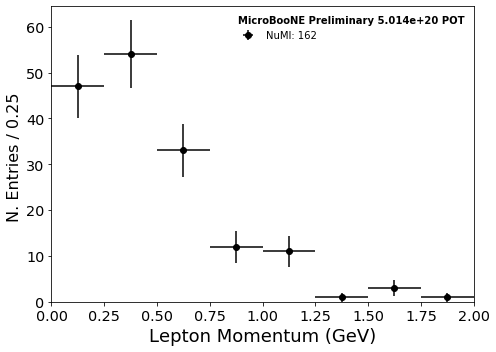

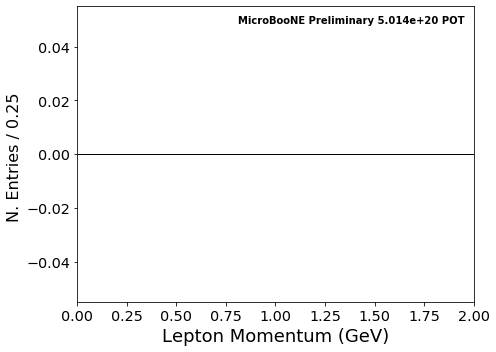

In [38]:
import batch_plotter_alex
import importlib
importlib.reload(batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = nue_data.shape[0]
print("n_events here = ", n_events)
print("n_events/2 here = ", np.floor(n_events/2))
print("")
#batch_size = 40000
batch_size = n_events
#batch_size = int(np.floor(n_events/5))
#n_events = batch_size

varss = []
weightss = []
labss = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
#for i in range(1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = nue_data.iloc[start:end]

    samples = {
        "nue_data": sample_set 
    }

    if isRun3 == False:
        # This is the data POT we normalize to (comes from the data Ntuples)
        pot =  2e+20 
    elif isRun3 == True:
        pot =  5.014e+20 
        
    weights = {  
                }
    
    my_plotter = batch_plotter_alex.Plotter(samples, weights, pot=pot)


    #Now check on a variable
    #Remember to change the plotter keys between truth and mc

    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Elec_asmuon_reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',8,(0.0, 2.0),"Lepton Momentum (GeV)"
    
    #OLD
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',10,(0.0, 5.0),"Lepton Momentum (GeV)"
    

    var, weight, label = my_plotter.plot_variable(
        VARIABLE,
        query= NUE_SEL_QUERY,
        #query= "",
        currentsample = "nue_data",
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "weightSplineTimesTuneTimesPPFX",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:3]
    
    varss.append(var)
    weightss.append(weight)
    labss.append(label)

[array([47, 54, 33, 12, 11,  1,  3,  1]), array([0, 0, 0, 0, 0, 0, 0, 0])]


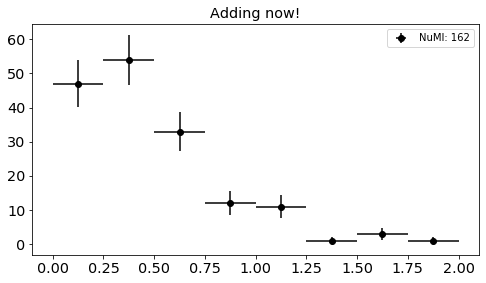

In [41]:
from matplotlib import gridspec

#for i in range(int(n_events/batch_size)+1):
for i in range(1):
    nue_fig = plt.figure(figsize=(8, 7))
    nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
    nue_ax1 = plt.subplot(nue_gs[0])
    #current_bincenters =  np.arange(1.25, 4.25, 0.5)  #energy
    #current_bin_size = 0.5
    #current_bincenters =  np.arange(-0.9, 1.1, 0.2)  #Angle
    #current_bin_size = 0.25
    current_bincenters =  np.arange(0.125, 2.125, 0.25)  #lepton
    current_bin_size = 0.25
    
    print(varss)
    
    nue_ax1.errorbar(
                current_bincenters,
                varss[i],
                xerr=current_bin_size/2,
                yerr=weightss[i],
                fmt='ko',
                label="NuMI: %i" % sum(varss[i]) if sum(varss[i]) else "")
    
    plt.title("Adding now!")
    plt.legend()

In [42]:
def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    
varss_tot = sum(varss)
print(weightss[0][0])
#sum errors? will need to change if splitting data
weightss_tot = weightss[0][0]

[6.8556546  7.34846923 5.74456265 3.46410162 3.31662479 1.
 1.73205081 1.        ]


[47 54 33 12 11  1  3  1]


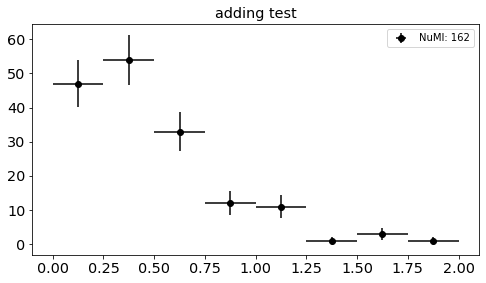

In [43]:
category_labels = {
    1 : r'$\nu_e$ CC0$\pi$Np', 
    2 : r'Out FV',
    3 : r'$\nu_\mu$ CC $\pi^{0}$',
    4 : r'$\nu_\mu$ CC',
    5 : r'$\nu_\mu$ NC $\pi^{0}$',
    6 : r'$\nu_\mu$ NC',
    7 : r'$\bar{\nu}_e$ CC0$\pi$Np',
    8: r'$\nu_e$ NC',
    9: r'$\nu_e$ CC other',
    10 : r'$\nu_e$ / $\overline{\nu_e}$  other', 
    11 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  $\pi^{0}$', 
    12 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other',
    0: r'Unknown'
}


labels = labss

nue_fig = plt.figure(figsize=(8, 7))
nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1 = plt.subplot(nue_gs[0])

#TrueE, LeptonMom
#nue_ax1.set_xlim([0, 5])
#nue_ax1.set_ylim([0, 150])

#AngleDiff
#nue_ax1.set_xlim([-1, 1])
#nue_ax1.set_ylim([0, 33])

print(varss_tot)

nue_ax1.errorbar(
            current_bincenters,
            varss_tot,
            xerr=current_bin_size/2,
            yerr=weightss_tot,
            fmt='ko',
            label="NuMI: %i" % sum(varss_tot) if sum(varss_tot) else "")


plt.title("adding test")
plt.legend()

In [44]:
vars_tot_df = pd.DataFrame.from_dict(varss_tot)
weights_tot_df = pd.DataFrame.from_dict(weightss_tot)

if isRun3 == False:
    ######full trueE
    vars_tot_df.to_csv('nue_data_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    weights_tot_df.to_csv('nue_data_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    ########angleDiff
    #vars_tot_df.to_csv('nue_data_varstot_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    #weights_tot_df.to_csv('nue_data_weightstot_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    ########leptonMom
    #vars_tot_df.to_csv('nue_data_varstot_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    #weights_tot_df.to_csv('nue_data_weightstot_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
elif isRun3 == True:
    ######full trueE
    #vars_tot_df.to_csv('nue_data_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    #weights_tot_df.to_csv('nue_data_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    ########angleDiff
    #vars_tot_df.to_csv('nue_data_varstot_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    #weights_tot_df.to_csv('nue_data_weightstot_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    #######leptonMom
    vars_tot_df.to_csv('nue_data_varstot_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    weights_tot_df.to_csv('nue_data_weightstot_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    

## NUMU_MC SAMPLE

In [5]:
# Name of the TTree in the PeLEE Ntuples
tree = "NeutrinoSelectionFilter"

#cut samples
#NU   = '/pre_samp/prodgenie_numi_uboone_overlay_fhc_mcc9_run1_v28_all_snapshot'    +ls.APPEND #newTune
#full sample
if isRun3 == False:
    NU   = '/neutrinoselection_filt_run1_overlay'    +ls.APPEND #newTune
elif isRun3 == True:
    NU   = '/neutrinoselection_filt_run3b_overlay'    +ls.APPEND   

#actually fetch datasets
numu_mc  = uproot.open(ls.ntuple_path+NU+".root")[ls.fold][tree]

# Define a list that contains the data sets
uproot_v = [numu_mc]

numu_variables = [
        "nu_pdg", "slpdg", "backtracked_pdg", "trk_score_v", #"trk_pfp_id",
        "category", "ccnc", "swtrig_pre", "trk_len_v",
        "run","sub","evt", "hits_ratio",
        "CosmicIP","CosmicDirAll3D","CosmicIPAll3D",
        "flash_pe", "contained_fraction",
        "trk_llr_pid_score_v", # trk-PID score
        "_opfilter_pe_beam", "_opfilter_pe_veto", # did the event pass the common optical filter (for MC only)
        "reco_nu_vtx_sce_x","reco_nu_vtx_sce_y","reco_nu_vtx_sce_z",
        "nmuon", "n_showers_contained", "shr_tkfit_dedx_Y", "tksh_distance", "n_tracks_contained",
        "reco_e", "shr_energy_tot_cali", "trk_energy_tot",
        "nproton", "mc_pdg", "slnunhits", "slnhits", "true_e_visible",
        "npi0","npion","pion_e","muon_e","pi0truth_elec_etot",
        "pi0_e", "evnunhits", "nslice", "interaction",
        "slclustfrac", "reco_nu_vtx_x", "reco_nu_vtx_y", "reco_nu_vtx_z",
        "topological_score", "proton_e", "elec_e",
        "isVtxInFiducial", "trk_sce_end_x_v", "trk_sce_end_y_v", "trk_sce_end_z_v", "trk_sce_start_x_v",
        "trk_theta", "trk_phi", "trk_energy_muon", "trk_range_muon_mom_v", "trk_mcs_muon_mom_v"
        #"theta", # angle between incoming and outgoing leptons in radians
    ]


# These are examples of variables present in MC samples only
numu_varMC = ["nu_e", "true_pt","true_pt_visible","true_p","true_p_visible","true_nu_vtx_t","true_nu_vtx_x","true_nu_vtx_y","true_nu_vtx_z","true_nu_vtx_sce_x","true_nu_vtx_sce_y","true_nu_vtx_sce_z\
","true_nu_px","true_nu_py","true_nu_pz", "theta", "mc_pdg", "mc_px", "mc_py", "mc_pz"]


#make the list unique (sometimes you repeat the variable name in the list, this takes care of that)
numu_variables = list(set(numu_variables))
print(numu_variables)



# These weights are needed to correctly calculate the CV for the MC    
WEIGHTS     = ["weightSpline","weightTune","weightSplineTimesTune","ppfx_cv"]
# These weights are needed to calculate the Flux, GENIE and Geant4 Systematics. 
# For NuMI weightsFlux should always be 1 (cause that's relevant for BNB).
SYSTEMATICS = ['weightsFlux','weightsGenie','weightsReint'] 
PPFX        = ['weightsPPFX'] 



WEIGHTSLEE = ["weightSpline","weightTune","weightSplineTimesTune", "leeweight"]#, "weightsGenie", "weightsFlux", "weightsReint"]
MCFVARS    = ["mcf_nu_e","mcf_lep_e","mcf_actvol","mcf_nmm","mcf_nmp","mcf_nem","mcf_nep","mcf_np0","mcf_npp",
              "mcf_npm","mcf_mcshr_elec_etot","mcf_pass_ccpi0","mcf_pass_ncpi0",
              "mcf_pass_ccnopi","mcf_pass_ncnopi","mcf_pass_cccpi","mcf_pass_nccpi"]

#redefine reco e to match nue?

['evt', 'hits_ratio', 'reco_nu_vtx_sce_x', 'trk_sce_end_x_v', 'category', 'trk_sce_end_z_v', 'pion_e', 'evnunhits', 'contained_fraction', 'tksh_distance', 'trk_energy_tot', 'true_e_visible', 'nslice', 'trk_score_v', 'nu_pdg', 'trk_mcs_muon_mom_v', 'swtrig_pre', 'reco_e', 'slpdg', 'trk_sce_start_x_v', 'reco_nu_vtx_sce_y', 'topological_score', 'run', 'reco_nu_vtx_z', 'slnunhits', 'n_showers_contained', 'reco_nu_vtx_sce_z', 'proton_e', 'trk_phi', 'CosmicDirAll3D', 'pi0truth_elec_etot', 'reco_nu_vtx_y', 'shr_energy_tot_cali', 'elec_e', 'ccnc', 'trk_sce_end_y_v', 'trk_energy_muon', 'npion', 'interaction', 'backtracked_pdg', 'trk_len_v', 'trk_theta', 'n_tracks_contained', 'reco_nu_vtx_x', 'sub', '_opfilter_pe_veto', 'muon_e', 'CosmicIP', 'CosmicIPAll3D', 'flash_pe', 'nproton', 'npi0', 'trk_llr_pid_score_v', 'slnhits', 'isVtxInFiducial', 'pi0_e', 'mc_pdg', '_opfilter_pe_beam', 'slclustfrac', 'shr_tkfit_dedx_Y', 'trk_range_muon_mom_v', 'nmuon']


In [6]:
import time
s = time.time()

import pandas as pandas

mc_var   = numu_variables + WEIGHTS + MCFVARS + SYSTEMATICS + PPFX + numu_varMC

# This needs modifications (add variables from above)
uproot_v = [numu_mc] 
var_v    = [mc_var] 


for ii, CV in enumerate(uproot_v):
    CVDF  = CV.pandas.df(var_v[ii], flatten=False)
    load_data_run123.process_uproot_numu(CV,CVDF)
    if ii == 0:
        numu_mc = CVDF

s2 = time.time()

print("runtime = ", s2-s)
#approx 25 min run time

trk_llr_pid_v  [[0.73482436] [-0.70503384 0.5525445 -3.4028235e+38] [] ... [] [] [0.9896643 0.5211012 0.04211452]]
trk_score_v  [[0.8417371] [0.9219987 0.9697223 -1.0] [] ... [] [] [1.0 0.011713999 0.47363594]]
Here:
trk_range_muon_mom_v  [[0.2488809] [0.121225685 0.109380074 -3.4028235e+38] [] ... [] [] [1.2258223 0.20158982 0.05128334]]
trk_mcs_muon_mom_v  [[0.27999988] [0.40099838 14.999432 -3.4028235e+38] [] ... [] [] [1.9420298 0.13100009 14.993429]]


/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/awkward/array/jagged.py:1557: RuntimeWarning: overflow encountered in reduceat
  out = ufunc.reduceat(content, awkward.util.windows_safe(nonterminal))[:len(out)]
/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/awkward/array/jagged.py:1043: RuntimeWarning: overflow encountered in power
  result = getattr(ufunc, method)(*inputs, **kwargs)


runtime =  1354.4900920391083


In [7]:
df_v = [numu_mc]
#print(df_v)
#removeGenieTune = False
for i,df in enumerate(df_v):
    df[ 'currentweightsafe' ] = df['weightSplineTimesTune']
    df[ 'currentweight' ] = df['weightSplineTimesTune']

In [8]:
df_v = [numu_mc]
for i,df in enumerate(df_v):  
    df["bnbdata"] = np.zeros_like(df["isVtxInFiducial"])
    df["extdata"] = np.zeros_like(df["isVtxInFiducial"])

In [9]:
#numu_mc.query("nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > -1.55 and \
#reco_nu_vtx_sce_x < 254.8  and reco_nu_vtx_sce_y > -116.5 and reco_nu_vtx_sce_y < 116.5  and reco_nu_vtx_sce_z > 0 and reco_nu_vtx_sce_z < 1036.8 and \
#n_muons_tot > 0 and n_showers_contained==0", inplace=True)
numu_mc.query("nu_e > 0 and nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1)\
and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 \
and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 \
and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 \
and n_muons_tot > 0 and n_protons_tot > 0 and n_showers_contained==0 \
and contained_fraction> 0.95 and topological_score > 0.3", inplace=True)
#numu_mc.query("nu_e > 0", inplace=True)

In [10]:
s = time.time()

df_v = [numu_mc]
#removeGenieTune = False
for i,df in enumerate(df_v):
    df.loc[ df['weightTune'] <= 0, 'weightTune' ] = 1.
    df.loc[ df['weightTune'] == np.inf, 'weightTune' ] = 1.
    df.loc[ df['weightTune'] > 100, 'weightTune' ] = 1.
    df.loc[ np.isnan(df['weightTune']) == True, 'weightTune' ] = 1.    
    
    df.loc[ df['weightSplineTimesTune'] <= 0, 'weightSplineTimesTune' ] = 1.
    df.loc[ df['weightSplineTimesTune'] == np.inf, 'weightSplineTimesTune' ] = 1.
    df.loc[ df['weightSplineTimesTune'] > 100, 'weightSplineTimesTune' ] = 1.
    df.loc[ np.isnan(df['weightSplineTimesTune']) == True, 'weightSplineTimesTune' ] = 1. 
    df[ 'weightSplineTimesTuneTimesPPFX' ] = df[ 'weightSplineTimesTune' ]*df['ppfx_cv']
    
    df.loc[ df['weightSpline'] <= 0, 'weightSpline' ] = 1.
    df.loc[ df['weightSpline'] == np.inf, 'weightSpline' ] = 1.
    df.loc[ df['weightSpline'] > 100, 'weightSpline' ] = 1.
    df.loc[ np.isnan(df['weightSpline']) == True, 'weightSpline' ] = 1. 
    df[ 'weightSplineTimesPPFX' ]  = df[ 'weightSpline' ]*df['ppfx_cv']
    
    
     # Cray cray weight fix
    for ievt in range(df.shape[0]):
        reweightCondition = ((df['weightsGenie'].iloc[ievt] > 3000) | (df['weightsGenie'].iloc[ievt] < 0)  | 
                             (df['weightsGenie'].iloc[ievt] == np.inf))
        df['weightsGenie'].iloc[ievt][ reweightCondition ] = 1.
    
    
s2 = time.time()
print("runtime = ", s2-s)
#Run1 = 
#Run3 = 

runtime =  6.641912937164307


In [11]:
df_v = [numu_mc]
#removeGenieTune = False
for i,df in enumerate(df_v):
    df[ 'currentweight' ] = df['weightSplineTimesTuneTimesPPFX']
    df[ 'currentweightsafe' ] = df['weightSplineTimesTuneTimesPPFX']
    df[ 'currentweightsafe2' ] = df['weightSplineTimesTuneTimesPPFX']
    df[ 'currentweight2' ] = df['weightSplineTimesTuneTimesPPFX']
    #print(df['trk_sce_start_x_v'])
    #print(df['reco_nu_vtx_sce_x'])
    #print(df['nu_pdg'])

In [12]:
df_v = [numu_mc]
scaleFlat = 0
#removeGenieTune = False
for i,df in enumerate(df_v):
    if scaleFlat == 1:
        df['weightSplineTimesTuneTimesPPFX'] = df[ 'currentweight' ] 
        df.loc[ df['npi0'] > 0, 'weightSplineTimesTuneTimesPPFX' ] =  (df['weightSplineTimesTuneTimesPPFX'] * 0.759)
    elif scaleFlat == 2:
        df['weightSplineTimesTune'] = df[ 'currentweight' ] 
        pi0emax = 0.6
        df.loc[ (df['pi0_e'] > 0.1) & (df['pi0_e'] < pi0emax) , 'weightSplineTimesTuneTimesPPFX'] = df['weightSplineTimesTuneTimesPPFX']*(1.-0.4*df['pi0_e'])
        df.loc[ (df['pi0_e'] > 0.1) & (df['pi0_e'] >= pi0emax), 'weightSplineTimesTuneTimesPPFX'] = df['weightSplineTimesTuneTimesPPFX']*(1.-0.4*pi0emax)
    elif scaleFlat == 0:
        df['weightSplineTimesTuneTimesPPFX'] = df[ 'currentweight' ]

In [13]:
if isRun3 == False:
    beamon_pot = 2.0E20 #v5
    overlay_pot =  2.33652E21
elif isRun3 == True:
    beamon_pot = 5.014E20
    overlay_pot =  1.98937e+21    

numu_mc['pot_scale'] = beamon_pot/overlay_pot

In [14]:
numu_mc['totweight_data'] = numu_mc['pot_scale']*numu_mc['weightSplineTimesTuneTimesPPFX']
print(numu_mc['totweight_data'])

entry
61        0.105714
278       0.053429
394       0.117833
725       0.071023
856       0.083581
            ...   
913735    0.048881
914041    0.101323
914089    0.086590
914470    0.087843
914504    0.092226
Name: totweight_data, Length: 7248, dtype: float64


In [15]:
df_v = [numu_mc]
#removeGenieTune = False
for i,df in enumerate(df_v):
    df[ 'noW' ] = 1

In [16]:
s = time.time()

def energyToPxyz(energy, theta, phi, mask, mass = 0.93827208816):
    if all(~mask):
        return (0.,0.,0.)
    energy = energy.copy()[mask]
    theta  = theta.copy()[mask]
    phi    = phi.copy()[mask]
    
    p  = np.sqrt((energy+mass)*(energy+mass) - mass*mass)
    pz = p*np.cos(theta)
    px = p*np.sin(theta)*np.cos(phi)
    py = p*np.sin(theta)*np.sin(phi)
    return( px.sum(), py.sum(), pz.sum())



for i,df in enumerate(df_v):
    up = uproot_v[i]
    trk_theta_proton_v  = up.array('trk_theta_v')
    trk_phi_proton_v    = up.array('trk_phi_v')
    trk_energy_proton_v = up.array('trk_energy_proton_v')
    ############ muon part
    mu_px_v            = up.array('shr_px')
    mu_py_v            = up.array('shr_py')
    mu_pz_v            = up.array('shr_pz')
    pt_v                = up.array('pt')
    trk_score_v         = up.array('trk_score_v')    
    trk_llr_pid_v       = up.array('trk_llr_pid_score_v')
    
    
    #shr_mask = (trk_score_v<0.5)
    trk_mask      = (trk_score_v>0.5)
    proton_mask_v = (trk_score_v>0.5)&(trk_llr_pid_v < 0.)
    sillyCount = 0
    listPx,listPy,listPz = [],[],[]
    
    for mask, theta_t, phi_t, energy_t,proton_mask_v_t,sx,sy,sz,pttt  in zip(proton_mask_v, trk_theta_proton_v,trk_phi_proton_v, trk_energy_proton_v,proton_mask_v, mu_px_v,mu_py_v,mu_pz_v,pt_v):
        tempMom = energyToPxyz(energy_t,theta_t,phi_t,proton_mask_v_t) 
        nu_reco_px = tempMom[0] + sx 
        nu_reco_py = tempMom[1] + sy  
        nu_reco_pz = tempMom[2] + sz  
        listPx.append(nu_reco_px)
        listPy.append(nu_reco_py)
        listPz.append(nu_reco_pz)

s2 = time.time()

print("runtime = ", s2-s)

/tmp/ipykernel_5357/340713361.py:10: RuntimeWarning: overflow encountered in multiply
  p  = np.sqrt((energy+mass)*(energy+mass) - mass*mass)


runtime =  14.800330400466919


In [17]:
#numu_mc["is_signal"]   = numu_mc["category"] == 2
#print(numu_mc["is_signal"])

In [18]:
from scipy.spatial.transform import Rotation as R
from numpy import arccos, array
from numpy.linalg import norm

# Note: returns angle in radians
def theta(v, w): return arccos(v.dot(w)/(norm(v)*norm(w)))* 180 / 3.1415926

def GetNuMIAngle( px,  py,  pz):
    r = R.from_matrix([[0.92103853804025681562   , 0.022713504803924120662, 0.38880857519374290021  ],
                       [4.6254001262154668408e-05, 0.99829162468141474651 , -0.058427989452906302359],
                       [-0.38947144863934973769  , 0.053832413938664107345, 0.91946400794392302291  ]])  
    r = r.inv()
    beamCoords = r.apply([px,  py,  pz])
    beamDir    = [0,0,1]
    #print(theta(beamCoords,beamDir))
    return theta(beamCoords,beamDir)

def GetNuMIAnglePol( phiBNB,  thetaBNB):
    px = math.sin(thetaBNB)*math.cos(phiBNB)
    py = math.sin(thetaBNB)*math.sin(phiBNB)
    pz = math.cos(thetaBNB)
    return GetNuMIAngle( px,  py,  pz)

In [19]:
def vectorFromNuMITarget(vtxX,  vtxY, vtxZ):
    numiTarget      = np.array([-31387.58422, -3316.402543, -60100.2414])
    nuInteraction   = np.array([vtxX,  vtxY, vtxZ])
    directionVector = nuInteraction - numiTarget
    return directionVector

def angleFromNuMITarget(vtxX,  vtxY, vtxZ, thetaBNB, phiBNB):
    v1 = vectorFromNuMITarget(vtxX,  vtxY, vtxZ)  
    norm = np.linalg.norm(v1)
    v1 = v1/norm
    v2 = [np.cos(phiBNB)*np.sin(thetaBNB),np.sin(phiBNB)*np.sin(thetaBNB), np.cos(thetaBNB) ]
    dot_product = np.dot(v1, v2)
    angle = np.arccos(dot_product)
    return angle #dot_product # angle*180/3.14159265



angleFromNuMITarget(1,1,1,1.4,3.)

1.8690124908136228

In [20]:
#df_v = [numu_mc]
#removeGenieTune = False
#for i,df in enumerate(df_v):
#    print(df['trk_mcs_muon_mom_v'])

In [21]:
#The selection query
#numu_mc.query("nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > -1.55 and reco_nu_vtx_sce_x < 254.8  and reco_nu_vtx_sce_y > -116.5 and reco_nu_vtx_sce_y < 116.5  and reco_nu_vtx_sce_z > 0 and reco_nu_vtx_sce_z < 1036.8 and n_muons_tot > 0 and n_protons_tot > 0 and n_pions_tot == 0 n_showers_contained==1 and shr_tkfit_dedx_Y<4 and tksh_distance<5", inplace=True)

In [22]:
#RECO VARIABLE

s = time.time()
df_v = [numu_mc]
#removeGenieTune = False
#for i,df in enumerate(df_v):
#    print(df['muon_momentum'])

#if track is stopped in fiducial volume
#    then use stoppingmom
#else
#    use other mom
    
#set up this new variable for each one in  the dataframe

#use first value - from looking at the trk_start and nu_reco_vtx values, this should be the muon
for i,df in enumerate(df_v):
    df["muon_mom"] = df["trk_sce_end_z_v"].copy()
    for j, row in df.iterrows():
        if (len(row["muon_mom"]) !=0 ) and (df["trk_sce_end_z_v"][j][0] < 1036.8 and df["trk_sce_end_z_v"][j][0] > 0 and df["trk_sce_end_y_v"][j][0] < 116.5 and df["trk_sce_end_y_v"][j][0] > -116.5 and df["trk_sce_end_x_v"][j][0] < \
         254.8 and df["trk_sce_end_x_v"][j][0] > -1.55):
            df.loc[j, "muon_mom"] = df["trk_range_muon_mom_v"][j][0]
        elif (len(row["muon_mom"]) == 0 ):
            df.loc[j, "muon_mom"] = 0
        else:
            df.loc[j, "muon_mom"] = df["trk_mcs_muon_mom_v"][j][0]  #mcs == multiple coulob scattering
        
print(df["muon_mom"])

print("")    
print("==========================")
s2 = time.time()
print("runetime = ", s2-s)

entry
61        0.411006
278       0.264861
394       0.327894
725        0.82111
856       0.571968
            ...   
913735    0.396092
914041    0.147245
914089    0.171599
914470    0.302204
914504    0.244717
Name: muon_mom, Length: 7248, dtype: object

runetime =  20.066581964492798


In [23]:
#RECO VARIABLE
#in this we use the NEUTRINO VERTEX and the MUON PHI/THETA and will get the ANGLE BETWEEN THEM

for i,df in enumerate(df_v):
    #df['targetP']     = np.sqrt(df['muon_px']*df['muon_px'] + df['muon_py']*df['muon_py'] + df['muon_pz']*df['muon_pz'])
    #df['targetPt']    = np.sqrt(df['muon_px']*df['muon_px'] + df['muon_py']*df['muon_py'])
    #df['targetTheta'] = np.arccos(df['muon_pz']/df['targetP'] )
    #df['targetPhi']   = np.arctan2(df['muon_py'],df['muon_px'])
    df['nu_Angle_Numi_Muon_Reco'] = df.apply( lambda x: angleFromNuMITarget(x['reco_nu_vtx_sce_x'],x['reco_nu_vtx_sce_y'],x['reco_nu_vtx_sce_z'], x['trk_theta'],x['trk_phi']) , axis=1)
    df['cosNu_Angle_Numi_Muon_Reco'] = np.cos(df['nu_Angle_Numi_Muon_Reco'])

In [24]:
print(df['cosNu_Angle_Numi_Muon_Reco'])

entry
61        0.500732
278       0.673358
394       0.919471
725       0.844472
856       0.892300
            ...   
913735    0.599985
914041   -0.253515
914089    0.537355
914470    0.762320
914504    0.453539
Name: cosNu_Angle_Numi_Muon_Reco, Length: 7248, dtype: float64


In [25]:
#TRUE VARIABLE
s = time.time()

for i,df in enumerate(df_v):
    df["muon_px"] = df["ccnc"].copy()
    df["muon_py"] = df["ccnc"].copy()
    df["muon_pz"] = df["ccnc"].copy()
    for j, row in df.iterrows():
        pdg_vector = df["mc_pdg"].loc[j][0]
        px_vector = df["mc_px"].loc[j]
        py_vector = df["mc_py"].loc[j]
        pz_vector = df["mc_pz"].loc[j]
        result = np.where(pdg_vector==13)[0]
        if np.size(result):
            df.loc[j, "muon_px"] = px_vector[result][0]
            df.loc[j, "muon_py"] = py_vector[result][0]
            df.loc[j, "muon_pz"] = pz_vector[result][0]   
            
    #print(df["muon_px"])

print("")    
print("==========================")
s2 = time.time()
print("runetime = ", s2-s)
#R1 approx 22 mins
#R3 approx 10 mins


runetime =  19.836042881011963


In [26]:
#TRUE VARIABLE
#in this we use the NEUTRINO VERTEX and the MUON PHI/THETA and will get the ANGLE BETWEEN THEM

for i,df in enumerate(df_v):
    df['targetP']     = np.sqrt(df['muon_px']*df['muon_px'] + df['muon_py']*df['muon_py'] + df['muon_pz']*df['muon_pz'])
    df['targetPt']    = np.sqrt(df['muon_px']*df['muon_px'] + df['muon_py']*df['muon_py'])
    df['targetTheta'] = np.arccos(df['muon_pz']/df['targetP'] )
    df['targetPhi']   = np.arctan2(df['muon_py'],df['muon_px'])
    df['nu_Angle_Numi_Muon'] = df.apply( lambda x: angleFromNuMITarget(x['true_nu_vtx_sce_x'],x['true_nu_vtx_sce_y'],x['true_nu_vtx_sce_z'], x['targetTheta'],x['targetPhi']) , axis=1)
    df['cosNu_Angle_Numi_Muon'] = np.cos(df['nu_Angle_Numi_Muon'])

In [27]:
numu_mc   = numu_mc.query('nu_e > 0.')
#numu_mc.query("nu_e > 0.", inplace=True)

# Calculate the true neutrino direction off of the NuMI beam, needed for plotting. Seem to be from MC
dfmc_v = [numu_mc]
for i,df in enumerate(dfmc_v):
    df['numi_nu_true_Angle'] = df.apply( lambda x: GetNuMIAngle(x['true_nu_px'],x['true_nu_py'],x['true_nu_pz']) , axis=1)
    df['weightsNuMIGeo']     = df.apply( lambda x: numiBeamlineGeoWeights.calculateGeoWeight(x['nu_pdg'],x['nu_e'],x['numi_nu_true_Angle']) , axis=1)

Set up complete. 

In [28]:
# for replacing nue CC 
in_AV_query = "-1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8"
nueCC_query = 'abs(nu_pdg)==12 and ccnc==0 and '+in_AV_query

print("# of nueCC in AV in overlay sample = "+str(len(numu_mc.query(nueCC_query))))
len1 = len(numu_mc)

idx = numu_mc.query(nueCC_query).index
numu_mc.drop(idx, inplace=True)
len2 = len(numu_mc) 
print("# of nueCC in AV dropped in overlay = "+str(len1-len2))

# of nueCC in AV in overlay sample = 28
# of nueCC in AV dropped in overlay = 28


In [29]:
import batch_plotter_alex
import importlib
importlib.reload(batch_plotter_alex)
scaling = 1

#numu_nue   = numu_mc.query("(abs(nu_pdg) == 12 & ccnc == 0 and true_nu_vtx_z < 1036.8 and true_nu_vtx_z > 0 and true_nu_vtx_y < 116.5 and true_nu_vtx_y > -116.5 and true_nu_vtx_x < \
# 254.8 and true_nu_vtx_x > -1.55)")



samples = {
    "numu_mc"  : numu_mc
}


if isRun3 == False:
    pot =  2e+20 
    mcratio   = pot/2.33652e+21
elif isRun3 == True:
    pot =  5.014e20
    mcratio  = pot/1.98937e+21
        
#nueratio  = pot/2.37838e+22

SPLIT = 1.0
scaling = 1

weights = { "numu_mc"  : mcratio  * SPLIT * scaling  
}

my_plotter = batch_plotter_alex.Plotter(samples, weights, pot=pot)
print(weights)

{'numu_mc': 0.08559738414394057}


In [43]:
#teleportnumu

ending = "Sept19_rebinned"

dfmc_v = [numu_mc]

for i,df in enumerate(dfmc_v):

    df['is_signal'] = np.where( (df.swtrig_pre==1) & (df.targetP>0.04) & (df.targetP <2.0) & (df.muon_mom >0.04) & (df.muon_mom <2.0)
                                 & (df.nu_pdg==14) & (df.ccnc==0) & (df.nproton>0) & (df.npion==0) & (df.npi0==0)
                                 & (10 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 246)
                                 & (-106 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 106)
                                 & (10 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1026), True, False)

    df.loc[ (df['is_signal']== True), 'category' ] = 1
    
#if energy add & (df.true_e>1.0) & (df.true_e <4.0) & (df.reco_e>1.0) & (df.reco_e <4.0)
#if angle add (df.cosNu_Angle_Numi_Muon>-1.0) & (df.cosNu_Angle_Numi_Muon <1.0) & (df.cosNu_Angle_Numi_Muon_Reco>-1.0) & (df.cosNu_Angle_Numi_Muon_Reco <1.0)
#if lepton momemtum add (df.targetP>0.04) & (df.targetP <2.0) & (df.muon_mom >0.04) & (df.muon_mom <2.0)

#OLD
#if energy add & (df.true_e>0.04) & (df.true_e <5) & (df.reco_e>0.04) & (df.reco_e <5)
#if lepton momemtum add (df.targetP>0.04) & (df.targetP <5) & (df.muon_mom >0.04) & (df.muon_mom <5)

In [44]:
#New categories

for i,df in enumerate(dfmc_v):
            
    #df.loc[ (df['is_signal']== True), 'category' ] = 1
    #df["in_fv_query"] = np.where((10 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 246)
    #                             & (-106 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 106)
    #                             & (10 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1026), True, False)
    df["in_fv_query"] = np.where((10 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 246)
                                 & (-106 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 106)
                                 & (10 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1026), True, False)
    df["out_fv_query"] = np.where((df.swtrig_pre==1)&  (df.in_fv_query==False), True, False)
    df.loc[ (df['out_fv_query']== True), 'category' ] = 2
    
    df["nue_CC_Npi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==12) & (df.ccnc==0) & (df.npi0>=1), True, False)
    df.loc[ (df['nue_CC_Npi0']== True), 'category' ] = 3
    df["nue_CC_0pi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==12) & (df.ccnc==0) & (df.npi0==0), True, False)
    df.loc[ (df['nue_CC_0pi0']== True), 'category' ] = 4
    
    df["nue_NC_Npi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==12) & (df.ccnc==1) & (df.npi0>=1), True, False)
    df.loc[ (df['nue_NC_Npi0']== True), 'category' ] = 5
    df["nue_NC_0pi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==12) & (df.ccnc==1) & (df.npi0==0), True, False)
    df.loc[ (df['nue_NC_Npi0']== True), 'category' ] = 6
    
    df["numubar_1eNp"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (df.nu_pdg==-14) & (df.ccnc==0) & (df.nproton>0) & (df.npion==0) & (df.npi0==0), True, False)
    df.loc[ (df['numubar_1eNp']== True), 'category' ] = 7
    df["numu_NC"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==1), True, False)
    df.loc[ (df['numu_NC']== True), 'category' ] = 8
    
    df["numu_CCother"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==0) & (df.is_signal==False) , True, False)
    df.loc[ (df['numu_CCother']== True), 'category' ] = 9
    #df["numu_CCother_0pi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==0) & (df.is_signal==False) & (df.npi0==0), True, False)
    #df.loc[ (df['numu_CCother_0pi0']== True), 'category' ] = 9
    #df["numu_CCother_Npi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==0) & (df.is_signal==False) & (df.npi0>0), True, False)
    #df.loc[ (df['numu_CCother_Npi0']== True), 'category' ] = 31
    #df["numu_CCother_0pi00p"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==0) & (df.is_signal==False) & (df.npi0==0)& (df.npion>0), True, False)
    #df.loc[ (df['numu_CCother_0pi00p']== True), 'category' ] = 21
    
    # less specific categories 
    df["numu_other"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (df.is_signal==False)& (df.numubar_1eNp==False) & (df.numu_NC==False) & (df.numu_CCother==False), True, False)
    df.loc[ (df['numu_other']== True), 'category' ] = 10
    df["nue_Npi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) &  (abs(df.nu_pdg==12)) & (df.npi0>=1), True, False)
    df.loc[ (df['nue_Npi0']== True), 'category' ] = 11
    df["nue_0pi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg==12)) &  (df.npi0==0), True, False)
    df.loc[ (df['nue_0pi0']== True), 'category' ] = 12
    
    df["unknown"] = np.where((df.is_signal==False) & (df.out_fv_query==False) & (df.nue_CC_Npi0==False)
                             & (df.nue_CC_0pi0==False) & (df.nue_NC_Npi0==False) & (df.nue_NC_0pi0==False)
                             & (df.numubar_1eNp==False) & (df.numu_NC==False) & (df.numu_CCother==False)
                             & (df.numu_other==False) & (df.nue_Npi0==False) & (df.nue_0pi0==False), True, False)
    df.loc[ (df['unknown']== True), 'category' ] = 0

In [45]:
#####temp categpries########
"""
dfmc_v = [numu_mc, numu_nue]

for i,df in enumerate(dfmc_v):
    
    print(df.mc_pdg)

    df['muon'] = np.where(df.mc_pdg==13, True, False)
    df.loc[ (df['muon']== True), 'category' ] = 1
    
    df['proton'] = np.where(df.mc_pdg==2212, True, False)
    df.loc[ (df['proton']== True), 'category' ] = 2
    
    df['other'] = np.where(df.mc_pdg!=13 and df.mc_pdg!=2212, True, False)
    df.loc[ (df['other']== True), 'category' ] = 3
"""

"\ndfmc_v = [numu_mc, numu_nue]\n\nfor i,df in enumerate(dfmc_v):\n    \n    print(df.mc_pdg)\n\n    df['muon'] = np.where(df.mc_pdg==13, True, False)\n    df.loc[ (df['muon']== True), 'category' ] = 1\n    \n    df['proton'] = np.where(df.mc_pdg==2212, True, False)\n    df.loc[ (df['proton']== True), 'category' ] = 2\n    \n    df['other'] = np.where(df.mc_pdg!=13 and df.mc_pdg!=2212, True, False)\n    df.loc[ (df['other']== True), 'category' ] = 3\n"

In [46]:
"""
and reco_nu_vtx_sce_x > 10 and reco_nu_vtx_sce_x < 250 \
and reco_nu_vtx_sce_y > -110 and reco_nu_vtx_sce_y < 110 \
and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 1010  \
"""
NUMU_SEL_QUERY = "nslice == 1 and ( (_opfilter_pe_beam > 0 \
and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) \
and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 \
and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 \
and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 \
and n_muons_tot > 0 and n_protons_tot > 0 and n_showers_contained==0 \
and contained_fraction> 0.95 and topological_score > 0.3"
#ENERGY
#NUMU_SEL_QUERY += ' and reco_e > 1.0 and reco_e < 4.0'
#NUMU_SEL_QUERY += ' and true_e > 1.0 and true_e < 4.0'
#ANGLE
#NUMU_SEL_QUERY += ' and cosNu_Angle_Numi_Muon_Reco >-1.0 and cosNu_Angle_Numi_Muon_Reco <1.0'
#NUMU_SEL_QUERY += ' and cosNu_Angle_Numi_Muon >-1.0 and cosNu_Angle_Numi_Muon <1.0'
#LEPTON MOM
NUMU_SEL_QUERY += ' and muon_mom > 0.04 & muon_mom < 2.0'
NUMU_SEL_QUERY += ' and targetP > 0.04 & targetP < 2.0'

#OLD
#ENERGY
#NUMU_SEL_QUERY += ' and reco_e > 0.04 and reco_e < 5'
#NUMU_SEL_QUERY += ' and true_e > 0.04 and true_e < 5'
#LEPTON MOM
#NUMU_SEL_QUERY += ' and muon_mom > 0.04 & muon_mom < 5'
#NUMU_SEL_QUERY += ' and targetP > 0.04 & targetP < 5'

#ending = "Sept19_03"

SIGNAL_NUMU_SEL_QUERY = NUMU_SEL_QUERY
SIGNAL_NUMU_SEL_QUERY += ' and is_signal==True'

NOT_SIGNAL_NUMU_SEL_QUERY = NUMU_SEL_QUERY
NOT_SIGNAL_NUMU_SEL_QUERY += ' and is_signal==False'

In [47]:
test_total = np.nansum(numu_mc.query(NUMU_SEL_QUERY)['totweight_data'])
print('total signal events = '+ str(test_total))
test = np.nansum(numu_mc.query(NUMU_SEL_QUERY + " and ~(abs(nu_pdg) == 12 & ccnc == 0 & -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8)")['totweight_data'])
print('total signal events = '+ str(test))

total signal events = 612.2479708693365
total signal events = 612.2479708693365


In [48]:
test_signal = np.nansum(numu_mc.query(SIGNAL_NUMU_SEL_QUERY)['totweight_data'])
print('total signal events = '+ str(test_signal))
test = np.nansum(numu_mc.query(SIGNAL_NUMU_SEL_QUERY + " and ~(abs(nu_pdg) == 12 & ccnc == 0)")['totweight_data'])
print('total signal events = '+ str(test))


total signal events = 445.4358397010416
total signal events = 445.4358397010416


In [49]:
test = np.nansum(numu_mc.query(NOT_SIGNAL_NUMU_SEL_QUERY)['totweight_data'])
print('total signal events = '+ str(test))

total signal events = 166.81213116829502


In [50]:
print(test_signal/test_total)

0.727541553250986


Now plot.

In [45]:
"""
import batch_plotter_alex
import importlib
importlib.reload(batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = numu_mc.shape[0]
print("n_events here = ", n_events)
print("")
#batch_size = 40000
batch_size = n_events

varss = []
weightss = []
labss = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = numu_mc.iloc[start:end]

    samples = {
        "numu_mc": sample_set 
    }

    scaling = 1
    if isRun3 == False:
        pot =  2e+20 
        mcratio   = pot/2.33652e+21
    elif isRun3 == True:
        pot =  5.014e20
        mcratio  = pot/1.98937e+21


    # NUMU
    weights = { #full sample mc = 0.38
                "numu_mc"  : mcratio  * SPLIT * scaling
                #"numu_mc"  : 1
    }


    my_plotter = batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)


    #Now check on a variable
    #Remember to change the plotter keys between truth and mc
    
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'reco_nu_vtx_sce_x',60,(-20.0, 280.0),"Vertex X [cm]"
    #VARIABLE, BINS, RANGE, XTIT = 'reco_nu_vtx_sce_y',56,(-140.0, 140.0),"Vertex Y [cm]"
    #VARIABLE, BINS, RANGE, XTIT = 'reco_nu_vtx_sce_z',56,(-10.0, 1110.0),"Vertex Z [cm]"
    #VARIABLE, BINS, RANGE, XTIT = 'n_muons_tot',5,(0, 5),"Number of Muons"
    #VARIABLE, BINS, RANGE, XTIT = 'n_protons_tot',5,(0, 5),"Number of Protons"
    #VARIABLE, BINS, RANGE, XTIT = 'n_showers_contained',5,(0, 5),"Number of Contained Showers"
    #VARIABLE, BINS, RANGE, XTIT = 'contained_fraction',20,(0, 1),"Contained Fraction"
    #VARIABLE, BINS, RANGE, XTIT = 'topological_score',10,(0.3, 0.8),"Topological Score"
    #VARIABLE, BINS, RANGE, XTIT = 'n_tracks_contained',10,(0, 10),"Topological Score"
    #VARIABLE, BINS, RANGE, XTIT = 'hits_ratio',10,(0, 10),"Topological Score"
    #VARIABLE, BINS, RANGE, XTIT = 'trk_llr_pid_score_v',40,(-1.0, 1.0),"LLR PID Score"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Muon',10,(-1.0, 1.0),"cos(Angle Diff)"
    #VARIABLE, BINS, RANGE, XTIT = 'muon_mom',10,(0.0, 5.0),"Lepton Momentum (GeV)"
    #VARIABLE, BINS, RANGE, XTIT = 'reco_nu_vtx_sce_x',9,(0.0, 225.0),"Vertex X [cm]"
    #VARIABLE, BINS, RANGE, XTIT = 'reco_nu_vtx_sce_y',8,(-100.0, 100.0),"Vertex Y [cm]"
    #VARIABLE, BINS, RANGE, XTIT = 'reco_nu_vtx_sce_z',10,(100.0, 800.0),"Vertex Z [cm]"
    
    VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Muon_Reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    #VARIABLE, BINS, RANGE, XTIT = 'muon_mom',10,(0.0, 2.5),"Lepton Momentum (GeV)"
    
    #OLD
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'muon_mom',10,(0.0, 5.0),"Lepton Momentum (GeV)"
    
    print(RANGE)

    var, weight, label = my_plotter.plot_variable(
        VARIABLE,
        query= NUMU_SEL_QUERY,
        #query="",
        currentsample = "numu_mc",
        kind="event_category",
        #kind="particle_pdg",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "weightSplineTimesTuneTimesPPFX", 
        #genieweight = "totweight_data", 
        stacksort=3,
        title=XTIT,
        bins=BINS,
    )[0:3]
    
    varss.append(var)
    weightss.append(weight)
    labss.append(label)
"""

n_events here =  5742

1.0
1
{'numu_mc': 0.25203959042309876}
(1.0, 4.0)


KeyError: 'range'

n_events here =  7220

1.0
1
{'numu_mc': 0.08559738414394057}
nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 and n_muons_tot > 0 and n_protons_tot > 0 and n_showers_contained==0 and contained_fraction> 0.95 and topological_score > 0.3 and muon_mom > 0.04 & muon_mom < 2.0 and targetP > 0.04 & targetP < 2.0& muon_mom <= 2 & muon_mom >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False 
 numu_mc
--------------------------------------
current_total  612.2479708693365
612.247970869336540999938733875751495361328125000000000000000000000000000000000
---------------------------STILL TOGETHER HERE--------------------------------
current_total  612.2479708693365
612.24797086933654099993

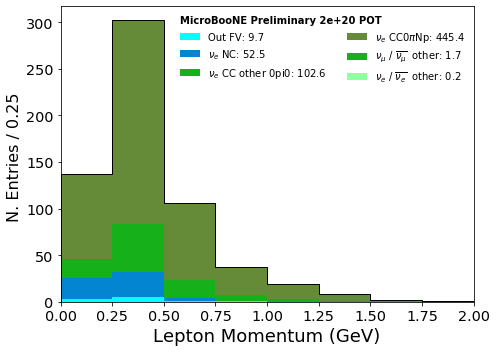

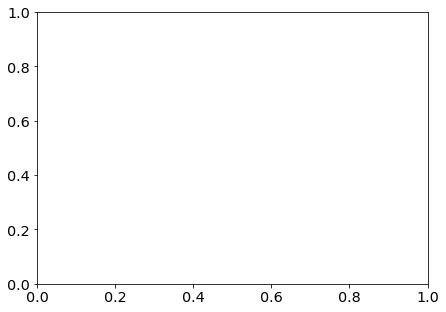

In [51]:
#THE TRUTH THAT WAS SELECTED

import batch_plotter_alex
import importlib
importlib.reload(batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = numu_mc.shape[0]
print("n_events here = ", n_events)
print("")
#batch_size = 40000
batch_size = n_events

varss = []
weightss = []
labss = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = numu_mc.iloc[start:end]

    samples = {
        #"nue_nue": nue_nue
        "numu_mc": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 
        mcratio   = pot/2.33652e+21
    elif isRun3 == True:
        pot =  5.014e20
        mcratio  = pot/1.98937e+21

    # NUE
    weights = { #full sample mc = 0.38
                "numu_mc"  : mcratio  * SPLIT * scaling
    }


    my_plotter = batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)


    #Now check on a variable
    #Remember to change the plotter keys between truth and mc
    
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Muon_Reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    VARIABLE, BINS, RANGE, XTIT = 'muon_mom',8,(0.0, 2.0),"Lepton Momentum (GeV)"
    
    #OLD
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'muon_mom',10,(0.0, 5.0),"Lepton Momentum (GeV)"
    

    var, weight, label = my_plotter.plot_variable(
        VARIABLE,
        query= NUMU_SEL_QUERY,
        #query= "is_signal == True",
        currentsample = "numu_mc",
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "weightSplineTimesTuneTimesPPFX",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:3]
    
    varss.append(var)
    weightss.append(weight)
    labss.append(label)

n_events here =  7220

1.0
1
{'numu_mc': 0.08559738414394057}
nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 and n_muons_tot > 0 and n_protons_tot > 0 and n_showers_contained==0 and contained_fraction> 0.95 and topological_score > 0.3 and muon_mom > 0.04 & muon_mom < 2.0 and targetP > 0.04 & targetP < 2.0 and is_signal==True& muon_mom <= 2 & muon_mom >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False 
 numu_mc
--------------------------------------
current_total  445.4358397010415
445.435839701041516036639222875237464904785156250000000000000000000000000000000
---------------------------STILL TOGETHER HERE--------------------------------
current_total  445.4358397010415
445.

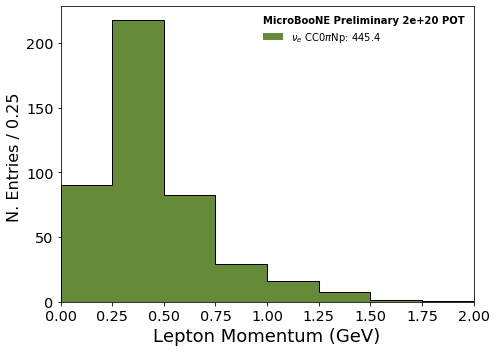

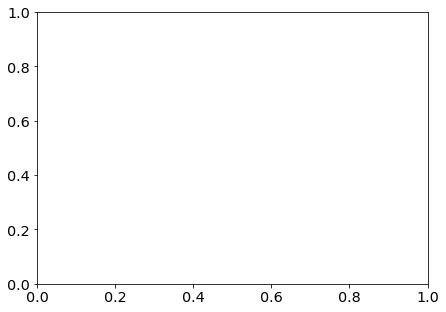

In [58]:
#THE TRUTH THAT WAS SELECTED

import batch_plotter_alex
import importlib
importlib.reload(batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = numu_mc.shape[0]
print("n_events here = ", n_events)
print("")
#batch_size = 40000
batch_size = n_events

varss = []
weightss = []
labss = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = numu_mc.iloc[start:end]

    samples = {
        #"nue_nue": nue_nue
        "numu_mc": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 
        mcratio   = pot/2.33652e+21
    elif isRun3 == True:
        pot =  5.014e20
        mcratio  = pot/1.98937e+21

    # NUE
    weights = { #full sample mc = 0.38
                "numu_mc"  : mcratio  * SPLIT * scaling
    }


    my_plotter = batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)


    #Now check on a variable
    #Remember to change the plotter keys between truth and mc
    
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Muon_Reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    VARIABLE, BINS, RANGE, XTIT = 'muon_mom',8,(0.0, 2.0),"Lepton Momentum (GeV)"
    
    #OLD
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'muon_mom',10,(0.0, 5.0),"Lepton Momentum (GeV)"
    

    var, weight, label = my_plotter.plot_variable(
        VARIABLE,
        query= SIGNAL_NUMU_SEL_QUERY,
        #query= "is_signal == True",
        currentsample = "numu_mc",
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "weightSplineTimesTuneTimesPPFX",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:3]
    
    varss.append(var)
    weightss.append(weight)
    labss.append(label)

No handles with labels found to put in legend.


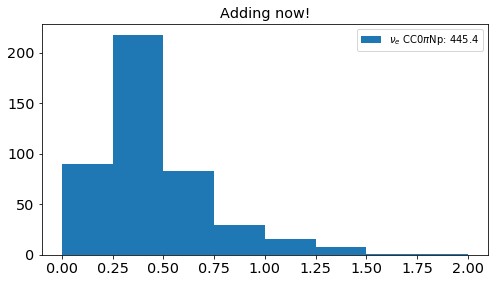

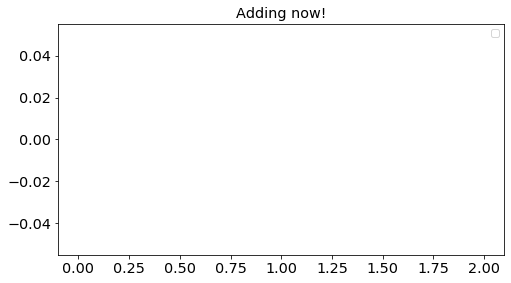

In [59]:
from matplotlib import gridspec

for i in range(int(n_events/batch_size)+1):
    numu_fig = plt.figure(figsize=(8, 7))
    numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
    numu_ax1 = plt.subplot(numu_gs[0])
    #numu_ax1.set_xlim([0, 5])    #TrueE, lepton mom
    #numu_ax1.set_xlim([-20, 280])    #Vtx X
    #numu_ax1.set_xlim([-140, 140])    #Vtx Y
    #numu_ax1.set_xlim([-10, 1100])    #Vtx Z
    #numu_ax1.set_xlim([-1, 1])    #AngleDiff

    numu_stacked = numu_ax1.hist(
                varss[i].values(),
                weights=list(weightss[i].values()),
                stacked=True,
                label=labss[i],
                bins=BINS,
                range=RANGE)
    
    plt.title("Adding now!")
    plt.legend()

In [60]:
def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)

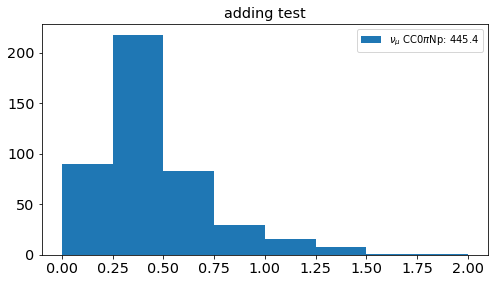

In [61]:
category_labels = {
    1 : r'$\nu_\mu$ CC0$\pi$Np', 
    2 : r'Out FV',
    3 : r'$\nu_e$ CC $\pi^{0}$',
    4 : r'$\nu_e$ CC',
    5 : r'$\nu_e$ NC $\pi^{0}$',
    6 : r'$\nu_e$ NC',
    7 : r'$\bar{\nu}_\mu$ CC0$\pi$Np',
    8: r'$\nu_\mu$ NC',
    9: r'$\nu_\mu$ CC other',
    10 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other', 
    11 : r'$\nu_\mu$ / $\overline{\nu_e}$  $\pi^{0}$', 
    12 : r'$\nu_\mu$ / $\overline{\nu_e}$  other',
    0: r'Unknown'
}


labels = [
            "%s: %.1f" % (category_labels[c], sum(weightss_tot[0][c])) \
            if sum(weightss_tot[0][c]) else ""
            for c in varss[0].keys()
        ]


numu_fig = plt.figure(figsize=(8, 7))
numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_ax1 = plt.subplot(numu_gs[0])

#TrueE, LeptonMom
#numu_ax1.set_xlim([0, 5])
#numu_ax1.set_xlim([-20, 280])
#numu_ax1.set_xlim([-140, 140])
#numu_ax1.set_xlim([-10, 1100])
#numu_ax1.set_ylim([0, 1000])

#AngleDiff
#nue_ax1.set_xlim([-1, 1])
#nue_ax1.set_ylim([0, 1000])

numu_stacked = numu_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)

plt.title("adding test")
plt.legend()

In [62]:
import importlib
import Plotter_Functions_Alex
importlib.reload(Plotter_Functions_Alex)
from Plotter_Functions_Alex import getWantedLists
importlib.reload(getWantedLists)

#print(nue_stacked)

wanted_key = 3  #3

numu_wanted_list = numu_stacked[0]
#numu_wanted_list = Plotter_Functions_Alex.getWantedLists.getWantedLists(wanted_key, numu_stacked)

print(numu_wanted_list)

[ 90.10622135 217.42750265  82.9039065   29.58394003  15.85226227
   7.90618678   1.21955745   0.43626266]


In [63]:
ending

'Sept19_rebinned'

In [64]:
vars_tot_df = pd.DataFrame.from_dict(varss_tot)
weights_tot_df = pd.DataFrame.from_dict(weightss_tot)

is_selected = True

#ending = "Sept19_TrueAngleDiff"
#ending = "Sept19_TrueLeptonMom"


if isRun3 == False:
    if (is_selected == True):
        ######full trueE
        #vars_tot_df.to_csv('numu_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_'+ending+'.csv')
        #weights_tot_df.to_csv('numu_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_'+ending+'.csv')
        ########angleDiff
        #vars_tot_df.to_csv('numu_mc_varstot_full_catsel_nopions_angleDiff_usingSelection_selectedsig_'+ending+'.csv')
        #weights_tot_df.to_csv('numu_mc_weightstot_full_catsel_nopions_angleDiff_usingSelection_selectedsig_'+ending+'.csv')
        ########leptonMom
        vars_tot_df.to_csv('numu_mc_varstot_full_catsel_nopions_leptonMom_usingSelection_selectedsig_'+ending+'.csv')
        weights_tot_df.to_csv('numu_mc_weightstot_full_catsel_nopions_leptonMom_usingSelection_selectedsig_'+ending+'.csv')
    elif (is_selected == False):
        ######full trueE
        #vars_tot_df.to_csv('numu_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_'+ending+'.csv')
        #weights_tot_df.to_csv('numu_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_'+ending+'.csv')
        ########angleDiff
        #vars_tot_df.to_csv('numu_mc_varstot_full_catsel_nopions_angleDiff_usingSelection_allselected_'+ending+'.csv')
        #weights_tot_df.to_csv('numu_mc_weightstot_full_catsel_nopions_angleDiff_usingSelection_allselected_'+ending+'.csv')
        ########leptonMom
        vars_tot_df.to_csv('numu_mc_varstot_full_catsel_nopions_leptonMom_usingSelection_allselected_'+ending+'.csv')
        weights_tot_df.to_csv('numu_mc_weightstot_full_catsel_nopions_leptonMom_usingSelection_allselected_'+ending+'.csv')
elif isRun3 == True:
    if (is_selected == True):
        ######full trueE
        #vars_tot_df.to_csv('numu_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_'+ending+'.csv')
        #weights_tot_df.to_csv('numu_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_'+ending+'.csv')
        ########angleDiff
        #vars_tot_df.to_csv('numu_mc_varstot_full_catsel_nopions_angleDiff_usingSelection_selectedsig_run3_'+ending+'.csv')
        #weights_tot_df.to_csv('numu_mc_weightstot_full_catsel_nopions_angleDiff_usingSelection_selectedsig_run3_'+ending+'.csv')
        ########leptonMom
        vars_tot_df.to_csv('numu_mc_varstot_full_catsel_nopions_leptonMom_usingSelection_selectedsig_run3_'+ending+'.csv')
        weights_tot_df.to_csv('numu_mc_weightstot_full_catsel_nopions_leptonMom_usingSelection_selectedsig_run3_'+ending+'.csv')
    elif (is_selected == False):
        ######full trueE
        #vars_tot_df.to_csv('numu_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_run3_'+ending+'.csv')
        #weights_tot_df.to_csv('numu_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_run3_'+ending+'.csv')
        ########angleDiff
        #vars_tot_df.to_csv('numu_mc_varstot_full_catsel_nopions_angleDiff_usingSelection_allselected_run3_'+ending+'.csv')
        #weights_tot_df.to_csv('numu_mc_weightstot_full_catsel_nopions_angleDiff_usingSelection_allselected_run3_'+ending+'.csv')
        ########leptonMom
        vars_tot_df.to_csv('numu_mc_varstot_full_catsel_nopions_leptonMom_usingSelection_allselected_run3_'+ending+'.csv')
        weights_tot_df.to_csv('numu_mc_weightstot_full_catsel_nopions_leptonMom_usingSelection_allselected_run3_'+ending+'.csv')
        

### Stat Errors

In [65]:
#numumcstaterrs

# sumw2 of the full event rate 
weight_stat_errs = []

#RECOE
#xvar = "reco_e"
#bins = np.arange(1.0, 4.5, 0.5)
#ANGLE
#xvar = "cosNu_Angle_Numi_Muon_Reco"
#bins = np.arange(-1.0, 1.2, 0.2)
#LEPTONMOM
xvar = "muon_mom"
bins = np.arange(0, 2.25, 0.25)

#OLD
#RECOE
#xvar = "reco_e"
#bins = np.arange(0, 5.5, 0.5)
#LEPTONMOM
#xvar = "muon_mom"
#bins = np.arange(0, 5.5, 0.5)

for i in range(len(bins)-1):

    if i==len(bins)-2: 
        bin_query = xvar+' >= '+str(bins[i])+' and '+xvar+' <= '+str(bins[i+1])
    else: 
        bin_query = xvar+' >= '+str(bins[i])+' and '+xvar+' < '+str(bins[i+1])

    #nuwro_full_sumw2.append(sum(datasets_bdt['infv'].query('is_signal==True and '+bin_query).totweight_data ** 2) ) #bug (fixed below)
    weight_stat_errs.append(sum(numu_mc.query(SIGNAL_NUMU_SEL_QUERY+ " and " +bin_query).totweight_data ** 2))
    
    
# percent stat error - of the background subtracted event rate 
#print( [(np.sqrt(a)/b) for a,b in zip(nuwro_full_sumw2, nuwro_evt_rate)] )
print(weight_stat_errs)

[14.08785426404015, 32.88611059586782, 19.56391681953738, 6.552971266635192, 3.24886404141124, 2.196306946573041, 0.12019418662011849, 0.039880595541581555]


In [66]:
if isRun3 == False:
    """
    np.savetxt("numu_mc_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')
    
    """
    """
    #########################
    #####angleDiff###########
    ##########################
    
    np.savetxt("numu_mc_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_selectedsig_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')
    """
    
    
    #########################
    #####leptonMom###########
    ##########################

    np.savetxt("numu_mc_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_selectedsig_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')
    
elif isRun3 == True:
    """
    np.savetxt("numu_mc_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    """
    
    
    #########################
    #####angleDiff###########
    ##########################
    
    np.savetxt("numu_mc_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_selectedsig_run3_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    
    
    """
    #########################
    #####leptonMom###########
    ##########################

    np.savetxt("numu_mc_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_selectedsig_run3_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    """

In [67]:
####NUMU####

import staterr_batch_plotter_alex
import importlib
importlib.reload(staterr_batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = numu_mc.shape[0]
print("n_events here = ", n_events)
print("")
batch_size = n_events

errs = []
detsyss = []
sels = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = numu_mc.iloc[start:end]

    samples = {
        "numu_mc": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 
        mcratio   = pot/2.33652e+21
    elif isRun3 == True:
        pot =  5.014e20
        mcratio  = pot/1.98937e+21
    
    weights = { 
                "numu_mc"  : mcratio  * SPLIT * scaling
    }


    my_plotter = staterr_batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)
    
    

    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"Reco Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Muon_Reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    VARIABLE, BINS, RANGE, XTIT = 'muon_mom',8,(0.0, 2.0),"Lepton Momentum (GeV)"
    
    #OLD
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reco Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'muon_mom',10,(0.0, 5.0),"Lepton Momentum (GeV)"

    err, detsys, selected = my_plotter.plot_variable(
        VARIABLE,   
        query= SIGNAL_NUMU_SEL_QUERY,
        currentsample = "numu_mc",
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "weightSplineTimesTuneTimesPPFX",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:3]
    
    
    errs.append(err)
    detsyss.append(detsys)
    sels.append(selected)

n_events here =  7220

1.0
1
{'numu_mc': 0.08559738414394057}
nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 and n_muons_tot > 0 and n_protons_tot > 0 and n_showers_contained==0 and contained_fraction> 0.95 and topological_score > 0.3 and muon_mom > 0.04 & muon_mom < 2.0 and targetP > 0.04 & targetP < 2.0 and is_signal==True& muon_mom <= 2 & muon_mom >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False

current sample is:  numu_mc

LOOK HERE FOR DETSYS
None
err numu mc: 
[ 6.94591274 17.29151273  5.80291444  2.26401586  1.26755581  0.46892238
  0.10257677  0.03663456]
detsys numu mc: 
[0. 0. 0. 0. 0. 0. 0. 0.]

selected  [ 90.10622    217.42749     82.9039      29.583939    1

In [68]:
#print(errs)
#print(sels)

#arrange the lists such that all the errors from bin 1 are in one list, bin 2 in another list, etc...
masterlist = []
templist = []
for i in range((len(errs[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(errs)):
        templist.append(errs[j][i])
masterlist.append(templist)
    
masterlist.pop(0)


#deal with adding the errors in each bin
total_errs = []
holdlist = []
for f in masterlist:
    total_errs.append(sum(holdlist))
    #print("------------------------------")
    holdlist = []
    for g in f:
        #just add them as they differnt parts of the same total number. This then matches previous when doing total
        holdlist.append(g)
total_errs.append(sum(holdlist))

total_errs.pop(0)
print("total errs = ", total_errs)

numu_mc_stat_errs = total_errs

#####################################################

#arrange the lists such that all the errors from bin 1 are in one list, bin 2 in another list, etc...
masterlistsels = []
templistsels = []
for i in range((len(sels[0]))):
    masterlistsels.append(templistsels)
    templistsels = []
    for j in range(len(sels)):
        templistsels.append(sels[j][i])
masterlistsels.append(templistsels)
    
masterlistsels.pop(0)


#deal with adding the errors in each bin
total_sels = []
holdlistsels = []
for f in masterlistsels:
    total_sels.append(sum(holdlistsels))
    #print("------------------------------")
    holdlistsels = []
    for g in f:
        #just add them as they differnt parts of the same total number. This then matches previous when doing total
        holdlistsels.append(g)
total_sels.append(sum(holdlistsels))

total_sels.pop(0)
print("total selected = ", total_sels)

numu_mc_stat_errs_selected = total_sels

total errs =  [6.9459127393264914, 17.291512726593375, 5.80291444044998, 2.2640158612361665, 1.2675558058053618, 0.468922379026261, 0.10257677041199459, 0.03663456086142664]
total selected =  [90.10621643066406, 217.427490234375, 82.90390014648438, 29.583938598632812, 15.852261543273926, 7.906186580657959, 1.2195574045181274, 0.43626266717910767]


In [69]:
if isRun3 == False:
    """
    np.savetxt("numu_mc_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_"+ending+".csv", 
               numu_mc_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_mc_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_"+ending+".csv", 
               numu_mc_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')

    """
    """
    #########################
    #####angleDiff###########
    ##########################
    
    np.savetxt("numu_mc_stat_errs_full_catsel_nopions_angleDiff_usingSelection_selectedsig_"+ending+".csv", 
               numu_mc_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_mc_stat_errs_selected_full_catsel_nopions_angleDiff_usingSelection_selectedsig_"+ending+".csv", 
               numu_mc_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')
    """

    
    #########################
    #####leptonMom###########
    ##########################

    np.savetxt("numu_mc_stat_errs_full_catsel_nopions_leptonMom_usingSelection_selectedsig_"+ending+".csv", 
               numu_mc_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_mc_stat_errs_selected_full_catsel_nopions_leptonMom_usingSelection_selectedsig_"+ending+".csv", 
               numu_mc_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')
    
elif isRun3 == True:
    """
    np.savetxt("numu_mc_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_"+ending+".csv", 
               numu_mc_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_mc_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_"+ending+".csv", 
               numu_mc_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')
    """
    
    """
    #########################
    #####angleDiff###########
    ##########################
    
    np.savetxt("numu_mc_stat_errs_full_catsel_nopions_angleDiff_usingSelection_selectedsig_run3_"+ending+".csv", 
               numu_mc_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_mc_stat_errs_selected_full_catsel_nopions_angleDiff_usingSelection_selectedsig_run3_"+ending+".csv", 
               numu_mc_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')

    """
    
    #########################
    #####leptonMom###########
    ##########################

    np.savetxt("numu_mc_stat_errs_full_catsel_nopions_leptonMom_usingSelection_selectedsig_run3_"+ending+".csv", 
               numu_mc_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_mc_stat_errs_selected_full_catsel_nopions_leptonMom_usingSelection_selectedsig_run3_"+ending+".csv", 
               numu_mc_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')
    

In [70]:
# sumw2 of the full event rate 
weight_stat_errs = []

#RECOE
#xvar = "reco_e"
#bins = np.arange(1.0, 4.5, 0.5)
#ANGLE
#xvar = "cosNu_Angle_Numi_Muon_Reco"
#bins = np.arange(-1.0, 1.2, 0.2)
#LEPTONMOM
xvar = "muon_mom"
bins = np.arange(0, 2.25, 0.25)

#OLD
#RECOE
#xvar = "reco_e"
#bins = np.arange(0, 5.5, 0.5)
#LEPTONMOM
#xvar = "muon_mom"
#bins = np.arange(0, 5.5, 0.5)

for i in range(len(bins)-1):

    if i==len(bins)-2: 
        bin_query = xvar+' >= '+str(bins[i])+' and '+xvar+' <= '+str(bins[i+1])
    else: 
        bin_query = xvar+' >= '+str(bins[i])+' and '+xvar+' < '+str(bins[i+1])

    #nuwro_full_sumw2.append(sum(datasets_bdt['infv'].query('is_signal==True and '+bin_query).totweight_data ** 2) ) #bug (fixed below)
    weight_stat_errs.append(sum(numu_mc.query(NOT_SIGNAL_NUMU_SEL_QUERY+ " and " +bin_query).totweight_data ** 2))
    
    
# percent stat error - of the background subtracted event rate 
#print( [(np.sqrt(a)/b) for a,b in zip(nuwro_full_sumw2, nuwro_evt_rate)] )
print(weight_stat_errs)

[3.99760646595059, 7.272253679558111, 2.128518954722093, 0.6291616992410904, 0.2343716750864737, 0.08231636359037157, 0.02295735808854659, 0.007905122654142829]


In [71]:
if isRun3 == False:  
    """
    np.savetxt("numu_mc_stat_updated_errs_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    
    """
    """
    #########################
    #####angleDiff###########
    ##########################
    
    np.savetxt("numu_mc_stat_updated_errs_full_catsel_nopions_angleDiff_usingSelection_notselectedsig_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    """
    
    
    #########################
    #####leptonMom###########
    ##########################

    np.savetxt("numu_mc_stat_updated_errs_full_catsel_nopions_leptonMom_usingSelection_notselectedsig_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')
    
    
elif isRun3 == True:  
    """
    np.savetxt("numu_mc_stat_updated_errs_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_run3_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    """
    
    
    #########################
    #####angleDiff###########
    ##########################
    
    np.savetxt("numu_mc_stat_updated_errs_full_catsel_nopions_angleDiff_usingSelection_notselectedsig_run3_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')


    """
    #########################
    #####leptonMom###########
    ##########################

    np.savetxt("numu_mc_stat_updated_errs_full_catsel_nopions_leptonMom_usingSelection_notselectedsig_run3_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    """

In [72]:
###NUMU NOT SIGNAL####

import staterr_batch_plotter_alex
import importlib
importlib.reload(staterr_batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = numu_mc.shape[0]
print("n_events here = ", n_events)
print("")
batch_size = n_events

errs = []
detsyss = []
sels = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = numu_mc.iloc[start:end]

    samples = {
        "numu_mc": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 
        mcratio   = pot/2.33652e+21
    elif isRun3 == True:
        pot =  5.014e20
        mcratio  = pot/1.98937e+21
    
    weights = { #full sample mc = 0.38
                "numu_mc"  : mcratio  * SPLIT * scaling
    }


    my_plotter = staterr_batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)
    
    

    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"Reco Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Muon_Reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    VARIABLE, BINS, RANGE, XTIT = 'muon_mom',8,(0.0, 2.0),"Lepton Momentum (GeV)"
    
    #OLD
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reco Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'muon_mom',10,(0.0, 5.0),"Lepton Momentum (GeV)"

    err, detsys, selected = my_plotter.plot_variable(
        VARIABLE,   
        query= NOT_SIGNAL_NUMU_SEL_QUERY,
        currentsample = "numu_mc",
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "weightSplineTimesTuneTimesPPFX",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:3]
    
    
    errs.append(err)
    detsyss.append(detsys)
    sels.append(selected)

n_events here =  7220

1.0
1
{'numu_mc': 0.08559738414394057}
nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 and n_muons_tot > 0 and n_protons_tot > 0 and n_showers_contained==0 and contained_fraction> 0.95 and topological_score > 0.3 and muon_mom > 0.04 & muon_mom < 2.0 and targetP > 0.04 & targetP < 2.0 and is_signal==False& muon_mom <= 2 & muon_mom >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False

current sample is:  numu_mc

LOOK HERE FOR DETSYS
None
err numu mc: 
[4.41812804e+00 7.88375750e+00 2.14678527e+00 7.18037393e-01
 2.49115014e-01 9.52498582e-02 2.19807365e-02 7.32691217e-03]
detsys numu mc: 
[0. 0. 0. 0. 0. 0. 0. 0.]

selected  [47.062813   84.51935    23.53

In [73]:
#print(errs)
#print(sels)

#arrange the lists such that all the errors from bin 1 are in one list, bin 2 in another list, etc...
masterlist = []
templist = []
for i in range((len(errs[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(errs)):
        templist.append(errs[j][i])
masterlist.append(templist)
    
masterlist.pop(0)


#deal with adding the errors in each bin
total_errs = []
holdlist = []
for f in masterlist:
    total_errs.append(sum(holdlist))
    #print("------------------------------")
    holdlist = []
    for g in f:
        #just add them as they differnt parts of the same total number. This then matches previous when doing total
        holdlist.append(g)
total_errs.append(sum(holdlist))

total_errs.pop(0)
print("total errs = ", total_errs)

numu_mc_stat_errs = total_errs

#####################################################

#arrange the lists such that all the errors from bin 1 are in one list, bin 2 in another list, etc...
masterlistsels = []
templistsels = []
for i in range((len(sels[0]))):
    masterlistsels.append(templistsels)
    templistsels = []
    for j in range(len(sels)):
        templistsels.append(sels[j][i])
masterlistsels.append(templistsels)
    
masterlistsels.pop(0)


#deal with adding the errors in each bin
total_sels = []
holdlistsels = []
for f in masterlistsels:
    total_sels.append(sum(holdlistsels))
    #print("------------------------------")
    holdlistsels = []
    for g in f:
        #just add them as they differnt parts of the same total number. This then matches previous when doing total
        holdlistsels.append(g)
total_sels.append(sum(holdlistsels))

total_sels.pop(0)
print("total selected = ", total_sels)

numu_mc_stat_errs_selected = total_sels

total errs =  [4.418128039888053, 7.883757497379013, 2.146785266479601, 0.7180373928839621, 0.24911501385770116, 0.09524985823970926, 0.021980736516855982, 0.007326912172285328]
total selected =  [47.06281280517578, 84.51934814453125, 23.536205291748047, 7.634082794189453, 2.7286667823791504, 0.9941054582595825, 0.24799329042434692, 0.08891075104475021]


In [74]:
if isRun3 == False:  
    """
    np.savetxt("numu_mc_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_"+ending+".csv", 
               numu_mc_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_mc_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_"+ending+".csv", 
               numu_mc_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')
    
    """
    """
    #########################
    #####angleDiff###########
    ##########################
    
    np.savetxt("numu_mc_stat_errs_full_catsel_nopions_angleDiff_usingSelection_notselectedsig_"+ending+".csv", 
               numu_mc_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_mc_stat_errs_selected_full_catsel_nopions_angleDiff_usingSelection_notselectedsig_"+ending+".csv", 
               numu_mc_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')
    
    """
    
    #########################
    #####leptonMom###########
    ##########################

    np.savetxt("numu_mc_stat_errs_full_catsel_nopions_leptonMom_usingSelection_notselectedsig_"+ending+".csv", 
               numu_mc_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_mc_stat_errs_selected_full_catsel_nopions_leptonMom_usingSelection_notselectedsig_"+ending+".csv", 
               numu_mc_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')
    
elif isRun3 == True:  
    """
    np.savetxt("numu_mc_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_run3_"+ending+".csv", 
               numu_mc_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_mc_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_run3_"+ending+".csv", 
               numu_mc_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')
    """
    
    """
    #########################
    #####angleDiff###########
    ##########################
    
    np.savetxt("numu_mc_stat_errs_full_catsel_nopions_angleDiff_usingSelection_notselectedsig_run3_"+ending+".csv", 
               numu_mc_stat_errs,
               delimiter =", ", 
               fmt ='% s')
               
    np.savetxt("numu_mc_stat_errs_selected_full_catsel_nopions_angleDiff_usingSelection_notselectedsig_run3_"+ending+".csv", 
               numu_mc_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')

    """
    
    #########################
    #####leptonMom###########
    ##########################

    np.savetxt("numu_mc_stat_errs_full_catsel_nopions_leptonMom_usingSelection_notselectedsig_run3_"+ending+".csv", 
               numu_mc_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_mc_stat_errs_selected_full_catsel_nopions_leptonMom_usingSelection_notselectedsig_run3_"+ending+".csv", 
               numu_mc_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')
    

### Sys Errors

In [75]:
#############################
##### weightsPPFX ###########
#############################

import syserr_batch_plotter_alex
import importlib
importlib.reload(syserr_batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = numu_mc.shape[0]
print("n_events here = ", n_events)
print("")
batch_size = n_events

n_cv_tots = []
n_tots = []
dfs_ppfx = []
df_ppfx_vars = []
df_ppfx_splines = []
detvar_dicts = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = numu_mc.iloc[start:end]

    samples = {
        "numu_mc": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 
        mcratio   = pot/2.33652e+21
    elif isRun3 == True:
        pot =  5.014e20
        mcratio  = pot/1.98937e+21
    
    weights = {
               "numu_mc"  : mcratio  * SPLIT * scaling 
    }


    my_plotter = syserr_batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)
    
    

    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"Reco Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Muon_Reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    VARIABLE, BINS, RANGE, XTIT = 'muon_mom',8,(0.0, 2.0),"Lepton Momentum (GeV)"
    
    #OLD
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reco Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'muon_mom',10,(0.0, 5.0),"Lepton Momentum (GeV)"

    n_cv_tot, n_tot, df_ppfx, df_ppfx_var, df_ppfx_spline, detvar_dict  = my_plotter.plot_variable(
        VARIABLE,   
        query= NUMU_SEL_QUERY,
        currentsample = "numu_mc",
        typeerr = "standard",
        weight = "weightsPPFX",
        category_query = " ",
        Nuniverse=500,
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "weightSplineTimesTuneTimesPPFX",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:6]
    
    
    n_cv_tots.append(n_cv_tot)
    n_tots.append(n_tot)
    dfs_ppfx.append(df_ppfx)
    df_ppfx_vars.append(df_ppfx_var)
    df_ppfx_splines.append(df_ppfx_spline)
    detvar_dicts.append(detvar_dict)

n_events here =  7220

1.0
1
{'numu_mc': 0.08559738414394057}
nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 and n_muons_tot > 0 and n_protons_tot > 0 and n_showers_contained==0 and contained_fraction> 0.95 and topological_score > 0.3 and muon_mom > 0.04 & muon_mom < 2.0 and targetP > 0.04 & targetP < 2.0& muon_mom <= 2 & muon_mom >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False

standard sys err
Universes 500
       0     1     2     3     4     5     6     7     8     9    ...   590  \
0     1308   496  1938   760  1833  1414   881  1704  1812  1575  ...  1260   
1      500  1080   438   246  1169   385   553   537   444   372  ...   469   
2     1969  1915   870  1902 

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[137.16903687 301.94683838 106.44009399  37.21801758  18.58093262
   8.90026855   1.4675293    0.52514648]


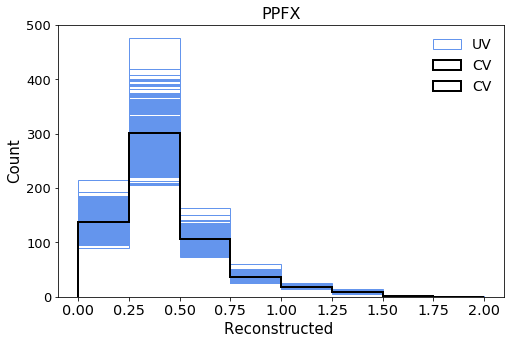

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0. 0. 0. 0. 0. 0. 0. 0.]


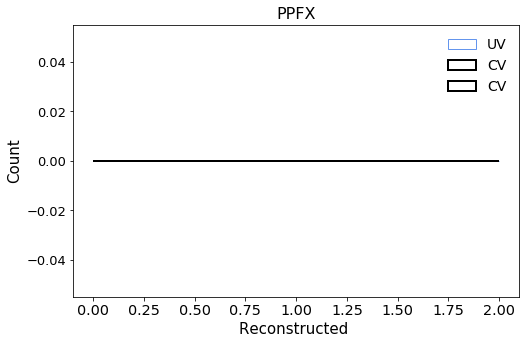

In [76]:
import matplotlib.pyplot as plt
import matplotlib


for j in range(len(detvar_dicts)):

    n=0
    #bin_centers = np.arange(1.25, 4.25, 0.5) #energy
    #bins = np.arange(1.0, 4.5, 0.5)
    #bin_centers = np.arange(-0.9, 1.1, 0.2) #Angle
    #bins = np.arange(-1, 1.2, 0.2)
    bin_centers = np.arange(0.125, 2.125, 0.25) #lepton
    bins = np.arange(0, 2.25, 0.25)
    print(bin_centers)
    print(bins)
    
    #OLD
    #bin_centers = np.arange(0.25, 5.25, 0.5)
    #bins = np.arange(0, 5.5, 0.5)

    print(bin_centers)
    print(bins)

    fig = plt.figure(figsize=(8, 5)) 


    for variation in detvar_dicts[j].keys(): 

        if n==0: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation], 
                 linewidth=1, color='cornflowerblue', label='UV')

        else: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation],
                 linewidth=1, color='cornflowerblue')

        n+=1   


    plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)

    current = (plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)[0])

    print(current)

    plt.title('PPFX', fontsize=16)

    plt.ylabel('Count' , fontsize=15) # 2.68294E22
    plt.xlabel("Reconstructed ", fontsize=15)

    #plt.xticks(x_ticks, fontsize=13)
    plt.yticks(fontsize=13)

    plt.legend(frameon=False, fontsize=14)


    plt.show()

In [77]:
#will need to edit this if batching

numu_mc_ppfx_detvar_dict = pd.DataFrame(detvar_dicts[0])
#print(nue_nue_ppfx_detvar_dict)

if isRun3 == False:
    #numu_mc_ppfx_detvar_dict.to_csv('numu_mc_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    #numu_mc_ppfx_detvar_dict.to_csv('numu_mc_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_'+ending+'.csv')
    numu_mc_ppfx_detvar_dict.to_csv('numu_mc_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_'+ending+'.csv')
elif isRun3 == True:
    #numu_mc_ppfx_detvar_dict.to_csv('numu_mc_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    #numu_mc_ppfx_detvar_dict.to_csv('numu_mc_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_'+ending+'.csv')
    numu_mc_ppfx_detvar_dict.to_csv('numu_mc_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_'+ending+'.csv')
    

In [78]:
masterlist = []
templist = []
for i in range((len(n_tots[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(n_tots)):
        templist.append(n_tots[j][i])
masterlist.append(templist)


masterlist.pop(0)
final_ns_numu_mc_ppfx = []

for a in range(len(masterlist)):
    #print(sum(masterlist[a]))
    final_ns_numu_mc_ppfx.append(sum(masterlist[a]))


final_ncvs_numu_mc_ppfx = sum(n_cv_tots)


#------------------------
frames = []
for a in range(len(dfs_ppfx)):
    frames.append(dfs_ppfx[a][0])
    
total_ppfx_df = pd.concat(frames, ignore_index=True)
#print(total_ppfx_df)

#-----------------
frames2 = []
for b in range(len(df_ppfx_vars)):
    frames2.append(df_ppfx_vars[b][0])
    
    
total_ppfx_df_vars = pd.concat(frames2, ignore_index=False)
#print(total_ppfx_df_vars)

#-----------------
frames3 = []
for c in range(len(df_ppfx_splines)):
    frames3.append(df_ppfx_splines[c][0])
    
    
total_ppfx_df_splines = pd.concat(frames3, ignore_index=False)
#print(total_ppfx_df_splines)

In [79]:
if isRun3 == False:
    """
    np.savetxt("numu_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ns_numu_mc_ppfx[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ncvs_numu_mc_ppfx,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_ppfx_df.to_csv('numu_mc_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_ppfx_df_vars.to_csv('numu_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_ppfx_df_splines.to_csv('numu_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    """
    """
    ###############################
    ######angleDiff##########
    ######################

    np.savetxt("numu_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ns_numu_mc_ppfx[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ncvs_numu_mc_ppfx,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_ppfx_df.to_csv('numu_mc_syserss_df_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_ppfx_df_vars.to_csv('numu_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_ppfx_df_splines.to_csv('numu_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    """
    
    ###############################
    ######leptonMom##########
    ######################

    np.savetxt("numu_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ns_numu_mc_ppfx[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ncvs_numu_mc_ppfx,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_ppfx_df.to_csv('numu_mc_syserss_df_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_ppfx_df_vars.to_csv('numu_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_ppfx_df_splines.to_csv('numu_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    
if isRun3 == True:
    """
    np.savetxt("numu_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ns_numu_mc_ppfx[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ncvs_numu_mc_ppfx,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_ppfx_df.to_csv('numu_mc_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_ppfx_df_vars.to_csv('numu_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_ppfx_df_splines.to_csv('numu_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    """
    """
    ###############################
    ######angleDiff##########
    ######################

    np.savetxt("numu_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ns_numu_mc_ppfx[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ncvs_numu_mc_ppfx,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_ppfx_df.to_csv('numu_mc_syserss_df_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_ppfx_df_vars.to_csv('numu_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_ppfx_df_splines.to_csv('numu_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    """
    
    ###############################
    ######leptonMom##########
    ######################

    np.savetxt("numu_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ns_numu_mc_ppfx[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ncvs_numu_mc_ppfx,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_ppfx_df.to_csv('numu_mc_syserss_df_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_ppfx_df_vars.to_csv('numu_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_ppfx_df_splines.to_csv('numu_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    

In [80]:
#############################
##### weightsgenie ###########
#############################

import syserr_batch_plotter_alex
import importlib
importlib.reload(syserr_batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = numu_mc.shape[0]
print("n_events here = ", n_events)
print("")
batch_size = n_events

n_cv_tots = []
n_tots = []
dfs_genie = []
df_genie_vars = []
df_genie_splines = []
detvar_dicts = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = numu_mc.iloc[start:end]

    samples = {
        "numu_mc": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 
        mcratio   = pot/2.33652e+21
    elif isRun3 == True:
        pot =  5.014e20
        mcratio  = pot/1.98937e+21
    
    weights = {
               "numu_mc"  : mcratio  * SPLIT * scaling 
    }


    my_plotter = syserr_batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)
    
    

    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"True Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Muon_Reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    VARIABLE, BINS, RANGE, XTIT = 'muon_mom',8,(0.0, 2.0),"Lepton Momentum (GeV)"
    
    #OLD
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"True Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'muon_mom',10,(0.0, 5.0),"Lepton Momentum (GeV)"

    n_cv_tot, n_tot, df_genie, df_genie_var, df_genie_spline, detvar_dict = my_plotter.plot_variable(
        VARIABLE,   
        query= NUMU_SEL_QUERY,
        currentsample = "numu_mc",
        typeerr = "standard",
        weight = "weightsGenie",
        category_query = " ",
        Nuniverse=500,
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "weightSplineTimesTuneTimesPPFX",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:6]
    
    
    n_cv_tots.append(n_cv_tot)
    n_tots.append(n_tot)
    dfs_genie.append(df_genie)
    df_genie_vars.append(df_genie_var)
    df_genie_splines.append(df_genie_spline)
    detvar_dicts.append(detvar_dict)

n_events here =  7220

1.0
1
{'numu_mc': 0.08559738414394057}
nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 and n_muons_tot > 0 and n_protons_tot > 0 and n_showers_contained==0 and contained_fraction> 0.95 and topological_score > 0.3 and muon_mom > 0.04 & muon_mom < 2.0 and targetP > 0.04 & targetP < 2.0& muon_mom <= 2 & muon_mom >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False

standard sys err
Universes 500
       0     1     2     3     4     5     6     7     8     9    ...   590  \
0     1351  1050   861  1276  1085  1398  1144  1169  1298  1306  ...  1362   
1      630   853   390  1343     1  1058  1340  1192   670  1329  ...  1007   
2     1087   267   331   714 

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[137.16903687 301.94683838 106.44009399  37.21801758  18.58093262
   8.90026855   1.4675293    0.52514648]


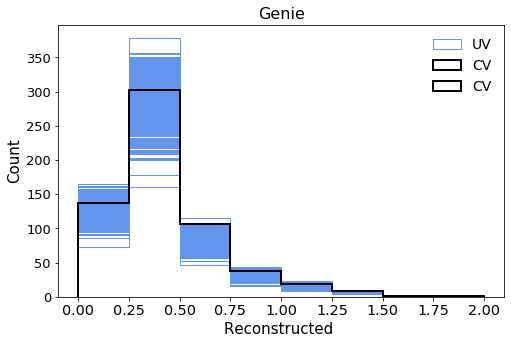

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0. 0. 0. 0. 0. 0. 0. 0.]


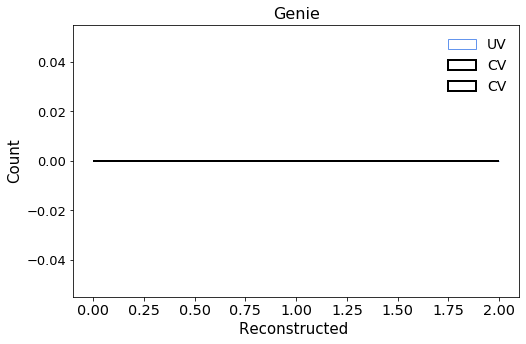

In [81]:
import matplotlib.pyplot as plt
import matplotlib


for j in range(len(detvar_dicts)):

    n=0
    #bin_centers = np.arange(1.25, 4.25, 0.5) #energy
    #bins = np.arange(1.0, 4.5, 0.5)
    #bin_centers = np.arange(-0.9, 1.1, 0.2) #Angle
    #bins = np.arange(-1, 1.2, 0.2)
    bin_centers = np.arange(0.125, 2.125, 0.25) #lepton
    bins = np.arange(0, 2.25, 0.25)
    print(bin_centers)
    print(bins)
    
    #OLD
    #bin_centers = np.arange(0.25, 5.25, 0.5)
    #bins = np.arange(0, 5.5, 0.5)

    print(bin_centers)
    print(bins)

    fig = plt.figure(figsize=(8, 5)) 


    for variation in detvar_dicts[j].keys(): 

        if n==0: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation], 
                 linewidth=1, color='cornflowerblue', label='UV')

        else: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation],
                 linewidth=1, color='cornflowerblue')

        n+=1   


    plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)

    current = (plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)[0])

    print(current)

    plt.title('Genie', fontsize=16)

    plt.ylabel('Count' , fontsize=15) # 2.68294E22
    plt.xlabel("Reconstructed ", fontsize=15)

    #plt.xticks(x_ticks, fontsize=13)
    plt.yticks(fontsize=13)

    plt.legend(frameon=False, fontsize=14)

    #plt.xlim(xlow, xhigh)


    plt.show()

In [82]:
#will need to edit this if batching

numu_mc_genie_detvar_dict = pd.DataFrame(detvar_dicts[0])
#print(nue_nue_ppfx_detvar_dict)

if isRun3 == False:
    #numu_mc_genie_detvar_dict.to_csv('numu_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    #numu_mc_genie_detvar_dict.to_csv('numu_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_'+ending+'.csv')
    numu_mc_genie_detvar_dict.to_csv('numu_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_'+ending+'.csv')
elif isRun3 == True:
    #numu_mc_genie_detvar_dict.to_csv('numu_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    #numu_mc_genie_detvar_dict.to_csv('numu_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_'+ending+'.csv')
    numu_mc_genie_detvar_dict.to_csv('numu_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_'+ending+'.csv')

In [83]:
masterlist = []
templist = []
for i in range((len(n_tots[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(n_tots)):
        templist.append(n_tots[j][i])
masterlist.append(templist)


masterlist.pop(0)
final_ns_numu_mc_genie = []

for a in range(len(masterlist)):
    #print(sum(masterlist[a]))
    final_ns_numu_mc_genie.append(sum(masterlist[a]))

final_ncvs_numu_mc_genie = sum(n_cv_tots)

##################################################

frames = []
for a in range(len(dfs_genie)):
    frames.append(dfs_genie[a][0])
    
    
total_genie_df = pd.concat(frames, ignore_index=True)
#print(total_genie_df)

#-----------------
frames2 = []
for b in range(len(df_genie_vars)):
    frames2.append(df_genie_vars[b][0])
    
    
total_genie_df_vars = pd.concat(frames2, ignore_index=False)
#print(total_genie_df_vars)

#-----------------
frames3 = []
for c in range(len(df_genie_splines)):
    frames3.append(df_genie_splines[c][0])
    
    
total_genie_df_splines = pd.concat(frames3, ignore_index=False)
#print(total_genie_df_splines)


In [84]:
if isRun3 == False:
    """
    np.savetxt("numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ns_numu_mc_genie[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ncvs_numu_mc_genie,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_genie_df.to_csv('numu_mc_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_genie_df_vars.to_csv('numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_genie_df_splines.to_csv('numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    """
    """
    ###########################
    #####angleDiff###########
    ##########################

    np.savetxt("numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ns_numu_mc_genie[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ncvs_numu_mc_genie,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_genie_df.to_csv('numu_mc_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_genie_df_vars.to_csv('numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_genie_df_splines.to_csv('numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    """
    
    ###########################
    #####leptonMom###########
    ##########################

    np.savetxt("numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ns_numu_mc_genie[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ncvs_numu_mc_genie,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_genie_df.to_csv('numu_mc_syserss_df_genie_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_genie_df_vars.to_csv('numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_genie_df_splines.to_csv('numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    
elif isRun3 == True:
    """
    np.savetxt("numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ns_numu_mc_genie[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ncvs_numu_mc_genie,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_genie_df.to_csv('numu_mc_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_genie_df_vars.to_csv('numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_genie_df_splines.to_csv('numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    """
    """
    ###########################
    #####angleDiff###########
    ##########################

    np.savetxt("numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ns_numu_mc_genie[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ncvs_numu_mc_genie,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_genie_df.to_csv('numu_mc_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_genie_df_vars.to_csv('numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_genie_df_splines.to_csv('numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    """
    
    ###########################
    #####leptonMom###########
    ##########################

    np.savetxt("numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ns_numu_mc_genie[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ncvs_numu_mc_genie,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_genie_df.to_csv('numu_mc_syserss_df_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_genie_df_vars.to_csv('numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_genie_df_splines.to_csv('numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    

In [85]:
#############################
##### weightsReint ###########
#############################

import syserr_batch_plotter_alex
import importlib
importlib.reload(syserr_batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = numu_mc.shape[0]
print("n_events here = ", n_events)
print("")
batch_size = n_events

n_cv_tots = []
n_tots = []
dfs_reint = []
df_reint_vars = []
df_reint_splines = []
detvar_dicts = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = numu_mc.iloc[start:end]

    samples = {
        "numu_mc": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 
        mcratio   = pot/2.33652e+21
    elif isRun3 == True:
        pot =  5.014e20
        mcratio  = pot/1.98937e+21
    
    weights = {
               "numu_mc"  : mcratio  * SPLIT * scaling 
    }


    my_plotter = syserr_batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)
    
    

    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"True Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Muon_Reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    VARIABLE, BINS, RANGE, XTIT = 'muon_mom',8,(0.0, 2.0),"Lepton Momentum (GeV)"
    
    #OLD
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"True Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'muon_mom',10,(0.0, 5.0),"Lepton Momentum (GeV)"

    n_cv_tot, n_tot, df_reint, df_reint_var, df_reint_spline, detvar_dict = my_plotter.plot_variable(
        VARIABLE,   
        query= NUMU_SEL_QUERY,
        currentsample = "numu_mc",
        typeerr = "standard",
        weight = "weightsReint",
        category_query = " ",
        Nuniverse=500,
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "weightSplineTimesTuneTimesPPFX",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:6]
    
    
    n_cv_tots.append(n_cv_tot)
    n_tots.append(n_tot)
    dfs_reint.append(df_reint)
    df_reint_vars.append(df_reint_var)
    df_reint_splines.append(df_reint_spline)
    detvar_dicts.append(detvar_dict)

n_events here =  7220

1.0
1
{'numu_mc': 0.08559738414394057}
nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 and n_muons_tot > 0 and n_protons_tot > 0 and n_showers_contained==0 and contained_fraction> 0.95 and topological_score > 0.3 and muon_mom > 0.04 & muon_mom < 2.0 and targetP > 0.04 & targetP < 2.0& muon_mom <= 2 & muon_mom >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False

standard sys err
Universes 500
       0     1     2     3     4     5     6     7     8     9    ...   990  \
0     1104  1302   736   987  1141  1068  1118  1085   859  1056  ...  1186   
1      970   915  1045  1004   952   985   983   978  1039   979  ...   961   
2      980   940  1039  1002 

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[137.16903687 301.94683838 106.44009399  37.21801758  18.58093262
   8.90026855   1.4675293    0.52514648]


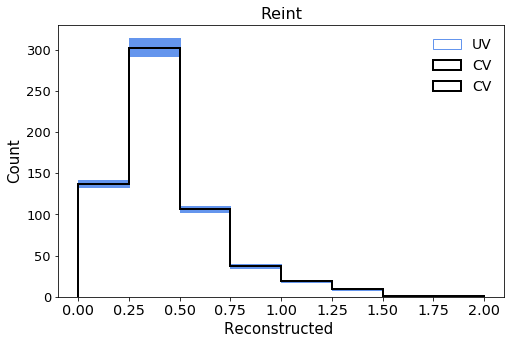

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0. 0. 0. 0. 0. 0. 0. 0.]


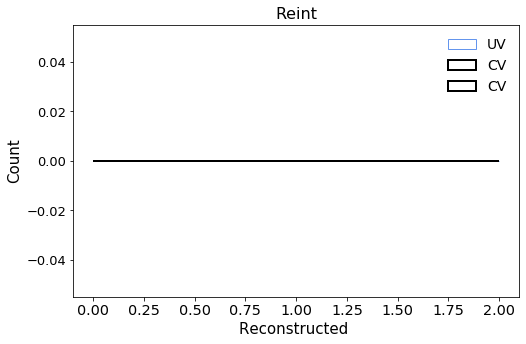

In [86]:
import matplotlib.pyplot as plt
import matplotlib


for j in range(len(detvar_dicts)):

    n=0
    #bin_centers = np.arange(1.25, 4.25, 0.5) #energy
    #bins = np.arange(1.0, 4.5, 0.5)
    #bin_centers = np.arange(-0.9, 1.1, 0.2) #Angle
    #bins = np.arange(-1, 1.2, 0.2)
    bin_centers = np.arange(0.125, 2.125, 0.25) #lepton
    bins = np.arange(0, 2.25, 0.25)
    print(bin_centers)
    print(bins)

    fig = plt.figure(figsize=(8, 5)) 


    for variation in detvar_dicts[j].keys(): 

        if n==0: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation], 
                 linewidth=1, color='cornflowerblue', label='UV')

        else: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation],
                 linewidth=1, color='cornflowerblue')

        n+=1   


    plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)

    current = (plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)[0])

    print(current)

    plt.title('Reint', fontsize=16)

    plt.ylabel('Count' , fontsize=15) # 2.68294E22
    plt.xlabel("Reconstructed ", fontsize=15)

    #plt.xticks(x_ticks, fontsize=13)
    plt.yticks(fontsize=13)

    plt.legend(frameon=False, fontsize=14)

    #plt.xlim(xlow, xhigh)


    plt.show()

In [87]:
#will need to edit this if batching

numu_mc_reint_detvar_dict = pd.DataFrame(detvar_dicts[0])
#print(nue_nue_ppfx_detvar_dict)

if isRun3 == False:
    #numu_mc_reint_detvar_dict.to_csv('numu_mc_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    #numu_mc_reint_detvar_dict.to_csv('numu_mc_syserss_df_reint_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_'+ending+'.csv')
    numu_mc_reint_detvar_dict.to_csv('numu_mc_syserss_df_reint_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_'+ending+'.csv')
elif isRun3 == True:
    #numu_mc_reint_detvar_dict.to_csv('numu_mc_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    #numu_mc_reint_detvar_dict.to_csv('numu_mc_syserss_df_reint_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_'+ending+'.csv')
    numu_mc_reint_detvar_dict.to_csv('numu_mc_syserss_df_reint_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_'+ending+'.csv')
    

In [88]:
masterlist = []
templist = []
for i in range((len(n_tots[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(n_tots)):
        templist.append(n_tots[j][i])
masterlist.append(templist)


masterlist.pop(0)
final_ns_numu_mc_reint = []

for a in range(len(masterlist)):
    #print(sum(masterlist[a]))
    final_ns_numu_mc_reint.append(sum(masterlist[a]))

final_ncvs_numu_mc_reint = sum(n_cv_tots)

###################################################

frames = []
for a in range(len(dfs_reint)):
    frames.append(dfs_reint[a][0])
    
    
total_reint_df = pd.concat(frames, ignore_index=True)
#print(total_reint_df)

#-----------------
frames2 = []
for b in range(len(df_reint_vars)):
    frames2.append(df_reint_vars[b][0])
    
    
total_reint_df_vars = pd.concat(frames2, ignore_index=False)
#print(total_reint_df_vars)

#-----------------
frames3 = []
for c in range(len(df_reint_splines)):
    frames3.append(df_reint_splines[c][0])
    
    
total_reint_df_splines = pd.concat(frames3, ignore_index=False)
#print(total_reint_df_splines)

In [89]:
if isRun3 == False:
    """
    np.savetxt("numu_mc_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ns_numu_mc_reint[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ncvs_numu_mc_reint,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_reint_df.to_csv('numu_mc_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_reint_df_vars.to_csv('numu_mc_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_reint_df_splines.to_csv('numu_mc_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    """
    """
    #############################
    #####angleDiff##########
    #######################
    
    np.savetxt("numu_mc_syserss_final_ns_reint_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ns_numu_mc_reint[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ncvs_numu_mc_reint,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_reint_df.to_csv('numu_mc_syserss_df_reint_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_reint_df_vars.to_csv('numu_mc_syserss_df_reint_vars_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_reint_df_splines.to_csv('numu_mc_syserss_df_reint_splines_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    """
    
    #############################
    #####leptonMom##########
    #######################
    
    np.savetxt("numu_mc_syserss_final_ns_reint_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ns_numu_mc_reint[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ncvs_numu_mc_reint,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_reint_df.to_csv('numu_mc_syserss_df_reint_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_reint_df_vars.to_csv('numu_mc_syserss_df_reint_vars_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_reint_df_splines.to_csv('numu_mc_syserss_df_reint_splines_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    
elif isRun3 == True:
    """
    np.savetxt("numu_mc_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ns_numu_mc_reint[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ncvs_numu_mc_reint,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_reint_df.to_csv('numu_mc_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_reint_df_vars.to_csv('numu_mc_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_reint_df_splines.to_csv('numu_mc_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    """
    """
    #############################
    #####angleDiff##########
    #######################
    
    np.savetxt("numu_mc_syserss_final_ns_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ns_numu_mc_reint[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ncvs_numu_mc_reint,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_reint_df.to_csv('numu_mc_syserss_df_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_reint_df_vars.to_csv('numu_mc_syserss_df_reint_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_reint_df_splines.to_csv('numu_mc_syserss_df_reint_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    """
    
    #############################
    #####leptonMom##########
    #######################
    
    np.savetxt("numu_mc_syserss_final_ns_reint_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ns_numu_mc_reint[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ncvs_numu_mc_reint,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_reint_df.to_csv('numu_mc_syserss_df_reint_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_reint_df_vars.to_csv('numu_mc_syserss_df_reint_vars_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_reint_df_splines.to_csv('numu_mc_syserss_df_reint_splines_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    


In [90]:
#############################
##### weightsNuMIGeo ###########
#############################

import syserr_batch_plotter_alex
import importlib
importlib.reload(syserr_batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = numu_mc.shape[0]
print("n_events here = ", n_events)
batch_size = n_events

n_cv_tots = []
n_tots = []
dfs_geo = []
df_geo_vars = []
df_geo_splines = []
detvar_dicts = []

print(n_events/batch_size)
print(int(n_events/batch_size)+1)

for i in range(int(n_events/batch_size)+1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = numu_mc.iloc[start:end]

    samples = {
        "numu_mc": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 
        mcratio   = pot/2.33652e+21
    elif isRun3 == True:
        pot =  5.014e20
        mcratio  = pot/1.98937e+21
    
    weights = {
               "numu_mc"  : mcratio  * SPLIT * scaling 
    }


    my_plotter = syserr_batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)
    
    

    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"Reco Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Muon_Reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    VARIABLE, BINS, RANGE, XTIT = 'muon_mom',8,(0.0, 2.0),"Lepton Momentum (GeV)"

    #OLD
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reco Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'muon_mom',10,(0.0, 5.0),"Lepton Momentum (GeV)"
    
    n_cv_tot, n_tot, df_geo, df_geo_var, df_geo_spline, detvar_dict = my_plotter.plot_variable(
        VARIABLE,   
        query= NUMU_SEL_QUERY,
        currentsample = "numu_mc",
        typeerr = "NuMIGeo",
        weight = "weightsGenie",
        category_query = " ",
        Nuniverse=10,
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "weightSplineTimesTuneTimesPPFX",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:6]
    
    
    n_cv_tots.append(n_cv_tot)
    n_tots.append(n_tot)
    dfs_geo.append(df_geo)
    df_geo_vars.append(df_geo_var)
    df_geo_splines.append(df_geo_spline)
    detvar_dicts.append(detvar_dict)

n_events here =  7220
1.0
2
{'numu_mc': 0.08559738414394057}
nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 and n_muons_tot > 0 and n_protons_tot > 0 and n_showers_contained==0 and contained_fraction> 0.95 and topological_score > 0.3 and muon_mom > 0.04 & muon_mom < 2.0 and targetP > 0.04 & targetP < 2.0& muon_mom <= 2 & muon_mom >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False

NuMI Geo sys err
Number of variations Universes 10
Returning
--------------------------

{'numu_mc': 0.08559738414394057}
nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 and reco_nu_vtx_sce

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[137.16903687 301.94683838 106.44009399  37.21801758  18.58093262
   8.90026855   1.4675293    0.52514648]


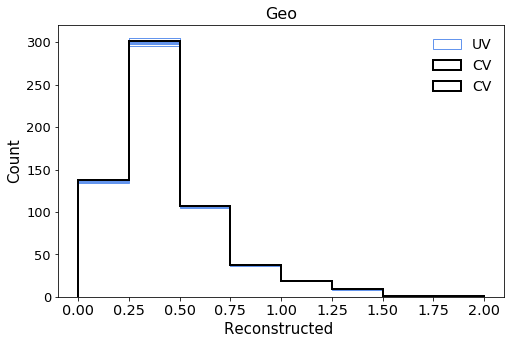

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0. 0. 0. 0. 0. 0. 0. 0.]


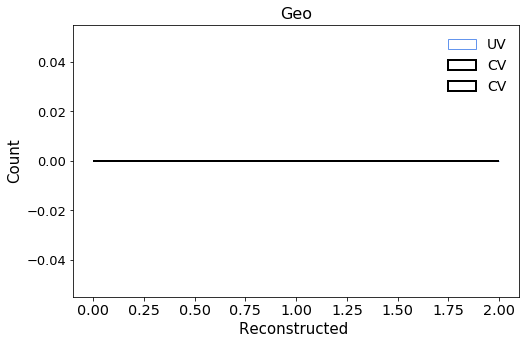

In [91]:
import matplotlib.pyplot as plt
import matplotlib


for j in range(len(detvar_dicts)):

    n=0
    #bin_centers = np.arange(1.25, 4.25, 0.5) #energy
    #bins = np.arange(1.0, 4.5, 0.5)
    #bin_centers = np.arange(-0.9, 1.1, 0.2) #Angle
    #bins = np.arange(-1, 1.2, 0.2)
    bin_centers = np.arange(0.125, 2.125, 0.25) #lepton
    bins = np.arange(0, 2.25, 0.25)
    print(bin_centers)
    print(bins)

    fig = plt.figure(figsize=(8, 5)) 


    for variation in detvar_dicts[j].keys(): 

        if n==0: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation], 
                 linewidth=1, color='cornflowerblue', label='UV')

        else: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation],
                 linewidth=1, color='cornflowerblue')

        n+=1   


    plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)

    current = (plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)[0])

    print(current)

    plt.title('Geo', fontsize=16)

    plt.ylabel('Count' , fontsize=15) # 2.68294E22
    plt.xlabel("Reconstructed ", fontsize=15)

    #plt.xticks(x_ticks, fontsize=13)
    plt.yticks(fontsize=13)

    plt.legend(frameon=False, fontsize=14)

    #plt.xlim(xlow, xhigh)


    plt.show()

In [92]:
#will need to edit this if batching

numu_mc_geo_detvar_dict = pd.DataFrame(detvar_dicts[0])
#print(nue_nue_ppfx_detvar_dict)

if isRun3 == False:
    #numu_mc_geo_detvar_dict.to_csv('numu_mc_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    #numu_mc_geo_detvar_dict.to_csv('numu_mc_syserss_df_geo_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_'+ending+'.csv')
    numu_mc_geo_detvar_dict.to_csv('numu_mc_syserss_df_geo_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_'+ending+'.csv')
elif isRun3 == True:
    #numu_mc_geo_detvar_dict.to_csv('numu_mc_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    #numu_mc_geo_detvar_dict.to_csv('numu_mc_syserss_df_geo_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_'+ending+'.csv')
    numu_mc_geo_detvar_dict.to_csv('numu_mc_syserss_df_geo_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_'+ending+'.csv')

In [93]:
masterlist = []
templist = []
for i in range((len(n_tots[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(n_tots)):
        templist.append(n_tots[j][i])
masterlist.append(templist)

#need to sum each part of the masterlist into one pair of arrays now
masterlist.pop(0)
final_ns_numu_mc_geo = []

for a in range(len(masterlist)):
    #print(sum(masterlist[a]))
    final_ns_numu_mc_geo.append(sum(masterlist[a]))

final_ncvs_numu_mc_geo = sum(n_cv_tots)
    
for x in range(len(final_ns_numu_mc_geo)):
    final_ns_numu_mc_geo[x] = np.concatenate((final_ns_numu_mc_geo[x][0], final_ns_numu_mc_geo[x][1]))
    
#############################################################
frames = []
for a in range(len(dfs_geo)):
    frames.append(dfs_geo[a][0])
    
    
total_geo_df = pd.concat(frames, ignore_index=True)
#print(total_geo_df)

#-----------------
frames2 = []
for b in range(len(df_geo_vars)):
    frames2.append(df_geo_vars[b][0])
    
    
total_geo_df_vars = pd.concat(frames2, ignore_index=False)
#print(total_geo_df_vars)

#-----------------
frames3 = []
for c in range(len(df_geo_splines)):
    frames3.append(df_geo_splines[c][0])
    
    
total_geo_df_splines = pd.concat(frames3, ignore_index=False)
#print(total_geo_df_splines)

In [94]:
if isRun3 == False:
    """
    np.savetxt("numu_mc_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ns_numu_mc_geo,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_mc_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ncvs_numu_mc_geo,
               delimiter =", ", 
               fmt ='% s')

    #######################################################

    total_geo_df.to_csv('numu_mc_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_geo_df_vars.to_csv('numu_mc_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_geo_df_splines.to_csv('numu_mc_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    """
    """
    ########################
    ####angleDiff##########
    #######################
    

    np.savetxt("numu_mc_syserss_final_ns_geo_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ns_numu_mc_geo,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_mc_syserss_final_ncvs_geo_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ncvs_numu_mc_geo,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_geo_df.to_csv('numu_mc_syserss_df_geo_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_geo_df_vars.to_csv('numu_mc_syserss_df_geo_vars_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_geo_df_splines.to_csv('numu_mc_syserss_df_geo_splines_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    
    """
    
    ########################
    ####leptonMom##########
    #######################


    np.savetxt("numu_mc_syserss_final_ns_geo_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ns_numu_mc_geo,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_mc_syserss_final_ncvs_geo_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ncvs_numu_mc_geo,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_geo_df.to_csv('numu_mc_syserss_df_geo_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_geo_df_vars.to_csv('numu_mc_syserss_df_geo_vars_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_geo_df_splines.to_csv('numu_mc_syserss_df_geo_splines_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    
elif isRun3 == True:
    """
    np.savetxt("numu_mc_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ns_numu_mc_geo,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_mc_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ncvs_numu_mc_geo,
               delimiter =", ", 
               fmt ='% s')

    #######################################################

    total_geo_df.to_csv('numu_mc_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_geo_df_vars.to_csv('numu_mc_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_geo_df_splines.to_csv('numu_mc_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    """
    """
    ########################
    ####angleDiff##########
    #######################
    

    np.savetxt("numu_mc_syserss_final_ns_geo_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ns_numu_mc_geo,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_mc_syserss_final_ncvs_geo_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ncvs_numu_mc_geo,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_geo_df.to_csv('numu_mc_syserss_df_geo_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_geo_df_vars.to_csv('numu_mc_syserss_df_geo_vars_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_geo_df_splines.to_csv('numu_mc_syserss_df_geo_splines_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    """
    
    
    ########################
    ####leptonMom##########
    #######################


    np.savetxt("numu_mc_syserss_final_ns_geo_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ns_numu_mc_geo,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_mc_syserss_final_ncvs_geo_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ncvs_numu_mc_geo,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_geo_df.to_csv('numu_mc_syserss_df_geo_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_geo_df_vars.to_csv('numu_mc_syserss_df_geo_vars_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_geo_df_splines.to_csv('numu_mc_syserss_df_geo_splines_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    


## NUMU_NUE SAMPLE

In [5]:
# Name of the TTree in the PeLEE Ntuples
tree = "NeutrinoSelectionFilter"

#cut samples
#NU   = '/pre_samp/prodgenie_numi_uboone_overlay_fhc_mcc9_run1_v28_all_snapshot'    +ls.APPEND #newTune
#full sample
if isRun3 == False:
    NUE   = '/neutrinoselection_filt_run1_overlay_intrinsic'    +ls.APPEND #newTune
elif isRun3 == True:
    NUE   = '/neutrinoselection_filt_run3b_overlay_intrinsic'    +ls.APPEND   

#actually fetch datasets
numu_nue  = uproot.open(ls.ntuple_path+NUE+".root")[ls.fold][tree]

# Define a list that contains the data sets
uproot_v = [numu_nue]

numu_variables = [
        "nu_pdg", "slpdg", "backtracked_pdg", "trk_score_v", #"trk_pfp_id",
        "category", "ccnc", "swtrig_pre", "trk_len_v",
        "run","sub","evt", "hits_ratio",
        "CosmicIP","CosmicDirAll3D","CosmicIPAll3D",
        "flash_pe", "contained_fraction",
        "trk_llr_pid_score_v", # trk-PID score
        "_opfilter_pe_beam", "_opfilter_pe_veto", # did the event pass the common optical filter (for MC only)
        "reco_nu_vtx_sce_x","reco_nu_vtx_sce_y","reco_nu_vtx_sce_z",
        "nmuon", "n_showers_contained", "shr_tkfit_dedx_Y", "tksh_distance", "n_tracks_contained",
        "reco_e", "shr_energy_tot_cali", "trk_energy_tot",
        "nproton", "mc_pdg", "slnunhits", "slnhits", "true_e_visible",
        "npi0","npion","pion_e","muon_e","pi0truth_elec_etot",
        "pi0_e", "evnunhits", "nslice", "interaction",
        "slclustfrac", "reco_nu_vtx_x", "reco_nu_vtx_y", "reco_nu_vtx_z",
        "topological_score", "proton_e", "elec_e",
        "isVtxInFiducial", "trk_sce_end_x_v", "trk_sce_end_y_v", "trk_sce_end_z_v", "trk_sce_start_x_v",
        "trk_theta", "trk_phi", "trk_energy_muon", "trk_range_muon_mom_v", "trk_mcs_muon_mom_v"
        #"theta", # angle between incoming and outgoing leptons in radians
    ]


# These are examples of variables present in MC samples only
numu_varMC = ["nu_e", "true_pt","true_pt_visible","true_p","true_p_visible","true_nu_vtx_t","true_nu_vtx_x","true_nu_vtx_y","true_nu_vtx_z","true_nu_vtx_sce_x","true_nu_vtx_sce_y","true_nu_vtx_sce_z\
","true_nu_px","true_nu_py","true_nu_pz", "theta", "mc_pdg", "mc_px", "mc_py", "mc_pz"]


#make the list unique (sometimes you repeat the variable name in the list, this takes care of that)
numu_variables = list(set(numu_variables))
print(numu_variables)



# These weights are needed to correctly calculate the CV for the MC    
WEIGHTS     = ["weightSpline","weightTune","weightSplineTimesTune","ppfx_cv"]
# These weights are needed to calculate the Flux, GENIE and Geant4 Systematics. 
# For NuMI weightsFlux should always be 1 (cause that's relevant for BNB).
SYSTEMATICS = ['weightsFlux','weightsGenie','weightsReint'] 
PPFX        = ['weightsPPFX'] 



WEIGHTSLEE = ["weightSpline","weightTune","weightSplineTimesTune", "leeweight"]#, "weightsGenie", "weightsFlux", "weightsReint"]
MCFVARS    = ["mcf_nu_e","mcf_lep_e","mcf_actvol","mcf_nmm","mcf_nmp","mcf_nem","mcf_nep","mcf_np0","mcf_npp",
              "mcf_npm","mcf_mcshr_elec_etot","mcf_pass_ccpi0","mcf_pass_ncpi0",
              "mcf_pass_ccnopi","mcf_pass_ncnopi","mcf_pass_cccpi","mcf_pass_nccpi"]

#redefine reco e to match nue?

['slnunhits', 'ccnc', 'sub', 'hits_ratio', 'CosmicIP', 'contained_fraction', 'reco_e', 'n_tracks_contained', 'mc_pdg', 'shr_tkfit_dedx_Y', 'proton_e', 'muon_e', 'flash_pe', 'trk_len_v', 'shr_energy_tot_cali', 'trk_energy_tot', 'trk_phi', 'trk_llr_pid_score_v', 'interaction', 'reco_nu_vtx_sce_y', 'nslice', 'true_e_visible', 'npion', 'elec_e', 'trk_sce_start_x_v', 'CosmicIPAll3D', 'swtrig_pre', 'topological_score', 'reco_nu_vtx_y', 'reco_nu_vtx_z', 'trk_sce_end_x_v', 'trk_energy_muon', 'category', 'run', 'nu_pdg', 'pi0_e', 'pion_e', 'reco_nu_vtx_x', 'reco_nu_vtx_sce_x', 'npi0', 'slpdg', 'trk_score_v', 'trk_sce_end_z_v', 'n_showers_contained', 'trk_theta', 'tksh_distance', 'nmuon', '_opfilter_pe_beam', 'slnhits', 'reco_nu_vtx_sce_z', 'nproton', 'backtracked_pdg', 'CosmicDirAll3D', 'slclustfrac', 'trk_sce_end_y_v', 'evnunhits', '_opfilter_pe_veto', 'trk_mcs_muon_mom_v', 'evt', 'isVtxInFiducial', 'pi0truth_elec_etot', 'trk_range_muon_mom_v']


In [6]:
import time
s = time.time()

import pandas as pandas

mc_var   = numu_variables + WEIGHTS + MCFVARS + SYSTEMATICS + PPFX + numu_varMC

# This needs modifications (add variables from above)
uproot_v = [numu_nue] 
var_v    = [mc_var] 


for ii, CV in enumerate(uproot_v):
    CVDF  = CV.pandas.df(var_v[ii], flatten=False)
    load_data_run123.process_uproot_numu(CV,CVDF)
    if ii == 0:
        numu_nue = CVDF

s2 = time.time()

print("runtime = ", s2-s)
#approx 3 min run time

trk_llr_pid_v  [[0.9324786] [0.590139 0.9521533 0.3471874 ... 0.32588285 -0.09476762 0.10572114] [] ... [0.6322873 -0.80414367] [0.9089123 -0.7736061] []]
trk_score_v  [[0.001973996] [0.0077069523 0.9997616 0.8196208 ... 0.029083267 0.8604026 0.8221332] [] ... [0.012679829 0.9684213] [0.30360103 0.9360796] []]
Here:
trk_range_muon_mom_v  [[0.39945376] [0.29477474 0.35777104 0.10886712 ... 0.10216848 0.085918136 0.052376423] [] ... [0.15139814 0.17097917] [0.2588373 0.15329416] []]
trk_mcs_muon_mom_v  [[0.3239991] [0.20500024 0.34899905 0.10800004 ... 0.08299999 14.998431 14.998431] [] ... [0.106000036 0.68099475] [0.18200019 0.36699882] []]


/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/awkward/array/jagged.py:1557: RuntimeWarning: overflow encountered in reduceat
  out = ufunc.reduceat(content, awkward.util.windows_safe(nonterminal))[:len(out)]
/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/awkward/array/jagged.py:1043: RuntimeWarning: overflow encountered in power
  result = getattr(ufunc, method)(*inputs, **kwargs)


runtime =  157.5657720565796


In [7]:
df_v = [numu_nue]
#print(df_v)
#removeGenieTune = False
for i,df in enumerate(df_v):
    df[ 'currentweightsafe' ] = df['weightSplineTimesTune']
    df[ 'currentweight' ] = df['weightSplineTimesTune']

In [8]:
df_v = [numu_nue]
for i,df in enumerate(df_v):  
    df["bnbdata"] = np.zeros_like(df["isVtxInFiducial"])
    df["extdata"] = np.zeros_like(df["isVtxInFiducial"])

In [9]:

numu_nue.query("nu_e > 0 and nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1)\
and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 \
and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 \
and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 \
and n_muons_tot > 0 and n_protons_tot > 0 and n_showers_contained==0", inplace=True)
#numu_mc.query("nu_e > 0", inplace=True)

In [10]:
s = time.time()

df_v = [numu_nue]
#removeGenieTune = False
for i,df in enumerate(df_v):
    df.loc[ df['weightTune'] <= 0, 'weightTune' ] = 1.
    df.loc[ df['weightTune'] == np.inf, 'weightTune' ] = 1.
    df.loc[ df['weightTune'] > 100, 'weightTune' ] = 1.
    df.loc[ np.isnan(df['weightTune']) == True, 'weightTune' ] = 1.    
    
    df.loc[ df['weightSplineTimesTune'] <= 0, 'weightSplineTimesTune' ] = 1.
    df.loc[ df['weightSplineTimesTune'] == np.inf, 'weightSplineTimesTune' ] = 1.
    df.loc[ df['weightSplineTimesTune'] > 100, 'weightSplineTimesTune' ] = 1.
    df.loc[ np.isnan(df['weightSplineTimesTune']) == True, 'weightSplineTimesTune' ] = 1. 
    df[ 'weightSplineTimesTuneTimesPPFX' ] = df[ 'weightSplineTimesTune' ]*df['ppfx_cv']
    
    df.loc[ df['weightSpline'] <= 0, 'weightSpline' ] = 1.
    df.loc[ df['weightSpline'] == np.inf, 'weightSpline' ] = 1.
    df.loc[ df['weightSpline'] > 100, 'weightSpline' ] = 1.
    df.loc[ np.isnan(df['weightSpline']) == True, 'weightSpline' ] = 1. 
    df[ 'weightSplineTimesPPFX' ]  = df[ 'weightSpline' ]*df['ppfx_cv']
    
    
     # Cray cray weight fix
    for ievt in range(df.shape[0]):
        reweightCondition = ((df['weightsGenie'].iloc[ievt] > 3000) | (df['weightsGenie'].iloc[ievt] < 0)  | 
                             (df['weightsGenie'].iloc[ievt] == np.inf))
        df['weightsGenie'].iloc[ievt][ reweightCondition ] = 1.
    
    
s2 = time.time()
print("runtime = ", s2-s)
#Run1 = 13 mins
#Run3 = 

runtime =  0.2684757709503174


In [11]:
df_v = [numu_nue]
#removeGenieTune = False
for i,df in enumerate(df_v):
    df[ 'currentweight' ] = df['weightSplineTimesTuneTimesPPFX']
    df[ 'currentweightsafe' ] = df['weightSplineTimesTuneTimesPPFX']
    df[ 'currentweightsafe2' ] = df['weightSplineTimesTuneTimesPPFX']
    df[ 'currentweight2' ] = df['weightSplineTimesTuneTimesPPFX']

In [12]:
df_v = [numu_nue]
scaleFlat = 0
#removeGenieTune = False
for i,df in enumerate(df_v):
    if scaleFlat == 1:
        df['weightSplineTimesTuneTimesPPFX'] = df[ 'currentweight' ] 
        df.loc[ df['npi0'] > 0, 'weightSplineTimesTuneTimesPPFX' ] =  (df['weightSplineTimesTuneTimesPPFX'] * 0.759)
    elif scaleFlat == 2:
        df['weightSplineTimesTune'] = df[ 'currentweight' ] 
        pi0emax = 0.6
        df.loc[ (df['pi0_e'] > 0.1) & (df['pi0_e'] < pi0emax) , 'weightSplineTimesTuneTimesPPFX'] = df['weightSplineTimesTuneTimesPPFX']*(1.-0.4*df['pi0_e'])
        df.loc[ (df['pi0_e'] > 0.1) & (df['pi0_e'] >= pi0emax), 'weightSplineTimesTuneTimesPPFX'] = df['weightSplineTimesTuneTimesPPFX']*(1.-0.4*pi0emax)
    elif scaleFlat == 0:
        df['weightSplineTimesTuneTimesPPFX'] = df[ 'currentweight' ]

In [13]:
if isRun3 == False:
    beamon_pot = 2.0E20 #v5
    intrinsic_pot =  2.37838E22
elif isRun3 == True:
    beamon_pot = 5.014E20
    intrinsic_pot =   2.5345e+22   

numu_nue['pot_scale'] = beamon_pot/intrinsic_pot

In [14]:
numu_nue['totweight_data'] = numu_nue['pot_scale']*numu_nue['weightSplineTimesTuneTimesPPFX']
print(numu_nue['totweight_data'])

entry
21        0.020693
613       0.010097
1452      0.022657
1746      0.024397
2211      0.009558
            ...   
123753    0.010743
123780    0.019552
123790    0.020038
123902    0.020616
123924    0.009042
Name: totweight_data, Length: 400, dtype: float64


In [15]:
df_v = [numu_nue]
#removeGenieTune = False
for i,df in enumerate(df_v):
    df[ 'noW' ] = 1

In [16]:
s = time.time()

def energyToPxyz(energy, theta, phi, mask, mass = 0.93827208816):
    if all(~mask):
        return (0.,0.,0.)
    energy = energy.copy()[mask]
    theta  = theta.copy()[mask]
    phi    = phi.copy()[mask]
    
    p  = np.sqrt((energy+mass)*(energy+mass) - mass*mass)
    pz = p*np.cos(theta)
    px = p*np.sin(theta)*np.cos(phi)
    py = p*np.sin(theta)*np.sin(phi)
    return( px.sum(), py.sum(), pz.sum())



for i,df in enumerate(df_v):
    up = uproot_v[i]
    trk_theta_proton_v  = up.array('trk_theta_v')
    trk_phi_proton_v    = up.array('trk_phi_v')
    trk_energy_proton_v = up.array('trk_energy_proton_v')
    ############ muon part
    mu_px_v            = up.array('shr_px')
    mu_py_v            = up.array('shr_py')
    mu_pz_v            = up.array('shr_pz')
    pt_v                = up.array('pt')
    trk_score_v         = up.array('trk_score_v')    
    trk_llr_pid_v       = up.array('trk_llr_pid_score_v')
    
    
    #shr_mask = (trk_score_v<0.5)
    trk_mask      = (trk_score_v>0.5)
    proton_mask_v = (trk_score_v>0.5)&(trk_llr_pid_v < 0.)
    sillyCount = 0
    listPx,listPy,listPz = [],[],[]
    
    for mask, theta_t, phi_t, energy_t,proton_mask_v_t,sx,sy,sz,pttt  in zip(proton_mask_v, trk_theta_proton_v,trk_phi_proton_v, trk_energy_proton_v,proton_mask_v, mu_px_v,mu_py_v,mu_pz_v,pt_v):
        tempMom = energyToPxyz(energy_t,theta_t,phi_t,proton_mask_v_t) 
        nu_reco_px = tempMom[0] + sx 
        nu_reco_py = tempMom[1] + sy  
        nu_reco_pz = tempMom[2] + sz  
        listPx.append(nu_reco_px)
        listPy.append(nu_reco_py)
        listPz.append(nu_reco_pz)

s2 = time.time()

print("runtime = ", s2-s)

runtime =  1.583909273147583


In [17]:
from scipy.spatial.transform import Rotation as R
from numpy import arccos, array
from numpy.linalg import norm

# Note: returns angle in radians
def theta(v, w): return arccos(v.dot(w)/(norm(v)*norm(w)))* 180 / 3.1415926

def GetNuMIAngle( px,  py,  pz):
    r = R.from_matrix([[0.92103853804025681562   , 0.022713504803924120662, 0.38880857519374290021  ],
                       [4.6254001262154668408e-05, 0.99829162468141474651 , -0.058427989452906302359],
                       [-0.38947144863934973769  , 0.053832413938664107345, 0.91946400794392302291  ]])  
    r = r.inv()
    beamCoords = r.apply([px,  py,  pz])
    beamDir    = [0,0,1]
    #print(theta(beamCoords,beamDir))
    return theta(beamCoords,beamDir)

def GetNuMIAnglePol( phiBNB,  thetaBNB):
    px = math.sin(thetaBNB)*math.cos(phiBNB)
    py = math.sin(thetaBNB)*math.sin(phiBNB)
    pz = math.cos(thetaBNB)
    return GetNuMIAngle( px,  py,  pz)

In [18]:
def vectorFromNuMITarget(vtxX,  vtxY, vtxZ):
    numiTarget      = np.array([-31387.58422, -3316.402543, -60100.2414])
    nuInteraction   = np.array([vtxX,  vtxY, vtxZ])
    directionVector = nuInteraction - numiTarget
    return directionVector

def angleFromNuMITarget(vtxX,  vtxY, vtxZ, thetaBNB, phiBNB):
    v1 = vectorFromNuMITarget(vtxX,  vtxY, vtxZ)  
    norm = np.linalg.norm(v1)
    v1 = v1/norm
    v2 = [np.cos(phiBNB)*np.sin(thetaBNB),np.sin(phiBNB)*np.sin(thetaBNB), np.cos(thetaBNB) ]
    dot_product = np.dot(v1, v2)
    angle = np.arccos(dot_product)
    return angle #dot_product # angle*180/3.14159265



angleFromNuMITarget(1,1,1,1.4,3.)

1.8690124908136228

In [19]:
df_v = [numu_nue]
#removeGenieTune = False
for i,df in enumerate(df_v):
    print(df['trk_mcs_muon_mom_v'])

entry
21                     [0.74599445, 0.09300001, 0.12600008]
613                    [0.21200025, 0.34899905, 0.24800032]
1452                       [0.570996, 14.999432, 14.999432]
1746                               [0.33499923, 0.12200007]
2211                              [0.42199785, 0.110000044]
                                ...                        
123753    [0.8619925, 0.12600008, 0.71599436, 0.25400028...
123780                   [0.62999547, 0.24700032, 0.745994]
123790    [0.29699966, 0.4379979, 0.26500008, 14.999432,...
123902       [0.17900018, 0.7829953, 0.37699842, 0.2590002]
123924                               [0.15600014, 0.745994]
Name: trk_mcs_muon_mom_v, Length: 400, dtype: object


In [20]:
#RECO VARIABLE
s = time.time()

print(df["trk_sce_end_z_v"])

for i,df in enumerate(df_v):
    df["muon_mom"] = df["trk_sce_end_z_v"].copy()
    for j, row in df.iterrows():
        if (len(row["muon_mom"]) !=0 ) and (df["trk_sce_end_z_v"][j][0] < 1036.8 and df["trk_sce_end_z_v"][j][0] > 0 and df["trk_sce_end_y_v"][j][0] < 116.5 and df["trk_sce_end_y_v"][j][0] > -116.5 and df["trk_sce_end_x_v"][j][0] < \
         254.8 and df["trk_sce_end_x_v"][j][0] > -1.55):
            df.loc[j, "muon_mom"] = df["trk_range_muon_mom_v"][j][0]
        elif (len(row["muon_mom"]) == 0 ):
            df.loc[j, "muon_mom"] = 0
        else:
            df.loc[j, "muon_mom"] = df["trk_mcs_muon_mom_v"][j][0]  #mcs == multiple coulob scattering
        
print(df["muon_mom"])
print("")
s2 = time.time()
print("runetime = ", s2-s)


entry
21                         [927.7503, 777.48627, 768.25916]
613                        [449.10638, 429.06036, 437.3787]
1452                         [932.5985, 935.1153, 821.6419]
1746                                  [435.49133, 412.6605]
2211                                  [877.65076, 848.9412]
                                ...                        
123753    [178.6571, 153.41556, 157.90085, 143.6084, 152...
123780                       [312.5676, 317.47983, 294.509]
123790    [251.26093, 124.37225, 110.46726, 91.18728, 90...
123902          [988.60895, 965.48956, 905.74304, 864.5555]
123924                               [365.57162, 356.34222]
Name: trk_sce_end_z_v, Length: 400, dtype: object
entry
21          0.6633
613       0.252832
1452      0.416117
1746      0.253437
2211      0.416197
            ...   
123753    0.181204
123780    0.238133
123790    0.591585
123902    0.328489
123924    0.184916
Name: muon_mom, Length: 400, dtype: object

runetime =  0.72588443756

In [21]:
#RECO VARIABLE
#in this we use the NEUTRINO VERTEX and the MUON PHI/THETA and will get the ANGLE BETWEEN THEM

for i,df in enumerate(df_v):
    df['nu_Angle_Numi_Muon_Reco'] = df.apply( lambda x: angleFromNuMITarget(x['reco_nu_vtx_sce_x'],x['reco_nu_vtx_sce_y'],x['reco_nu_vtx_sce_z'], x['trk_theta'],x['trk_phi']) , axis=1)
    df['cosNu_Angle_Numi_Muon_Reco'] = np.cos(df['nu_Angle_Numi_Muon_Reco'])

In [22]:
#TRUE VARIABLE
s = time.time()

for i,df in enumerate(df_v):
    df["muon_px"] = df["ccnc"].copy()
    df["muon_py"] = df["ccnc"].copy()
    df["muon_pz"] = df["ccnc"].copy()
    for j, row in df.iterrows():
        pdg_vector = df["mc_pdg"].loc[j][0]
        px_vector = df["mc_px"].loc[j]
        py_vector = df["mc_py"].loc[j]
        pz_vector = df["mc_pz"].loc[j]
        result = np.where(pdg_vector==13)[0]
        if np.size(result):
            df.loc[j, "muon_px"] = px_vector[result][0]
            df.loc[j, "muon_py"] = py_vector[result][0]
            df.loc[j, "muon_pz"] = pz_vector[result][0]   
            
    #print(df["muon_px"])

print("")    
print("==========================")
s2 = time.time()
print("runetime = ", s2-s)


runetime =  0.366426944732666


In [23]:
#TRUE VARIABLE
#in this we use the NEUTRINO VERTEX and the MUON PHI/THETA and will get the ANGLE BETWEEN THEM

for i,df in enumerate(df_v):
    df['targetP']     = np.sqrt(df['muon_px']*df['muon_px'] + df['muon_py']*df['muon_py'] + df['muon_pz']*df['muon_pz'])
    df['targetPt']    = np.sqrt(df['muon_px']*df['muon_px'] + df['muon_py']*df['muon_py'])
    df['targetTheta'] = np.arccos(df['muon_pz']/df['targetP'] )
    df['targetPhi']   = np.arctan2(df['muon_py'],df['muon_px'])
    df['nu_Angle_Numi_Muon'] = df.apply( lambda x: angleFromNuMITarget(x['true_nu_vtx_sce_x'],x['true_nu_vtx_sce_y'],x['true_nu_vtx_sce_z'], x['targetTheta'],x['targetPhi']) , axis=1)
    df['cosNu_Angle_Numi_Muon'] = np.cos(df['nu_Angle_Numi_Muon'])

In [24]:
numu_nue   = numu_nue.query('nu_e > 0.')
#numu_mc.query("nu_e > 0.", inplace=True)

# Calculate the true neutrino direction off of the NuMI beam, needed for plotting. Seem to be from MC
dfmc_v = [numu_nue]
for i,df in enumerate(dfmc_v):
    df['numi_nu_true_Angle'] = df.apply( lambda x: GetNuMIAngle(x['true_nu_px'],x['true_nu_py'],x['true_nu_pz']) , axis=1)
    df['weightsNuMIGeo']     = df.apply( lambda x: numiBeamlineGeoWeights.calculateGeoWeight(x['nu_pdg'],x['nu_e'],x['numi_nu_true_Angle']) , axis=1)

Setup complete.

In [25]:
import batch_plotter_alex
import importlib
importlib.reload(batch_plotter_alex)
scaling = 1


samples = {
    "numu_nue" : numu_nue
}


if isRun3 == False:
    pot =  2e+20 
    nueratio  = pot/2.37838e+22 
elif isRun3 == True:
    pot =  5.014e20
    nueratio  = pot/2.5345e+22


SPLIT = 1.0
scaling = 1

weights = { 
            "numu_nue"  : nueratio  * SPLIT * scaling   
}

my_plotter = batch_plotter_alex.Plotter(samples, weights, pot=pot)
print(weights)

{'numu_nue': 0.01978299467350562}


In [107]:


#ending = "Sept19_rebinned"
ending = "Sept19"

dfmc_v = [numu_nue]

for i,df in enumerate(dfmc_v):

    df['is_signal'] = np.where( (df.swtrig_pre==1) & (df.cosNu_Angle_Numi_Muon>-1.0) & (df.cosNu_Angle_Numi_Muon <1.0) & (df.cosNu_Angle_Numi_Muon_Reco>-1.0) & (df.cosNu_Angle_Numi_Muon_Reco <1.0)
                                 & (df.nu_pdg==14) & (df.ccnc==0) & (df.nproton>0) & (df.npion==0) & (df.npi0==0)
                                 & (10 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 246)
                                 & (-106 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 106)
                                 & (10 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1026), True, False)

    df.loc[ (df['is_signal']== True), 'category' ] = 1
    
#if energy add & (df.true_e>1.0) & (df.true_e <4.0) & (df.reco_e>1.0) & (df.reco_e <4.0)
#if angle add (df.cosNu_Angle_Numi_Muon>-1.0) & (df.cosNu_Angle_Numi_Muon <1.0) & (df.cosNu_Angle_Numi_Muon_Reco>-1.0) & (df.cosNu_Angle_Numi_Muon_Reco <1.0)
#if lepton momemtum add (df.targetP>0.04) & (df.targetP <2.0) & (df.muon_mom >0.04) & (df.muon_mom <2.0)

#OLD
#if energy add & (df.true_e>0.04) & (df.true_e <5) & (df.reco_e>0.04) & (df.reco_e <5)
#if lepton momemtum add (df.targetP>0.04) & (df.targetP <5) & (df.muon_mom >0.04) & (df.muon_mom <5)

In [108]:
#New categories

for i,df in enumerate(dfmc_v):
            
    #df.loc[ (df['is_signal']== True), 'category' ] = 1
    #df["in_fv_query"] = np.where((10 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 246)
    #                             & (-106 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 106)
    #                             & (10 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1026), True, False)
    df["in_fv_query"] = np.where((10 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 246)
                                 & (-106 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 106)
                                 & (10 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1026), True, False)
    df["out_fv_query"] = np.where((df.swtrig_pre==1)&  (df.in_fv_query==False), True, False)
    df.loc[ (df['out_fv_query']== True), 'category' ] = 2
    
    df["nue_CC_Npi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==12) & (df.ccnc==0) & (df.npi0>=1), True, False)
    df.loc[ (df['nue_CC_Npi0']== True), 'category' ] = 3
    df["nue_CC_0pi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==12) & (df.ccnc==0) & (df.npi0==0), True, False)
    df.loc[ (df['nue_CC_0pi0']== True), 'category' ] = 4
    
    df["nue_NC_Npi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==12) & (df.ccnc==1) & (df.npi0>=1), True, False)
    df.loc[ (df['nue_NC_Npi0']== True), 'category' ] = 5
    df["nue_NC_0pi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==12) & (df.ccnc==1) & (df.npi0==0), True, False)
    df.loc[ (df['nue_NC_Npi0']== True), 'category' ] = 6
    
    df["numubar_1eNp"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (df.nu_pdg==-14) & (df.ccnc==0) & (df.nproton>0) & (df.npion==0) & (df.npi0==0), True, False)
    df.loc[ (df['numubar_1eNp']== True), 'category' ] = 7
    df["numu_NC"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==1), True, False)
    df.loc[ (df['numu_NC']== True), 'category' ] = 8
    
    df["numu_CCother"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==0) & (df.is_signal==False) , True, False)
    df.loc[ (df['numu_CCother']== True), 'category' ] = 9
    #df["numu_CCother_0pi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==0) & (df.is_signal==False) & (df.npi0==0), True, False)
    #df.loc[ (df['numu_CCother_0pi0']== True), 'category' ] = 9
    #df["numu_CCother_Npi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==0) & (df.is_signal==False) & (df.npi0>0), True, False)
    #df.loc[ (df['numu_CCother_Npi0']== True), 'category' ] = 31
    #df["numu_CCother_0pi00p"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==0) & (df.is_signal==False) & (df.npi0==0)& (df.npion>0), True, False)
    #df.loc[ (df['numu_CCother_0pi00p']== True), 'category' ] = 21
    
    # less specific categories 
    df["numu_other"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (df.is_signal==False)& (df.numubar_1eNp==False) & (df.numu_NC==False) & (df.numu_CCother==False), True, False)
    df.loc[ (df['numu_other']== True), 'category' ] = 10
    df["nue_Npi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) &  (abs(df.nu_pdg==12)) & (df.npi0>=1), True, False)
    df.loc[ (df['nue_Npi0']== True), 'category' ] = 11
    df["nue_0pi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg==12)) &  (df.npi0==0), True, False)
    df.loc[ (df['nue_0pi0']== True), 'category' ] = 12
    
    df["unknown"] = np.where((df.is_signal==False) & (df.out_fv_query==False) & (df.nue_CC_Npi0==False)
                             & (df.nue_CC_0pi0==False) & (df.nue_NC_Npi0==False) & (df.nue_NC_0pi0==False)
                             & (df.numubar_1eNp==False) & (df.numu_NC==False) & (df.numu_CCother==False)
                             & (df.numu_other==False) & (df.nue_Npi0==False) & (df.nue_0pi0==False), True, False)
    df.loc[ (df['unknown']== True), 'category' ] = 0

In [109]:
NUMU_SEL_QUERY = "nslice == 1 and ( (_opfilter_pe_beam > 0 \
and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) \
and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 \
and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 \
and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 \
and n_muons_tot > 0  and n_protons_tot > 0 and n_showers_contained==0  \
and contained_fraction> 0.95 and topological_score > 0.3"
#ENERGY
#NUMU_SEL_QUERY += ' and reco_e > 1.0 and reco_e < 4.0'
#NUMU_SEL_QUERY += ' and true_e > 1.0 and true_e < 4.0'
#ANGLE
NUMU_SEL_QUERY += ' and cosNu_Angle_Numi_Muon_Reco >-1.0 and cosNu_Angle_Numi_Muon_Reco <1.0'
NUMU_SEL_QUERY += ' and cosNu_Angle_Numi_Muon >-1.0 and cosNu_Angle_Numi_Muon <1.0'
#LEPTON MOM
#NUMU_SEL_QUERY += ' and muon_mom > 0.04 & muon_mom < 2.0'
#NUMU_SEL_QUERY += ' and targetP > 0.04 & targetP < 2.0'

#OLD
#ENERGY
#NUMU_SEL_QUERY += ' and reco_e > 0.04 and reco_e < 5'
#NUMU_SEL_QUERY += ' and true_e > 0.04 and true_e < 5'
#LEPTON MOM
#NUMU_SEL_QUERY += ' and muon_mom > 0.04 & muon_mom < 5'
#NUMU_SEL_QUERY += ' and targetP > 0.04 & targetP < 5'

#ending = "Sept19_03"

SIGNAL_NUMU_SEL_QUERY = NUMU_SEL_QUERY
SIGNAL_NUMU_SEL_QUERY += ' and is_signal==True'

NOT_SIGNAL_NUMU_SEL_QUERY = NUMU_SEL_QUERY
NOT_SIGNAL_NUMU_SEL_QUERY += ' and is_signal==False'

In [110]:
test = np.nansum(numu_nue.query(NUMU_SEL_QUERY)['totweight_data'])
print('total signal events = '+ str(test))

test = np.nansum(numu_nue['totweight_data'])
print('total signal events = '+ str(test))

total signal events = 0.0
total signal events = 7.409802611154893


Now plot.

n_events here =  400

1.0
1
{'numu_nue': 0.01978299467350562}
nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 and n_muons_tot > 0  and n_protons_tot > 0 and n_showers_contained==0  and contained_fraction> 0.95 and topological_score > 0.3 and muon_mom > 0.04 & muon_mom < 2.0 and targetP > 0.04 & targetP < 2.0& muon_mom <= 2 & muon_mom >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False 
 numu_nue
--------------------------------------
current sample is:  numu_nue
Had to return early (colour sorting).
{'numu_nue': 0.01978299467350562}
nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_

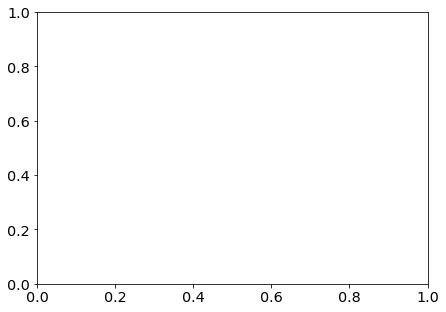

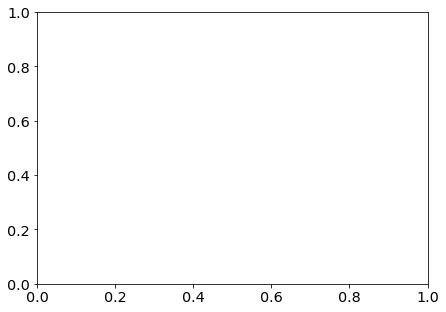

In [65]:
#The numu_nue plot 

import batch_plotter_alex
import importlib
importlib.reload(batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = numu_nue.shape[0]
print("n_events here = ", n_events)
print("")
#batch_size = 40000
batch_size = n_events

varss = []
weightss = []
labss = []
if n_events > 0:
    print(n_events/batch_size)
    print(int(n_events/batch_size))

    for i in range(int(n_events/batch_size)+1):
        start = i*batch_size
        if (start + batch_size) < n_events:
            end = start + batch_size
        else:
            end = n_events
        sample_set = numu_nue.iloc[start:end]

        samples = {
            "numu_nue": sample_set 
        }


        scaling = 1
        if isRun3 == False:
            pot =  2e+20 
            nueratio  = pot/2.37838e+22 
        elif isRun3 == True:
            pot =  5.014e20
            nueratio  = pot/2.5345e+22 

        # NUE
        weights = { #full sample mc = 0.38
                    "numu_nue"  : nueratio  * SPLIT * scaling
        }


        my_plotter = batch_plotter_alex.Plotter(samples, weights, pot=pot)
        print(weights)


        #Now check on a variable
        #Remember to change the plotter keys between truth and mc

        #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reconstructed Energy [GeV]"
        #VARIABLE, BINS, RANGE, XTIT = 'reco_nu_vtx_sce_x',60,(-20.0, 280.0),"Vertex X [cm]"
        #VARIABLE, BINS, RANGE, XTIT = 'reco_nu_vtx_sce_y',56,(-140.0, 140.0),"Vertex Y [cm]"
        #VARIABLE, BINS, RANGE, XTIT = 'reco_nu_vtx_sce_z',56,(-10.0, 1110.0),"Vertex Z [cm]"
        #VARIABLE, BINS, RANGE, XTIT = 'n_muons_tot',5,(0, 5),"Number of Muons"
        #VARIABLE, BINS, RANGE, XTIT = 'n_protons_tot',5,(0, 5),"Number of Protons"
        #VARIABLE, BINS, RANGE, XTIT = 'n_showers_contained',5,(0, 5),"Number of Contained Showers"
        #VARIABLE, BINS, RANGE, XTIT = 'contained_fraction',20,(0, 1),"Contained Fraction"
        #VARIABLE, BINS, RANGE, XTIT = 'topological_score',20,(0, 1),"Topological Score"
        
        #VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"Reconstructed Energy [GeV]"
        #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Muon',10,(-1.0, 1.0),"cos(Angle Diff)"
        VARIABLE, BINS, RANGE, XTIT = 'muon_mom',8,(0.0, 2.0),"Lepton Momentum (GeV)"
        
        #OLD
        #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reconstructed Energy [GeV]"
        #VARIABLE, BINS, RANGE, XTIT = 'muon_mom',10,(0.0, 5.0),"Lepton Momentum (GeV)"


        var, weight, label = my_plotter.plot_variable(
            VARIABLE,
            query= NUMU_SEL_QUERY,
            #query= "",
            currentsample = "numu_nue",
            kind="event_category",
            draw_sys  = True, 
            draw_geoSys = True, 
            draw_data = True,
            ratio=False,
            genieweight = "weightSplineTimesTuneTimesPPFX",  
            stacksort=3,
            title=XTIT,
            bins=BINS,
            range=RANGE
        )[0:3]

        varss.append(var)
        weightss.append(weight)
        labss.append(label)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


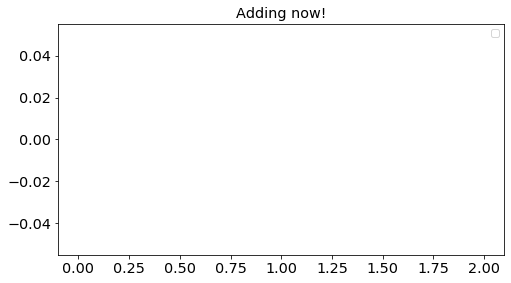

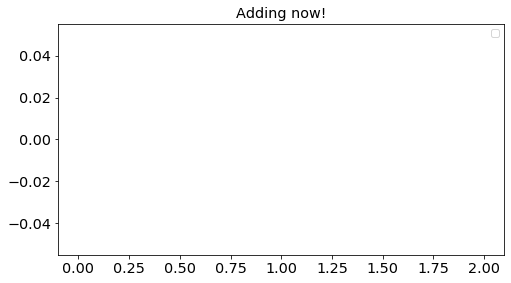

In [66]:
from matplotlib import gridspec

for i in range(int(n_events/batch_size)+1):
    numu_fig = plt.figure(figsize=(8, 7))
    numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
    numu_ax1 = plt.subplot(numu_gs[0])
    #numu_ax1.set_xlim([0, 5])    #TrueE, lepton mom
    #numu_ax1.set_xlim([-20, 280])    #Vtx X
    #numu_ax1.set_xlim([-140, 140])    #Vtx Y
    #numu_ax1.set_xlim([-10, 1100])    #Vtx Z
    #numu_ax1.set_xlim([-1, 1])    #AngleDiff

    numu_stacked = numu_ax1.hist(
                varss[i].values(),
                weights=list(weightss[i].values()),
                stacked=True,
                label=labss[i],
                bins=BINS,
                range=RANGE)
    
    plt.title("Adding now!")
    plt.legend()

In [67]:
def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)

No handles with labels found to put in legend.


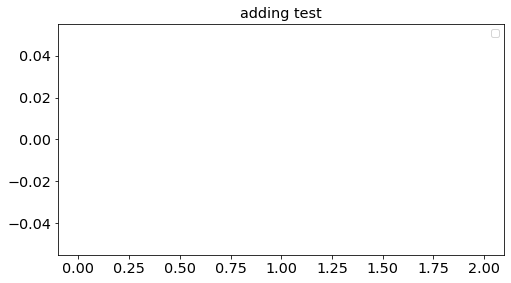

In [68]:
category_labels = {
    1 : r'$\nu_\mu$ CC0$\pi$Np', 
    2 : r'Out FV',
    3 : r'$\nu_e$ CC $\pi^{0}$',
    4 : r'$\nu_e$ CC',
    5 : r'$\nu_e$ NC $\pi^{0}$',
    6 : r'$\nu_e$ NC',
    7 : r'$\bar{\nu}_\mu$ CC0$\pi$Np',
    8: r'$\nu_\mu$ NC',
    9: r'$\nu_\mu$ CC other',
    10 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other', 
    11 : r'$\nu_\mu$ / $\overline{\nu_e}$  $\pi^{0}$', 
    12 : r'$\nu_\mu$ / $\overline{\nu_e}$  other',
    0: r'Unknown'
}


labels = [
            "%s: %.1f" % (category_labels[c], sum(weightss_tot[0][c])) \
            if sum(weightss_tot[0][c]) else ""
            for c in varss[0].keys()
        ]


numu_fig = plt.figure(figsize=(8, 7))
numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_ax1 = plt.subplot(numu_gs[0])

#TrueE, LeptonMom
#numu_ax1.set_xlim([0, 5])
#numu_ax1.set_xlim([-20, 280])
#numu_ax1.set_xlim([-140, 140])
#numu_ax1.set_xlim([-10, 1100])
#numu_ax1.set_ylim([0, 1000])

#AngleDiff
#nue_ax1.set_xlim([-1, 1])
#nue_ax1.set_ylim([0, 1000])

numu_stacked = numu_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)

plt.title("adding test")
plt.legend()

In [69]:
vars_tot_df = pd.DataFrame.from_dict(varss_tot)
weights_tot_df = pd.DataFrame.from_dict(weightss_tot)

#ending = "Sept19_TrueAngleDiff"
#ending = "Sept19_TrueLeptonMom"

if isRun3 == False:
    ######full true
    vars_tot_df.to_csv('numu_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    weights_tot_df.to_csv('numu_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    ########angleDiff
    #vars_tot_df.to_csv('numu_nue_varstot_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    #weights_tot_df.to_csv('numu_nue_weightstot_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    ########leptonMom
    #vars_tot_df.to_csv('numu_nue_varstot_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    #weights_tot_df.to_csv('numu_nue_weightstot_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
elif isRun3 == True:
    ######full true
    #vars_tot_df.to_csv('numu_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    #weights_tot_df.to_csv('numu_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    ########angleDiff
    #vars_tot_df.to_csv('numu_nue_varstot_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    #weights_tot_df.to_csv('numu_nue_weightstot_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    ########leptonMom
    vars_tot_df.to_csv('numu_nue_varstot_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    weights_tot_df.to_csv('numu_nue_weightstot_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')

### Stat Errors

In [111]:
#numunuestat

# sumw2 of the full event rate 
weight_stat_errs = []

#RECOE
#xvar = "reco_e"
#bins = np.arange(1.0, 4.5, 0.5)
#ANGLE
xvar = "cosNu_Angle_Numi_Muon_Reco"
bins = np.arange(-1.0, 1.2, 0.2)
#LEPTONMOM
#xvar = "muon_mom"
#bins = np.arange(0, 2.25, 0.25)

#OLD
#RECOE
#xvar = "reco_e"
#bins = np.arange(0, 5.5, 0.5)
#LEPTONMOM
#xvar = "muon_mom"
#bins = np.arange(0, 5.5, 0.5)

for i in range(len(bins)-1):

    if i==len(bins)-2: 
        bin_query = xvar+' >= '+str(bins[i])+' and '+xvar+' <= '+str(bins[i+1])
    else: 
        bin_query = xvar+' >= '+str(bins[i])+' and '+xvar+' < '+str(bins[i+1])

    #nuwro_full_sumw2.append(sum(datasets_bdt['infv'].query('is_signal==True and '+bin_query).totweight_data ** 2) ) #bug (fixed below)
    weight_stat_errs.append(sum(numu_nue.query(NUMU_SEL_QUERY+ " and " +bin_query).totweight_data ** 2))
    
    
# percent stat error - of the background subtracted event rate 
#print( [(np.sqrt(a)/b) for a,b in zip(nuwro_full_sumw2, nuwro_evt_rate)] )
print(weight_stat_errs)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [112]:
if isRun3 == False:    
    
    np.savetxt("numu_nue_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    

    """
    #########################
    #####angleDiff###########
    ##########################
    
    np.savetxt("numu_nue_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_notselectedsig_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')
    """
    
    
    """
    #########################
    #####leptonMom###########
    ##########################

    np.savetxt("numu_nue_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    """
elif isRun3 == True:  
    """
    np.savetxt("numu_nue_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_run3_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    """
    
    
    #########################
    #####angleDiff###########
    ##########################
    
    np.savetxt("numu_nue_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_notselectedsig_run3_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    
    
    """
    #########################
    #####leptonMom###########
    ##########################

    np.savetxt("numu_nue_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    """

In [72]:
###NUMU NUE####

import staterr_batch_plotter_alex
import importlib
importlib.reload(staterr_batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = numu_nue.shape[0]
print("n_events here = ", n_events)
print("")
batch_size = n_events

errs = []
detsyss = []
sels = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = numu_nue.iloc[start:end]

    samples = {
        "numu_nue": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 
        nueratio  = pot/2.37838e+22 
    elif isRun3 == True:
        pot =  5.014e20
        nueratio  = pot/2.5345e+22 
    
    weights = { 
                "numu_nue"  : nueratio  * SPLIT * scaling
    }


    my_plotter = staterr_batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)
    
    

    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"Reco Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Muon_Reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    VARIABLE, BINS, RANGE, XTIT = 'muon_mom',8,(0.0, 2.0),"Lepton Momentum (GeV)"
    
    #OLD
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reco Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'muon_mom',10,(0.0, 5.0),"Lepton Momentum (GeV)"

    err, detsys, selected = my_plotter.plot_variable(
        VARIABLE,   
        query= NUMU_SEL_QUERY,
        currentsample = "numu_nue",
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "weightSplineTimesTuneTimesPPFX",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:3]

    
    
    errs.append(err)
    detsyss.append(detsys)
    sels.append(selected)

n_events here =  400

1.0
1
{'numu_nue': 0.01978299467350562}
nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 and n_muons_tot > 0  and n_protons_tot > 0 and n_showers_contained==0  and contained_fraction> 0.95 and topological_score > 0.3 and muon_mom > 0.04 & muon_mom < 2.0 and targetP > 0.04 & targetP < 2.0& muon_mom <= 2 & muon_mom >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False

current sample is:  numu_nue
[]

[]
current_uncertainties
[0 0 0 0 0 0 0 0]
LOOK HERE FOR DETSYS
None
err numu nue: 
[0. 0. 0. 0. 0. 0. 0. 0.]
detsys numu nue: 
[0. 0. 0. 0. 0. 0. 0. 0.]

weightSplineTimesTuneTimesPPFX
spline_fix_cv
Series([], Name: weightSplineTimesTuneTimesPPFX, dtype: float3

In [73]:
#print(errs)
#print(sels)

#arrange the lists such that all the errors from bin 1 are in one list, bin 2 in another list, etc...
masterlist = []
templist = []
for i in range((len(errs[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(errs)):
        templist.append(errs[j][i])
masterlist.append(templist)
    
masterlist.pop(0)


#deal with adding the errors in each bin
total_errs = []
holdlist = []
for f in masterlist:
    total_errs.append(sum(holdlist))
    #print("------------------------------")
    holdlist = []
    for g in f:
        #just add them as they differnt parts of the same total number. This then matches previous when doing total
        holdlist.append(g)
total_errs.append(sum(holdlist))

total_errs.pop(0)
print("total errs = ", total_errs)

numu_nue_stat_errs = total_errs

#####################################################

#arrange the lists such that all the errors from bin 1 are in one list, bin 2 in another list, etc...
masterlistsels = []
templistsels = []
for i in range((len(sels[0]))):
    masterlistsels.append(templistsels)
    templistsels = []
    for j in range(len(sels)):
        templistsels.append(sels[j][i])
masterlistsels.append(templistsels)
    
masterlistsels.pop(0)


#deal with adding the errors in each bin
total_sels = []
holdlistsels = []
for f in masterlistsels:
    total_sels.append(sum(holdlistsels))
    #print("------------------------------")
    holdlistsels = []
    for g in f:
        #just add them as they differnt parts of the same total number. This then matches previous when doing total
        holdlistsels.append(g)
total_sels.append(sum(holdlistsels))

total_sels.pop(0)
print("total selected = ", total_sels)

numu_nue_stat_errs_selected = total_sels

total errs =  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
total selected =  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [74]:
if isRun3 == False:    
    
    np.savetxt("numu_nue_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_"+ending+".csv", 
               numu_nue_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_nue_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_"+ending+".csv", 
               numu_nue_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')

    
    """
    #########################
    #####angleDiff###########
    ##########################
    
    np.savetxt("numu_nue_stat_errs_full_catsel_nopions_angleDiff_usingSelection_notselectedsig_"+ending+".csv", 
               numu_nue_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_nue_stat_errs_selected_full_catsel_nopions_angleDiff_usingSelection_notselectedsig_"+ending+".csv", 
               numu_nue_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')
    
    """
    """
    #########################
    #####leptonMom###########
    ##########################

    np.savetxt("numu_nue_stat_errs_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               numu_nue_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_nue_stat_errs_selected_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               numu_nue_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')
    """
elif isRun3 == True:  
    """
    np.savetxt("numu_nue_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_run3_"+ending+".csv", 
               numu_nue_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_nue_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_run3_"+ending+".csv", 
               numu_nue_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')
    """
    
    """
    #########################
    #####angleDiff###########
    ##########################
    
    np.savetxt("numu_nue_stat_errs_full_catsel_nopions_angleDiff_usingSelection_notselectedsig_run3_"+ending+".csv", 
               numu_nue_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_nue_stat_errs_selected_full_catsel_nopions_angleDiff_usingSelection_notselectedsig_run3_"+ending+".csv", 
               numu_nue_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')
    """
    
    
    #########################
    #####leptonMom###########
    ##########################

    np.savetxt("numu_nue_stat_errs_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               numu_nue_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_nue_stat_errs_selected_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               numu_nue_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')
    

### Sys Errors

In [75]:
#############################
##### weightsPPFX ###########  NUE
#############################

import syserr_batch_plotter_alex
import importlib
importlib.reload(syserr_batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = numu_nue.shape[0]
print("n_events here = ", n_events)
print("")
batch_size = n_events

n_cv_tots = []
n_tots = []
dfs_ppfx = []
df_ppfx_vars = []
df_ppfx_splines = []
detvar_dicts = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = numu_nue.iloc[start:end]

    samples = {
        "numu_nue": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 
        nueratio  = pot/2.37838e+22 
    elif isRun3 == True:
        pot =  5.014e20
        nueratio  = pot/2.5345e+22 
    
    weights = {
               "numu_nue"  : nueratio  * SPLIT * scaling 
    }


    my_plotter = syserr_batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)
    
    

    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"Reco Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Muon_Reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    VARIABLE, BINS, RANGE, XTIT = 'muon_mom',8,(0.0, 2.0),"Lepton Momentum (GeV)"
    
    #OLD
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reco Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'muon_mom',10,(0.0, 5.0),"Lepton Momentum (GeV)"
    

    n_cv_tot, n_tot, df_ppfx, df_ppfx_var, df_ppfx_spline, detvar_dict  = my_plotter.plot_variable(
        VARIABLE,   
        query= NUMU_SEL_QUERY,
        currentsample = "numu_nue",
        typeerr = "standard",
        weight = "weightsPPFX",
        category_query = " ",
        Nuniverse=500,
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "weightSplineTimesTuneTimesPPFX",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:6]
    
    
    n_cv_tots.append(n_cv_tot)
    n_tots.append(n_tot)
    dfs_ppfx.append(df_ppfx)
    df_ppfx_vars.append(df_ppfx_var)
    df_ppfx_splines.append(df_ppfx_spline)
    detvar_dicts.append(detvar_dict)

n_events here =  400

1.0
1
{'numu_nue': 0.01978299467350562}
nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 and n_muons_tot > 0  and n_protons_tot > 0 and n_showers_contained==0  and contained_fraction> 0.95 and topological_score > 0.3 and muon_mom > 0.04 & muon_mom < 2.0 and targetP > 0.04 & targetP < 2.0& muon_mom <= 2 & muon_mom >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False

standard sys err
Universes 500
Empty DataFrame
Columns: []
Index: []
Returning
--------------------------

{'numu_nue': 0.01978299467350562}
nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 2

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0. 0. 0. 0. 0. 0. 0. 0.]


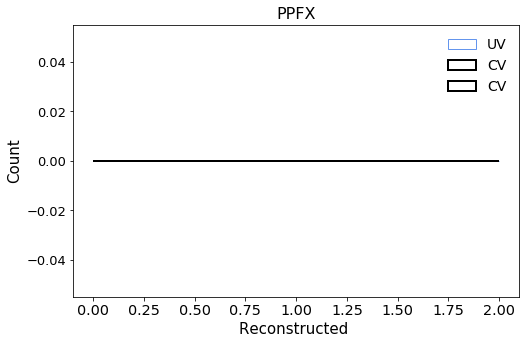

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0. 0. 0. 0. 0. 0. 0. 0.]


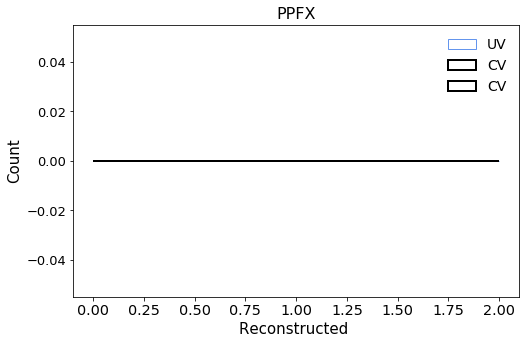

In [76]:
import matplotlib.pyplot as plt
import matplotlib


for j in range(len(detvar_dicts)):

    n=0
    #bin_centers = np.arange(1.25, 4.25, 0.5) #energy
    #bins = np.arange(1.0, 4.5, 0.5)
    #bin_centers = np.arange(-0.9, 1.1, 0.2) #Angle
    #bins = np.arange(-1, 1.2, 0.2)
    bin_centers = np.arange(0.125, 2.125, 0.25) #lepton
    bins = np.arange(0, 2.25, 0.25)
    print(bin_centers)
    print(bins)
    
    #OLD
    #bin_centers = np.arange(0.25, 5.25, 0.5)
    #bins = np.arange(0, 5.5, 0.5)
    print(bin_centers)
    print(bins)

    fig = plt.figure(figsize=(8, 5)) 


    for variation in detvar_dicts[j].keys(): 

        if n==0: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation], 
                 linewidth=1, color='cornflowerblue', label='UV')

        else: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation],
                 linewidth=1, color='cornflowerblue')

        n+=1   


    plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)

    current = (plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)[0])

    print(current)

    plt.title('PPFX', fontsize=16)

    plt.ylabel('Count' , fontsize=15) # 2.68294E22
    plt.xlabel("Reconstructed ", fontsize=15)

    #plt.xticks(x_ticks, fontsize=13)
    plt.yticks(fontsize=13)

    plt.legend(frameon=False, fontsize=14)


    plt.show()

In [77]:
#will need to edit this if batching

numu_nue_ppfx_detvar_dict = pd.DataFrame(detvar_dicts[0])
#print(nue_nue_ppfx_detvar_dict)

if isRun3 == False:
    #numu_nue_ppfx_detvar_dict.to_csv('numu_nue_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    #numu_nue_ppfx_detvar_dict.to_csv('numu_nue_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_'+ending+'.csv')
    numu_nue_ppfx_detvar_dict.to_csv('numu_nue_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_'+ending+'.csv')
elif isRun3 == True:
    #numu_nue_ppfx_detvar_dict.to_csv('numu_nue_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    #numu_nue_ppfx_detvar_dict.to_csv('numu_nue_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_'+ending+'.csv')
    numu_nue_ppfx_detvar_dict.to_csv('numu_nue_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_'+ending+'.csv')

In [78]:
masterlist = []
templist = []
for i in range((len(n_tots[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(n_tots)):
        templist.append(n_tots[j][i])
masterlist.append(templist)


masterlist.pop(0)
final_ns_numu_nue_ppfx = []

for a in range(len(masterlist)):
    #print(sum(masterlist[a]))
    final_ns_numu_nue_ppfx.append(sum(masterlist[a]))


final_ncvs_numu_nue_ppfx = sum(n_cv_tots)


#------------------------
frames = []
for a in range(len(dfs_ppfx)):
    frames.append(dfs_ppfx[a][0])
    
total_ppfx_df = pd.concat(frames, ignore_index=True)
#print(total_ppfx_df)

#-----------------
frames2 = []
for b in range(len(df_ppfx_vars)):
    frames2.append(df_ppfx_vars[b][0])
    
    
total_ppfx_df_vars = pd.concat(frames2, ignore_index=False)
#print(total_ppfx_df_vars)

#-----------------
frames3 = []
for c in range(len(df_ppfx_splines)):
    frames3.append(df_ppfx_splines[c][0])
    
    
total_ppfx_df_splines = pd.concat(frames3, ignore_index=False)
#print(total_ppfx_df_splines)

In [79]:
if isRun3 == False:
    
    np.savetxt("numu_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ns_numu_nue_ppfx[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ncvs_numu_nue_ppfx,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_ppfx_df.to_csv('numu_nue_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_ppfx_df_vars.to_csv('numu_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_ppfx_df_splines.to_csv('numu_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    
    """
    ###############################
    ######angleDiff##########
    ######################

    np.savetxt("numu_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ns_numu_nue_ppfx[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ncvs_numu_nue_ppfx,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_ppfx_df.to_csv('numu_nue_syserss_df_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_ppfx_df_vars.to_csv('numu_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_ppfx_df_splines.to_csv('numu_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    """
    """
    ###############################
    ######leptonMom##########
    ######################

    np.savetxt("numu_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ns_numu_nue_ppfx[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ncvs_numu_nue_ppfx,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_ppfx_df.to_csv('numu_nue_syserss_df_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_ppfx_df_vars.to_csv('numu_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_ppfx_df_splines.to_csv('numu_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    """
elif isRun3 == True:
    """
    np.savetxt("numu_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ns_numu_nue_ppfx[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ncvs_numu_nue_ppfx,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_ppfx_df.to_csv('numu_nue_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_ppfx_df_vars.to_csv('numu_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_ppfx_df_splines.to_csv('numu_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    """
    """
    ###############################
    ######angleDiff##########
    ######################

    np.savetxt("numu_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ns_numu_nue_ppfx[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ncvs_numu_nue_ppfx,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_ppfx_df.to_csv('numu_nue_syserss_df_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_ppfx_df_vars.to_csv('numu_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_ppfx_df_splines.to_csv('numu_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    """
    
    ###############################
    ######leptonMom##########
    ######################

    np.savetxt("numu_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ns_numu_nue_ppfx[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ncvs_numu_nue_ppfx,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_ppfx_df.to_csv('numu_nue_syserss_df_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_ppfx_df_vars.to_csv('numu_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_ppfx_df_splines.to_csv('numu_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    

In [80]:
#############################
##### weightsgenie ###########  NUE
#############################

import syserr_batch_plotter_alex
import importlib
importlib.reload(syserr_batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = numu_nue.shape[0]
print("n_events here = ", n_events)
print("")
batch_size = n_events

n_cv_tots = []
n_tots = []
dfs_genie = []
df_genie_vars = []
df_genie_splines = []
detvar_dicts = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = numu_nue.iloc[start:end]

    samples = {
        "numu_nue": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 
        nueratio  = pot/2.37838e+22 
    elif isRun3 == True:
        pot =  5.014e20
        nueratio  = pot/2.5345e+22 
    
    weights = {
               "numu_nue"  : nueratio  * SPLIT * scaling 
    }


    my_plotter = syserr_batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)
    
    

    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Muon_Reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    VARIABLE, BINS, RANGE, XTIT = 'muon_mom',8,(0.0, 2.0),"Lepton Momentum (GeV)"
    
    #OLD
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'muon_mom',10,(0.0, 5.0),"Lepton Momentum (GeV)"

    n_cv_tot, n_tot, df_genie, df_genie_var, df_genie_spline, detvar_dict = my_plotter.plot_variable(
        VARIABLE,   
        query= NUMU_SEL_QUERY,
        currentsample = "numu_nue",
        typeerr = "standard",
        weight = "weightsGenie",
        category_query = " ",
        Nuniverse=500,
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "weightSplineTimesTuneTimesPPFX",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:6]
    
    
    n_cv_tots.append(n_cv_tot)
    n_tots.append(n_tot)
    dfs_genie.append(df_genie)
    df_genie_vars.append(df_genie_var)
    df_genie_splines.append(df_genie_spline)
    detvar_dicts.append(detvar_dict)

n_events here =  400

1.0
1
{'numu_nue': 0.01978299467350562}
nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 and n_muons_tot > 0  and n_protons_tot > 0 and n_showers_contained==0  and contained_fraction> 0.95 and topological_score > 0.3 and muon_mom > 0.04 & muon_mom < 2.0 and targetP > 0.04 & targetP < 2.0& muon_mom <= 2 & muon_mom >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False

standard sys err
Universes 500
Empty DataFrame
Columns: []
Index: []
Returning
--------------------------

{'numu_nue': 0.01978299467350562}
nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 2

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0. 0. 0. 0. 0. 0. 0. 0.]


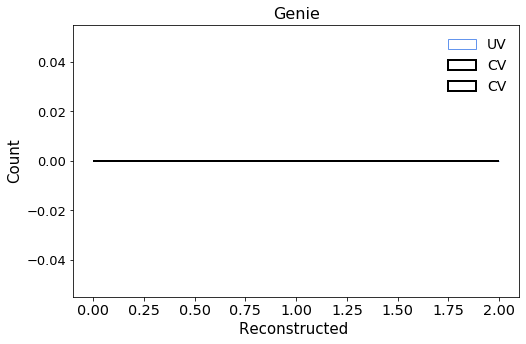

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0. 0. 0. 0. 0. 0. 0. 0.]


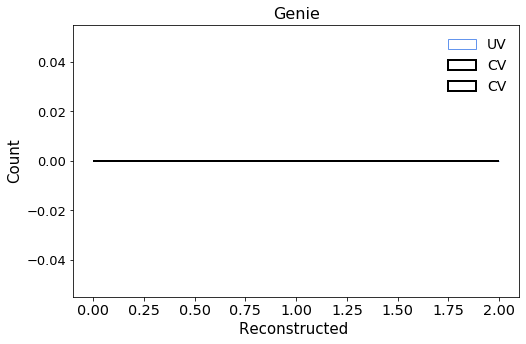

In [81]:
import matplotlib.pyplot as plt
import matplotlib


for j in range(len(detvar_dicts)):

    n=0
    #bin_centers = np.arange(1.25, 4.25, 0.5) #energy
    #bins = np.arange(1.0, 4.5, 0.5)
    #bin_centers = np.arange(-0.9, 1.1, 0.2) #Angle
    #bins = np.arange(-1, 1.2, 0.2)
    bin_centers = np.arange(0.125, 2.125, 0.25) #lepton
    bins = np.arange(0, 2.25, 0.25)
    print(bin_centers)
    print(bins)
    
    #OLD
    #bin_centers = np.arange(0.25, 5.25, 0.5)
    #bins = np.arange(0, 5.5, 0.5)
    print(bin_centers)
    print(bins)

    fig = plt.figure(figsize=(8, 5)) 


    for variation in detvar_dicts[j].keys(): 

        if n==0: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation], 
                 linewidth=1, color='cornflowerblue', label='UV')

        else: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation],
                 linewidth=1, color='cornflowerblue')

        n+=1   


    plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)

    current = (plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)[0])

    print(current)

    plt.title('Genie', fontsize=16)

    plt.ylabel('Count' , fontsize=15) # 2.68294E22
    plt.xlabel("Reconstructed ", fontsize=15)

    #plt.xticks(x_ticks, fontsize=13)
    plt.yticks(fontsize=13)

    plt.legend(frameon=False, fontsize=14)

    #plt.xlim(xlow, xhigh)


    plt.show()

In [82]:
#will need to edit this if batching

numu_nue_genie_detvar_dict = pd.DataFrame(detvar_dicts[0])
#print(nue_nue_ppfx_detvar_dict)

if isRun3 == False:
    #numu_nue_genie_detvar_dict.to_csv('numu_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    #numu_nue_genie_detvar_dict.to_csv('numu_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_'+ending+'.csv')
    numu_nue_genie_detvar_dict.to_csv('numu_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_'+ending+'.csv')
elif isRun3 == True:
    #numu_nue_genie_detvar_dict.to_csv('numu_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    #numu_nue_genie_detvar_dict.to_csv('numu_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_'+ending+'.csv')
    numu_nue_genie_detvar_dict.to_csv('numu_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_'+ending+'.csv')

In [83]:
masterlist = []
templist = []
for i in range((len(n_tots[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(n_tots)):
        templist.append(n_tots[j][i])
masterlist.append(templist)


masterlist.pop(0)
final_ns_numu_nue_genie = []

for a in range(len(masterlist)):
    #print(sum(masterlist[a]))
    final_ns_numu_nue_genie.append(sum(masterlist[a]))

final_ncvs_numu_nue_genie = sum(n_cv_tots)

##################################################

frames = []
for a in range(len(dfs_genie)):
    frames.append(dfs_genie[a][0])
    
    
total_genie_df = pd.concat(frames, ignore_index=True)
#print(total_genie_df)

#-----------------
frames2 = []
for b in range(len(df_genie_vars)):
    frames2.append(df_genie_vars[b][0])
    
    
total_genie_df_vars = pd.concat(frames2, ignore_index=False)
#print(total_genie_df_vars)

#-----------------
frames3 = []
for c in range(len(df_genie_splines)):
    frames3.append(df_genie_splines[c][0])
    
    
total_genie_df_splines = pd.concat(frames3, ignore_index=False)
#print(total_genie_df_splines)


In [84]:
if isRun3 == False:
    
    np.savetxt("numu_nue_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ns_numu_nue_genie[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ncvs_numu_nue_genie,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_genie_df.to_csv('numu_nue_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_genie_df_vars.to_csv('numu_nue_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_genie_df_splines.to_csv('numu_nue_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    
    """
    ###########################
    #####angleDiff###########
    ##########################

    np.savetxt("numu_nue_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ns_numu_nue_genie[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ncvs_numu_nue_genie,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_genie_df.to_csv('numu_nue_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_genie_df_vars.to_csv('numu_nue_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_genie_df_splines.to_csv('numu_nue_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    """
    """
    ###########################
    #####leptonMom###########
    ##########################

    np.savetxt("numu_nue_syserss_final_ns_genie_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ns_numu_nue_genie[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ncvs_numu_nue_genie,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_genie_df.to_csv('numu_nue_syserss_df_genie_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_genie_df_vars.to_csv('numu_nue_syserss_df_genie_vars_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_genie_df_splines.to_csv('numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    """
elif isRun3 == True:
    """
    np.savetxt("numu_nue_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ns_numu_nue_genie[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ncvs_numu_nue_genie,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_genie_df.to_csv('numu_nue_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_genie_df_vars.to_csv('numu_nue_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_genie_df_splines.to_csv('numu_nue_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    """
    """
    ###########################
    #####angleDiff###########
    ##########################

    np.savetxt("numu_nue_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ns_numu_nue_genie[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ncvs_numu_nue_genie,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_genie_df.to_csv('numu_nue_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_genie_df_vars.to_csv('numu_nue_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_genie_df_splines.to_csv('numu_nue_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    """
    
    ###########################
    #####leptonMom###########
    ##########################

    np.savetxt("numu_nue_syserss_final_ns_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ns_numu_nue_genie[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ncvs_numu_nue_genie,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_genie_df.to_csv('numu_nue_syserss_df_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_genie_df_vars.to_csv('numu_nue_syserss_df_genie_vars_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_genie_df_splines.to_csv('numu_nue_syserss_df_genie_splines_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    

In [85]:
#############################
##### weightsReint ###########
#############################

import syserr_batch_plotter_alex
import importlib
importlib.reload(syserr_batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = numu_nue.shape[0]
print("n_events here = ", n_events)
print("")
batch_size = n_events

n_cv_tots = []
n_tots = []
dfs_reint = []
df_reint_vars = []
df_reint_splines = []
detvar_dicts = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = numu_nue.iloc[start:end]

    samples = {
        "numu_nue": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 
        nueratio  = pot/2.37838e+22 
    elif isRun3 == True:
        pot =  5.014e20
        nueratio  = pot/2.5345e+22 
    
    weights = {
               "numu_nue"  : nueratio  * SPLIT * scaling 
    }


    my_plotter = syserr_batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)
    
    

    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"True Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Muon_Reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    VARIABLE, BINS, RANGE, XTIT = 'muon_mom',8,(0.0, 2.0),"Lepton Momentum (GeV)"
    
    #OLD
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"True Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'muon_mom',10,(0.0, 5.0),"Lepton Momentum (GeV)"


    n_cv_tot, n_tot, df_reint, df_reint_var, df_reint_spline, detvar_dict = my_plotter.plot_variable(
        VARIABLE,   
        query= NUMU_SEL_QUERY,
        currentsample = "numu_nue",
        typeerr = "standard",
        weight = "weightsReint",
        category_query = " ",
        Nuniverse=500,
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "weightSplineTimesTuneTimesPPFX",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:6]
    
    
    n_cv_tots.append(n_cv_tot)
    n_tots.append(n_tot)
    dfs_reint.append(df_reint)
    df_reint_vars.append(df_reint_var)
    df_reint_splines.append(df_reint_spline)
    detvar_dicts.append(detvar_dict)

n_events here =  400

1.0
1
{'numu_nue': 0.01978299467350562}
nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 and n_muons_tot > 0  and n_protons_tot > 0 and n_showers_contained==0  and contained_fraction> 0.95 and topological_score > 0.3 and muon_mom > 0.04 & muon_mom < 2.0 and targetP > 0.04 & targetP < 2.0& muon_mom <= 2 & muon_mom >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False

standard sys err
Universes 500
Empty DataFrame
Columns: []
Index: []
Returning
--------------------------

{'numu_nue': 0.01978299467350562}
nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 2

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0. 0. 0. 0. 0. 0. 0. 0.]


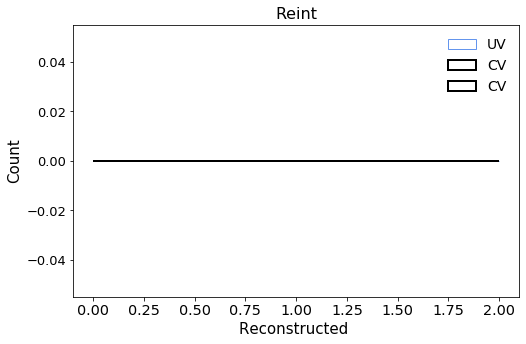

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0. 0. 0. 0. 0. 0. 0. 0.]


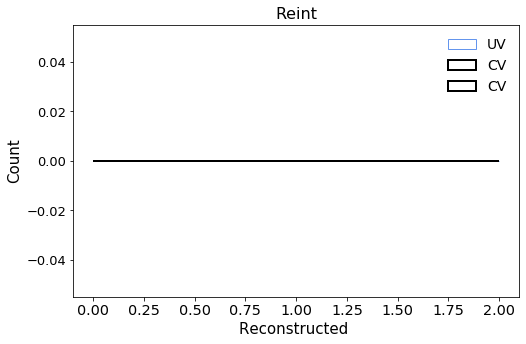

In [86]:
import matplotlib.pyplot as plt
import matplotlib


for j in range(len(detvar_dicts)):

    n=0
    #bin_centers = np.arange(1.25, 4.25, 0.5) #energy
    #bins = np.arange(1.0, 4.5, 0.5)
    #bin_centers = np.arange(-0.9, 1.1, 0.2) #Angle
    #bins = np.arange(-1, 1.2, 0.2)
    bin_centers = np.arange(0.125, 2.125, 0.25) #lepton
    bins = np.arange(0, 2.25, 0.25)
    print(bin_centers)
    print(bins)
    
    #OLD
    #bin_centers = np.arange(0.25, 5.25, 0.5)
    #bins = np.arange(0, 5.5, 0.5)
    print(bin_centers)
    print(bins)

    fig = plt.figure(figsize=(8, 5)) 


    for variation in detvar_dicts[j].keys(): 

        if n==0: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation], 
                 linewidth=1, color='cornflowerblue', label='UV')

        else: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation],
                 linewidth=1, color='cornflowerblue')

        n+=1   


    plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)

    current = (plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)[0])

    print(current)

    plt.title('Reint', fontsize=16)

    plt.ylabel('Count' , fontsize=15) # 2.68294E22
    plt.xlabel("Reconstructed ", fontsize=15)

    #plt.xticks(x_ticks, fontsize=13)
    plt.yticks(fontsize=13)

    plt.legend(frameon=False, fontsize=14)

    #plt.xlim(xlow, xhigh)


    plt.show()

In [87]:
#will need to edit this if batching

numu_nue_reint_detvar_dict = pd.DataFrame(detvar_dicts[0])
#print(nue_nue_ppfx_detvar_dict)

if isRun3 == False:
    #numu_nue_reint_detvar_dict.to_csv('numu_nue_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    #numu_nue_reint_detvar_dict.to_csv('numu_nue_syserss_df_reint_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_'+ending+'.csv')
    numu_nue_reint_detvar_dict.to_csv('numu_nue_syserss_df_reint_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_'+ending+'.csv')
elif isRun3 == True:
    #numu_nue_reint_detvar_dict.to_csv('numu_nue_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    #numu_nue_reint_detvar_dict.to_csv('numu_nue_syserss_df_reint_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_'+ending+'.csv')
    numu_nue_reint_detvar_dict.to_csv('numu_nue_syserss_df_reint_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_'+ending+'.csv')
  

In [88]:
masterlist = []
templist = []
for i in range((len(n_tots[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(n_tots)):
        templist.append(n_tots[j][i])
masterlist.append(templist)


masterlist.pop(0)
final_ns_numu_nue_reint = []

for a in range(len(masterlist)):
    #print(sum(masterlist[a]))
    final_ns_numu_nue_reint.append(sum(masterlist[a]))

final_ncvs_numu_nue_reint = sum(n_cv_tots)

###################################################

frames = []
for a in range(len(dfs_reint)):
    frames.append(dfs_reint[a][0])
    
    
total_reint_df = pd.concat(frames, ignore_index=True)
#print(total_reint_df)

#-----------------
frames2 = []
for b in range(len(df_reint_vars)):
    frames2.append(df_reint_vars[b][0])
    
    
total_reint_df_vars = pd.concat(frames2, ignore_index=False)
#print(total_reint_df_vars)

#-----------------
frames3 = []
for c in range(len(df_reint_splines)):
    frames3.append(df_reint_splines[c][0])
    
    
total_reint_df_splines = pd.concat(frames3, ignore_index=False)
#print(total_reint_df_splines)

In [89]:
if isRun3 == False:
    
    np.savetxt("numu_nue_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ns_numu_nue_reint[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ncvs_numu_nue_reint,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_reint_df.to_csv('numu_nue_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_reint_df_vars.to_csv('numu_nue_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_reint_df_splines.to_csv('numu_nue_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    
    """
    #############################
    #####angleDiff##########
    #######################
    
    np.savetxt("numu_nue_syserss_final_ns_reint_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ns_numu_nue_reint[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ncvs_numu_nue_reint,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_reint_df.to_csv('numu_nue_syserss_df_reint_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_reint_df_vars.to_csv('numu_nue_syserss_df_reint_vars_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_reint_df_splines.to_csv('numu_nue_syserss_df_reint_splines_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    """
    """
    #############################
    #####leptonMom##########
    #######################
    
    np.savetxt("numu_nue_syserss_final_ns_reint_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ns_numu_nue_reint[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ncvs_numu_nue_reint,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_reint_df.to_csv('numu_nue_syserss_df_reint_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_reint_df_vars.to_csv('numu_nue_syserss_df_reint_vars_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_reint_df_splines.to_csv('numu_nue_syserss_df_reint_splines_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    """
elif isRun3 == True:
    """
    np.savetxt("numu_nue_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ns_numu_nue_reint[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ncvs_numu_nue_reint,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_reint_df.to_csv('numu_nue_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_reint_df_vars.to_csv('numu_nue_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_reint_df_splines.to_csv('numu_nue_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    """
    """
    #############################
    #####angleDiff##########
    #######################
    
    np.savetxt("numu_nue_syserss_final_ns_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ns_numu_nue_reint[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ncvs_numu_nue_reint,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_reint_df.to_csv('numu_nue_syserss_df_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_reint_df_vars.to_csv('numu_nue_syserss_df_reint_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_reint_df_splines.to_csv('numu_nue_syserss_df_reint_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    """
    
    #############################
    #####leptonMom##########
    #######################
    
    np.savetxt("numu_nue_syserss_final_ns_reint_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ns_numu_nue_reint[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ncvs_numu_nue_reint,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_reint_df.to_csv('numu_nue_syserss_df_reint_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_reint_df_vars.to_csv('numu_nue_syserss_df_reint_vars_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_reint_df_splines.to_csv('numu_nue_syserss_df_reint_splines_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    


In [90]:
#############################
##### weightsNuMIGeo ###########   NUE
#############################

import syserr_batch_plotter_alex
import importlib
importlib.reload(syserr_batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = numu_nue.shape[0]
print("n_events here = ", n_events)
batch_size = n_events

n_cv_tots = []
n_tots = []
dfs_geo = []
df_geo_vars = []
df_geo_splines = []
detvar_dicts = []

print(n_events/batch_size)
print(int(n_events/batch_size)+1)

for i in range(int(n_events/batch_size)+1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = numu_nue.iloc[start:end]

    samples = {
        "numu_nue": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 
        nueratio  = pot/2.37838e+22 
    elif isRun3 == True:
        pot =  5.014e20
        nueratio  = pot/2.5345e+22 
    
    weights = {
               "numu_nue"  : nueratio  * SPLIT * scaling 
    }


    my_plotter = syserr_batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)
    
    

    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"Reco Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Muon_Reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    VARIABLE, BINS, RANGE, XTIT = 'muon_mom',8,(0.0, 2.0),"Lepton Momentum (GeV)"
    
    #OLD
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reco Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'muon_mom',10,(0.0, 5.0),"Lepton Momentum (GeV)"

    n_cv_tot, n_tot, df_geo, df_geo_var, df_geo_spline, detvar_dict = my_plotter.plot_variable(
        VARIABLE,   
        query= NUMU_SEL_QUERY,
        currentsample = "numu_nue",
        typeerr = "NuMIGeo",
        weight = "weightsGenie",
        category_query = " ",
        Nuniverse=10,
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "weightSplineTimesTuneTimesPPFX",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:6]
    
    
    n_cv_tots.append(n_cv_tot)
    n_tots.append(n_tot)
    dfs_geo.append(df_geo)
    df_geo_vars.append(df_geo_var)
    df_geo_splines.append(df_geo_spline)
    detvar_dicts.append(detvar_dict)

n_events here =  400
1.0
2
{'numu_nue': 0.01978299467350562}
nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 and n_muons_tot > 0  and n_protons_tot > 0 and n_showers_contained==0  and contained_fraction> 0.95 and topological_score > 0.3 and muon_mom > 0.04 & muon_mom < 2.0 and targetP > 0.04 & targetP < 2.0& muon_mom <= 2 & muon_mom >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False

NuMI Geo sys err
Number of variations Universes 10
Returning
--------------------------

{'numu_nue': 0.01978299467350562}
nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 and reco_nu_vtx_

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0. 0. 0. 0. 0. 0. 0. 0.]


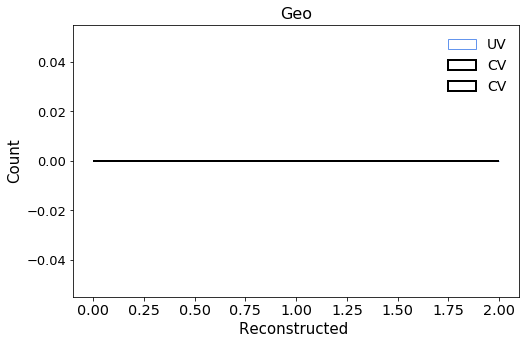

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0. 0. 0. 0. 0. 0. 0. 0.]


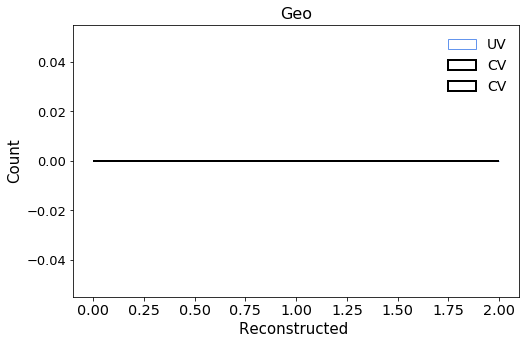

In [91]:
import matplotlib.pyplot as plt
import matplotlib


for j in range(len(detvar_dicts)):

    n=0
    #bin_centers = np.arange(1.25, 4.25, 0.5) #energy
    #bins = np.arange(1.0, 4.5, 0.5)
    #bin_centers = np.arange(-0.9, 1.1, 0.2) #Angle
    #bins = np.arange(-1, 1.2, 0.2)
    bin_centers = np.arange(0.125, 2.125, 0.25) #lepton
    bins = np.arange(0, 2.25, 0.25)
    print(bin_centers)
    print(bins)
    
    #OLD
    #bin_centers = np.arange(0.25, 5.25, 0.5)
    #bins = np.arange(0, 5.5, 0.5)
    print(bin_centers)
    print(bins)

    fig = plt.figure(figsize=(8, 5)) 


    for variation in detvar_dicts[j].keys(): 

        if n==0: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation], 
                 linewidth=1, color='cornflowerblue', label='UV')

        else: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation],
                 linewidth=1, color='cornflowerblue')

        n+=1   


    plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)

    current = (plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)[0])

    print(current)

    plt.title('Geo', fontsize=16)

    plt.ylabel('Count' , fontsize=15) # 2.68294E22
    plt.xlabel("Reconstructed ", fontsize=15)

    #plt.xticks(x_ticks, fontsize=13)
    plt.yticks(fontsize=13)

    plt.legend(frameon=False, fontsize=14)

    #plt.xlim(xlow, xhigh)


    plt.show()

In [92]:
#will need to edit this if batching

numu_nue_geo_detvar_dict = pd.DataFrame(detvar_dicts[0])
#print(nue_nue_ppfx_detvar_dict)

if isRun3 == False:
    #numu_nue_geo_detvar_dict.to_csv('numu_nue_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    #numu_nue_geo_detvar_dict.to_csv('numu_nue_syserss_df_geo_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_'+ending+'.csv')
    numu_nue_geo_detvar_dict.to_csv('numu_nue_syserss_df_geo_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_'+ending+'.csv')
elif isRun3 == True:
    #numu_nue_geo_detvar_dict.to_csv('numu_nue_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    #numu_nue_geo_detvar_dict.to_csv('numu_nue_syserss_df_geo_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_'+ending+'.csv')
    numu_nue_geo_detvar_dict.to_csv('numu_nue_syserss_df_geo_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_'+ending+'.csv')

In [93]:
masterlist = []
templist = []
for i in range((len(n_tots[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(n_tots)):
        templist.append(n_tots[j][i])
masterlist.append(templist)

#need to sum each part of the masterlist into one pair of arrays now
masterlist.pop(0)
final_ns_numu_nue_geo = []

for a in range(len(masterlist)):
    #print(sum(masterlist[a]))
    final_ns_numu_nue_geo.append(sum(masterlist[a]))

final_ncvs_numu_nue_geo = sum(n_cv_tots)
    
for x in range(len(final_ns_numu_nue_geo)):
    final_ns_numu_nue_geo[x] = np.concatenate((final_ns_numu_nue_geo[x][0], final_ns_numu_nue_geo[x][1]))
    
#############################################################
frames = []
for a in range(len(dfs_geo)):
    frames.append(dfs_geo[a][0])
    
    
total_geo_df = pd.concat(frames, ignore_index=True)
#print(total_geo_df)

#-----------------
frames2 = []
for b in range(len(df_geo_vars)):
    frames2.append(df_geo_vars[b][0])
    
    
total_geo_df_vars = pd.concat(frames2, ignore_index=False)
#print(total_geo_df_vars)

#-----------------
frames3 = []
for c in range(len(df_geo_splines)):
    frames3.append(df_geo_splines[c][0])
    
    
total_geo_df_splines = pd.concat(frames3, ignore_index=False)
#print(total_geo_df_splines)

In [94]:
if isRun3 == False:
    
    np.savetxt("numu_nue_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ns_numu_nue_geo,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_nue_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ncvs_numu_nue_geo,
               delimiter =", ", 
               fmt ='% s')

    #######################################################

    total_geo_df.to_csv('numu_nue_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_geo_df_vars.to_csv('numu_nue_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_geo_df_splines.to_csv('numu_nue_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    
    """
    ########################
    ####angleDiff##########
    #######################
    

    np.savetxt("numu_nue_syserss_final_ns_geo_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ns_numu_nue_geo,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_nue_syserss_final_ncvs_geo_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ncvs_numu_nue_geo,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_geo_df.to_csv('numu_nue_syserss_df_geo_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_geo_df_vars.to_csv('numu_nue_syserss_df_geo_vars_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_geo_df_splines.to_csv('numu_nue_syserss_df_geo_splines_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    """
    """
    ########################
    ####leptonMom##########
    #######################


    np.savetxt("numu_nue_syserss_final_ns_geo_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ns_numu_nue_geo,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_nue_syserss_final_ncvs_geo_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ncvs_numu_nue_geo,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_geo_df.to_csv('numu_nue_syserss_df_geo_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_geo_df_vars.to_csv('numu_nue_syserss_df_geo_vars_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_geo_df_splines.to_csv('numu_nue_syserss_df_geo_splines_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    """
elif isRun3 == True:
    """
    np.savetxt("numu_nue_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ns_numu_nue_geo,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_nue_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ncvs_numu_nue_geo,
               delimiter =", ", 
               fmt ='% s')

    #######################################################

    total_geo_df.to_csv('numu_nue_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_geo_df_vars.to_csv('numu_nue_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_geo_df_splines.to_csv('numu_nue_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    """
    """
    ########################
    ####angleDiff##########
    #######################
    

    np.savetxt("numu_nue_syserss_final_ns_geo_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ns_numu_nue_geo,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_nue_syserss_final_ncvs_geo_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ncvs_numu_nue_geo,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_geo_df.to_csv('numu_nue_syserss_df_geo_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_geo_df_vars.to_csv('numu_nue_syserss_df_geo_vars_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_geo_df_splines.to_csv('numu_nue_syserss_df_geo_splines_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    """
    
    ########################
    ####leptonMom##########
    #######################


    np.savetxt("numu_nue_syserss_final_ns_geo_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ns_numu_nue_geo,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_nue_syserss_final_ncvs_geo_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ncvs_numu_nue_geo,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_geo_df.to_csv('numu_nue_syserss_df_geo_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_geo_df_vars.to_csv('numu_nue_syserss_df_geo_vars_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_geo_df_splines.to_csv('numu_nue_syserss_df_geo_splines_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    
    

## NUMU_DIRT SAMPLE

In [5]:
# Name of the TTree in the PeLEE Ntuples
tree = "NeutrinoSelectionFilter"

#cut samples
#DRT  = '/pre_samp/neutrinoselection_filt_run1_dirt_overlay'        +ls.APPEND
#full sample
if isRun3 == False:
    DRT  = '/prodgenie_numi_uboone_overlay_dirt_fhc_mcc9_run1_v28_all_snapshot'  +ls.APPEND
elif isRun3 == True:
    DRT  = '/neutrinoselection_filt_run3b_dirt_overlay'  +ls.APPEND

#actually fetch datasets
numu_dirt  = uproot.open(ls.ntuple_path+DRT+".root")[ls.fold][tree]

# Define a list that contains the data sets
uproot_v = [numu_dirt]

numu_variables = [
        "nu_pdg", "slpdg", "backtracked_pdg", #"trk_score_v", "trk_pfp_id",
        "category", "ccnc", "swtrig_pre",
        "run","sub","evt", "contained_fraction",
        "CosmicIP","CosmicDirAll3D","CosmicIPAll3D",
        "flash_pe",
        "trk_llr_pid_score_v", # trk-PID score
        "_opfilter_pe_beam", "_opfilter_pe_veto", # did the event pass the common optical filter (for MC only)
        "reco_nu_vtx_sce_x","reco_nu_vtx_sce_y","reco_nu_vtx_sce_z",
        "nmuon", "n_showers_contained", "shr_tkfit_dedx_Y", "tksh_distance",
        "reco_e", "shr_energy_tot_cali", "trk_energy_tot",
        "nproton", "mc_pdg", "slnunhits", "slnhits", "true_e_visible",
        "npi0","npion","pion_e","muon_e","pi0truth_elec_etot",
        "pi0_e", "evnunhits", "nslice", "interaction",
        "slclustfrac", "reco_nu_vtx_x", "reco_nu_vtx_y", "reco_nu_vtx_z",
        "topological_score", "proton_e", "elec_e",
        "isVtxInFiducial", "trk_sce_end_x_v", "trk_sce_end_y_v", "trk_sce_end_z_v", "trk_sce_start_x_v",
        "trk_theta", "trk_phi", "trk_energy_muon", "trk_range_muon_mom_v", "trk_mcs_muon_mom_v"
        #"theta", # angle between incoming and outgoing leptons in radians
    ]


# These are examples of variables present in MC samples only
numu_varMC = ["nu_e", "true_pt","true_pt_visible","true_p","true_p_visible","true_nu_vtx_t","true_nu_vtx_x","true_nu_vtx_y","true_nu_vtx_z","true_nu_vtx_sce_x","true_nu_vtx_sce_y","true_nu_vtx_sce_z\
","true_nu_px","true_nu_py","true_nu_pz", "theta", "mc_pdg", "mc_px", "mc_py", "mc_pz"]


#make the list unique (sometimes you repeat the variable name in the list, this takes care of that)
numu_variables = list(set(numu_variables))
print(numu_variables)



# These weights are needed to correctly calculate the CV for the MC    
WEIGHTS     = ["weightSpline","weightTune","weightSplineTimesTune","ppfx_cv"]
# These weights are needed to calculate the Flux, GENIE and Geant4 Systematics. 
# For NuMI weightsFlux should always be 1 (cause that's relevant for BNB).
SYSTEMATICS = ['weightsFlux','weightsGenie','weightsReint'] 
PPFX        = ['weightsPPFX'] 



WEIGHTSLEE = ["weightSpline","weightTune","weightSplineTimesTune", "leeweight"]#, "weightsGenie", "weightsFlux", "weightsReint"]
MCFVARS    = ["mcf_nu_e","mcf_lep_e","mcf_actvol","mcf_nmm","mcf_nmp","mcf_nem","mcf_nep","mcf_np0","mcf_npp",
              "mcf_npm","mcf_mcshr_elec_etot","mcf_pass_ccpi0","mcf_pass_ncpi0",
              "mcf_pass_ccnopi","mcf_pass_ncnopi","mcf_pass_cccpi","mcf_pass_nccpi"]

['pion_e', 'tksh_distance', 'npi0', 'shr_tkfit_dedx_Y', 'pi0truth_elec_etot', 'reco_nu_vtx_y', 'reco_nu_vtx_x', 'elec_e', 'trk_sce_end_x_v', 'trk_sce_end_z_v', 'slpdg', 'ccnc', 'contained_fraction', 'n_showers_contained', 'mc_pdg', 'flash_pe', 'pi0_e', 'reco_nu_vtx_sce_y', 'trk_sce_start_x_v', 'nslice', 'CosmicIP', 'isVtxInFiducial', 'evnunhits', 'nproton', 'proton_e', 'trk_sce_end_y_v', 'category', 'trk_llr_pid_score_v', 'trk_mcs_muon_mom_v', 'shr_energy_tot_cali', '_opfilter_pe_veto', 'trk_energy_tot', 'evt', 'slclustfrac', 'nmuon', 'reco_nu_vtx_sce_x', 'true_e_visible', 'npion', 'reco_nu_vtx_sce_z', 'nu_pdg', 'CosmicDirAll3D', 'swtrig_pre', 'slnunhits', 'trk_phi', 'reco_nu_vtx_z', 'muon_e', 'trk_range_muon_mom_v', 'run', 'trk_energy_muon', 'sub', 'interaction', 'reco_e', 'backtracked_pdg', 'CosmicIPAll3D', 'topological_score', 'slnhits', 'trk_theta', '_opfilter_pe_beam']


In [6]:
import time
s = time.time()

import pandas as pandas

dirt_var = numu_variables + numu_varMC + WEIGHTS + SYSTEMATICS + PPFX

# This needs modifications (add variables from above)
uproot_v = [numu_dirt] 
var_v    = [dirt_var] 



for ii, CV in enumerate(uproot_v):
    print("1")
    CVDF  = CV.pandas.df(var_v[ii], flatten=False)
    print()
    print("2")
    load_data_run123.process_uproot_numu(CV,CVDF)
    print("3")
    if ii == 0:
        print("4")
        numu_dirt =  CVDF

s2 = time.time()

print("runtime = ", s2-s)
#Approx 5 mins

1

2
trk_llr_pid_v  [[] [] [0.9629669 0.92838156 0.5586327] ... [] [] []]
trk_score_v  [[] [] [0.9999977 0.99987674 0.92631394] ... [] [] []]
Here:
trk_range_muon_mom_v  [[] [] [0.45959798 0.26267546 0.12103449] ... [] [] []]
trk_mcs_muon_mom_v  [[] [] [0.79999506 0.44799778 1.8220291] ... [] [] []]


/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/awkward/array/jagged.py:1557: RuntimeWarning: overflow encountered in reduceat
  out = ufunc.reduceat(content, awkward.util.windows_safe(nonterminal))[:len(out)]
/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/awkward/array/jagged.py:1043: RuntimeWarning: overflow encountered in power
  result = getattr(ufunc, method)(*inputs, **kwargs)


3
4
runtime =  87.78911685943604


In [7]:
df_v = [numu_dirt]

#removeGenieTune = False
for i,df in enumerate(df_v):
    df[ 'currentweightsafe' ] = df['weightSplineTimesTune']
    df[ 'currentweight' ] = df['weightSplineTimesTune']

In [8]:
df_v = [numu_dirt]
for i,df in enumerate(df_v):  
    df["bnbdata"] = np.zeros_like(df["isVtxInFiducial"])
    df["extdata"] = np.zeros_like(df["isVtxInFiducial"])

In [9]:
numu_dirt.query("nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) \
and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 \
and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 \
and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 \
and n_muons_tot > 0 and n_protons_tot > 0 and n_showers_contained == 0", inplace=True)


In [10]:
s = time.time()

df_v = [numu_dirt]
#removeGenieTune = False
for i,df in enumerate(df_v):
    df.loc[ df['weightTune'] <= 0, 'weightTune' ] = 1.
    df.loc[ df['weightTune'] == np.inf, 'weightTune' ] = 1.
    df.loc[ df['weightTune'] > 100, 'weightTune' ] = 1.
    df.loc[ np.isnan(df['weightTune']) == True, 'weightTune' ] = 1.    
    
    df.loc[ df['weightSplineTimesTune'] <= 0, 'weightSplineTimesTune' ] = 1.
    df.loc[ df['weightSplineTimesTune'] == np.inf, 'weightSplineTimesTune' ] = 1.
    df.loc[ df['weightSplineTimesTune'] > 100, 'weightSplineTimesTune' ] = 1.
    df.loc[ np.isnan(df['weightSplineTimesTune']) == True, 'weightSplineTimesTune' ] = 1. 
    df[ 'weightSplineTimesTuneTimesPPFX' ] = df[ 'weightSplineTimesTune' ]*df['ppfx_cv']
    
    df.loc[ df['weightSpline'] <= 0, 'weightSpline' ] = 1.
    df.loc[ df['weightSpline'] == np.inf, 'weightSpline' ] = 1.
    df.loc[ df['weightSpline'] > 100, 'weightSpline' ] = 1.
    df.loc[ np.isnan(df['weightSpline']) == True, 'weightSpline' ] = 1. 
    df[ 'weightSplineTimesPPFX' ]  = df[ 'weightSpline' ]*df['ppfx_cv']
    
    
     # Cray cray weight fix
    for ievt in range(df.shape[0]):
        reweightCondition = ((df['weightsGenie'].iloc[ievt] > 3000) | (df['weightsGenie'].iloc[ievt] < 0)  | 
                             (df['weightsGenie'].iloc[ievt] == np.inf))
        df['weightsGenie'].iloc[ievt][ reweightCondition ] = 1.
    
    
s2 = time.time()
print("runtime = ", s2-s)
#Run1 = 
#Run3 = 

runtime =  0.1426677703857422


In [11]:
if isRun3 == False:
    beamon_pot = 2.0E20 #v5
    dirt_pot =  1.42143e+21
    scalingDRT = 0.35
elif isRun3 == True:
    beamon_pot = 5.014E20
    dirt_pot =  1.03226e+21
    scalingDRT = 0.45    

numu_dirt['pot_scale'] = (beamon_pot/dirt_pot)*scalingDRT

In [12]:
numu_dirt['totweight_data'] = numu_dirt['pot_scale']*numu_dirt['weightSplineTimesTuneTimesPPFX']
print(numu_dirt['totweight_data'])

entry
7650      0.224330
8478      0.114870
8927      0.238394
9613      0.255724
15978     0.239481
            ...   
378717    0.239265
380638    0.233486
385804    0.230127
385999    0.224515
386437    0.202241
Name: totweight_data, Length: 197, dtype: float64


In [13]:
df_v = [numu_dirt]
#removeGenieTune = False
for i,df in enumerate(df_v):
    df[ 'currentweight' ] = df['weightSplineTimesTuneTimesPPFX']
    df[ 'currentweightsafe' ] = df['weightSplineTimesTuneTimesPPFX']
    df[ 'currentweightsafe2' ] = df['weightSplineTimesTuneTimesPPFX']
    df[ 'currentweight2' ] = df['weightSplineTimesTuneTimesPPFX']

In [14]:
df_v = [numu_dirt]
#removeGenieTune = False
for i,df in enumerate(df_v):
    df[ 'noW' ] = 1

In [15]:
s = time.time()

def energyToPxyz(energy, theta, phi, mask, mass = 0.93827208816):
    if all(~mask):
        return (0.,0.,0.)
    energy = energy.copy()[mask]
    theta  = theta.copy()[mask]
    phi    = phi.copy()[mask]
    
    p  = np.sqrt((energy+mass)*(energy+mass) - mass*mass)
    pz = p*np.cos(theta)
    px = p*np.sin(theta)*np.cos(phi)
    py = p*np.sin(theta)*np.sin(phi)
    return( px.sum(), py.sum(), pz.sum())



for i,df in enumerate(df_v):
    up = uproot_v[i]
    trk_theta_proton_v  = up.array('trk_theta_v')
    trk_phi_proton_v    = up.array('trk_phi_v')
    trk_energy_proton_v = up.array('trk_energy_proton_v')
    ############ muon part
    mu_px_v            = up.array('shr_px')
    mu_py_v            = up.array('shr_py')
    mu_pz_v            = up.array('shr_pz')
    pt_v                = up.array('pt')
    trk_score_v         = up.array('trk_score_v')    
    trk_llr_pid_v       = up.array('trk_llr_pid_score_v')
    
    
    #shr_mask = (trk_score_v<0.5)
    trk_mask      = (trk_score_v>0.5)
    proton_mask_v = (trk_score_v>0.5)&(trk_llr_pid_v < 0.)
    sillyCount = 0
    listPx,listPy,listPz = [],[],[]
    
    for mask, theta_t, phi_t, energy_t,proton_mask_v_t,sx,sy,sz,pttt  in zip(proton_mask_v, trk_theta_proton_v,trk_phi_proton_v, trk_energy_proton_v,proton_mask_v, mu_px_v,mu_py_v,mu_pz_v,pt_v):
        tempMom = energyToPxyz(energy_t,theta_t,phi_t,proton_mask_v_t) 
        nu_reco_px = tempMom[0] + sx 
        nu_reco_py = tempMom[1] + sy  
        nu_reco_pz = tempMom[2] + sz  
        listPx.append(nu_reco_px)
        listPy.append(nu_reco_py)
        listPz.append(nu_reco_pz)

s2 = time.time()

print("runtime = ", s2-s)

runtime =  3.7163407802581787


In [16]:
#numu_dirt["is_signal"]   = numu_dirt["category"] == 2
#print(numu_mc["is_signal"])

In [17]:
from scipy.spatial.transform import Rotation as R
from numpy import arccos, array
from numpy.linalg import norm

# Note: returns angle in radians
def theta(v, w): return arccos(v.dot(w)/(norm(v)*norm(w)))* 180 / 3.1415926

def GetNuMIAngle( px,  py,  pz):
    r = R.from_matrix([[0.92103853804025681562   , 0.022713504803924120662, 0.38880857519374290021  ],
                       [4.6254001262154668408e-05, 0.99829162468141474651 , -0.058427989452906302359],
                       [-0.38947144863934973769  , 0.053832413938664107345, 0.91946400794392302291  ]])  
    r = r.inv()
    beamCoords = r.apply([px,  py,  pz])
    beamDir    = [0,0,1]
    #print(theta(beamCoords,beamDir))
    return theta(beamCoords,beamDir)

def GetNuMIAnglePol( phiBNB,  thetaBNB):
    px = math.sin(thetaBNB)*math.cos(phiBNB)
    py = math.sin(thetaBNB)*math.sin(phiBNB)
    pz = math.cos(thetaBNB)
    return GetNuMIAngle( px,  py,  pz)

In [18]:
def vectorFromNuMITarget(vtxX,  vtxY, vtxZ):
    numiTarget      = np.array([-31387.58422, -3316.402543, -60100.2414])
    nuInteraction   = np.array([vtxX,  vtxY, vtxZ])
    directionVector = nuInteraction - numiTarget
    return directionVector

def angleFromNuMITarget(vtxX,  vtxY, vtxZ, thetaBNB, phiBNB):
    v1 = vectorFromNuMITarget(vtxX,  vtxY, vtxZ)  
    norm = np.linalg.norm(v1)
    v1 = v1/norm
    v2 = [np.cos(phiBNB)*np.sin(thetaBNB),np.sin(phiBNB)*np.sin(thetaBNB), np.cos(thetaBNB) ]
    dot_product = np.dot(v1, v2)
    angle = np.arccos(dot_product)
    return angle #dot_product # angle*180/3.14159265



angleFromNuMITarget(1,1,1,1.4,3.)

1.8690124908136228

In [19]:
#df_v = [numu_dirt]
    
#use first value - from looking at the trk_start and nu_reco_vtx values, this should be the muon
#for i,df in enumerate(df_v):
#    print(df["n_muons_tot"])

In [20]:
#numu_dirt.query("nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > -1.55 and reco_nu_vtx_sce_x < 254.8  and reco_nu_vtx_sce_y > -116.5 and reco_nu_vtx_sce_y < 116.5  and reco_nu_vtx_sce_z > 0 and reco_nu_vtx_sce_z < 1036.8 and n_muons_tot > 0 and n_protons_tot > 0 and n_pions_tot == 0 and n_showers_contained==0", inplace=True)

In [21]:
#RECO VARIABLE
s = time.time()

print(df["trk_sce_end_z_v"])

for i,df in enumerate(df_v):
    df["muon_mom"] = df["trk_sce_end_z_v"].copy()
    for j, row in df.iterrows():
        if (len(row["muon_mom"]) !=0 ) and (df["trk_sce_end_z_v"][j][0] < 1036.8 and df["trk_sce_end_z_v"][j][0] > 0 and df["trk_sce_end_y_v"][j][0] < 116.5 and df["trk_sce_end_y_v"][j][0] > -116.5 and df["trk_sce_end_x_v"][j][0] < \
         254.8 and df["trk_sce_end_x_v"][j][0] > -1.55):
            df.loc[j, "muon_mom"] = df["trk_range_muon_mom_v"][j][0]
        elif (len(row["muon_mom"]) == 0 ):
            df.loc[j, "muon_mom"] = 0
        else:
            df.loc[j, "muon_mom"] = df["trk_mcs_muon_mom_v"][j][0]  #mcs == multiple coulob scattering
        
print(df["muon_mom"])
print("")
s2 = time.time()
print("runetime = ", s2-s)

entry
7650               [581.8682, 739.2125, 682.2495, 759.0433]
8478                        [807.88855, 733.0813, 730.8786]
8927                                   [657.993, 953.78735]
9613                                 [258.44122, 270.92087]
15978                      [477.43127, 473.01108, 499.0474]
                                ...                        
378717                      [519.8196, 461.6878, 441.76736]
380638    [133.13705, 196.14612, 183.30785, 163.12128, 1...
385804                                 [335.781, 238.94604]
385999                                 [678.1159, 653.0767]
386437                       [772.0892, 692.7137, 700.4183]
Name: trk_sce_end_z_v, Length: 197, dtype: object
entry
7650      0.472623
8478      0.328091
8927      0.282414
9613      0.232984
15978     0.364421
            ...   
378717    0.440944
380638    0.499997
385804    0.409488
385999    0.283428
386437    0.524553
Name: muon_mom, Length: 197, dtype: object

runetime =  0.40710139274

In [22]:
#RECO VARIABLE
#in this we use the NEUTRINO VERTEX and the MUON PHI/THETA and will get the ANGLE BETWEEN THEM

for i,df in enumerate(df_v):
    df['nu_Angle_Numi_Muon_Reco'] = df.apply( lambda x: angleFromNuMITarget(x['reco_nu_vtx_sce_x'],x['reco_nu_vtx_sce_y'],x['reco_nu_vtx_sce_z'], x['trk_theta'],x['trk_phi']) , axis=1)
    df['cosNu_Angle_Numi_Muon_Reco'] = np.cos(df['nu_Angle_Numi_Muon_Reco'])

In [23]:
#TRUE VARIABLE
s = time.time()

for i,df in enumerate(df_v):
    df["muon_px"] = df["ccnc"].copy()
    df["muon_py"] = df["ccnc"].copy()
    df["muon_pz"] = df["ccnc"].copy()
    for j, row in df.iterrows():
        pdg_vector = df["mc_pdg"].loc[j][0]
        px_vector = df["mc_px"].loc[j]
        py_vector = df["mc_py"].loc[j]
        pz_vector = df["mc_pz"].loc[j]
        result = np.where(pdg_vector==13)[0]
        if np.size(result):
            df.loc[j, "muon_px"] = px_vector[result][0]
            df.loc[j, "muon_py"] = py_vector[result][0]
            df.loc[j, "muon_pz"] = pz_vector[result][0]   
            
    #print(df["muon_px"])

print("")    
print("==========================")
s2 = time.time()
print("runetime = ", s2-s)


runetime =  0.3211371898651123


In [24]:
#TRUE VARIABLE
#in this we use the NEUTRINO VERTEX and the MUON PHI/THETA and will get the ANGLE BETWEEN THEM

for i,df in enumerate(df_v):
    df['targetP']     = np.sqrt(df['muon_px']*df['muon_px'] + df['muon_py']*df['muon_py'] + df['muon_pz']*df['muon_pz'])
    df['targetPt']    = np.sqrt(df['muon_px']*df['muon_px'] + df['muon_py']*df['muon_py'])
    df['targetTheta'] = np.arccos(df['muon_pz']/df['targetP'] )
    df['targetPhi']   = np.arctan2(df['muon_py'],df['muon_px'])
    df['nu_Angle_Numi_Muon'] = df.apply( lambda x: angleFromNuMITarget(x['true_nu_vtx_sce_x'],x['true_nu_vtx_sce_y'],x['true_nu_vtx_sce_z'], x['targetTheta'],x['targetPhi']) , axis=1)
    df['cosNu_Angle_Numi_Muon'] = np.cos(df['nu_Angle_Numi_Muon'])

In [25]:
numu_dirt   = numu_dirt.query('nu_e > 0.')

# Calculate the true neutrino direction off of the NuMI beam, needed for plotting. Seem to be from MC
dfmc_v = [numu_dirt]
for i,df in enumerate(dfmc_v):
    df['numi_nu_true_Angle'] = df.apply( lambda x: GetNuMIAngle(x['true_nu_px'],x['true_nu_py'],x['true_nu_pz']) , axis=1)
    df['weightsNuMIGeo']     = df.apply( lambda x: numiBeamlineGeoWeights.calculateGeoWeight(x['nu_pdg'],x['nu_e'],x['numi_nu_true_Angle']) , axis=1)

In [119]:
#teleporttohere

#ending = "Sept19_rebinned"
ending = "Sept19"

df_v = [numu_dirt]

for i,df in enumerate(dfmc_v):

    df['is_signal'] = np.where( (df.swtrig_pre==1) & (df.cosNu_Angle_Numi_Muon>-1.0) & (df.cosNu_Angle_Numi_Muon <1.0) & (df.cosNu_Angle_Numi_Muon_Reco>-1.0) & (df.cosNu_Angle_Numi_Muon_Reco <1.0)
                                 & (df.nu_pdg==14) & (df.ccnc==0) & (df.nproton>0) & (df.npion==0) & (df.npi0==0)
                                 & (10 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 246)
                                 & (-106 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 106)
                                 & (10 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1026), True, False)

    df.loc[ (df['is_signal']== True), 'category' ] = 1
    
#if energy add & (df.true_e>1.0) & (df.true_e <4.0) & (df.reco_e>1.0) & (df.reco_e <4.0)
#if angle add (df.cosNu_Angle_Numi_Muon>-1.0) & (df.cosNu_Angle_Numi_Muon <1.0) & (df.cosNu_Angle_Numi_Muon_Reco>-1.0) & (df.cosNu_Angle_Numi_Muon_Reco <1.0)
#if lepton momemtum add (df.targetP>0.04) & (df.targetP <2.0) & (df.muon_mom >0.04) & (df.muon_mom <2.0)

#OLD
#if energy add & (df.true_e>0.04) & (df.true_e <5) & (df.reco_e>0.04) & (df.reco_e <5)
#if lepton momemtum add (df.targetP>0.04) & (df.targetP <5) & (df.muon_mom >0.04) & (df.muon_mom <5)

In [120]:
#New categories

for i,df in enumerate(df_v):
            
    #df.loc[ (df['is_signal']== True), 'category' ] = 1
    #df["in_fv_query"] = np.where((10 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 246)
    #                             & (-106 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 106)
    #                             & (10 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1026), True, False)
    df["in_fv_query"] = np.where((10 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 246)
                                 & (-106 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 106)
                                 & (10 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1026), True, False)
    df["out_fv_query"] = np.where( (df.swtrig_pre==1)&(df.in_fv_query==False), True, False)
    df.loc[ (df['out_fv_query']== True), 'category' ] = 2
    
    df["nue_CC_Npi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==12) & (df.ccnc==0) & (df.npi0>=1), True, False)
    df.loc[ (df['nue_CC_Npi0']== True), 'category' ] = 3
    df["nue_CC_0pi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==12) & (df.ccnc==0) & (df.npi0==0), True, False)
    df.loc[ (df['nue_CC_0pi0']== True), 'category' ] = 4
    
    df["nue_NC_Npi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==12) & (df.ccnc==1) & (df.npi0>=1), True, False)
    df.loc[ (df['nue_NC_Npi0']== True), 'category' ] = 5
    df["nue_NC_0pi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==12) & (df.ccnc==1) & (df.npi0==0), True, False)
    df.loc[ (df['nue_NC_Npi0']== True), 'category' ] = 6
    
    df["numubar_1eNp"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (df.nu_pdg==-14) & (df.ccnc==0) & (df.nproton>0) & (df.npion==0) & (df.npi0==0), True, False)
    df.loc[ (df['numubar_1eNp']== True), 'category' ] = 7
    df["numu_NC"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==1), True, False)
    df.loc[ (df['numu_NC']== True), 'category' ] = 8
    df["numu_CCother"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==0) & (df.is_signal==False) , True, False)
    df.loc[ (df['numu_CCother']== True), 'category' ] = 9
    
    # less specific categories 
    df["numu_other"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (df.is_signal==False)& (df.numubar_1eNp==False) & (df.numu_NC==False) & (df.numu_CCother==False) , True, False)
    df.loc[ (df['numu_other']== True), 'category' ] = 10
    df["nue_Npi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) &  (abs(df.nu_pdg==12)) & (df.npi0>=1), True, False)
    df.loc[ (df['nue_Npi0']== True), 'category' ] = 11
    df["nue_0pi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg==12)) &  (df.npi0==0), True, False)
    df.loc[ (df['nue_0pi0']== True), 'category' ] = 12
    
    df["unknown"] = np.where((df.is_signal==False) & (df.out_fv_query==False) & (df.nue_CC_Npi0==False)
                             & (df.nue_CC_0pi0==False) & (df.nue_NC_Npi0==False) & (df.nue_NC_0pi0==False)
                             & (df.numubar_1eNp==False) & (df.numu_NC==False) & (df.numu_CCother==False)
                             & (df.numu_other==False) & (df.nue_Npi0==False) & (df.nue_0pi0==False), True, False)
    df.loc[ (df['unknown']== True), 'category' ] = 0

Set up complete.

In [121]:
import batch_plotter_alex
import importlib
importlib.reload(batch_plotter_alex)
scaling = 1


samples = {
    "numu_dirt"  : numu_dirt
}

scaling = 1
SPLIT = 1.0

if isRun3 == False:
    pot       =  2e+20
    dirtratio = pot/1.42143e+21
    scalingDRT = 0.65 #0.35
elif isRun3 == True:
    pot       =  5.014e+20
    dirtratio = pot/1.03226e+21
    scalingDRT = 0.45   

weights = {  "numu_dirt": dirtratio* SPLIT * scalingDRT,  
}

my_plotter = batch_plotter_alex.Plotter(samples, weights, pot=pot)
print(weights)

{'numu_dirt': 0.21857865266502624}


In [122]:
NUMU_SEL_QUERY = "nslice == 1 and ( (_opfilter_pe_beam > 0 \
and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) \
and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 \
and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 \
and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 \
and n_muons_tot > 0 and n_protons_tot > 0 and n_showers_contained==0  \
and contained_fraction> 0.95 and topological_score >0.3"
#ENERGY
#NUMU_SEL_QUERY += ' and reco_e > 1.0 and reco_e < 4.0'
#NUMU_SEL_QUERY += ' and true_e > 1.0 and true_e < 4.0'
#ANGLE
NUMU_SEL_QUERY += ' and cosNu_Angle_Numi_Muon_Reco >-1.0 and cosNu_Angle_Numi_Muon_Reco <1.0'
NUMU_SEL_QUERY += ' and cosNu_Angle_Numi_Muon >-1.0 and cosNu_Angle_Numi_Muon <1.0'
#LEPTON MOM
#NUMU_SEL_QUERY += ' and muon_mom > 0.04 & muon_mom < 2.0'
#NUMU_SEL_QUERY += ' and targetP > 0.04 & targetP < 2.0'

#OLD
#ENERGY
#NUMU_SEL_QUERY += ' and reco_e > 0.04 and reco_e < 5'
#NUMU_SEL_QUERY += ' and true_e > 0.04 and true_e < 5'
#LEPTON MOM
#NUMU_SEL_QUERY += ' and muon_mom > 0.04 & muon_mom < 5'
#NUMU_SEL_QUERY += ' and targetP > 0.04 & targetP < 5'

#ending = "Sept19_03"

SIGNAL_NUMU_SEL_QUERY = NUMU_SEL_QUERY
SIGNAL_NUMU_SEL_QUERY += ' and is_signal==True'

NOT_SIGNAL_NUMU_SEL_QUERY = NUMU_SEL_QUERY
NOT_SIGNAL_NUMU_SEL_QUERY += ' and is_signal==False'

n_events here =  197

1.0
1
{'numu_dirt': 0.21857865266502624}
nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 and n_muons_tot > 0 and n_protons_tot > 0 and n_showers_contained==0  and contained_fraction> 0.95 and topological_score >0.3 and muon_mom > 0.04 & muon_mom < 2.0 and targetP > 0.04 & targetP < 2.0& muon_mom <= 2 & muon_mom >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False 
 numu_dirt
--------------------------------------
current sample is:  numu_dirt
current_total  0.7782012659591793
0.778201265959179266928913420997560024261474609375000000000000000000000000000
---------------------------STILL TOGETHER HERE--------------------------------
current_total  0.77820126

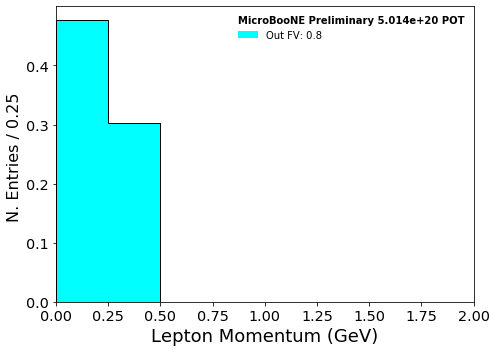

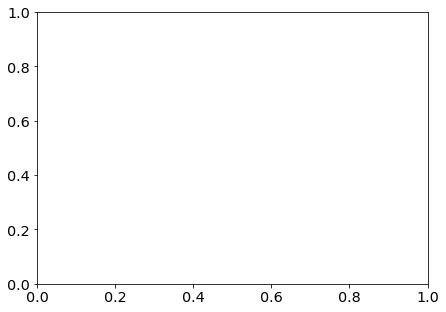

In [75]:
import batch_plotter_alex
import importlib
importlib.reload(batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = numu_dirt.shape[0]
print("n_events here = ", n_events)
print("")
#batch_size = 40000
batch_size = n_events

varss = []
weightss = []
labss = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = numu_dirt.iloc[start:end]

    samples = {
        "numu_dirt": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 #partial file: 8.885e+19
        dirtratio = pot/1.42143e+21
        scalingDRT = 0.65
    elif isRun3 == True:
        pot =  5.014e+20
        dirtratio = pot/1.03226e+21
        scalingDRT = 0.45

    # NUE
    weights = { #full sample mc = 0.38
                "numu_dirt": dirtratio* SPLIT * scalingDRT,
    }


    my_plotter = batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)


    #Now check on a variable
    #Remember to change the plotter keys between truth and mc
    

    #VARIABLE, BINS, RANGE, XTIT = 'reco_nu_vtx_sce_x',60,(-20.0, 280.0),"Vertex X [cm]"
    #VARIABLE, BINS, RANGE, XTIT = 'reco_nu_vtx_sce_y',56,(-140.0, 140.0),"Vertex Y [cm]"
    #VARIABLE, BINS, RANGE, XTIT = 'reco_nu_vtx_sce_z',56,(-10.0, 1110.0),"Vertex Z [cm]"
    #VARIABLE, BINS, RANGE, XTIT = 'n_muons_tot',5,(0, 5),"Number of Muons"
    #VARIABLE, BINS, RANGE, XTIT = 'n_protons_tot',5,(0, 5),"Number of Protons"
    #VARIABLE, BINS, RANGE, XTIT = 'n_showers_contained',5,(0, 5),"Number of Contained Showers"
    #VARIABLE, BINS, RANGE, XTIT = 'contained_fraction',20,(0, 1),"Contained Fraction"
    #VARIABLE, BINS, RANGE, XTIT = 'topological_score',20,(0, 1),"Topological Score"
    #VARIABLE, BINS, RANGE, XTIT = 'trk_llr_pid_score_v',40,(-1.0, 1.0),"LLR PID Score"
    
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Muon_Reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    VARIABLE, BINS, RANGE, XTIT = 'muon_mom',8,(0.0, 2.0),"Lepton Momentum (GeV)"
    
    #OLD
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'muon_mom',10,(0.0, 5.0),"Lepton Momentum (GeV)"
    

    var, weight, label = my_plotter.plot_variable(
        VARIABLE,
        query= NUMU_SEL_QUERY,
        #query= "",
        currentsample = "numu_dirt",
        kind="event_category",
        #kind="psrticle_pdg",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "weightSplineTimesTuneTimesPPFX",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:3]
    
    varss.append(var)
    weightss.append(weight)
    labss.append(label)

No handles with labels found to put in legend.


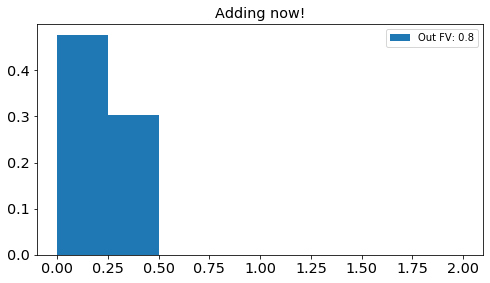

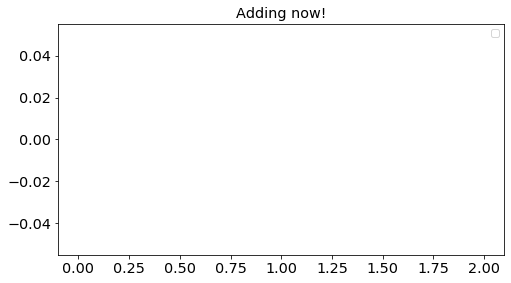

In [76]:
from matplotlib import gridspec

for i in range(int(n_events/batch_size)+1):
    numu_fig = plt.figure(figsize=(8, 7))
    numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
    numu_ax1 = plt.subplot(numu_gs[0])
    #numu_ax1.set_xlim([0, 5])    #TrueE, lepton mom
    #numu_ax1.set_xlim([-1, 1])    #AngleDiff
    
    #print(varss)

    numu_stacked = numu_ax1.hist(
                varss[i].values(),
                weights=list(weightss[i].values()),
                stacked=True,
                label=labss[i],
                bins=BINS,
                range=RANGE)
    
    plt.title("Adding now!")
    plt.legend()

In [77]:
def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)

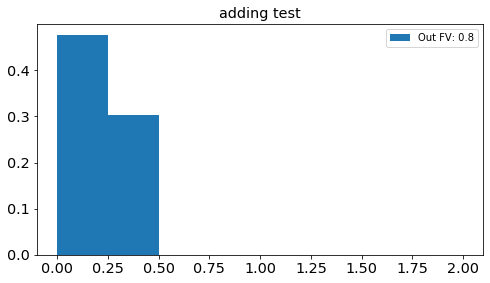

In [78]:
category_labels = {
    1 : r'$\nu_\mu$ CC0$\pi$Np', 
    2 : r'Out FV',
    3 : r'$\nu_e$ CC $\pi^{0}$',
    4 : r'$\nu_e$ CC',
    5 : r'$\nu_e$ NC $\pi^{0}$',
    6 : r'$\nu_e$ NC',
    7 : r'$\bar{\nu}_\mu$ CC0$\pi$Np',
    8: r'$\nu_\mu$ NC',
    9: r'$\nu_\mu$ CC other',
    10 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other', 
    11 : r'$\nu_\mu$ / $\overline{\nu_e}$  $\pi^{0}$', 
    12 : r'$\nu_\mu$ / $\overline{\nu_e}$  other',
    0: r'Unknown'
}


labels = [
            "%s: %.1f" % (category_labels[c], sum(weightss_tot[0][c])) \
            if sum(weightss_tot[0][c]) else ""
            for c in varss[0].keys()
        ]


numu_fig = plt.figure(figsize=(8, 7))
numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_ax1 = plt.subplot(numu_gs[0])

#TrueE, LeptonMom
#numu_ax1.set_xlim([0, 5])
#numu_ax1.set_ylim([0, 30])

##AngleDiff
#nue_ax1.set_xlim([-1, 1])
#nue_ax1.set_ylim([0, 15])

numu_stacked = numu_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)

plt.title("adding test")
plt.legend()

In [79]:
import importlib
import Plotter_Functions_Alex
importlib.reload(Plotter_Functions_Alex)
from Plotter_Functions_Alex import getWantedLists
importlib.reload(getWantedLists)

#print(nue_stacked)

wanted_key = 0

numu_wanted_list = Plotter_Functions_Alex.getWantedLists.getWantedLists(wanted_key, numu_stacked)

print(numu_wanted_list)

[]

SUMS
[]
[]

Wanted List:
[]

[]


In [80]:
vars_tot_df = pd.DataFrame.from_dict(varss_tot)
weights_tot_df = pd.DataFrame.from_dict(weightss_tot)

#ending = "Sept19_TrueAngleDiff"
#ending = "Sept19_TrueLeptonMom"

if isRun3 == False:
    ######full true
    vars_tot_df.to_csv('numu_dirt_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    weights_tot_df.to_csv('numu_dirt_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    ########angleDiff
    #vars_tot_df.to_csv('numu_dirt_varstot_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    #weights_tot_df.to_csv('numu_dirt_weightstot_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    ########leptonMom
    #vars_tot_df.to_csv('numu_dirt_varstot_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    #weights_tot_df.to_csv('numu_dirt_weightstot_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
elif isRun3 == True:
    ######full true
    #vars_tot_df.to_csv('numu_dirt_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    #weights_tot_df.to_csv('numu_dirt_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    ########angleDiff
    #vars_tot_df.to_csv('numu_dirt_varstot_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    #weights_tot_df.to_csv('numu_dirt_weightstot_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    ########leptonMom
    vars_tot_df.to_csv('numu_dirt_varstot_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    weights_tot_df.to_csv('numu_dirt_weightstot_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')


### Stat Err

In [123]:
#numudirtstat 

# sumw2 of the full event rate 
weight_stat_errs = []

#RECOE
#xvar = "reco_e"
#bins = np.arange(1.0, 4.5, 0.5)
#ANGLE
xvar = "cosNu_Angle_Numi_Muon_Reco"
bins = np.arange(-1.0, 1.2, 0.2)
#LEPTONMOM
#xvar = "muon_mom"
#bins = np.arange(0, 2.25, 0.25)

#OLD
#RECOE
#xvar = "reco_e"
#bins = np.arange(0, 5.5, 0.5)
#LEPTONMOM
#xvar = "muon_mom"
#bins = np.arange(0, 5.5, 0.5)

for i in range(len(bins)-1):

    if i==len(bins)-2: 
        bin_query = xvar+' >= '+str(bins[i])+' and '+xvar+' <= '+str(bins[i+1])
    else: 
        bin_query = xvar+' >= '+str(bins[i])+' and '+xvar+' < '+str(bins[i+1])

    #nuwro_full_sumw2.append(sum(datasets_bdt['infv'].query('is_signal==True and '+bin_query).totweight_data ** 2) ) #bug (fixed below)
    weight_stat_errs.append(sum(numu_dirt.query(NUMU_SEL_QUERY+ " and " +bin_query).totweight_data ** 2))
    
    
# percent stat error - of the background subtracted event rate 
#print( [(np.sqrt(a)/b) for a,b in zip(nuwro_full_sumw2, nuwro_evt_rate)] )
print(weight_stat_errs)

[0.04583160435865346, 0, 0, 0.07654215398069707, 0.06452369216559291, 8.237440872487626e-18, 0.07535101050200234, 0.07177457227726633, 0.1664390332437321, 0.013195179732694781]


In [124]:

if isRun3 == False:
    
    np.savetxt("numu_dirt_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    
    
    """
    #########################
    #####angleDiff###########
    ##########################
    
    np.savetxt("numu_dirt_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    """
    """
    #########################
    #####leptonMom###########
    ##########################

    np.savetxt("numu_dirt_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')
    """
    
elif isRun3 == True:
    """
    np.savetxt("numu_dirt_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    """
    
    
    #########################
    #####angleDiff###########
    ##########################
    
    np.savetxt("numu_dirt_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')
    
    
    """
    #########################
    #####leptonMom###########
    ##########################

    np.savetxt("numu_dirt_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               weight_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    """

In [83]:
import staterr_batch_plotter_alex
import importlib
importlib.reload(staterr_batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = numu_dirt.shape[0]
print("n_events here = ", n_events)
print("")
batch_size = n_events

errs = []
detsyss = []
sels = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = numu_dirt.iloc[start:end]

    samples = {
        "numu_dirt": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 #partial file: 8.885e+19
        dirtratio = pot/1.42143e+21
        scalingDRT = 0.65
    elif isRun3 == True:
        pot =  5.014e+20
        dirtratio = pot/1.03226e+21
        scalingDRT = 0.45
        
    weights = { #full sample mc = 0.38
                "numu_dirt": dirtratio* SPLIT * scalingDRT, #set0  
    }


    my_plotter = staterr_batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)
    
    

    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"Reco Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Muon_Reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    VARIABLE, BINS, RANGE, XTIT = 'muon_mom',8,(0.0, 2.0),"Lepton Momentum (GeV)"
    
    #OLD
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reco Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'muon_mom',10,(0.0, 5.0),"Lepton Momentum (GeV)"

    err, detsys, selected = my_plotter.plot_variable(
        VARIABLE,   
        query= NUMU_SEL_QUERY,
        currentsample = "numu_dirt",
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "weightSplineTimesTuneTimesPPFX",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:3]
    
    
    errs.append(err)
    detsyss.append(detsys)
    sels.append(selected)

n_events here =  197

1.0
1
{'numu_dirt': 0.21857865266502624}
nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 and n_muons_tot > 0 and n_protons_tot > 0 and n_showers_contained==0  and contained_fraction> 0.95 and topological_score >0.3 and muon_mom > 0.04 & muon_mom < 2.0 and targetP > 0.04 & targetP < 2.0& muon_mom <= 2 & muon_mom >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False

current sample is:  numu_dirt

LOOK HERE FOR DETSYS
None
err numu dirt: 
[0.14332988 0.09555325 0.         0.         0.         0.
 0.         0.        ]
detsys numu dirt: 
[0. 0. 0. 0. 0. 0. 0. 0.]

selected  [0.47607222 0.30212903 0.         0.         0.         0.
 0.         0.        ]
R

In [84]:
#print(errs)
#print(sels)

#arrange the lists such that all the errors from bin 1 are in one list, bin 2 in another list, etc...
masterlist = []
templist = []
for i in range((len(errs[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(errs)):
        templist.append(errs[j][i])
masterlist.append(templist)
    
masterlist.pop(0)


#deal with adding the errors in each bin
total_errs = []
holdlist = []
for f in masterlist:
    total_errs.append(sum(holdlist))
    #print("------------------------------")
    holdlist = []
    for g in f:
        #just add them as they differnt parts of the same total number. This then matches previous when doing total
        holdlist.append(g)
total_errs.append(sum(holdlist))

total_errs.pop(0)
print("total errs = ", total_errs)

numu_dirt_stat_errs = total_errs

#####################################################

#arrange the lists such that all the errors from bin 1 are in one list, bin 2 in another list, etc...
masterlistsels = []
templistsels = []
for i in range((len(sels[0]))):
    masterlistsels.append(templistsels)
    templistsels = []
    for j in range(len(sels)):
        templistsels.append(sels[j][i])
masterlistsels.append(templistsels)
    
masterlistsels.pop(0)


#deal with adding the errors in each bin
total_sels = []
holdlistsels = []
for f in masterlistsels:
    total_sels.append(sum(holdlistsels))
    #print("------------------------------")
    holdlistsels = []
    for g in f:
        #just add them as they differnt parts of the same total number. This then matches previous when doing total
        holdlistsels.append(g)
total_sels.append(sum(holdlistsels))

total_sels.pop(0)
print("total selected = ", total_sels)

numu_dirt_stat_errs_selected = total_sels

total errs =  [0.14332988220257456, 0.09555325480171636, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
total selected =  [0.4760722219944, 0.30212903022766113, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [85]:

if isRun3 == False:
    
    np.savetxt("numu_dirt_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               numu_dirt_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_dirt_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               numu_dirt_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')

    
    """
    #########################
    #####angleDiff###########
    ##########################
    
    np.savetxt("numu_dirt_stat_errs_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               numu_dirt_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_dirt_stat_errs_selected_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               numu_dirt_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')
    """
    """
    #########################
    #####leptonMom###########
    ##########################

    np.savetxt("numu_dirt_stat_errs_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               numu_dirt_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_dirt_stat_errs_selected_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               numu_dirt_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')
    """
elif isRun3 == True:
    """
    np.savetxt("numu_dirt_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               numu_dirt_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_dirt_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               numu_dirt_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')
    """
    
    """
    #########################
    #####angleDiff###########
    ##########################
    
    np.savetxt("numu_dirt_stat_errs_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               numu_dirt_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_dirt_stat_errs_selected_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               numu_dirt_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')
    """
    
    #########################
    #####leptonMom###########
    ##########################

    np.savetxt("numu_dirt_stat_errs_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               numu_dirt_stat_errs,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_dirt_stat_errs_selected_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               numu_dirt_stat_errs_selected,
               delimiter =", ", 
               fmt ='% s')
    

### Sys Errs

In [86]:
############################
##### weightsPPFX ###########
#############################

import syserr_batch_plotter_alex
import importlib
importlib.reload(syserr_batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = numu_dirt.shape[0]
print("n_events here = ", n_events)
print("n_events/2 here = ", np.floor(n_events/2))
print("")
batch_size = n_events
#batch_size = int(np.floor(n_events/5))
#n_events = batch_size

n_cv_tots = []
n_tots = []
dfs_ppfx = []
df_ppfx_vars = []
df_ppfx_splines = []
detvar_dicts = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
#for i in range(1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = numu_dirt.iloc[start:end]

    samples = {
        "numu_dirt": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 #partial file: 8.885e+19
        dirtratio = pot/1.42143e+21
        scalingDRT = 0.65
    elif isRun3 == True:
        pot =  5.014e+20
        dirtratio = pot/1.03226e+21
        scalingDRT = 0.45
        
    weights = { #full sample mc = 0.38
                "numu_dirt": dirtratio* SPLIT * scalingDRT, #set0  
    }



    my_plotter = syserr_batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)
    
    
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Muon_Reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    VARIABLE, BINS, RANGE, XTIT = 'muon_mom',8,(0.0, 2.0),"Lepton Momentum (GeV)"
    
    #OLD
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'muon_mom',10,(0.0, 5.0),"Lepton Momentum (GeV)"
    
    n_cv_tot, n_tot, df_ppfx, df_ppfx_var, df_ppfx_spline, detvar_dict = my_plotter.plot_variable(
        VARIABLE,   
        query= NUMU_SEL_QUERY,
        currentsample = "numu_dirt",
        typeerr = "standard",
        weight = "weightsPPFX",
        category_query = " ",
        Nuniverse=500,
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "weightSplineTimesTuneTimesPPFX",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:6]
    
    
    n_cv_tots.append(n_cv_tot)
    n_tots.append(n_tot)
    dfs_ppfx.append(df_ppfx)
    df_ppfx_vars.append(df_ppfx_var)
    df_ppfx_splines.append(df_ppfx_spline)
    detvar_dicts.append(detvar_dict)

n_events here =  197
n_events/2 here =  98.0

1.0
1
{'numu_dirt': 0.21857865266502624}
nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 and n_muons_tot > 0 and n_protons_tot > 0 and n_showers_contained==0  and contained_fraction> 0.95 and topological_score >0.3 and muon_mom > 0.04 & muon_mom < 2.0 and targetP > 0.04 & targetP < 2.0& muon_mom <= 2 & muon_mom >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False

standard sys err
Universes 500
    0     1     2     3     4     5     6     7     8     9    ...   590  \
0  1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  ...  1000   
1  1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  ...  1000   
2  1000  1000

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0.47607222 0.302129   0.         0.         0.         0.
 0.         0.        ]


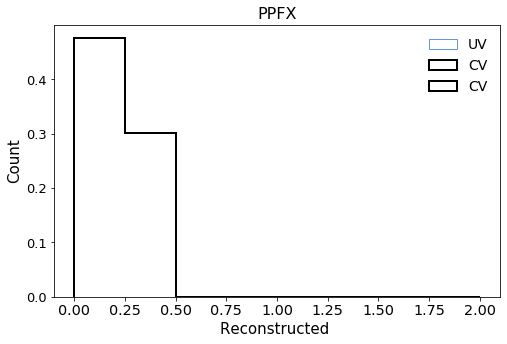

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0. 0. 0. 0. 0. 0. 0. 0.]


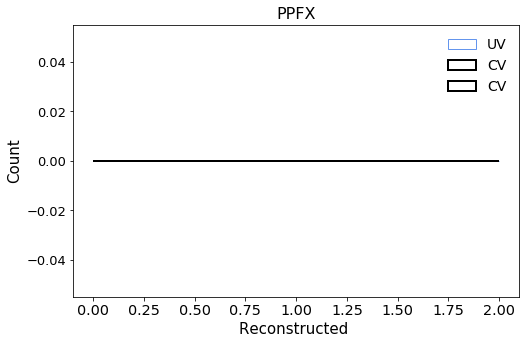

In [87]:
import matplotlib.pyplot as plt
import matplotlib


for j in range(len(detvar_dicts)):

    n=0
    #bin_centers = np.arange(1.25, 4.25, 0.5) #energy
    #bins = np.arange(1.0, 4.5, 0.5)
    #bin_centers = np.arange(-0.9, 1.1, 0.2) #Angle
    #bins = np.arange(-1, 1.2, 0.2)
    bin_centers = np.arange(0.125, 2.125, 0.25) #lepton
    bins = np.arange(0, 2.25, 0.25)
    print(bin_centers)
    print(bins)

    fig = plt.figure(figsize=(8, 5)) 


    for variation in detvar_dicts[j].keys(): 

        if n==0: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation], 
                 linewidth=1, color='cornflowerblue', label='UV')

        else: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation],
                 linewidth=1, color='cornflowerblue')

        n+=1   


    plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)

    current = (plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)[0])

    print(current)

    plt.title('PPFX', fontsize=16)

    plt.ylabel('Count' , fontsize=15) # 2.68294E22
    plt.xlabel("Reconstructed ", fontsize=15)

    #plt.xticks(x_ticks, fontsize=13)
    plt.yticks(fontsize=13)

    plt.legend(frameon=False, fontsize=14)

    #plt.xlim(xlow, xhigh)



    plt.show()

In [88]:
#will need to edit this if batching

numu_dirt_ppfx_detvar_dict = pd.DataFrame(detvar_dicts[0])
#print(nue_nue_ppfx_detvar_dict)

if isRun3 == False:
    #numu_dirt_ppfx_detvar_dict.to_csv('numu_dirt_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    #numu_dirt_ppfx_detvar_dict.to_csv('numu_dirt_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_'+ending+'.csv')
    numu_dirt_ppfx_detvar_dict.to_csv('numu_dirt_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_'+ending+'.csv')
elif isRun3 == True:
    #numu_dirt_ppfx_detvar_dict.to_csv('numu_dirt_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    #numu_dirt_ppfx_detvar_dict.to_csv('numu_dirt_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_'+ending+'.csv')
    numu_dirt_ppfx_detvar_dict.to_csv('numu_dirt_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_'+ending+'.csv')
    

In [89]:
masterlist = []
templist = []
for i in range((len(n_tots[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(n_tots)):
        templist.append(n_tots[j][i])
masterlist.append(templist)

#need to sum each part of the masterlist into one pair of arrays now
masterlist.pop(0)
final_ns_numu_dirt_ppfx = []

for a in range(len(masterlist)):
    #print(sum(masterlist[a]))
    final_ns_numu_dirt_ppfx.append(sum(masterlist[a]))

final_ncvs_numu_dirt_ppfx = sum(n_cv_tots)


##################################################################

frames = []
for a in range(len(dfs_ppfx)):
    frames.append(dfs_ppfx[a][0])
    
    
total_ppfx_df = pd.concat(frames, ignore_index=True)
#print(total_ppfx_df)

#-----------------
frames2 = []
for b in range(len(df_ppfx_vars)):
    frames2.append(df_ppfx_vars[b][0])
    
    
total_ppfx_df_vars = pd.concat(frames2, ignore_index=False)
#print(total_ppfx_df_vars)

#-----------------
frames3 = []
for c in range(len(df_ppfx_splines)):
    frames3.append(df_ppfx_splines[c][0])
    
    
total_ppfx_df_splines = pd.concat(frames3, ignore_index=False)
#print(total_ppfx_df_splines)

In [90]:
if isRun3 == False:
    
    np.savetxt("numu_dirt_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ns_numu_dirt_ppfx[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_dirt_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ncvs_numu_dirt_ppfx,
               delimiter =", ", 
               fmt ='% s')

    total_ppfx_df.to_csv('numu_dirt_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_ppfx_df_vars.to_csv('numu_dirt_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_ppfx_df_splines.to_csv('numu_dirt_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    

    """
    #################################
    #####angleDiff##################
    ############################

    np.savetxt("numu_dirt_syserss_final_ns_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ns_numu_dirt_ppfx[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_dirt_syserss_final_ncvs_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ncvs_numu_dirt_ppfx,
               delimiter =", ", 
               fmt ='% s')


    ###########################################

    total_ppfx_df.to_csv('numu_dirt_syserss_df_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_ppfx_df_vars.to_csv('numu_dirt_syserss_df_ppfx_vars_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_ppfx_df_splines.to_csv('numu_dirt_syserss_df_ppfx_splines_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    """
    """
    #################################
    #####leptonMom##################
    ############################

    np.savetxt("numu_dirt_syserss_final_ns_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ns_numu_dirt_ppfx[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_dirt_syserss_final_ncvs_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ncvs_numu_dirt_ppfx,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_ppfx_df.to_csv('numu_dirt_syserss_df_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_ppfx_df_vars.to_csv('numu_dirt_syserss_df_ppfx_vars_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_ppfx_df_splines.to_csv('numu_dirt_syserss_df_ppfx_splines_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    """
elif isRun3 == True:
    """
    np.savetxt("numu_dirt_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ns_numu_dirt_ppfx[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_dirt_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ncvs_numu_dirt_ppfx,
               delimiter =", ", 
               fmt ='% s')

    total_ppfx_df.to_csv('numu_dirt_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_ppfx_df_vars.to_csv('numu_dirt_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_ppfx_df_splines.to_csv('numu_dirt_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    """
    """
    #################################
    #####angleDiff##################
    ############################

    np.savetxt("numu_dirt_syserss_final_ns_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ns_numu_dirt_ppfx[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_dirt_syserss_final_ncvs_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ncvs_numu_dirt_ppfx,
               delimiter =", ", 
               fmt ='% s')


    ###########################################

    total_ppfx_df.to_csv('numu_dirt_syserss_df_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_ppfx_df_vars.to_csv('numu_dirt_syserss_df_ppfx_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_ppfx_df_splines.to_csv('numu_dirt_syserss_df_ppfx_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    """
    
    #################################
    #####leptonMom##################
    ############################

    np.savetxt("numu_dirt_syserss_final_ns_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ns_numu_dirt_ppfx[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_dirt_syserss_final_ncvs_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ncvs_numu_dirt_ppfx,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_ppfx_df.to_csv('numu_dirt_syserss_df_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_ppfx_df_vars.to_csv('numu_dirt_syserss_df_ppfx_vars_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_ppfx_df_splines.to_csv('numu_dirt_syserss_df_ppfx_splines_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    

In [91]:
#############################
##### weightsGenie ###########
#############################

import syserr_batch_plotter_alex
import importlib
importlib.reload(syserr_batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = numu_dirt.shape[0]
print("n_events here = ", n_events)
print("n_events/2 here = ", np.floor(n_events/2))
print("")
batch_size = n_events
#batch_size = int(np.floor(n_events/5))
#n_events = batch_size

n_cv_tots = []
n_tots = []
dfs_genie = []
df_genie_vars = []
df_genie_splines = []
detvar_dicts = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
#for i in range(1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = numu_dirt.iloc[start:end]

    samples = {
        "numu_dirt": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 #partial file: 8.885e+19
        dirtratio = pot/1.42143e+21
        scalingDRT = 0.65
    elif isRun3 == True:
        pot =  5.014e+20
        dirtratio = pot/1.03226e+21
        scalingDRT = 0.45
        
    weights = { #full sample mc = 0.38
                "numu_dirt": dirtratio* SPLIT * scalingDRT, #set0  
    }



    my_plotter = syserr_batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)
    
    

    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"Reco Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Muon_Reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    VARIABLE, BINS, RANGE, XTIT = 'muon_mom',8,(0.0, 2.0),"Lepton Momentum (GeV)"
    
    #OLD
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reco Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'muon_mom',10,(0.0, 5.0),"Lepton Momentum (GeV)"

    n_cv_tot, n_tot, df_genie, df_genie_var, df_genie_spline, detvar_dict  = my_plotter.plot_variable(
        VARIABLE,   
        query= NUMU_SEL_QUERY,
        currentsample = "numu_dirt",
        typeerr = "standard",
        weight = "weightsGenie",
        category_query = " ",
        Nuniverse = 500,
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "weightSplineTimesTuneTimesPPFX",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:6]
    
    
    n_cv_tots.append(n_cv_tot)
    n_tots.append(n_tot)
    dfs_genie.append(df_genie)
    df_genie_vars.append(df_genie_var)
    df_genie_splines.append(df_genie_spline)
    detvar_dicts.append(detvar_dict)

n_events here =  197
n_events/2 here =  98.0

1.0
1
{'numu_dirt': 0.21857865266502624}
nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 and n_muons_tot > 0 and n_protons_tot > 0 and n_showers_contained==0  and contained_fraction> 0.95 and topological_score >0.3 and muon_mom > 0.04 & muon_mom < 2.0 and targetP > 0.04 & targetP < 2.0& muon_mom <= 2 & muon_mom >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False

standard sys err
Universes 500
    0     1     2     3     4     5     6     7     8     9    ...   590  \
0  1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  ...  1000   
1  1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  ...  1000   
2  1000  1000

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0.47607222 0.302129   0.         0.         0.         0.
 0.         0.        ]


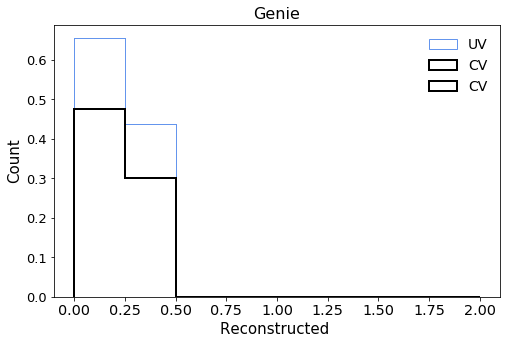

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0. 0. 0. 0. 0. 0. 0. 0.]


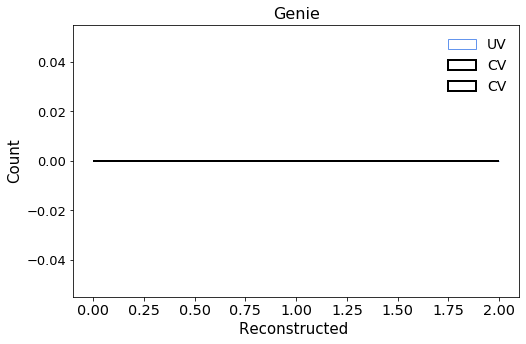

In [93]:
import matplotlib.pyplot as plt
import matplotlib


for j in range(len(detvar_dicts)):

    n=0
    #bin_centers = np.arange(1.25, 4.25, 0.5) #energy
    #bins = np.arange(1.0, 4.5, 0.5)
    #bin_centers = np.arange(-0.9, 1.1, 0.2) #Angle
    #bins = np.arange(-1, 1.2, 0.2)
    bin_centers = np.arange(0.125, 2.125, 0.25) #lepton
    bins = np.arange(0, 2.25, 0.25)
    print(bin_centers)
    print(bins)

    fig = plt.figure(figsize=(8, 5)) 


    for variation in detvar_dicts[j].keys(): 

        if n==0: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation], 
                 linewidth=1, color='cornflowerblue', label='UV')

        else: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation],
                 linewidth=1, color='cornflowerblue')

        n+=1   


    plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)

    current = (plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)[0])

    print(current)

    plt.title('Genie', fontsize=16)

    plt.ylabel('Count' , fontsize=15) # 2.68294E22
    plt.xlabel("Reconstructed ", fontsize=15)

    #plt.xticks(x_ticks, fontsize=13)
    plt.yticks(fontsize=13)

    plt.legend(frameon=False, fontsize=14)

    #plt.xlim(xlow, xhigh)

    plt.show()

In [94]:
#will need to edit this if batching

numu_dirt_genie_detvar_dict = pd.DataFrame(detvar_dicts[0])
#print(nue_nue_ppfx_detvar_dict)

if isRun3 == False:
    #numu_dirt_genie_detvar_dict.to_csv('numu_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    #numu_dirt_genie_detvar_dict.to_csv('numu_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_'+ending+'.csv')
    numu_dirt_genie_detvar_dict.to_csv('numu_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_'+ending+'.csv')
elif isRun3 == True:
    #numu_dirt_genie_detvar_dict.to_csv('numu_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    #numu_dirt_genie_detvar_dict.to_csv('numu_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_'+ending+'.csv')
    numu_dirt_genie_detvar_dict.to_csv('numu_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_'+ending+'.csv')

In [95]:
masterlist = []
templist = []
for i in range((len(n_tots[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(n_tots)):
        templist.append(n_tots[j][i])
masterlist.append(templist)

#need to sum each part of the masterlist into one pair of arrays now
masterlist.pop(0)
final_ns_numu_dirt_genie = []

for a in range(len(masterlist)):
    #print(sum(masterlist[a]))
    final_ns_numu_dirt_genie.append(sum(masterlist[a]))

final_ncvs_numu_dirt_genie = sum(n_cv_tots)

#####################################################
frames = []
for a in range(len(dfs_genie)):
    frames.append(dfs_genie[a][0])
    
    
total_genie_df = pd.concat(frames, ignore_index=True)
print(total_genie_df)

#-----------------
frames2 = []
for b in range(len(df_genie_vars)):
    frames2.append(df_genie_vars[b][0])
    
    
total_genie_df_vars = pd.concat(frames2, ignore_index=False)
print(total_genie_df_vars)

#-----------------
frames3 = []
for c in range(len(df_genie_splines)):
    frames3.append(df_genie_splines[c][0])
    
    
total_genie_df_splines = pd.concat(frames3, ignore_index=False)
print(total_genie_df_splines)


    0     1     2     3     4     5     6     7     8     9    ...   590  \
0  1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  ...  1000   
1  1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  ...  1000   
2  1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  ...  1000   
3  1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  ...  1000   
4  1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  ...  1000   

    591   592   593   594   595   596   597   598   599  
0  1000  1000  1000  1000  1000  1000  1000  1000  1000  
1  1000  1000  1000  1000  1000  1000  1000  1000  1000  
2  1000  1000  1000  1000  1000  1000  1000  1000  1000  
3  1000  1000  1000  1000  1000  1000  1000  1000  1000  
4  1000  1000  1000  1000  1000  1000  1000  1000  1000  

[5 rows x 600 columns]
entry
26764     0.400975
69019     0.150503
224548    0.299635
241202    0.215258
371283    0.243216
Name: muon_mom, dtype: object
entry
26764     0.218579
69019     0.218

In [96]:
if isRun3 == False:
    
    np.savetxt("numu_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ns_numu_dirt_genie[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ncvs_numu_dirt_genie,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_genie_df.to_csv('numu_dirt_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_genie_df_vars.to_csv('numu_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_genie_df_splines.to_csv('numu_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    
    """
    #####################
    ###AngleDiff###
    ######################
    np.savetxt("numu_dirt_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ns_numu_dirt_genie[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ncvs_numu_dirt_genie,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_genie_df.to_csv('numu_dirt_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_genie_df_vars.to_csv('numu_dirt_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_genie_df_splines.to_csv('numu_dirt_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    """
    """
    #####################
    ###leptonMom###
    ######################
    np.savetxt("numu_dirt_syserss_final_ns_genie_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ns_numu_dirt_genie[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ncvs_numu_dirt_genie,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_genie_df.to_csv('numu_dirt_syserss_df_genie_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_genie_df_vars.to_csv('numu_dirt_syserss_df_genie_vars_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_genie_df_splines.to_csv('numu_dirt_syserss_df_genie_splines_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    """
elif isRun3 == True:
    """
    np.savetxt("numu_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ns_numu_dirt_genie[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ncvs_numu_dirt_genie,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_genie_df.to_csv('numu_dirt_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_genie_df_vars.to_csv('numu_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_genie_df_splines.to_csv('numu_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    """
    """
    #####################
    ###AngleDiff###
    ######################
    np.savetxt("numu_dirt_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ns_numu_dirt_genie[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ncvs_numu_dirt_genie,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_genie_df.to_csv('numu_dirt_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_genie_df_vars.to_csv('numu_dirt_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_genie_df_splines.to_csv('numu_dirt_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    """
    
    #####################
    ###leptonMom###
    ######################
    np.savetxt("numu_dirt_syserss_final_ns_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ns_numu_dirt_genie[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ncvs_numu_dirt_genie,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_genie_df.to_csv('numu_dirt_syserss_df_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_genie_df_vars.to_csv('numu_dirt_syserss_df_genie_vars_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_genie_df_splines.to_csv('numu_dirt_syserss_df_genie_splines_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    


In [97]:
#############################
##### weightsReint ###########
#############################

import syserr_batch_plotter_alex
import importlib
importlib.reload(syserr_batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = numu_dirt.shape[0]
print("n_events here = ", n_events)
print("n_events/2 here = ", np.floor(n_events/2))
print("weightsReint")
batch_size = n_events
#batch_size = int(np.floor(n_events/5))
#n_events = batch_size

n_cv_tots = []
n_tots = []
dfs_reint = []
df_reint_vars = []
df_reint_splines = []
detvar_dicts = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
#for i in range(1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = numu_dirt.iloc[start:end]

    samples = {
        "numu_dirt": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 #partial file: 8.885e+19
        dirtratio = pot/1.42143e+21
        scalingDRT = 0.65
    elif isRun3 == True:
        pot =  5.014e+20
        dirtratio = pot/1.03226e+21
        scalingDRT = 0.45
        
    weights = { #full sample mc = 0.38
                "numu_dirt": dirtratio* SPLIT * scalingDRT, #set0  
    }



    my_plotter = syserr_batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)
    
    

    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Muon_Reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    VARIABLE, BINS, RANGE, XTIT = 'muon_mom',8,(0.0, 2.0),"Lepton Momentum (GeV)"
    
    #OLD
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'muon_mom',10,(0.0, 5.0),"Lepton Momentum (GeV)"

    n_cv_tot, n_tot, df_reint, df_reint_var, df_reint_spline, detvar_dict = my_plotter.plot_variable(
        VARIABLE,   
        query= NUMU_SEL_QUERY,
        currentsample = "numu_dirt",
        typeerr = "standard",
        weight = "weightsReint",
        category_query = " ",
        Nuniverse=500,
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "weightSplineTimesTuneTimesPPFX",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:6]
    
    
    n_cv_tots.append(n_cv_tot)
    n_tots.append(n_tot)
    dfs_reint.append(df_reint)
    df_reint_vars.append(df_reint_var)
    df_reint_splines.append(df_reint_spline)
    detvar_dicts.append(detvar_dict)

n_events here =  197
n_events/2 here =  98.0
weightsReint
1.0
1
{'numu_dirt': 0.21857865266502624}
nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 and n_muons_tot > 0 and n_protons_tot > 0 and n_showers_contained==0  and contained_fraction> 0.95 and topological_score >0.3 and muon_mom > 0.04 & muon_mom < 2.0 and targetP > 0.04 & targetP < 2.0& muon_mom <= 2 & muon_mom >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False

standard sys err
Universes 500
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]
Returning
--------------------------

{'numu_dirt': 0.21857865266502624}
nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0.47607222 0.302129   0.         0.         0.         0.
 0.         0.        ]


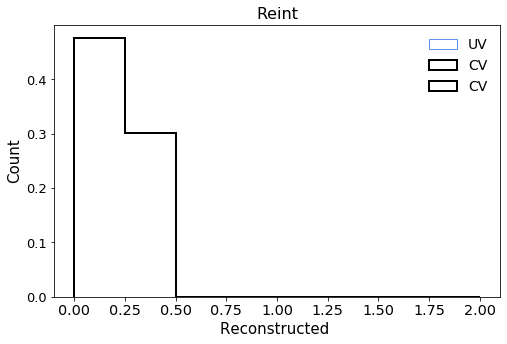

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0. 0. 0. 0. 0. 0. 0. 0.]


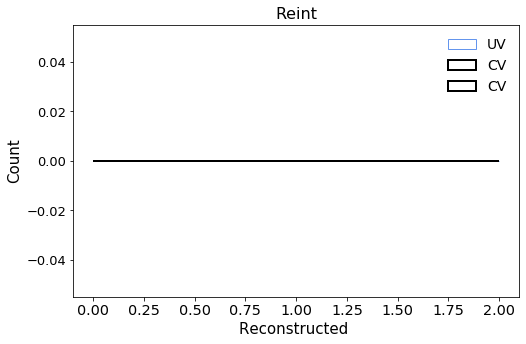

In [98]:
import matplotlib.pyplot as plt
import matplotlib


for j in range(len(detvar_dicts)):

    n=0
    #bin_centers = np.arange(1.25, 4.25, 0.5) #energy
    #bins = np.arange(1.0, 4.5, 0.5)
    #bin_centers = np.arange(-0.9, 1.1, 0.2) #Angle
    #bins = np.arange(-1, 1.2, 0.2)
    bin_centers = np.arange(0.125, 2.125, 0.25) #lepton
    bins = np.arange(0, 2.25, 0.25)
    print(bin_centers)
    print(bins)

    fig = plt.figure(figsize=(8, 5)) 


    for variation in detvar_dicts[j].keys(): 

        if n==0: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation], 
                 linewidth=1, color='cornflowerblue', label='UV')

        else: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation],
                 linewidth=1, color='cornflowerblue')

        n+=1   


    plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)

    current = (plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)[0])

    print(current)

    plt.title('Reint', fontsize=16)

    plt.ylabel('Count' , fontsize=15) # 2.68294E22
    plt.xlabel("Reconstructed ", fontsize=15)

    #plt.xticks(x_ticks, fontsize=13)
    plt.yticks(fontsize=13)

    plt.legend(frameon=False, fontsize=14)

    #plt.xlim(xlow, xhigh)


    plt.show()

In [99]:
#will need to edit this if batching

numu_dirt_reint_detvar_dict = pd.DataFrame(detvar_dicts[0])
#print(nue_nue_ppfx_detvar_dict)

if isRun3 == False:
    #numu_dirt_reint_detvar_dict.to_csv('numu_dirt_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    #numu_dirt_reint_detvar_dict.to_csv('numu_dirt_syserss_df_reint_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_'+ending+'.csv')
    numu_dirt_reint_detvar_dict.to_csv('numu_dirt_syserss_df_reint_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_'+ending+'.csv')
elif isRun3 == True:
    #numu_dirt_reint_detvar_dict.to_csv('numu_dirt_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    #numu_dirt_reint_detvar_dict.to_csv('numu_dirt_syserss_df_reint_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_'+ending+'.csv')
    numu_dirt_reint_detvar_dict.to_csv('numu_dirt_syserss_df_reint_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_'+ending+'.csv')

In [100]:
masterlist = []
templist = []
for i in range((len(n_tots[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(n_tots)):
        templist.append(n_tots[j][i])
masterlist.append(templist)

#need to sum each part of the masterlist into one pair of arrays now
masterlist.pop(0)
final_ns_numu_dirt_reint = []

for a in range(len(masterlist)):
    #print(sum(masterlist[a]))
    final_ns_numu_dirt_reint.append(sum(masterlist[a]))

final_ncvs_numu_dirt_reint = sum(n_cv_tots)

#######################################

frames = []
for a in range(len(dfs_reint)):
    frames.append(dfs_reint[a][0])
     
total_reint_df = pd.concat(frames, ignore_index=True)
#print(total_reint_df)

#-----------------
frames2 = []
for b in range(len(df_reint_vars)):
    frames2.append(df_reint_vars[b][0])
    
    
total_reint_df_vars = pd.concat(frames2, ignore_index=False)
#print(total_reint_df_vars)

#-----------------
frames3 = []
for c in range(len(df_reint_splines)):
    frames3.append(df_reint_splines[c][0])
    
    
total_reint_df_splines = pd.concat(frames3, ignore_index=False)
#print(total_reint_df_splines)


In [101]:
if isRun3 == False:
    
    np.savetxt("numu_dirt_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ns_numu_dirt_reint[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_dirt_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ncvs_numu_dirt_reint,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_reint_df.to_csv('numu_dirt_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_reint_df_vars.to_csv('numu_dirt_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_reint_df_splines.to_csv('numu_dirt_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')

    
    """
    #################
    ###angleDiff#####
    #################

    np.savetxt("numu_dirt_syserss_final_ns_reint_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ns_numu_dirt_reint[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_dirt_syserss_final_ncvs_reint_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ncvs_numu_dirt_reint,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_reint_df.to_csv('numu_dirt_syserss_df_reint_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_reint_df_vars.to_csv('numu_dirt_syserss_df_reint_vars_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_reint_df_splines.to_csv('numu_dirt_syserss_df_reint_splines_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    """
    """
    #################
    ###leptonMom#####
    #################

    np.savetxt("numu_dirt_syserss_final_ns_reint_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ns_numu_dirt_reint[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_dirt_syserss_final_ncvs_reint_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ncvs_numu_dirt_reint,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_reint_df.to_csv('numu_dirt_syserss_df_reint_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_reint_df_vars.to_csv('numu_dirt_syserss_df_reint_vars_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_reint_df_splines.to_csv('numu_dirt_syserss_df_reint_splines_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    """
elif isRun3 == True:
    """
    np.savetxt("numu_dirt_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ns_numu_dirt_reint[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_dirt_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ncvs_numu_dirt_reint,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_reint_df.to_csv('numu_dirt_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_reint_df_vars.to_csv('numu_dirt_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_reint_df_splines.to_csv('numu_dirt_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    """

    """
    #################
    ###angleDiff#####
    #################

    np.savetxt("numu_dirt_syserss_final_ns_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ns_numu_dirt_reint[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_dirt_syserss_final_ncvs_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ncvs_numu_dirt_reint,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_reint_df.to_csv('numu_dirt_syserss_df_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_reint_df_vars.to_csv('numu_dirt_syserss_df_reint_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_reint_df_splines.to_csv('numu_dirt_syserss_df_reint_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    """
    
    #################
    ###leptonMom#####
    #################

    np.savetxt("numu_dirt_syserss_final_ns_reint_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ns_numu_dirt_reint[0],
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_dirt_syserss_final_ncvs_reint_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ncvs_numu_dirt_reint,
               delimiter =", ", 
               fmt ='% s')

    ###########################################

    total_reint_df.to_csv('numu_dirt_syserss_df_reint_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_reint_df_vars.to_csv('numu_dirt_syserss_df_reint_vars_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_reint_df_splines.to_csv('numu_dirt_syserss_df_reint_splines_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    


In [102]:
#############################
##### weightsNuMIGeo ###########
#############################

import syserr_batch_plotter_alex
import importlib
importlib.reload(syserr_batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = numu_dirt.shape[0]
print("n_events here = ", n_events)
print("n_events/2 here = ", np.floor(n_events/2))
batch_size = n_events

n_cv_tots = []
n_tots = []
dfs_geo = []
df_geo_vars = []
df_geo_splines = []
detvar_dicts = []

print(n_events/batch_size)
print(int(n_events/batch_size)+1)

for i in range(int(n_events/batch_size)+1):
#for i in range(1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = numu_dirt.iloc[start:end]

    samples = {
        "numu_dirt": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 
        dirtratio = pot/1.42143e+21
        scalingDRT = 0.65
    elif isRun3 == True:
        pot =  5.014e+20
        dirtratio = pot/1.03226e+21
        scalingDRT = 0.45
    
    weights = { #full sample mc = 0.38
                "numu_dirt": dirtratio* SPLIT * scalingDRT, #set0  
    }



    my_plotter = syserr_batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)
    
    
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Muon_Reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    VARIABLE, BINS, RANGE, XTIT = 'muon_mom',8,(0.0, 2.0),"Lepton Momentum (GeV)"
    
    #OLD
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'muon_mom',10,(0.0, 5.0),"Lepton Momentum (GeV)"

    n_cv_tot, n_tot, df_geo, df_geo_var, df_geo_spline, detvar_dict = my_plotter.plot_variable(
        VARIABLE,   
        query= NUMU_SEL_QUERY,
        currentsample = "numu_dirt",
        typeerr = "NuMIGeo",
        weight = "weightsGenie",
        category_query = " ",
        Nuniverse=10,
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "weightSplineTimesTuneTimesPPFX",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:6]
    
    
    n_cv_tots.append(n_cv_tot)
    n_tots.append(n_tot)
    dfs_geo.append(df_geo)
    df_geo_vars.append(df_geo_var)
    df_geo_splines.append(df_geo_spline)
    detvar_dicts.append(detvar_dict)

n_events here =  197
n_events/2 here =  98.0
1.0
2
{'numu_dirt': 0.21857865266502624}
nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 and n_muons_tot > 0 and n_protons_tot > 0 and n_showers_contained==0  and contained_fraction> 0.95 and topological_score >0.3 and muon_mom > 0.04 & muon_mom < 2.0 and targetP > 0.04 & targetP < 2.0& muon_mom <= 2 & muon_mom >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False

NuMI Geo sys err
Number of variations Universes 10
Returning
--------------------------

{'numu_dirt': 0.21857865266502624}
nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0.47607222 0.302129   0.         0.         0.         0.
 0.         0.        ]


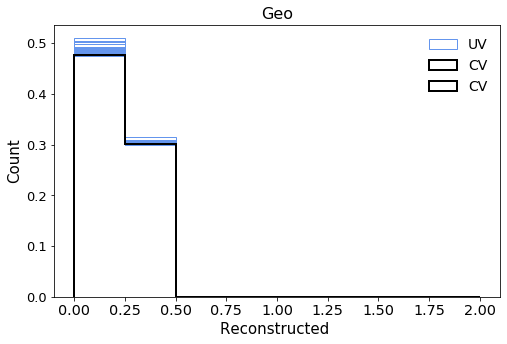

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0. 0. 0. 0. 0. 0. 0. 0.]


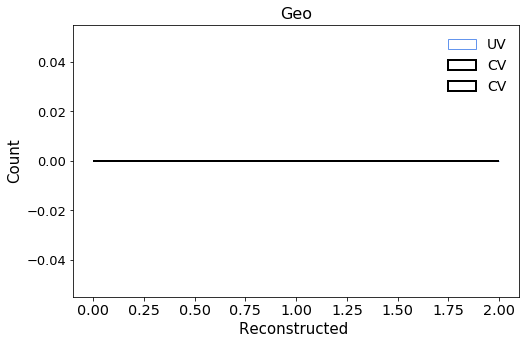

In [103]:
import matplotlib.pyplot as plt
import matplotlib


for j in range(len(detvar_dicts)):

    n=0
    #bin_centers = np.arange(1.25, 4.25, 0.5) #energy
    #bins = np.arange(1.0, 4.5, 0.5)
    #bin_centers = np.arange(-0.9, 1.1, 0.2) #Angle
    #bins = np.arange(-1, 1.2, 0.2)
    bin_centers = np.arange(0.125, 2.125, 0.25) #lepton
    bins = np.arange(0, 2.25, 0.25)
    print(bin_centers)
    print(bins)

    fig = plt.figure(figsize=(8, 5)) 


    for variation in detvar_dicts[j].keys(): 

        if n==0: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation], 
                 linewidth=1, color='cornflowerblue', label='UV')

        else: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation],
                 linewidth=1, color='cornflowerblue')

        n+=1   


    plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)

    current = (plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)[0])

    print(current)

    plt.title('Geo', fontsize=16)

    plt.ylabel('Count' , fontsize=15) # 2.68294E22
    plt.xlabel("Reconstructed ", fontsize=15)

    #plt.xticks(x_ticks, fontsize=13)
    plt.yticks(fontsize=13)

    plt.legend(frameon=False, fontsize=14)

    #plt.xlim(xlow, xhigh)

    plt.show()

In [104]:
#will need to edit this if batching

numu_dirt_geo_detvar_dict = pd.DataFrame(detvar_dicts[0])
#print(nue_nue_ppfx_detvar_dict)

if isRun3 == False:
    #numu_dirt_geo_detvar_dict.to_csv('numu_dirt_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    #numu_dirt_geo_detvar_dict.to_csv('numu_dirt_syserss_df_geo_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_'+ending+'.csv')
    numu_dirt_geo_detvar_dict.to_csv('numu_dirt_syserss_df_geo_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_'+ending+'.csv')
elif isRun3 == True:
    #numu_dirt_geo_detvar_dict.to_csv('numu_dirt_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    #numu_dirt_geo_detvar_dict.to_csv('numu_dirt_syserss_df_geo_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_'+ending+'.csv')
    numu_dirt_geo_detvar_dict.to_csv('numu_dirt_syserss_df_geo_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_'+ending+'.csv')

In [105]:

masterlist = []
templist = []
for i in range((len(n_tots[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(n_tots)):
        templist.append(n_tots[j][i])
masterlist.append(templist)

#need to sum each part of the masterlist into one pair of arrays now
masterlist.pop(0)
final_ns_numu_dirt_geo = []

for a in range(len(masterlist)):
    #print(sum(masterlist[a]))
    final_ns_numu_dirt_geo.append(sum(masterlist[a]))

final_ncvs_numu_dirt_geo = sum(n_cv_tots)
#print(final_ns_nue_nue_geo[0])

for x in range(len(final_ns_numu_dirt_geo)):
    final_ns_numu_dirt_geo[x] = np.concatenate((final_ns_numu_dirt_geo[x][0], final_ns_numu_dirt_geo[x][1]))
    
    
print(final_ns_numu_dirt_geo[0])  

####################################################

frames = []
for a in range(len(dfs_geo)):
    frames.append(dfs_geo[a][0])
    
    
total_geo_df = pd.concat(frames, ignore_index=True)
#print(total_geo_df)

#-----------------
frames2 = []
for b in range(len(df_geo_vars)):
    frames2.append(df_geo_vars[b][0])
    
    
total_geo_df_vars = pd.concat(frames2, ignore_index=False)
#print(total_geo_df_vars)

#-----------------
frames3 = []
for c in range(len(df_geo_splines)):
    frames3.append(df_geo_splines[c][0])
    
    
total_geo_df_splines = pd.concat(frames3, ignore_index=False)
#print(total_geo_df_splines)

[0.49303951 0.30558319 0.         0.         0.         0.
 0.         0.         0.48654348 0.29950442 0.         0.
 0.         0.         0.         0.        ]


In [106]:
if isRun3 == False:
    
    np.savetxt("numu_dirt_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ns_numu_dirt_geo,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_dirt_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
               final_ncvs_numu_dirt_geo,
               delimiter =", ", 
               fmt ='% s')

    #######################################################

    total_geo_df.to_csv('numu_dirt_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_geo_df_vars.to_csv('numu_dirt_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    total_geo_df_splines.to_csv('numu_dirt_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    
    """
    #####################
    ###angleDiff########
    ####################

    np.savetxt("numu_dirt_syserss_final_ns_geo_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ns_numu_dirt_geo,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_dirt_syserss_final_ncvs_geo_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
               final_ncvs_numu_dirt_geo,
               delimiter =", ", 
               fmt ='% s')

    #######################################################

    total_geo_df.to_csv('numu_dirt_syserss_df_geo_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_geo_df_vars.to_csv('numu_dirt_syserss_df_geo_vars_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    total_geo_df_splines.to_csv('numu_dirt_syserss_df_geo_splines_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    """
    """
    #####################
    ###leptonMom########
    ####################

    np.savetxt("numu_dirt_syserss_final_ns_geo_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ns_numu_dirt_geo,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_dirt_syserss_final_ncvs_geo_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
               final_ncvs_numu_dirt_geo,
               delimiter =", ", 
               fmt ='% s')

    #######################################################

    total_geo_df.to_csv('numu_dirt_syserss_df_geo_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_geo_df_vars.to_csv('numu_dirt_syserss_df_geo_vars_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    total_geo_df_splines.to_csv('numu_dirt_syserss_df_geo_splines_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    """
elif isRun3 == True:
    """
    np.savetxt("numu_dirt_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ns_numu_dirt_geo,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_dirt_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
               final_ncvs_numu_dirt_geo,
               delimiter =", ", 
               fmt ='% s')

    #######################################################

    total_geo_df.to_csv('numu_dirt_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_geo_df_vars.to_csv('numu_dirt_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    total_geo_df_splines.to_csv('numu_dirt_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    """
    """
    #####################
    ###angleDiff########
    ####################

    np.savetxt("numu_dirt_syserss_final_ns_geo_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ns_numu_dirt_geo,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_dirt_syserss_final_ncvs_geo_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
               final_ncvs_numu_dirt_geo,
               delimiter =", ", 
               fmt ='% s')

    #######################################################

    total_geo_df.to_csv('numu_dirt_syserss_df_geo_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_geo_df_vars.to_csv('numu_dirt_syserss_df_geo_vars_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    total_geo_df_splines.to_csv('numu_dirt_syserss_df_geo_splines_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    """
    
    ####################
    ###leptonMom########
    ####################

    np.savetxt("numu_dirt_syserss_final_ns_geo_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ns_numu_dirt_geo,
               delimiter =", ", 
               fmt ='% s')

    np.savetxt("numu_dirt_syserss_final_ncvs_geo_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
               final_ncvs_numu_dirt_geo,
               delimiter =", ", 
               fmt ='% s')

    #######################################################

    total_geo_df.to_csv('numu_dirt_syserss_df_geo_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_geo_df_vars.to_csv('numu_dirt_syserss_df_geo_vars_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    total_geo_df_splines.to_csv('numu_dirt_syserss_df_geo_splines_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    


## NUMU_EXT

In [5]:
# Name of the TTree in the PeLEE Ntuples
tree = "NeutrinoSelectionFilter"

#cut samples
#EXT  = '/pre_samp/neutrinoselection_filt_run1_beamoff'         +ls.APPEND
#full sample
if isRun3 == False:
    EXT  = '/neutrinoselection_filt_run1_beamoff'         +ls.APPEND
elif isRun3 == True:
    EXT  = '/neutrinoselection_filt_run3b_beamoff'         +ls.APPEND

#actually fetch datasets
numu_ext  = uproot.open(ls.ntuple_path+EXT+".root")[ls.fold][tree]

# Define a list that contains the data sets
uproot_v = [numu_ext]

numu_variables = [
        "nu_pdg", "slpdg", "backtracked_pdg", #"trk_score_v", 
        "category", "ccnc", "swtrig_pre", 
        "run","sub","evt",
        "CosmicIP","CosmicDirAll3D","CosmicIPAll3D",
        "flash_pe", "contained_fraction", 
        "trk_llr_pid_score_v", # trk-PID score
        "_opfilter_pe_beam", "_opfilter_pe_veto", # did the event pass the common optical filter (for MC only)
        "reco_nu_vtx_sce_x","reco_nu_vtx_sce_y","reco_nu_vtx_sce_z",
        "nmuon", "shr_energy_tot_cali", "proton_e", "elec_e",
        "reco_e","trk_energy_tot","n_showers_contained", "shr_tkfit_dedx_Y", "tksh_distance",
        "nproton", "mc_pdg", "slnunhits", "slnhits", "true_e_visible",
        "npi0","npion","pion_e","muon_e","pi0truth_elec_etot",
        "pi0_e", "evnunhits", "nslice", "interaction",
        "slclustfrac", "reco_nu_vtx_x", "reco_nu_vtx_y", "reco_nu_vtx_z",
        "topological_score",
        "isVtxInFiducial", "trk_sce_end_x_v", "trk_sce_end_y_v", "trk_sce_end_z_v", "trk_sce_start_x_v",
        "trk_theta", "trk_phi", "trk_energy_muon", "trk_range_muon_mom_v", "trk_mcs_muon_mom_v"
        #"theta", # angle between incoming and outgoing leptons in radians
    ]


# These are examples of variables present in MC samples only
numu_varMC = ["nu_e", "true_pt","true_pt_visible","true_p","true_p_visible","true_nu_vtx_t","true_nu_vtx_x","true_nu_vtx_y","true_nu_vtx_z","true_nu_vtx_sce_x","true_nu_vtx_sce_y","true_nu_vtx_sce_z\
","true_nu_px","true_nu_py","true_nu_pz", "theta", "mc_pdg", "mc_px", "mc_py", "mc_pz"]


#make the list unique (sometimes you repeat the variable name in the list, this takes care of that)
numu_variables = list(set(numu_variables))
print(numu_variables)



# These weights are needed to correctly calculate the CV for the MC    
WEIGHTS     = ["weightSpline","weightTune","weightSplineTimesTune","ppfx_cv"]
# These weights are needed to calculate the Flux, GENIE and Geant4 Systematics. 
# For NuMI weightsFlux should always be 1 (cause that's relevant for BNB).
SYSTEMATICS = ['weightsFlux','weightsGenie','weightsReint'] 
PPFX        = ['weightsPPFX'] 



WEIGHTSLEE = ["weightSpline","weightTune","weightSplineTimesTune", "leeweight"]#, "weightsGenie", "weightsFlux", "weightsReint"]
MCFVARS    = ["mcf_nu_e","mcf_lep_e","mcf_actvol","mcf_nmm","mcf_nmp","mcf_nem","mcf_nep","mcf_np0","mcf_npp",
              "mcf_npm","mcf_mcshr_elec_etot","mcf_pass_ccpi0","mcf_pass_ncpi0",
              "mcf_pass_ccnopi","mcf_pass_ncnopi","mcf_pass_cccpi","mcf_pass_nccpi"]

['reco_nu_vtx_sce_x', '_opfilter_pe_beam', 'category', 'reco_e', 'trk_phi', 'trk_sce_start_x_v', 'trk_range_muon_mom_v', 'pion_e', 'topological_score', 'trk_energy_muon', 'mc_pdg', 'ccnc', 'sub', 'nmuon', 'contained_fraction', 'shr_tkfit_dedx_Y', 'slclustfrac', 'slpdg', 'trk_sce_end_x_v', 'run', 'CosmicIP', 'reco_nu_vtx_y', 'flash_pe', 'interaction', 'trk_mcs_muon_mom_v', 'trk_energy_tot', 'reco_nu_vtx_sce_z', 'evt', 'muon_e', 'trk_sce_end_y_v', 'trk_llr_pid_score_v', 'slnunhits', 'isVtxInFiducial', 'npi0', 'CosmicDirAll3D', 'npion', 'reco_nu_vtx_sce_y', 'pi0truth_elec_etot', 'evnunhits', 'backtracked_pdg', 'trk_sce_end_z_v', '_opfilter_pe_veto', 'nu_pdg', 'true_e_visible', 'proton_e', 'swtrig_pre', 'trk_theta', 'reco_nu_vtx_x', 'pi0_e', 'nproton', 'CosmicIPAll3D', 'nslice', 'shr_energy_tot_cali', 'slnhits', 'elec_e', 'reco_nu_vtx_z', 'n_showers_contained', 'tksh_distance']


In [6]:
import time
s = time.time()

import pandas as pandas

ext_var  = numu_variables + numu_varMC  ##added second part

# This needs modifications (add variables from above)
uproot_v = [numu_ext] 
var_v    = [ext_var] 


for ii, CV in enumerate(uproot_v):
    CVDF  = CV.pandas.df(var_v[ii], flatten=False)
    load_data_run123.process_uproot_numu(CV,CVDF)
    if ii == 0:
        numu_ext = CVDF

s2 = time.time()
print(s2 - s)
#Approx 3 mins

trk_llr_pid_v  [[] [] [] ... [0.97052354 0.46686205] [] [0.9231277]]
trk_score_v  [[] [] [] ... [1.0 0.010001138] [] [0.9994478]]
Here:
trk_range_muon_mom_v  [[] [] [] ... [0.5356459 0.08237955] [] [0.41866612]]
trk_mcs_muon_mom_v  [[] [] [] ... [0.4799978 14.999432] [] [0.8129949]]


/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/awkward/array/jagged.py:1557: RuntimeWarning: overflow encountered in reduceat
  out = ufunc.reduceat(content, awkward.util.windows_safe(nonterminal))[:len(out)]
/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/awkward/array/jagged.py:1043: RuntimeWarning: overflow encountered in power
  result = getattr(ufunc, method)(*inputs, **kwargs)


434.370290517807


In [7]:
if isRun3 == False:
    # The EXT sample (off beam) is scaled using the triggers (there's no POT in the external sample!)
    extratio  = 5268051/9199232.74
    # We scale down the EXT to account for neutrino occupancy
    scalingEXT = 0.98
elif isRun3 == True:
    extratio  = 10363728.0/32878305.25
    scalingEXT = 0.98

numu_ext['pot_scale'] = extratio * scalingEXT

In [8]:
numu_ext['totweight_data'] = numu_ext['pot_scale']

In [9]:
df_v = [numu_ext]
#removeGenieTune = False
for i,df in enumerate(df_v):
    df[ 'noW' ] = 1

In [10]:
df_v = [numu_ext]
for i,df in enumerate(df_v):  
    df["bnbdata"] = np.zeros_like(df["isVtxInFiducial"])
    #df["extdata"] = np.zeros_like(df["isVtxInFiducial"])

numu_ext["extdata"] = np.ones_like(numu_ext["isVtxInFiducial"])

In [11]:
s = time.time()

def energyToPxyz(energy, theta, phi, mask, mass = 0.93827208816):
    if all(~mask):
        return (0.,0.,0.)
    energy = energy.copy()[mask]
    theta  = theta.copy()[mask]
    phi    = phi.copy()[mask]
    
    p  = np.sqrt((energy+mass)*(energy+mass) - mass*mass)
    pz = p*np.cos(theta)
    px = p*np.sin(theta)*np.cos(phi)
    py = p*np.sin(theta)*np.sin(phi)
    return( px.sum(), py.sum(), pz.sum())



for i,df in enumerate(df_v):
    up = uproot_v[i]
    trk_theta_proton_v  = up.array('trk_theta_v')
    trk_phi_proton_v    = up.array('trk_phi_v')
    trk_energy_proton_v = up.array('trk_energy_proton_v')
    ############ muon part
    mu_px_v            = up.array('shr_px')
    mu_py_v            = up.array('shr_py')
    mu_pz_v            = up.array('shr_pz')
    pt_v                = up.array('pt')
    trk_score_v         = up.array('trk_score_v')    
    trk_llr_pid_v       = up.array('trk_llr_pid_score_v')
    
    
    #shr_mask = (trk_score_v<0.5)
    trk_mask      = (trk_score_v>0.5)
    proton_mask_v = (trk_score_v>0.5)&(trk_llr_pid_v < 0.)
    sillyCount = 0
    listPx,listPy,listPz = [],[],[]
    
    for mask, theta_t, phi_t, energy_t,proton_mask_v_t,sx,sy,sz,pttt  in zip(proton_mask_v, trk_theta_proton_v,trk_phi_proton_v, trk_energy_proton_v,proton_mask_v, mu_px_v,mu_py_v,mu_pz_v,pt_v):
        tempMom = energyToPxyz(energy_t,theta_t,phi_t,proton_mask_v_t) 
        nu_reco_px = tempMom[0] + sx 
        nu_reco_py = tempMom[1] + sy  
        nu_reco_pz = tempMom[2] + sz  
        listPx.append(nu_reco_px)
        listPy.append(nu_reco_py)
        listPz.append(nu_reco_pz)

s2 = time.time()

print("runtime = ", s2-s)

/tmp/ipykernel_6131/340713361.py:10: RuntimeWarning: overflow encountered in multiply
  p  = np.sqrt((energy+mass)*(energy+mass) - mass*mass)


runtime =  65.95038890838623


In [12]:
#numu_ext["is_signal"]   = numu_ext["category"] == 2

In [13]:
from scipy.spatial.transform import Rotation as R
from numpy import arccos, array
from numpy.linalg import norm

# Note: returns angle in radians
def theta(v, w): return arccos(v.dot(w)/(norm(v)*norm(w)))* 180 / 3.1415926

def GetNuMIAngle( px,  py,  pz):
    r = R.from_matrix([[0.92103853804025681562   , 0.022713504803924120662, 0.38880857519374290021  ],
                       [4.6254001262154668408e-05, 0.99829162468141474651 , -0.058427989452906302359],
                       [-0.38947144863934973769  , 0.053832413938664107345, 0.91946400794392302291  ]])  
    r = r.inv()
    beamCoords = r.apply([px,  py,  pz])
    beamDir    = [0,0,1]
    #print(theta(beamCoords,beamDir))
    return theta(beamCoords,beamDir)

def GetNuMIAnglePol( phiBNB,  thetaBNB):
    px = math.sin(thetaBNB)*math.cos(phiBNB)
    py = math.sin(thetaBNB)*math.sin(phiBNB)
    pz = math.cos(thetaBNB)
    return GetNuMIAngle( px,  py,  pz)

In [14]:
def vectorFromNuMITarget(vtxX,  vtxY, vtxZ):
    numiTarget      = np.array([-31387.58422, -3316.402543, -60100.2414])
    nuInteraction   = np.array([vtxX,  vtxY, vtxZ])
    directionVector = nuInteraction - numiTarget
    return directionVector

def angleFromNuMITarget(vtxX,  vtxY, vtxZ, thetaBNB, phiBNB):
    v1 = vectorFromNuMITarget(vtxX,  vtxY, vtxZ)  
    norm = np.linalg.norm(v1)
    v1 = v1/norm
    v2 = [np.cos(phiBNB)*np.sin(thetaBNB),np.sin(phiBNB)*np.sin(thetaBNB), np.cos(thetaBNB) ]
    dot_product = np.dot(v1, v2)
    angle = np.arccos(dot_product)
    return angle #dot_product # angle*180/3.14159265



angleFromNuMITarget(1,1,1,1.4,3.)

1.8690124908136228

In [15]:
numu_ext.query("nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) \
and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 \
and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 \
and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 \
and n_muons_tot > 0 and n_protons_tot > 0 and n_showers_contained == 0", inplace=True)


In [16]:
#RECO VARIABLE
df_v = [numu_ext]
    
s = time.time()

print(df["trk_sce_end_z_v"])

for i,df in enumerate(df_v):
    df["muon_mom"] = df["trk_sce_end_z_v"].copy()
    for j, row in df.iterrows():
        if (len(row["muon_mom"]) !=0 ) and (df["trk_sce_end_z_v"][j][0] < 1036.8 and df["trk_sce_end_z_v"][j][0] > 0 and df["trk_sce_end_y_v"][j][0] < 116.5 and df["trk_sce_end_y_v"][j][0] > -116.5 and df["trk_sce_end_x_v"][j][0] < \
         254.8 and df["trk_sce_end_x_v"][j][0] > -1.55):
            df.loc[j, "muon_mom"] = df["trk_range_muon_mom_v"][j][0]
        elif (len(row["muon_mom"]) == 0 ):
            df.loc[j, "muon_mom"] = 0
        else:
            df.loc[j, "muon_mom"] = df["trk_mcs_muon_mom_v"][j][0]  #mcs == multiple coulob scattering
        
print(df["muon_mom"])
print("")
s2 = time.time()
print("runetime = ", s2-s)

entry
3254                    [623.5206, 605.3592]
6047         [827.39435, 808.5187, 821.0348]
9098        [291.9362, 327.65396, 245.72343]
18640                   [573.7536, 527.9679]
20643                   [158.9426, 86.28496]
                         ...                
3201974                  [552.0224, 525.887]
3202579      [586.32043, 561.3431, 556.3789]
3206252    [287.89584, 255.76543, 260.67233]
3209792               [743.06006, 742.64233]
3210076      [969.3807, 739.5761, 884.46936]
Name: trk_sce_end_z_v, Length: 1519, dtype: object
entry
3254        0.25293
6047        0.18796
9098       0.468977
18640      0.470768
20643      0.423149
             ...   
3201974    0.464931
3202579    0.271081
3206252    0.335463
3209792    0.237128
3210076    0.396571
Name: muon_mom, Length: 1519, dtype: object

runetime =  3.2009191513061523


In [17]:
#RECO VARIABLE
#in this we use the NEUTRINO VERTEX and the MUON PHI/THETA and will get the ANGLE BETWEEN THEM

for i,df in enumerate(df_v):
    df['nu_Angle_Numi_Muon_Reco'] = df.apply( lambda x: angleFromNuMITarget(x['reco_nu_vtx_sce_x'],x['reco_nu_vtx_sce_y'],x['reco_nu_vtx_sce_z'], x['trk_theta'],x['trk_phi']) , axis=1)
    df['cosNu_Angle_Numi_Muon_Reco'] = np.cos(df['nu_Angle_Numi_Muon_Reco'])

In [18]:
#TRUE VARIABLE
s = time.time()

for i,df in enumerate(df_v):
    df["muon_px"] = df["ccnc"].copy()
    df["muon_py"] = df["ccnc"].copy()
    df["muon_pz"] = df["ccnc"].copy()
    for j, row in df.iterrows():
        pdg_vector = df["mc_pdg"].loc[j][0]
        px_vector = df["mc_px"].loc[j]
        py_vector = df["mc_py"].loc[j]
        pz_vector = df["mc_pz"].loc[j]
        result = np.where(pdg_vector==13)[0]
        if np.size(result):
            df.loc[j, "muon_px"] = px_vector[result][0]
            df.loc[j, "muon_py"] = py_vector[result][0]
            df.loc[j, "muon_pz"] = pz_vector[result][0]   
            
    #print(df["muon_px"])

print("")    
print("==========================")
s2 = time.time()
print("runetime = ", s2-s)


runetime =  1.3355772495269775


In [19]:
#TRUE VARIABLE
#in this we use the NEUTRINO VERTEX and the MUON PHI/THETA and will get the ANGLE BETWEEN THEM

for i,df in enumerate(df_v):
    df['targetP']     = np.sqrt(df['muon_px']*df['muon_px'] + df['muon_py']*df['muon_py'] + df['muon_pz']*df['muon_pz'])
    df['targetPt']    = np.sqrt(df['muon_px']*df['muon_px'] + df['muon_py']*df['muon_py'])
    df['targetTheta'] = np.arccos(df['muon_pz']/df['targetP'] )
    df['targetPhi']   = np.arctan2(df['muon_py'],df['muon_px'])
    df['nu_Angle_Numi_Muon'] = df.apply( lambda x: angleFromNuMITarget(x['true_nu_vtx_sce_x'],x['true_nu_vtx_sce_y'],x['true_nu_vtx_sce_z'], x['targetTheta'],x['targetPhi']) , axis=1)
    df['cosNu_Angle_Numi_Muon'] = np.cos(df['nu_Angle_Numi_Muon'])

/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [32]:
df_v = [numu_ext]
for i,df in enumerate(df_v):

    df['is_signal'] = np.where( (df.swtrig_pre==1) & (df.targetP>0.04) & (df.targetP <2.0) & (df.muon_mom >0.04) & (df.muon_mom <2.0)
                                     & (df.nu_pdg==14) & (df.ccnc==0) & (df.nproton>0) & (df.npion==0) & (df.npi0==0)
                                     & (10 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 246)
                                     & (-106 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 106)
                                     & (10 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1026), True, False)
    
    df.loc[ (df['is_signal']== True), 'category' ] = 1
    
#if energy add & (df.true_e>1.0) & (df.true_e <4.0) & (df.reco_e>1.0) & (df.reco_e <4.0)
#if angle add (df.cosNu_Angle_Numi_Muon>-1.0) & (df.cosNu_Angle_Numi_Muon <1.0) & (df.cosNu_Angle_Numi_Muon_Reco>-1.0) & (df.cosNu_Angle_Numi_Muon_Reco <1.0)
#if lepton momemtum add (df.targetP>0.04) & (df.targetP <2.0) & (df.muon_mom >0.04) & (df.muon_mom <2.0)

#OLD
#if energy add & (df.true_e>0.04) & (df.true_e <5) & (df.reco_e>0.04) & (df.reco_e <5)
#if lepton momemtum add (df.targetP>0.04) & (df.targetP <5) & (df.muon_mom >0.04) & (df.muon_mom <5)

Set up complete.

In [33]:
import batch_plotter_alex
import importlib
importlib.reload(batch_plotter_alex)
scaling = 1


samples = {
    "numu_ext"  : numu_ext
}

SPLIT = 1.0
scaling = 1
scalingEXT = 0.98

if isRun3 == False:
    pot =  2e+20
    extratio  = 5268051/9199232.74 
elif isRun3 == True:
    pot =  5.014e+20
    extratio  = 10363728.0/32878305.25


weights = {   "ext" : extratio * SPLIT * scalingEXT, 
}

my_plotter = batch_plotter_alex.Plotter(samples, weights, pot=pot)
print(weights)

{'ext': 0.3089104916683624}


In [34]:
"""
#No true query as data
"""
NUMU_SEL_QUERY = "nslice == 1 and ( (_opfilter_pe_beam > 0 \
and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) \
and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 \
and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 \
and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 \
and n_muons_tot > 0 and n_protons_tot > 0 and n_showers_contained==0  \
and contained_fraction> 0.95 and topological_score > 0.3"
#ENERGY
#NUMU_SEL_QUERY += ' and reco_e > 1.0 and reco_e < 4.0'
#ANGLE
#NUMU_SEL_QUERY += ' and cosNu_Angle_Numi_Muon_Reco >-1.0 and cosNu_Angle_Numi_Muon_Reco <1.0'
#LEPTON MOM
NUMU_SEL_QUERY += ' and muon_mom > 0.04 & muon_mom < 2.0'

#OLD
#ENERGY
#NUMU_SEL_QUERY += ' and reco_e > 0.04 and reco_e < 5'
#LEPTON MOM
#NUMU_SEL_QUERY += ' and muon_mom > 0.04 & muon_mom < 5'

#no truth as is data

SIGNAL_NUMU_SEL_QUERY = NUMU_SEL_QUERY
SIGNAL_NUMU_SEL_QUERY += 'and is_signal==True'

NOT_SIGNAL_NUMU_SEL_QUERY = NUMU_SEL_QUERY
NOT_SIGNAL_NUMU_SEL_QUERY += 'and is_signal==False'

In [35]:
test = np.nansum(numu_ext.query(SIGNAL_NUMU_SEL_QUERY)['totweight_data'])
print('total signal events = '+ str(test))
test = np.nansum(numu_ext.query(NUMU_SEL_QUERY)['totweight_data'])
print('total signal events = '+ str(test))

total signal events = 0.0
total signal events = 52.20587309195325


No handles with labels found to put in legend.


n_events here =  1519

1.0
1
{'ext': 0.3089104916683624}
nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 and n_muons_tot > 0 and n_protons_tot > 0 and n_showers_contained==0  and contained_fraction> 0.95 and topological_score > 0.3 and muon_mom > 0.04 & muon_mom < 2.0& muon_mom <= 2 & muon_mom >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False 
 numu_ext
--------------------------------------
current_plotted_variable  [0.3929226 0.25002706 0.16607189 0.38815674 0.17665814 0.4802383
 0.20193179 0.4637235 0.4749276 0.8715586 0.21973763 0.22945042 0.23459078
 0.39440835 0.2703063 0.5044007 0.38380742 0.2869405 0.5231505 0.30163738
 0.51997393 0.27827248 0.41534382 0.23056236 0.

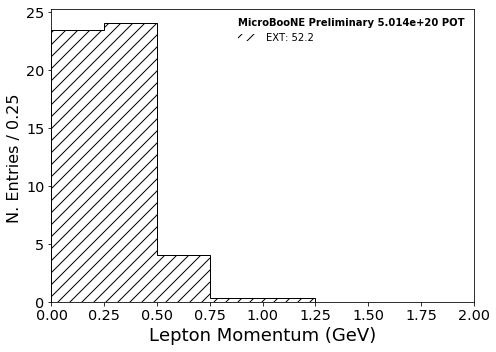

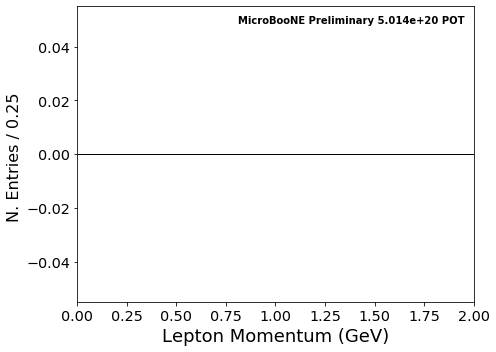

In [36]:
import batch_plotter_alex
import importlib
importlib.reload(batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = numu_ext.shape[0]
print("n_events here = ", n_events)
print("")
#batch_size = 40000
batch_size = n_events

varss = []
weightss = []
labss = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = numu_ext.iloc[start:end]

    samples = {
        "numu_ext": sample_set 
    }


    if isRun3 == False:
        pot =  2e+20
        extratio  = 5268051/9199232.74 
        scalingEXT = 0.98
    elif isRun3 == True:
        pot =  5.014e+20
        extratio  = 10363728.0/32878305.25
        scalingEXT = 0.98
    
    # NUE
    weights = { "ext" : extratio * SPLIT * scalingEXT,
    }


    my_plotter = batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)


    #Now check on a variable
    #Remember to change the plotter keys between truth and mc
    
    #VARIABLE, BINS, RANGE, XTIT = 'reco_nu_vtx_sce_x',60,(-20.0, 280.0),"Vertex X [cm]"
    #VARIABLE, BINS, RANGE, XTIT = 'reco_nu_vtx_sce_y',56,(-140.0, 140.0),"Vertex Y [cm]"
    #VARIABLE, BINS, RANGE, XTIT = 'reco_nu_vtx_sce_z',56,(-10.0, 1110.0),"Vertex Z [cm]"
    #VARIABLE, BINS, RANGE, XTIT = 'n_muons_tot',5,(0, 5),"Number of Muons"
    #VARIABLE, BINS, RANGE, XTIT = 'n_protons_tot',5,(0, 5),"Number of Protons"
    #VARIABLE, BINS, RANGE, XTIT = 'n_showers_contained',5,(0, 5),"Number of Contained Showers"
    #VARIABLE, BINS, RANGE, XTIT = 'contained_fraction',20,(0, 1),"Contained Fraction"
    #VARIABLE, BINS, RANGE, XTIT = 'topological_score',20,(0, 1),"Topological Score"
    
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Muon_Reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    VARIABLE, BINS, RANGE, XTIT = 'muon_mom',8,(0.0, 2.0),"Lepton Momentum (GeV)"
    
    #OLD
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'targetP',10,(0.0, 5.0),"Lepton Momentum (GeV)"
    

    var, weight, label = my_plotter.plot_variable(
        VARIABLE,
        query= NUMU_SEL_QUERY,
        #query= "",
        currentsample = "numu_ext",
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "weightSplineTimesTuneTimesPPFX",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:3]
    
    varss.append(var)
    weightss.append(weight)
    labss.append(label)

No handles with labels found to put in legend.


[array([0.3929226, 0.25002706, 0.16607189, 0.38815674, 0.17665814,
       0.4802383, 0.20193179, 0.4637235, 0.4749276, 0.8715586, 0.21973763,
       0.22945042, 0.23459078, 0.39440835, 0.2703063, 0.5044007,
       0.38380742, 0.2869405, 0.5231505, 0.30163738, 0.51997393,
       0.27827248, 0.41534382, 0.23056236, 0.4777388, 0.30248168,
       0.2729322, 0.3140473, 0.19853994, 0.321879, 0.23761068, 0.20838541,
       0.233386, 0.22124833, 0.6493522, 0.31002286, 0.23308359, 0.2659782,
       0.23007219, 0.2353928, 0.4056882, 0.2295318, 0.3290563, 0.2504604,
       0.33646417, 0.35431483, 0.5235943, 0.48748538, 0.15374452,
       1.1530981, 0.26794636, 0.21612635, 0.16467308, 0.45814818,
       0.15590909, 0.18472067, 0.23516396, 0.47238594, 0.21525833,
       0.19099742, 0.15337536, 0.25804776, 0.26153487, 0.15050216,
       0.19678889, 0.29109988, 0.6569021, 0.4092619, 0.22859265, 0.220277,
       0.17678453, 0.4937178, 0.5193088, 0.45099014, 0.27538428,
       0.18093799, 0.25076863, 0

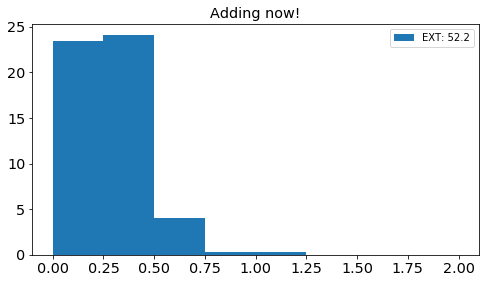

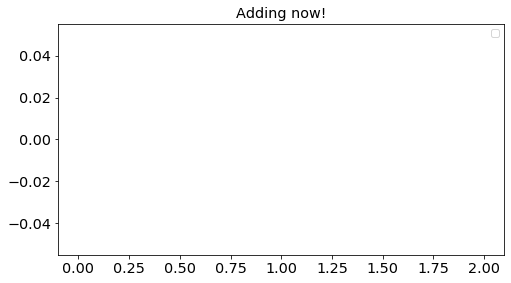

In [37]:
from matplotlib import gridspec

for i in range(int(n_events/batch_size)+1):
    numu_fig = plt.figure(figsize=(8, 7))
    numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
    numu_ax1 = plt.subplot(numu_gs[0])
    #numu_ax1.set_xlim([0, 5])    #TrueE, lepton mom
    #numu_ax1.set_xlim([-1, 1])    #AngleDiff
    
    print(varss)

    numu_stacked = numu_ax1.hist(
                varss[i],
                weights=list(weightss[i]),
                stacked=True,
                label=labss[i],
                bins=BINS,
                range=RANGE)
    
    plt.title("Adding now!")
    plt.legend()

In [38]:
def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    
varss_tot = np.concatenate(varss)
weightss_tot = np.concatenate(weightss)

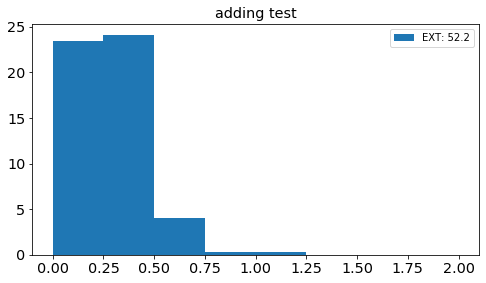

In [39]:
category_labels = {
    1 : r'$\nu_\mu$ CC0$\pi$Np', 
    2 : r'Out FV',
    3 : r'$\nu_e$ CC $\pi^{0}$',
    4 : r'$\nu_e$ CC',
    5 : r'$\nu_e$ NC $\pi^{0}$',
    6 : r'$\nu_e$ NC',
    7 : r'$\bar{\nu}_\mu$ CC0$\pi$Np',
    8: r'$\nu_\mu$ NC',
    9: r'$\nu_\mu$ CC other',
    10 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other', 
    11 : r'$\nu_\mu$ / $\overline{\nu_e}$  $\pi^{0}$', 
    12 : r'$\nu_\mu$ / $\overline{\nu_e}$  other',
    0: r'Unknown'
}


labels = labss


numu_fig = plt.figure(figsize=(8, 7))
numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_ax1 = plt.subplot(numu_gs[0])

#TrueE, LeptonMom
#numu_ax1.set_xlim([0, 5])
#numu_ax1.set_ylim([0, 300])

#AngleDiff
#numu_ax1.set_xlim([-1, 1])
#numu_ax1.set_ylim([0, 80])

numu_stacked = numu_ax1.hist(
            varss_tot,
            weights=list(weightss_tot),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)

plt.title("adding test")
plt.legend()

In [40]:
import importlib
import Plotter_Functions_Alex
importlib.reload(Plotter_Functions_Alex)
from Plotter_Functions_Alex import getWantedLists
importlib.reload(getWantedLists)

#print(nue_stacked)

wanted_key = 0

numu_wanted_list = Plotter_Functions_Alex.getWantedLists.getWantedLists(wanted_key, numu_stacked)

print(numu_wanted_list)

[]

SUMS
[]
[]

Wanted List:
[]

[]


In [41]:
vars_tot_df = pd.DataFrame.from_dict(varss_tot)
weights_tot_df = pd.DataFrame.from_dict(weightss_tot)

#ending = "Sept19_TrueAngleDiff"
#ending = "Sept19_TrueLeptonMom"

if isRun3 == False:
    ######full trueE
    vars_tot_df.to_csv('numu_ext_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    weights_tot_df.to_csv('numu_ext_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    ########angleDiff
    #vars_tot_df.to_csv('numu_ext_varstot_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    #weights_tot_df.to_csv('numu_ext_weightstot_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    ########leptonMom
    #vars_tot_df.to_csv('numu_ext_varstot_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    #weights_tot_df.to_csv('numu_ext_weightstot_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
elif isRun3 == True:
    ######full trueE
    #vars_tot_df.to_csv('numu_ext_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    #weights_tot_df.to_csv('numu_ext_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    ########angleDiff
    #vars_tot_df.to_csv('numu_ext_varstot_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    #weights_tot_df.to_csv('numu_ext_weightstot_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    ########leptonMom
    vars_tot_df.to_csv('numu_ext_varstot_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    weights_tot_df.to_csv('numu_ext_weightstot_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')


### Stat Errors

[4.84532737 4.90866768 2.00395519 0.55579717 0.55579717 0.
 0.         0.        ]


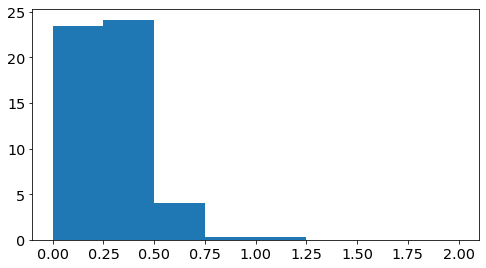

In [42]:
#A poisson uncertainty is assumed for beam off (see krishan's thesis p.182)

numu_fig = plt.figure(figsize=(8, 7))
numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_ax1 = plt.subplot(numu_gs[0])

#TrueE, LeptonMom
#numu_ax1.set_xlim([0, 5])
#numu_ax1.set_ylim([0, 500])


numu_stacked = numu_ax1.hist(
            varss_tot,
            weights=list(weightss_tot),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)


numu_ext_stat_errs = np.sqrt(numu_stacked[0])

print(numu_ext_stat_errs)

In [43]:
if isRun3 == False:
    
    np.savetxt("numu_ext_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_"+ending+".csv", 
               numu_ext_stat_errs,
               delimiter =", ", 
               fmt ='% s')
    
    """
    #########################
    #####angleDiff###########
    ##########################

    np.savetxt("numu_ext_stat_errs_full_catsel_nopions_angleDiff_usingSelection_selectedsig_"+ending+".csv", 
               numu_ext_stat_errs,
               delimiter =", ", 
               fmt ='% s')
    """
    
    """
    #########################
    #####leptonMom###########
    ##########################

    np.savetxt("numu_ext_stat_errs_full_catsel_nopions_leptonMom_usingSelection_selectedsig_"+ending+".csv", 
               numu_ext_stat_errs,
               delimiter =", ", 
               fmt ='% s')
    """
elif isRun3 == True:
    """
    np.savetxt("numu_ext_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_"+ending+".csv", 
               numu_ext_stat_errs,
               delimiter =", ", 
               fmt ='% s')
    """
    """
    #########################
    #####angleDiff###########
    ##########################

    np.savetxt("numu_ext_stat_errs_full_catsel_nopions_angleDiff_usingSelection_selectedsig_run3_"+ending+".csv", 
               numu_ext_stat_errs,
               delimiter =", ", 
           (df.cosNu_Angle_Numi_Muon>-1.0) & (df.cosNu_Angle_Numi_Muon <1.0) & (df.cosNu_Angle_Numi_Muon_Reco>-1.0) & (df.cosNu_Angle_Numi_Muon_Reco <1.0)    fmt ='% s')
    """
    
    
    #########################
    #####leptonMom###########
    ##########################

    np.savetxt("numu_ext_stat_errs_full_catsel_nopions_leptonMom_usingSelection_selectedsig_run3_"+ending+".csv", 
               numu_ext_stat_errs,
               delimiter =", ", 
               fmt ='% s')
    

## NUMU_DATA SAMPLE

In [5]:
# Name of the TTree in the PeLEE Ntuples
tree = "NeutrinoSelectionFilter"

#cut samples
#BNB  = '/pre_samp/neutrinoselection_filt_run1_beamon_beamgood' +ls.APPEND
#full sample
if isRun3 == False:
    BNB  = '/neutrinoselection_filt_run1_beamon_beamgood' +ls.APPEND
elif isRun3 == True:
    BNB  = '/neutrinoselection_filt_run3b_beamon_beamgood' +ls.APPEND

#actually fetch datasets
numu_data  = uproot.open(ls.ntuple_path+BNB+".root")[ls.fold][tree]

# Define a list that contains the data sets
uproot_v = [numu_data]

numu_variables = [
        "nu_pdg", "slpdg", "backtracked_pdg", #"trk_score_v", 
        "category", "ccnc", "swtrig_pre",
        "run","sub","evt",
        "CosmicIP","CosmicDirAll3D","CosmicIPAll3D",
        "flash_pe", "contained_fraction", 
        "trk_llr_pid_score_v", # trk-PID score
        "_opfilter_pe_beam", "_opfilter_pe_veto", # did the event pass the common optical filter (for MC only)
        "reco_nu_vtx_sce_x","reco_nu_vtx_sce_y","reco_nu_vtx_sce_z",
        "nmuon", "shr_energy_tot_cali", "proton_e", "elec_e",
        "reco_e","trk_energy_tot","n_showers_contained", "shr_tkfit_dedx_Y", "tksh_distance",
        "nproton", "mc_pdg", "slnunhits", "slnhits", "true_e_visible",
        "npi0","npion","pion_e","muon_e","pi0truth_elec_etot",
        "pi0_e", "evnunhits", "nslice", "interaction",
        "slclustfrac", "reco_nu_vtx_x", "reco_nu_vtx_y", "reco_nu_vtx_z",
        "topological_score",
        "isVtxInFiducial", "trk_sce_end_x_v", "trk_sce_end_y_v", "trk_sce_end_z_v", "trk_sce_start_x_v",
        "trk_theta", "trk_phi", "trk_energy_muon", "trk_range_muon_mom_v", "trk_mcs_muon_mom_v"
        #"theta", # angle between incoming and outgoing leptons in radians
    ]


# These are examples of variables present in MC samples only
numu_varMC = ["nu_e", "true_pt","true_pt_visible","true_p","true_p_visible","true_nu_vtx_t","true_nu_vtx_x","true_nu_vtx_y","true_nu_vtx_z","true_nu_vtx_sce_x","true_nu_vtx_sce_y","true_nu_vtx_sce_z\
","true_nu_px","true_nu_py","true_nu_pz", "theta", "mc_pdg", "mc_px", "mc_py", "mc_pz"]


#make the list unique (sometimes you repeat the variable name in the list, this takes care of that)
numu_variables = list(set(numu_variables))
print(numu_variables)



# These weights are needed to correctly calculate the CV for the MC    
WEIGHTS     = ["weightSpline","weightTune","weightSplineTimesTune","ppfx_cv"]
# These weights are needed to calculate the Flux, GENIE and Geant4 Systematics. 
# For NuMI weightsFlux should always be 1 (cause that's relevant for BNB).
SYSTEMATICS = ['weightsFlux','weightsGenie','weightsReint'] 
PPFX        = ['weightsPPFX'] 



WEIGHTSLEE = ["weightSpline","weightTune","weightSplineTimesTune", "leeweight"]#, "weightsGenie", "weightsFlux", "weightsReint"]
MCFVARS    = ["mcf_nu_e","mcf_lep_e","mcf_actvol","mcf_nmm","mcf_nmp","mcf_nem","mcf_nep","mcf_np0","mcf_npp",
              "mcf_npm","mcf_mcshr_elec_etot","mcf_pass_ccpi0","mcf_pass_ncpi0",
              "mcf_pass_ccnopi","mcf_pass_ncnopi","mcf_pass_cccpi","mcf_pass_nccpi"]

['slpdg', 'pi0truth_elec_etot', 'reco_nu_vtx_z', 'ccnc', 'muon_e', 'isVtxInFiducial', 'backtracked_pdg', 'evt', 'CosmicIP', 'nslice', 'reco_nu_vtx_sce_z', 'mc_pdg', 'reco_nu_vtx_sce_x', 'trk_sce_start_x_v', '_opfilter_pe_beam', 'reco_nu_vtx_x', 'interaction', 'CosmicDirAll3D', 'trk_theta', 'run', 'contained_fraction', 'reco_e', 'true_e_visible', 'pion_e', 'trk_sce_end_x_v', 'slclustfrac', '_opfilter_pe_veto', 'trk_phi', 'reco_nu_vtx_sce_y', 'nproton', 'sub', 'topological_score', 'CosmicIPAll3D', 'nu_pdg', 'reco_nu_vtx_y', 'trk_range_muon_mom_v', 'shr_tkfit_dedx_Y', 'n_showers_contained', 'tksh_distance', 'slnunhits', 'trk_energy_muon', 'nmuon', 'flash_pe', 'evnunhits', 'trk_sce_end_y_v', 'proton_e', 'swtrig_pre', 'trk_energy_tot', 'npion', 'trk_mcs_muon_mom_v', 'category', 'slnhits', 'pi0_e', 'elec_e', 'trk_sce_end_z_v', 'shr_energy_tot_cali', 'npi0', 'trk_llr_pid_score_v']


In [6]:
import time
s = time.time()

import pandas as pandas

data_var  = numu_variables + numu_varMC

# This needs modifications (add variables from above)
uproot_v = [numu_data] 
var_v    = [data_var] 


for ii, CV in enumerate(uproot_v):
    CVDF  = CV.pandas.df(var_v[ii], flatten=False)
    load_data_run123.process_uproot_numu(CV,CVDF)
    if ii == 0:
        numu_data = CVDF

s2 = time.time()
print(s2 - s)
#Approx 3 mins

trk_llr_pid_v  [[] [] [] ... [] [] []]
trk_score_v  [[] [] [] ... [] [] []]
Here:
trk_range_muon_mom_v  [[] [] [] ... [] [] []]
trk_mcs_muon_mom_v  [[] [] [] ... [] [] []]


/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/awkward/array/jagged.py:1557: RuntimeWarning: overflow encountered in reduceat
  out = ufunc.reduceat(content, awkward.util.windows_safe(nonterminal))[:len(out)]
/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/awkward/array/jagged.py:1043: RuntimeWarning: overflow encountered in power
  result = getattr(ufunc, method)(*inputs, **kwargs)


128.59683418273926


In [7]:
numu_data['pot_scale'] = [1 for x in range(len(numu_data))]

In [8]:
numu_data['totweight_data'] = numu_data['pot_scale']

In [9]:
df_v = [numu_data]
#removeGenieTune = False
for i,df in enumerate(df_v):
    df[ 'noW' ] = 1

In [10]:
df_v = [numu_data]
for i,df in enumerate(df_v):  
    #df["bnbdata"] = np.zeros_like(df["isVtxInFiducial"])
    df["extdata"] = np.zeros_like(df["isVtxInFiducial"])

numu_data["bnbdata"] = np.ones_like(numu_data["isVtxInFiducial"])

In [11]:
s = time.time()

def energyToPxyz(energy, theta, phi, mask, mass = 0.93827208816):
    if all(~mask):
        return (0.,0.,0.)
    energy = energy.copy()[mask]
    theta  = theta.copy()[mask]
    phi    = phi.copy()[mask]
    
    p  = np.sqrt((energy+mass)*(energy+mass) - mass*mass)
    pz = p*np.cos(theta)
    px = p*np.sin(theta)*np.cos(phi)
    py = p*np.sin(theta)*np.sin(phi)
    return( px.sum(), py.sum(), pz.sum())



for i,df in enumerate(df_v):
    up = uproot_v[i]
    trk_theta_proton_v  = up.array('trk_theta_v')
    trk_phi_proton_v    = up.array('trk_phi_v')
    trk_energy_proton_v = up.array('trk_energy_proton_v')
    ############ muon part
    mu_px_v            = up.array('shr_px')
    mu_py_v            = up.array('shr_py')
    mu_pz_v            = up.array('shr_pz')
    pt_v                = up.array('pt')
    trk_score_v         = up.array('trk_score_v')    
    trk_llr_pid_v       = up.array('trk_llr_pid_score_v')
    
    
    #shr_mask = (trk_score_v<0.5)
    trk_mask      = (trk_score_v>0.5)
    proton_mask_v = (trk_score_v>0.5)&(trk_llr_pid_v < 0.)
    sillyCount = 0
    listPx,listPy,listPz = [],[],[]
    
    for mask, theta_t, phi_t, energy_t,proton_mask_v_t,sx,sy,sz,pttt  in zip(proton_mask_v, trk_theta_proton_v,trk_phi_proton_v, trk_energy_proton_v,proton_mask_v, mu_px_v,mu_py_v,mu_pz_v,pt_v):
        tempMom = energyToPxyz(energy_t,theta_t,phi_t,proton_mask_v_t) 
        nu_reco_px = tempMom[0] + sx 
        nu_reco_py = tempMom[1] + sy  
        nu_reco_pz = tempMom[2] + sz  
        listPx.append(nu_reco_px)
        listPy.append(nu_reco_py)
        listPz.append(nu_reco_pz)

s2 = time.time()

print("runtime = ", s2-s)

/tmp/ipykernel_28362/340713361.py:10: RuntimeWarning: overflow encountered in multiply
  p  = np.sqrt((energy+mass)*(energy+mass) - mass*mass)


runtime =  9.593071460723877


In [12]:
#numu_data["is_signal"]   = numu_data["category"] == 2

In [13]:
from scipy.spatial.transform import Rotation as R
from numpy import arccos, array
from numpy.linalg import norm

# Note: returns angle in radians
def theta(v, w): return arccos(v.dot(w)/(norm(v)*norm(w)))* 180 / 3.1415926

def GetNuMIAngle( px,  py,  pz):
    r = R.from_matrix([[0.92103853804025681562   , 0.022713504803924120662, 0.38880857519374290021  ],
                       [4.6254001262154668408e-05, 0.99829162468141474651 , -0.058427989452906302359],
                       [-0.38947144863934973769  , 0.053832413938664107345, 0.91946400794392302291  ]])  
    r = r.inv()
    beamCoords = r.apply([px,  py,  pz])
    beamDir    = [0,0,1]
    #print(theta(beamCoords,beamDir))
    return theta(beamCoords,beamDir)

def GetNuMIAnglePol( phiBNB,  thetaBNB):
    px = math.sin(thetaBNB)*math.cos(phiBNB)
    py = math.sin(thetaBNB)*math.sin(phiBNB)
    pz = math.cos(thetaBNB)
    return GetNuMIAngle( px,  py,  pz)

In [14]:
def vectorFromNuMITarget(vtxX,  vtxY, vtxZ):
    numiTarget      = np.array([-31387.58422, -3316.402543, -60100.2414])
    nuInteraction   = np.array([vtxX,  vtxY, vtxZ])
    directionVector = nuInteraction - numiTarget
    return directionVector

def angleFromNuMITarget(vtxX,  vtxY, vtxZ, thetaBNB, phiBNB):
    v1 = vectorFromNuMITarget(vtxX,  vtxY, vtxZ)  
    norm = np.linalg.norm(v1)
    v1 = v1/norm
    v2 = [np.cos(phiBNB)*np.sin(thetaBNB),np.sin(phiBNB)*np.sin(thetaBNB), np.cos(thetaBNB) ]
    dot_product = np.dot(v1, v2)
    angle = np.arccos(dot_product)
    return angle #dot_product # angle*180/3.14159265



angleFromNuMITarget(1,1,1,1.4,3.)

1.8690124908136228

In [15]:
numu_data.query("nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) \
and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 \
and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 \
and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 \
and n_muons_tot > 0 and n_protons_tot > 0 and n_showers_contained == 0", inplace=True)


In [16]:
#RECO VARIABLE
df_v = [numu_data]
    
s = time.time()

print(df["trk_sce_end_z_v"])

for i,df in enumerate(df_v):
    df["muon_mom"] = df["trk_sce_end_z_v"].copy()
    for j, row in df.iterrows():
        if (len(row["muon_mom"]) !=0 ) and (df["trk_sce_end_z_v"][j][0] < 1036.8 and df["trk_sce_end_z_v"][j][0] > 0 and df["trk_sce_end_y_v"][j][0] < 116.5 and df["trk_sce_end_y_v"][j][0] > -116.5 and df["trk_sce_end_x_v"][j][0] < \
         254.8 and df["trk_sce_end_x_v"][j][0] > -1.55):
            df.loc[j, "muon_mom"] = df["trk_range_muon_mom_v"][j][0]
        elif (len(row["muon_mom"]) == 0 ):
            df.loc[j, "muon_mom"] = 0
        else:
            df.loc[j, "muon_mom"] = df["trk_mcs_muon_mom_v"][j][0]  #mcs == multiple coulob scattering
        
print(df["muon_mom"])
print("")
s2 = time.time()
print("runetime = ", s2-s)

entry
490                                    [156.18512, 246.7878]
1186                                    [656.6905, 601.3882]
1236                                   [831.45514, 857.1822]
1425                                   [394.6405, 395.75952]
1594                         [476.1753, 251.88936, 242.8688]
                                 ...                        
1103342    [437.044, 446.21927, 422.78644, 378.04797, 366...
1103440                               [297.51132, 121.85714]
1103554                               [258.51245, 249.91241]
1103612                       [687.439, 641.95935, 639.3839]
1104343           [952.66113, 889.01483, 773.8401, 790.5579]
Name: trk_sce_end_z_v, Length: 3490, dtype: object
entry
490        0.361931
1186       0.318456
1236       0.215977
1425       0.211738
1594       0.706448
             ...   
1103342    0.570996
1103440     0.54621
1103554    0.345876
1103612    0.381335
1104343    0.644393
Name: muon_mom, Length: 3490, dtype: object

r

In [17]:
#RECO VARIABLE
#in this we use the NEUTRINO VERTEX and the MUON PHI/THETA and will get the ANGLE BETWEEN THEM

for i,df in enumerate(df_v):
    df['nu_Angle_Numi_Muon_Reco'] = df.apply( lambda x: angleFromNuMITarget(x['reco_nu_vtx_sce_x'],x['reco_nu_vtx_sce_y'],x['reco_nu_vtx_sce_z'], x['trk_theta'],x['trk_phi']) , axis=1)
    df['cosNu_Angle_Numi_Muon_Reco'] = np.cos(df['nu_Angle_Numi_Muon_Reco'])

In [18]:
#TRUE VARIABLE
s = time.time()

for i,df in enumerate(df_v):
    df["muon_px"] = df["ccnc"].copy()
    df["muon_py"] = df["ccnc"].copy()
    df["muon_pz"] = df["ccnc"].copy()
    for j, row in df.iterrows():
        pdg_vector = df["mc_pdg"].loc[j][0]
        px_vector = df["mc_px"].loc[j]
        py_vector = df["mc_py"].loc[j]
        pz_vector = df["mc_pz"].loc[j]
        result = np.where(pdg_vector==13)[0]
        if np.size(result):
            df.loc[j, "muon_px"] = px_vector[result][0]
            df.loc[j, "muon_py"] = py_vector[result][0]
            df.loc[j, "muon_pz"] = pz_vector[result][0]   
            
    #print(df["muon_px"])

print("")    
print("==========================")
s2 = time.time()
print("runetime = ", s2-s)


runetime =  3.435615301132202


In [19]:
#TRUE VARIABLE
#in this we use the NEUTRINO VERTEX and the MUON PHI/THETA and will get the ANGLE BETWEEN THEM

for i,df in enumerate(df_v):
    df['targetP']     = np.sqrt(df['muon_px']*df['muon_px'] + df['muon_py']*df['muon_py'] + df['muon_pz']*df['muon_pz'])
    df['targetPt']    = np.sqrt(df['muon_px']*df['muon_px'] + df['muon_py']*df['muon_py'])
    df['targetTheta'] = np.arccos(df['muon_pz']/df['targetP'] )
    df['targetPhi']   = np.arctan2(df['muon_py'],df['muon_px'])
    df['nu_Angle_Numi_Muon'] = df.apply( lambda x: angleFromNuMITarget(x['true_nu_vtx_sce_x'],x['true_nu_vtx_sce_y'],x['true_nu_vtx_sce_z'], x['targetTheta'],x['targetPhi']) , axis=1)
    df['cosNu_Angle_Numi_Muon'] = np.cos(df['nu_Angle_Numi_Muon'])

/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [28]:
df_v = [numu_data]
for i,df in enumerate(df_v):

    df['is_signal'] = np.where( (df.swtrig_pre==1) & (df.true_e>1.0) & (df.true_e <4.0) & (df.reco_e>1.0) & (df.reco_e <4.0)
                                     & (df.nu_pdg==14) & (df.ccnc==0) & (df.nproton>0) & (df.npion==0) & (df.npi0==0)
                                     & (10 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 246)
                                     & (-106 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 106)
                                     & (10 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1026), True, False)
    
    df.loc[ (df['is_signal']== True), 'category' ] = 1
    
#if energy add & (df.true_e>1.0) & (df.true_e <4.0) & (df.reco_e>1.0) & (df.reco_e <4.0)
#if angle add (df.cosNu_Angle_Numi_Muon>-1.0) & (df.cosNu_Angle_Numi_Muon <1.0) & (df.cosNu_Angle_Numi_Muon_Reco>-1.0) & (df.cosNu_Angle_Numi_Muon_Reco <1.0)
#if lepton momemtum add (df.targetP>0.04) & (df.targetP <2.0) & (df.muon_mom >0.04) & (df.muon_mom <2.0)

#OLD
#if energy add & (df.true_e>0.04) & (df.true_e <5) & (df.reco_e>0.04) & (df.reco_e <5)
#if lepton momemtum add (df.targetP>0.04) & (df.targetP <5) & (df.muon_mom >0.04) & (df.muon_mom <5)

Set up complete.

In [29]:
import batch_plotter_alex
import importlib
importlib.reload(batch_plotter_alex)
scaling = 1


samples = {
    "numu_data"  : numu_data
}

if isRun3 == False:
    pot       =  2e+20
elif isRun3 == True:
    pot       =  5.014e+20    

SPLIT = 1.0
scaling = 1

weights = { }

my_plotter = batch_plotter_alex.Plotter(samples, weights, pot=pot)
print(weights)

{}


In [30]:
"""
#No true as is data
"""
NUMU_SEL_QUERY = "nslice == 1 and ( (_opfilter_pe_beam > 0 \
and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) \
and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 \
and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 \
and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 \
and n_muons_tot > 0 and n_protons_tot > 0 and n_showers_contained==0  \
and contained_fraction> 0.95 and topological_score > 0.3"
#ENERGY
NUMU_SEL_QUERY += ' and reco_e > 1.0 and reco_e < 4.0'
#ANGLE
#NUMU_SEL_QUERY += ' and cosNu_Angle_Numi_Muon_Reco >-1.0 and cosNu_Angle_Numi_Muon_Reco <1.0'
#LEPTON MOM
#NUMU_SEL_QUERY += ' and muon_mom > 0.04 & muon_mom < 2.0'

#OLD
#ENERGY
#NUMU_SEL_QUERY += ' and reco_e > 0.04 and reco_e < 5'
#LEPTON MOM
#NUMU_SEL_QUERY += ' and muon_mom > 0.04 & muon_mom < 5'


SIGNAL_NUMU_SEL_QUERY = NUMU_SEL_QUERY
SIGNAL_NUMU_SEL_QUERY += 'and is_signal==True'

NOT_SIGNAL_NUMU_SEL_QUERY = NUMU_SEL_QUERY
NOT_SIGNAL_NUMU_SEL_QUERY += 'and is_signal==False'

No handles with labels found to put in legend.


n_events here =  3490

1.0
1
nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 and n_muons_tot > 0 and n_protons_tot > 0 and n_showers_contained==0  and contained_fraction> 0.95 and topological_score > 0.3 and reco_e > 1.0 and reco_e < 4.0& reco_e <= 4 & reco_e >= 1 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False 
 numu_data
--------------------------------------
Should not be here...
current_total  0.0
0.000000000000000000000000000000000000000000000000000000000000000000000000000
---------------------------STILL TOGETHER HERE--------------------------------
current_total  0.0
0.000000000000000000000000000000000000000000000000000000000000000000000000000
--------------------------

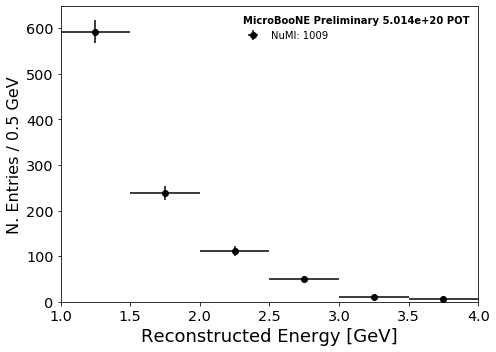

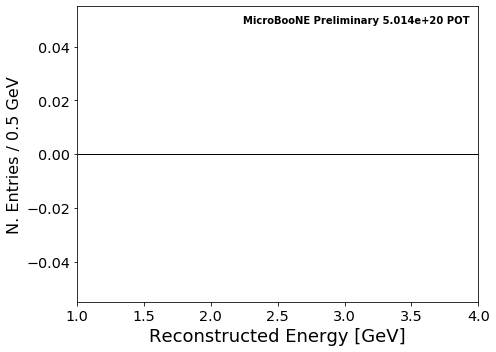

In [31]:
import batch_plotter_alex
import importlib
importlib.reload(batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = numu_data.shape[0]
print("n_events here = ", n_events)
print("")
#batch_size = 40000
batch_size = n_events

varss = []
weightss = []
labss = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = numu_data.iloc[start:end]

    samples = {
        "numu_data": sample_set 
    }

    if isRun3 == False:
        pot =  2e+20 
    elif isRun3 == True:
        pot =  5.014e+20 
        
    weights = {  
                }
    
    my_plotter = batch_plotter_alex.Plotter(samples, weights, pot=pot)


    #Now check on a variable
    #Remember to change the plotter keys between truth and mc
    
    
    #VARIABLE, BINS, RANGE, XTIT = 'reco_nu_vtx_sce_x',60,(-20.0, 280.0),"Vertex X [cm]"
    #VARIABLE, BINS, RANGE, XTIT = 'reco_nu_vtx_sce_y',56,(-140.0, 140.0),"Vertex Y [cm]"
    #VARIABLE, BINS, RANGE, XTIT = 'reco_nu_vtx_sce_z',56,(-10.0, 1110.0),"Vertex Z [cm]"
    #VARIABLE, BINS, RANGE, XTIT = 'n_muons_tot',5,(0, 5),"Number of Muons"
    #VARIABLE, BINS, RANGE, XTIT = 'n_protons_tot',5,(0, 5),"Number of Protons"
    #VARIABLE, BINS, RANGE, XTIT = 'n_showers_contained',5,(0, 5),"Number of Contained Showers"
    #VARIABLE, BINS, RANGE, XTIT = 'contained_fraction',20,(0, 1),"Contained Fraction"
    #VARIABLE, BINS, RANGE, XTIT = 'topological_score',20,(0, 1),"Topological Score"
    
    VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(1.0, 4.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Muon_Reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    #VARIABLE, BINS, RANGE, XTIT = 'muon_mom',8,(0.0, 2.0),"Lepton Momentum (GeV)"
    
    #OLD
    #VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'muon_mom',10,(0.0, 5.0),"Lepton Momentum (GeV)"
    

    var, weight, label = my_plotter.plot_variable(
        VARIABLE,
        query= NUMU_SEL_QUERY,
        #query= "",
        currentsample = "numu_data",
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "weightSplineTimesTuneTimesPPFX",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:3]
    
    varss.append(var)
    weightss.append(weight)
    labss.append(label)

No handles with labels found to put in legend.


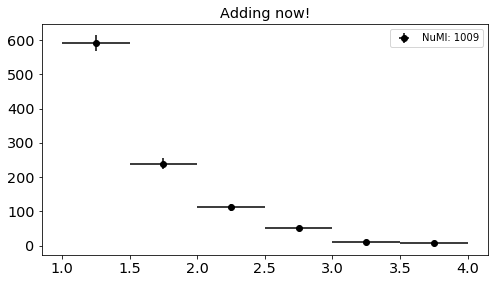

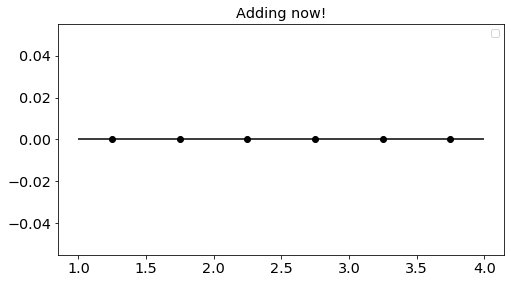

In [32]:
from matplotlib import gridspec

for i in range(int(n_events/batch_size)+1):
    numu_fig = plt.figure(figsize=(8, 7))
    numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
    numu_ax1 = plt.subplot(numu_gs[0])
    #numu_ax1.set_xlim([0, 5])    #TrueE, lepton mom, muons
    #current_bincenters =  np.arange(0.25, 5.25, 0.5)
    #current_bin_size = 0.5
    #current_bincenters =  np.arange(0.5, 5.5, 1)
    #current_bin_size = 1
    ########################
    #numu_ax1.set_xlim([-20, 280])    #X
    #current_bincenters =  np.arange(-17.5, 282.5, 5)
    #current_bin_size = 5
    ########################
    #numu_ax1.set_xlim([-140, 140])    #Y
    #current_bincenters =  np.arange(-137.5, 142.5, 5)
    #current_bin_size = 5
    ########################
    #numu_ax1.set_xlim([-10, 1100])    #Z
    #current_bincenters =  np.arange(0, 1110, 20)
    #current_bin_size = 20
    ########################
    #numu_ax1.set_xlim([0, 1])    #Cont
    #current_bincenters =  np.arange(0.025, 1, 0.05)
    #current_bin_size = 0.05
    ########################
    
    #Energy
    current_bincenters =  np.arange(1.25, 4.25, 0.5)
    current_bin_size = 0.5
    #AngleDiff
    #current_bincenters =  np.arange(-0.9, 1.1, 0.2)
    #current_bin_size = 0.25
    #Lepton
    #current_bincenters =  np.arange(0.125, 2.125, 0.25)
    #current_bin_size = 0.25
    
    #OLD
    #current_bincenters =  np.arange(0.25, 5.25, 0.5)
    #current_bin_size = 0.5
    #current_bincenters =  np.arange(0.5, 5.5, 1)
    #current_bin_size = 1
    
    numu_ax1.errorbar(
                current_bincenters,
                varss[i],
                xerr=current_bin_size/2,
                yerr=weightss[i],
                fmt='ko',
                label="NuMI: %i" % sum(varss[i]) if sum(varss[i]) else "")
    
    plt.title("Adding now!")
    plt.legend()

In [33]:
def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    
varss_tot = sum(varss)
print(weightss[0][0])
#sum errors? will need to change if splitting data
weightss_tot = weightss[0][0]

[24.33105012 15.45962483 10.58300524  7.07106781  3.16227766  2.44948974]


[592 239 112  50  10   6]


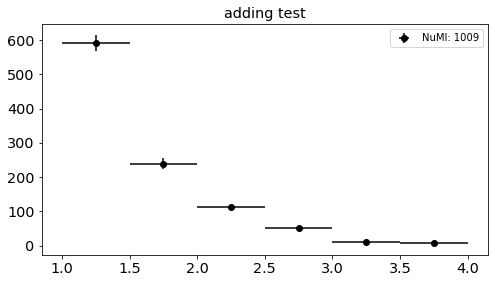

In [34]:
category_labels = {
    1 : r'$\nu_\mu$ CC0$\pi$Np', 
    2 : r'Out FV',
    3 : r'$\nu_e$ CC $\pi^{0}$',
    4 : r'$\nu_e$ CC',
    5 : r'$\nu_e$ NC $\pi^{0}$',
    6 : r'$\nu_e$ NC',
    7 : r'$\bar{\nu}_\mu$ CC0$\pi$Np',
    8: r'$\nu_\mu$ NC',
    9: r'$\nu_\mu$ CC other',
    10 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other', 
    11 : r'$\nu_\mu$ / $\overline{\nu_e}$  $\pi^{0}$', 
    12 : r'$\nu_\mu$ / $\overline{\nu_e}$  other',
    0: r'Unknown'
}


labels = labss

numu_fig = plt.figure(figsize=(8, 7))
numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_ax1 = plt.subplot(numu_gs[0])

#TrueE, LeptonMom
#numu_ax1.set_xlim([0, 5])
#numu_ax1.set_ylim([0, 4000])

#AngleDiff
#numu_ax1.set_xlim([-1,1])
#numu_ax1.set_ylim([0, 900])

print(varss_tot)

numu_ax1.errorbar(
            current_bincenters,
            varss_tot,
            xerr=current_bin_size/2,
            yerr=weightss_tot,
            fmt='ko',
            label="NuMI: %i" % sum(varss_tot) if sum(varss_tot) else "")


plt.title("adding test")
plt.legend()

In [35]:
vars_tot_df = pd.DataFrame.from_dict(varss_tot)
weights_tot_df = pd.DataFrame.from_dict(weightss_tot)

if isRun3 == False:
    #######full trueE
    #vars_tot_df.to_csv('numu_data_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    #weights_tot_df.to_csv('numu_data_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    ########angleDiff
    #vars_tot_df.to_csv('numu_data_varstot_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    #weights_tot_df.to_csv('numu_data_weightstot_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    ########leptonMom
    vars_tot_df.to_csv('numu_data_varstot_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    weights_tot_df.to_csv('numu_data_weightstot_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
elif isRun3 == True:
    #######full trueE
    vars_tot_df.to_csv('numu_data_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    weights_tot_df.to_csv('numu_data_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    ########angleDiff
    #vars_tot_df.to_csv('numu_data_varstot_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    #weights_tot_df.to_csv('numu_data_weightstot_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    ########leptonMom
    #vars_tot_df.to_csv('numu_data_varstot_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
    #weights_tot_df.to_csv('numu_data_weightstot_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
